In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal
from statsmodels.stats.weightstats import ttest_ind
micron_conv = 0.01537697 

In [2]:
#read in data
exp_718 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\07182024_master_sheet.csv')
exp_314 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\03142024_master_sheet.csv')
exp_429 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\04292024_master_sheet.csv')
exp_506 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\05062024_master_sheet.csv')

#exclude data where nuclear_are is greater than cell_area and nuclear_area is one
exp_718 = exp_718.drop(exp_718[exp_718['Nuclear_Area (pixels)'] >= exp_718['Cell_Area (pixels)']].index)
exp_314 = exp_314.drop(exp_314[exp_314['Nuclear_Area (pixels)'] >= exp_314['Cell_Area (pixels)']].index)
exp_429 = exp_429.drop(exp_429[exp_429['Nuclear_Area (pixels)'] >= exp_429['Cell_Area (pixels)']].index)
exp_506 = exp_506.drop(exp_506[exp_506['Nuclear_Area (pixels)'] >= exp_506['Cell_Area (pixels)']].index)
exp_718 = exp_718.drop(exp_718[exp_718['Nuclear_Area (pixels)'] == 1].index)
exp_314 = exp_314.drop(exp_314[exp_314['Nuclear_Area (pixels)'] == 1].index)
exp_429 = exp_429.drop(exp_429[exp_429['Nuclear_Area (pixels)'] == 1].index)
exp_506 = exp_506.drop(exp_506[exp_506['Nuclear_Area (pixels)'] == 1].index)

#convert areas to square microns
exp_718["Cell_Area (pixels)"] = exp_718["Cell_Area (pixels)"] * micron_conv
exp_718["Nuclear_Area (pixels)"] = exp_718["Nuclear_Area (pixels)"] * micron_conv
exp_314["Cell_Area (pixels)"] = exp_314["Cell_Area (pixels)"] * micron_conv
exp_314["Nuclear_Area (pixels)"] = exp_314["Nuclear_Area (pixels)"] * micron_conv
exp_429["Cell_Area (pixels)"] = exp_429["Cell_Area (pixels)"] * micron_conv
exp_429["Nuclear_Area (pixels)"] = exp_429["Nuclear_Area (pixels)"] * micron_conv
exp_506["Cell_Area (pixels)"] = exp_506["Cell_Area (pixels)"] * micron_conv
exp_506["Nuclear_Area (pixels)"] = exp_506["Nuclear_Area (pixels)"] * micron_conv

#rename bio rep and strain
exp_718["Bio rep"] = exp_718.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_314["Bio rep"] = exp_314.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_429["Bio rep"] = exp_429.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_506["Bio rep"] = exp_506.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_718["strain"] = exp_718.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
exp_314["strain"] = exp_314.apply(lambda x: x["Nuclei_File"][:-24], axis = 1)
exp_429["strain"] = exp_429.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
exp_506["strain"] = exp_506.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
#CA_718["Bio rep"] = 'CA_' + CA_718["Bio rep"]

#group bio reps 
CA_bioreps_718 = exp_718.groupby('Bio rep').agg("Cell_Area (pixels)")#.agg({"Cell_Area (pixels)": lambda x: list(x)})
NA_bioreps_718 = exp_718.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_718 = exp_718.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_718 = exp_718.groupby('Bio rep').agg("circ.")
eccen_bioreps_718 = exp_718.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_314 = exp_314.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_314 = exp_314.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_314 = exp_314.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_314 = exp_314.groupby('Bio rep').agg("circ.")
eccen_bioreps_314 = exp_314.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_429 = exp_429.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_429 = exp_429.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_429 = exp_429.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_429 = exp_429.groupby('Bio rep').agg("circ.")
eccen_bioreps_429 = exp_429.groupby('Bio rep').agg("Eccentricity")
CA_bioreps_506 = exp_506.groupby('Bio rep').agg("Cell_Area (pixels)")
NA_bioreps_506 = exp_506.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_506 = exp_506.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_506 = exp_506.groupby('Bio rep').agg("circ.")
eccen_bioreps_506 = exp_506.groupby('Bio rep').agg("Eccentricity")

#group strains
CA_strains_718 = exp_718.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_718 = exp_718.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_718 = exp_718.groupby('strain').agg("N:C_Ratio")
circ_strains_718 = exp_718.groupby('strain').agg("circ.")
eccen_strains_718 = exp_718.groupby('strain').agg("Eccentricity")
CA_strains_314 = exp_314.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_314 = exp_314.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_314 = exp_314.groupby('strain').agg("N:C_Ratio")
circ_strains_314 = exp_314.groupby('strain').agg("circ.")
eccen_strains_314 = exp_314.groupby('strain').agg("Eccentricity")
CA_strains_429 = exp_429.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_429 = exp_429.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_429 = exp_429.groupby('strain').agg("N:C_Ratio")
circ_strains_429 = exp_429.groupby('strain').agg("circ.")
eccen_strains_429 = exp_429.groupby('strain').agg("Eccentricity")
CA_strains_506 = exp_506.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_506 = exp_506.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_506 = exp_506.groupby('strain').agg("N:C_Ratio")
circ_strains_506 = exp_506.groupby('strain').agg("circ.")
eccen_strains_506 = exp_506.groupby('strain').agg("Eccentricity")

In [3]:
#average CA for each strain at 0kGy
CA_718_dsr2_0k_avg = CA_strains_718.get_group("07182024_dsr2_0k").mean()
CA_314_dsr2_0k_avg = CA_strains_314.get_group("03142024_dsr2_0k").mean()
CA_718_dsr6_0k_avg = CA_strains_718.get_group("07182024_dsr6_0k").mean()
CA_429_dsr6_0k_avg = CA_strains_429.get_group("04292024_dsr6_0k").mean()
CA_718_dsr9_0k_avg = CA_strains_718.get_group("07182024_dsr9_0k").mean()
CA_506_dsr9_0k_avg = CA_strains_506.get_group("05062024_dsr9_0k").mean()
CA_718_dsr20_0k_avg = CA_strains_718.get_group("07182024_dsr20_0k").mean()
CA_506_dsr20_0k_avg = CA_strains_506.get_group("05062024_dsr20_0k").mean()
CA_718_dsr27_0k_avg = CA_strains_718.get_group("07182024_dsr27_0k").mean()
CA_314_dsr27_0k_avg = CA_strains_314.get_group("03142024_dsr27_0k").mean()
CA_718_r1_0k_avg = CA_strains_718.get_group("07182024_r1_0k").mean()
CA_314_r1_0k_avg = CA_strains_314.get_group("03142024_r1_0k").mean()
CA_429_r1_0k_avg = CA_strains_429.get_group("04292024_r1_0k").mean()
CA_506_r1_0k_avg = CA_strains_506.get_group("05062024_r1_0k").mean()
CA_718_dsr2_0k_avg_sterr = CA_strains_718.get_group("07182024_dsr2_0k").sem()
CA_314_dsr2_0k_avg_sterr = CA_strains_314.get_group("03142024_dsr2_0k").sem()
CA_718_dsr6_0k_avg_sterr = CA_strains_718.get_group("07182024_dsr6_0k").sem()
CA_429_dsr6_0k_avg_sterr = CA_strains_429.get_group("04292024_dsr6_0k").sem()
CA_718_dsr9_0k_avg_sterr = CA_strains_718.get_group("07182024_dsr9_0k").sem()
CA_506_dsr9_0k_avg_sterr = CA_strains_506.get_group("05062024_dsr9_0k").sem()
CA_718_dsr20_0k_avg_sterr = CA_strains_718.get_group("07182024_dsr20_0k").sem()
CA_506_dsr20_0k_avg_sterr = CA_strains_506.get_group("05062024_dsr20_0k").sem()
CA_718_dsr27_0k_avg_sterr = CA_strains_718.get_group("07182024_dsr27_0k").sem()
CA_314_dsr27_0k_avg_sterr = CA_strains_314.get_group("03142024_dsr27_0k").sem()
CA_718_r1_0k_avg_sterr = CA_strains_718.get_group("07182024_r1_0k").sem()
CA_314_r1_0k_avg_sterr = CA_strains_314.get_group("03142024_r1_0k").sem()
CA_429_r1_0k_avg_sterr = CA_strains_429.get_group("04292024_r1_0k").sem()
CA_506_r1_0k_avg_sterr = CA_strains_506.get_group("05062024_r1_0k").sem()

CA_718_dsr2_0k_r1_FC = CA_strains_718.get_group("07182024_dsr2_0k")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_FC = CA_strains_314.get_group("03142024_dsr2_0k")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_FC = CA_strains_718.get_group("07182024_dsr6_0k")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_FC = CA_strains_429.get_group("04292024_dsr6_0k")/CA_429_r1_0k_avg
CA_429_dsr6_0k_r1_FC = CA_strains_429.get_group("04292024_dsr6_0k")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_FC = CA_strains_718.get_group("07182024_dsr9_0k")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_FC = CA_strains_506.get_group("05062024_dsr9_0k")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_FC = CA_strains_718.get_group("07182024_dsr20_0k")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_FC = CA_strains_506.get_group("05062024_dsr20_0k")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_FC = CA_strains_718.get_group("07182024_dsr27_0k")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_FC = CA_strains_314.get_group("03142024_dsr27_0k")/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_FC_avg = CA_718_dsr2_0k_avg/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_FC_avg = CA_314_dsr2_0k_avg/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_FC_avg = CA_718_dsr6_0k_avg/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_FC_avg = CA_429_dsr6_0k_avg/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_FC_avg = CA_718_dsr9_0k_avg/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_FC_avg = CA_506_dsr9_0k_avg/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_FC_avg = CA_718_dsr20_0k_avg/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_FC_avg = CA_506_dsr20_0k_avg/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_FC_avg = CA_718_dsr27_0k_avg/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_FC_avg = CA_314_dsr27_0k_avg/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_FC_avg_sterr = CA_718_dsr2_0k_r1_FC_avg*(CA_718_dsr2_0k_avg_sterr/CA_718_dsr2_0k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_314_dsr2_0k_r1_FC_avg_sterr = CA_314_dsr2_0k_r1_FC_avg*(CA_314_dsr2_0k_avg_sterr/CA_314_dsr2_0k_avg+CA_314_r1_0k_avg_sterr/CA_314_r1_0k_avg)
CA_718_dsr6_0k_r1_FC_avg_sterr = CA_718_dsr6_0k_r1_FC_avg*(CA_718_dsr6_0k_avg_sterr/CA_718_dsr6_0k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_429_dsr6_0k_r1_FC_avg_sterr = CA_429_dsr6_0k_r1_FC_avg*(CA_429_dsr6_0k_avg_sterr/CA_429_dsr6_0k_avg+CA_429_r1_0k_avg_sterr/CA_429_r1_0k_avg)
CA_718_dsr9_0k_r1_FC_avg_sterr = CA_718_dsr9_0k_r1_FC_avg*(CA_718_dsr9_0k_avg_sterr/CA_718_dsr9_0k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_506_dsr9_0k_r1_FC_avg_sterr = CA_506_dsr9_0k_r1_FC_avg*(CA_506_dsr9_0k_avg_sterr/CA_506_dsr9_0k_avg+CA_506_r1_0k_avg_sterr/CA_506_r1_0k_avg)
CA_718_dsr20_0k_r1_FC_avg_sterr = CA_718_dsr20_0k_r1_FC_avg*(CA_718_dsr20_0k_avg_sterr/CA_718_dsr20_0k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_506_dsr20_0k_r1_FC_avg_sterr = CA_506_dsr20_0k_r1_FC_avg*(CA_506_dsr20_0k_avg_sterr/CA_506_dsr20_0k_avg+CA_506_r1_0k_avg_sterr/CA_506_r1_0k_avg)
CA_718_dsr27_0k_r1_FC_avg_sterr = CA_718_dsr27_0k_r1_FC_avg*(CA_718_dsr27_0k_avg_sterr/CA_718_dsr27_0k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_314_dsr27_0k_r1_FC_avg_sterr = CA_314_dsr27_0k_r1_FC_avg*(CA_314_dsr27_0k_avg_sterr/CA_314_dsr27_0k_avg+CA_314_r1_0k_avg_sterr/CA_314_r1_0k_avg)

#lists of averages and SEMs for each strain at 0k
strains_CA_0k_avgs = [CA_718_dsr2_0k_avg,CA_314_dsr2_0k_avg,CA_718_dsr6_0k_avg,CA_429_dsr6_0k_avg,
           CA_718_dsr9_0k_avg,CA_506_dsr9_0k_avg,CA_718_dsr20_0k_avg,CA_506_dsr20_0k_avg,
           CA_718_dsr27_0k_avg,CA_314_dsr27_0k_avg,CA_718_r1_0k_avg,CA_314_r1_0k_avg,
            CA_429_r1_0k_avg,CA_506_r1_0k_avg]
strains_CA_0k_errs = [CA_718_dsr2_0k_avg_sterr,CA_314_dsr2_0k_avg_sterr,CA_718_dsr6_0k_avg_sterr,CA_429_dsr6_0k_avg_sterr,
           CA_718_dsr9_0k_avg_sterr,CA_506_dsr9_0k_avg_sterr,CA_718_dsr20_0k_avg_sterr,CA_506_dsr20_0k_avg_sterr,
           CA_718_dsr27_0k_avg_sterr,CA_314_dsr27_0k_avg_sterr,CA_718_r1_0k_avg_sterr,CA_314_r1_0k_avg_sterr,
            CA_429_r1_0k_avg_sterr,CA_506_r1_0k_avg_sterr]
#create excel file with averages and SEMs
strains_CA_0k_avgs_errs = pd.DataFrame(data={"avg": strains_CA_0k_avgs, "err": strains_CA_0k_errs})
strains_CA_0k_avgs_errs.to_excel("./strains_CA_0k_avgs_errs.xls",index=False)

#average CA for each strain at 10kGy
CA_718_dsr2_10k_avg = CA_strains_718.get_group("07182024_dsr2_10k").mean()
CA_314_dsr2_10k_avg = CA_strains_314.get_group("03142024_dsr2_10k").mean()
CA_718_dsr6_10k_avg = CA_strains_718.get_group("07182024_dsr6_10k").mean()
CA_429_dsr6_10k_avg = CA_strains_429.get_group("04292024_dsr6_10k").mean()
CA_718_dsr9_10k_avg = CA_strains_718.get_group("07182024_dsr9_10k").mean()
CA_506_dsr9_10k_avg = CA_strains_506.get_group("05062024_dsr9_10k").mean()
CA_718_dsr20_10k_avg = CA_strains_718.get_group("07182024_dsr20_10k").mean()
CA_506_dsr20_10k_avg = CA_strains_506.get_group("05062024_dsr20_10k").mean()
CA_718_dsr27_10k_avg = CA_strains_718.get_group("07182024_dsr27_10k").mean()
CA_314_dsr27_10k_avg = CA_strains_314.get_group("03142024_dsr27_10k").mean()
CA_718_r1_10k_avg = CA_strains_718.get_group("07182024_r1_10k").mean()
CA_314_r1_10k_avg = CA_strains_314.get_group("03142024_r1_10k").mean()
CA_429_r1_10k_avg = CA_strains_429.get_group("04292024_r1_10k").mean()
CA_506_r1_10k_avg = CA_strains_506.get_group("05062024_r1_10k").mean()
CA_718_dsr2_10k_avg_sterr = CA_strains_718.get_group("07182024_dsr2_10k").sem()
CA_314_dsr2_10k_avg_sterr = CA_strains_314.get_group("03142024_dsr2_10k").sem()
CA_718_dsr6_10k_avg_sterr = CA_strains_718.get_group("07182024_dsr6_10k").sem()
CA_429_dsr6_10k_avg_sterr = CA_strains_429.get_group("04292024_dsr6_10k").sem()
CA_718_dsr9_10k_avg_sterr = CA_strains_718.get_group("07182024_dsr9_10k").sem()
CA_506_dsr9_10k_avg_sterr = CA_strains_506.get_group("05062024_dsr9_10k").sem()
CA_718_dsr20_10k_avg_sterr = CA_strains_718.get_group("07182024_dsr20_10k").sem()
CA_506_dsr20_10k_avg_sterr = CA_strains_506.get_group("05062024_dsr20_10k").sem()
CA_718_dsr27_10k_avg_sterr = CA_strains_718.get_group("07182024_dsr27_10k").sem()
CA_314_dsr27_10k_avg_sterr = CA_strains_314.get_group("03142024_dsr27_10k").sem()
CA_718_r1_10k_avg_sterr = CA_strains_718.get_group("07182024_r1_10k").sem()
CA_314_r1_10k_avg_sterr = CA_strains_314.get_group("03142024_r1_10k").sem()
CA_429_r1_10k_avg_sterr = CA_strains_429.get_group("04292024_r1_10k").sem()
CA_506_r1_10k_avg_sterr = CA_strains_506.get_group("05062024_r1_10k").sem()
                                                
CA_718_dsr2_10k_r1_FC = CA_strains_718.get_group("07182024_dsr2_10k")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_FC = CA_strains_314.get_group("03142024_dsr2_10k")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_FC = CA_strains_718.get_group("07182024_dsr6_10k")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_FC = CA_strains_429.get_group("04292024_dsr6_10k")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_FC = CA_strains_718.get_group("07182024_dsr9_10k")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_FC = CA_strains_506.get_group("05062024_dsr9_10k")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_FC = CA_strains_718.get_group("07182024_dsr20_10k")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_FC = CA_strains_506.get_group("05062024_dsr20_10k")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_FC = CA_strains_718.get_group("07182024_dsr27_10k")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_FC = CA_strains_314.get_group("03142024_dsr27_10k")/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_FC_avg = CA_718_dsr2_10k_avg/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_FC_avg = CA_314_dsr2_10k_avg/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_FC_avg = CA_718_dsr6_10k_avg/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_FC_avg = CA_429_dsr6_10k_avg/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_FC_avg = CA_718_dsr9_10k_avg/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_FC_avg = CA_506_dsr9_10k_avg/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_FC_avg = CA_718_dsr20_10k_avg/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_FC_avg = CA_506_dsr20_10k_avg/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_FC_avg = CA_718_dsr27_10k_avg/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_FC_avg = CA_314_dsr27_10k_avg/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_FC_avg_sterr = CA_718_dsr2_10k_r1_FC_avg*(CA_718_dsr2_10k_avg_sterr/CA_718_dsr2_10k_avg+CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg)
CA_314_dsr2_10k_r1_FC_avg_sterr = CA_314_dsr2_10k_r1_FC_avg*(CA_314_dsr2_10k_avg_sterr/CA_314_dsr2_10k_avg+CA_314_r1_10k_avg_sterr/CA_314_r1_10k_avg)
CA_718_dsr6_10k_r1_FC_avg_sterr = CA_718_dsr6_10k_r1_FC_avg*(CA_718_dsr6_10k_avg_sterr/CA_718_dsr6_10k_avg+CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg)
CA_429_dsr6_10k_r1_FC_avg_sterr = CA_429_dsr6_10k_r1_FC_avg*(CA_429_dsr6_10k_avg_sterr/CA_429_dsr6_10k_avg+CA_429_r1_10k_avg_sterr/CA_429_r1_10k_avg)
CA_718_dsr9_10k_r1_FC_avg_sterr = CA_718_dsr9_10k_r1_FC_avg*(CA_718_dsr9_10k_avg_sterr/CA_718_dsr9_10k_avg+CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg)
CA_506_dsr9_10k_r1_FC_avg_sterr = CA_506_dsr9_10k_r1_FC_avg*(CA_506_dsr9_10k_avg_sterr/CA_506_dsr9_10k_avg+CA_506_r1_10k_avg_sterr/CA_506_r1_10k_avg)
CA_718_dsr20_10k_r1_FC_avg_sterr = CA_718_dsr20_10k_r1_FC_avg*(CA_718_dsr20_10k_avg_sterr/CA_718_dsr20_10k_avg+CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg)
CA_506_dsr20_10k_r1_FC_avg_sterr = CA_506_dsr20_10k_r1_FC_avg*(CA_506_dsr20_10k_avg_sterr/CA_506_dsr20_10k_avg+CA_506_r1_10k_avg_sterr/CA_506_r1_10k_avg)
CA_718_dsr27_10k_r1_FC_avg_sterr = CA_718_dsr27_10k_r1_FC_avg*(CA_718_dsr27_10k_avg_sterr/CA_718_dsr27_10k_avg+CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg)
CA_314_dsr27_10k_r1_FC_avg_sterr = CA_314_dsr27_10k_r1_FC_avg*(CA_314_dsr27_10k_avg_sterr/CA_314_dsr27_10k_avg+CA_314_r1_10k_avg_sterr/CA_314_r1_10k_avg)

CA_718_dsr2_10k_0k_FC = CA_strains_718.get_group("07182024_dsr2_10k")/CA_718_dsr2_0k_avg
CA_314_dsr2_10k_0k_FC = CA_strains_314.get_group("03142024_dsr2_10k")/CA_314_dsr2_0k_avg
CA_718_dsr6_10k_0k_FC = CA_strains_718.get_group("07182024_dsr6_10k")/CA_718_dsr6_0k_avg
CA_429_dsr6_10k_0k_FC = CA_strains_429.get_group("04292024_dsr6_10k")/CA_429_dsr6_0k_avg
CA_718_dsr9_10k_0k_FC = CA_strains_718.get_group("07182024_dsr9_10k")/CA_718_dsr9_0k_avg
CA_506_dsr9_10k_0k_FC = CA_strains_506.get_group("05062024_dsr9_10k")/CA_506_dsr9_0k_avg
CA_718_dsr20_10k_0k_FC = CA_strains_718.get_group("07182024_dsr20_10k")/CA_718_dsr20_0k_avg
CA_506_dsr20_10k_0k_FC = CA_strains_506.get_group("05062024_dsr20_10k")/CA_506_dsr20_0k_avg
CA_718_dsr27_10k_0k_FC = CA_strains_718.get_group("07182024_dsr27_10k")/CA_718_dsr27_0k_avg
CA_314_dsr27_10k_0k_FC = CA_strains_314.get_group("03142024_dsr27_10k")/CA_314_dsr27_0k_avg
CA_718_dsr2_10k_0k_FC_avg = CA_718_dsr2_10k_avg/CA_718_dsr2_0k_avg
CA_314_dsr2_10k_0k_FC_avg = CA_314_dsr2_10k_avg/CA_314_dsr2_0k_avg
CA_718_dsr6_10k_0k_FC_avg = CA_718_dsr6_10k_avg/CA_718_dsr6_0k_avg
CA_429_dsr6_10k_0k_FC_avg = CA_429_dsr6_10k_avg/CA_429_dsr6_0k_avg
CA_718_dsr9_10k_0k_FC_avg = CA_718_dsr9_10k_avg/CA_718_dsr9_0k_avg
CA_506_dsr9_10k_0k_FC_avg = CA_506_dsr9_10k_avg/CA_506_dsr9_0k_avg
CA_718_dsr20_10k_0k_FC_avg = CA_718_dsr20_10k_avg/CA_718_dsr20_0k_avg
CA_506_dsr20_10k_0k_FC_avg = CA_506_dsr20_10k_avg/CA_506_dsr20_0k_avg
CA_718_dsr27_10k_0k_FC_avg = CA_718_dsr27_10k_avg/CA_718_dsr27_0k_avg
CA_314_dsr27_10k_0k_FC_avg = CA_314_dsr27_10k_avg/CA_314_dsr27_0k_avg
CA_718_dsr2_10k_0k_FC_avg_sterr = CA_718_dsr2_10k_0k_FC_avg*(CA_718_dsr2_10k_avg_sterr/CA_718_dsr2_10k_avg+CA_718_dsr2_0k_avg_sterr/CA_718_dsr2_0k_avg)
CA_314_dsr2_10k_0k_FC_avg_sterr = CA_314_dsr2_10k_0k_FC_avg*(CA_314_dsr2_10k_avg_sterr/CA_314_dsr2_10k_avg+CA_314_dsr2_0k_avg_sterr/CA_314_dsr2_0k_avg)
CA_718_dsr6_10k_0k_FC_avg_sterr = CA_718_dsr6_10k_0k_FC_avg*(CA_718_dsr6_10k_avg_sterr/CA_718_dsr6_10k_avg+CA_718_dsr6_0k_avg_sterr/CA_718_dsr6_0k_avg)
CA_429_dsr6_10k_0k_FC_avg_sterr = CA_429_dsr6_10k_0k_FC_avg*(CA_429_dsr6_10k_avg_sterr/CA_429_dsr6_10k_avg+CA_429_dsr6_0k_avg_sterr/CA_429_dsr6_0k_avg)
CA_718_dsr9_10k_0k_FC_avg_sterr = CA_718_dsr9_10k_0k_FC_avg*(CA_718_dsr9_10k_avg_sterr/CA_718_dsr9_10k_avg+CA_718_dsr9_0k_avg_sterr/CA_718_dsr9_0k_avg)
CA_506_dsr9_10k_0k_FC_avg_sterr = CA_506_dsr9_10k_0k_FC_avg*(CA_506_dsr9_10k_avg_sterr/CA_506_dsr9_10k_avg+CA_506_dsr9_0k_avg_sterr/CA_506_dsr9_0k_avg)
CA_718_dsr20_10k_0k_FC_avg_sterr = CA_718_dsr20_10k_0k_FC_avg*(CA_718_dsr20_10k_avg_sterr/CA_718_dsr20_10k_avg+CA_718_dsr20_0k_avg_sterr/CA_718_dsr20_0k_avg)
CA_506_dsr20_10k_0k_FC_avg_sterr = CA_506_dsr20_10k_0k_FC_avg*(CA_506_dsr20_10k_avg_sterr/CA_506_dsr20_10k_avg+CA_506_dsr20_0k_avg_sterr/CA_506_dsr20_0k_avg)
CA_718_dsr27_10k_0k_FC_avg_sterr = CA_718_dsr27_10k_0k_FC_avg*(CA_718_dsr27_10k_avg_sterr/CA_718_dsr27_10k_avg+CA_718_dsr27_0k_avg_sterr/CA_718_dsr27_0k_avg)
CA_314_dsr27_10k_0k_FC_avg_sterr = CA_314_dsr27_10k_0k_FC_avg*(CA_314_dsr27_10k_avg_sterr/CA_314_dsr27_10k_avg+CA_314_dsr27_0k_avg_sterr/CA_314_dsr27_0k_avg)

CA_718_r1_10k_0k_FC = CA_strains_718.get_group("07182024_r1_10k")/CA_718_r1_0k_avg
CA_314_r1_10k_0k_FC = CA_strains_314.get_group("03142024_r1_10k")/CA_314_r1_0k_avg
CA_429_r1_10k_0k_FC = CA_strains_429.get_group("04292024_r1_10k")/CA_429_r1_0k_avg
CA_506_r1_10k_0k_FC = CA_strains_506.get_group("05062024_r1_10k")/CA_506_r1_0k_avg
CA_718_r1_10k_0k_FC_avg = CA_718_r1_10k_avg/CA_718_r1_0k_avg
CA_314_r1_10k_0k_FC_avg = CA_314_r1_10k_avg/CA_314_r1_0k_avg
CA_429_r1_10k_0k_FC_avg = CA_429_r1_10k_avg/CA_429_r1_0k_avg
CA_506_r1_10k_0k_FC_avg = CA_506_r1_10k_avg/CA_506_r1_0k_avg
CA_718_r1_10k_0k_FC_avg_sterr = CA_718_r1_10k_0k_FC_avg*(CA_718_r1_10k_avg_sterr/CA_718_r1_10k_avg+CA_718_r1_0k_avg_sterr/CA_718_r1_0k_avg)
CA_314_r1_10k_0k_FC_avg_sterr = CA_314_r1_10k_0k_FC_avg*(CA_314_r1_10k_avg_sterr/CA_314_r1_10k_avg+CA_314_r1_0k_avg_sterr/CA_314_r1_0k_avg)
CA_429_r1_10k_0k_FC_avg_sterr = CA_429_r1_10k_0k_FC_avg*(CA_429_r1_10k_avg_sterr/CA_429_r1_10k_avg+CA_429_r1_0k_avg_sterr/CA_429_r1_0k_avg)
CA_506_r1_10k_0k_FC_avg_sterr = CA_506_r1_10k_0k_FC_avg*(CA_506_r1_10k_avg_sterr/CA_506_r1_10k_avg+CA_506_r1_0k_avg_sterr/CA_506_r1_0k_avg)

#lists of averages and SEMs for each strain at 10k
strains_CA_10k_avgs = [CA_718_dsr2_10k_avg,CA_314_dsr2_10k_avg,CA_718_dsr6_10k_avg,CA_429_dsr6_10k_avg,
           CA_718_dsr9_10k_avg,CA_506_dsr9_10k_avg,CA_718_dsr20_10k_avg,CA_506_dsr20_10k_avg,
           CA_718_dsr27_10k_avg,CA_314_dsr27_10k_avg,CA_718_r1_10k_avg,CA_314_r1_10k_avg,
            CA_429_r1_10k_avg,CA_506_r1_10k_avg]
strains_CA_10k_errs = [CA_718_dsr2_10k_avg_sterr,CA_314_dsr2_10k_avg_sterr,CA_718_dsr6_10k_avg_sterr,CA_429_dsr6_10k_avg_sterr,
           CA_718_dsr9_10k_avg_sterr,CA_506_dsr9_10k_avg_sterr,CA_718_dsr20_10k_avg_sterr,CA_506_dsr20_10k_avg_sterr,
           CA_718_dsr27_10k_avg_sterr,CA_314_dsr27_10k_avg_sterr,CA_718_r1_10k_avg_sterr,CA_314_r1_10k_avg_sterr,
            CA_429_r1_10k_avg_sterr,CA_506_r1_10k_avg_sterr]
#create excel file with averages and SEMs
strains_CA_10k_avgs_errs = pd.DataFrame(data={"avg": strains_CA_10k_avgs, "err": strains_CA_10k_errs})
strains_CA_10k_avgs_errs.to_excel("./strains_CA_10k_avgs_errs.xls",index=False)

#list of CA for each bio rep at 0kGy
CA_718_dsr2_0k_A = CA_bioreps_718.get_group("07182024_dsr2_0k_A")
CA_314_dsr2_0k_A = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
CA_718_dsr6_0k_A = CA_bioreps_718.get_group("07182024_dsr6_0k_A")
CA_429_dsr6_0k_A = CA_bioreps_429.get_group("04292024_dsr6_0k_A")
CA_718_dsr9_0k_A = CA_bioreps_718.get_group("07182024_dsr9_0k_A")
CA_506_dsr9_0k_A = CA_bioreps_506.get_group("05062024_dsr9_0k_A")
CA_718_dsr20_0k_A = CA_bioreps_718.get_group("07182024_dsr20_0k_A")
CA_506_dsr20_0k_A = CA_bioreps_506.get_group("05062024_dsr20_0k_A")
CA_718_dsr27_0k_A = CA_bioreps_718.get_group("07182024_dsr27_0k_A")
CA_314_dsr27_0k_A = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
CA_718_r1_0k_A = CA_bioreps_718.get_group("07182024_r1_0k_A")
CA_314_r1_0k_A = CA_bioreps_314.get_group("03142024_r1_0k_2h_A")
CA_429_r1_0k_A = CA_bioreps_429.get_group("04292024_r1_0k_A")
CA_506_r1_0k_A = CA_bioreps_506.get_group("05062024_r1_0k_A")
CA_718_dsr2_0k_B = CA_bioreps_718.get_group("07182024_dsr2_0k_B")
CA_314_dsr2_0k_B = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
CA_718_dsr6_0k_B = CA_bioreps_718.get_group("07182024_dsr6_0k_B")
CA_429_dsr6_0k_B = CA_bioreps_429.get_group("04292024_dsr6_0k_B")
CA_718_dsr9_0k_B = CA_bioreps_718.get_group("07182024_dsr9_0k_B")
CA_506_dsr9_0k_B = CA_bioreps_506.get_group("05062024_dsr9_0k_B")
CA_718_dsr20_0k_B = CA_bioreps_718.get_group("07182024_dsr20_0k_B")
CA_506_dsr20_0k_B = CA_bioreps_506.get_group("05062024_dsr20_0k_B")
CA_718_dsr27_0k_B = CA_bioreps_718.get_group("07182024_dsr27_0k_B")
CA_314_dsr27_0k_B = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
CA_718_r1_0k_B = CA_bioreps_718.get_group("07182024_r1_0k_B")
CA_314_r1_0k_B = CA_bioreps_314.get_group("03142024_r1_0k_2h_B")
CA_429_r1_0k_B = CA_bioreps_429.get_group("04292024_r1_0k_B")
CA_506_r1_0k_B = CA_bioreps_506.get_group("05062024_r1_0k_B")
CA_718_dsr2_0k_C = CA_bioreps_718.get_group("07182024_dsr2_0k_C")
CA_314_dsr2_0k_C = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
CA_718_dsr6_0k_C = CA_bioreps_718.get_group("07182024_dsr6_0k_C")
CA_429_dsr6_0k_C = CA_bioreps_429.get_group("04292024_dsr6_0k_C")
CA_718_dsr9_0k_C = CA_bioreps_718.get_group("07182024_dsr9_0k_C")
CA_506_dsr9_0k_C = CA_bioreps_506.get_group("05062024_dsr9_0k_C")
CA_718_dsr20_0k_C = CA_bioreps_718.get_group("07182024_dsr20_0k_C")
CA_506_dsr20_0k_C = CA_bioreps_506.get_group("05062024_dsr20_0k_C")
CA_718_dsr27_0k_C = CA_bioreps_718.get_group("07182024_dsr27_0k_C")
CA_314_dsr27_0k_C = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
CA_718_r1_0k_C = CA_bioreps_718.get_group("07182024_r1_0k_C")
CA_314_r1_0k_C = CA_bioreps_314.get_group("03142024_r1_0k_2h_C")
CA_429_r1_0k_C = CA_bioreps_429.get_group("04292024_r1_0k_C")
CA_506_r1_0k_C = CA_bioreps_506.get_group("05062024_r1_0k_C")

#average CA for each bio rep at 0kGy
CA_718_dsr2_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
CA_314_dsr2_0k_A_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
CA_718_dsr6_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
CA_429_dsr6_0k_A_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
CA_718_dsr9_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
CA_506_dsr9_0k_A_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
CA_718_dsr20_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
CA_506_dsr20_0k_A_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
CA_718_dsr27_0k_A_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
CA_314_dsr27_0k_A_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
CA_718_r1_0k_A_avg = CA_bioreps_718.get_group("07182024_r1_0k_A").mean()
CA_314_r1_0k_A_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
CA_429_r1_0k_A_avg = CA_bioreps_429.get_group("04292024_r1_0k_A").mean()
CA_506_r1_0k_A_avg = CA_bioreps_506.get_group("05062024_r1_0k_A").mean()
CA_718_dsr2_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
CA_314_dsr2_0k_B_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
CA_718_dsr6_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
CA_429_dsr6_0k_B_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
CA_718_dsr9_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
CA_506_dsr9_0k_B_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
CA_718_dsr20_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
CA_506_dsr20_0k_B_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
CA_718_dsr27_0k_B_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
CA_314_dsr27_0k_B_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
CA_718_r1_0k_B_avg = CA_bioreps_718.get_group("07182024_r1_0k_B").mean()
CA_314_r1_0k_B_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
CA_429_r1_0k_B_avg = CA_bioreps_429.get_group("04292024_r1_0k_B").mean()
CA_506_r1_0k_B_avg = CA_bioreps_506.get_group("05062024_r1_0k_B").mean()
CA_718_dsr2_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
CA_314_dsr2_0k_C_avg = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
CA_718_dsr6_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
CA_429_dsr6_0k_C_avg = CA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
CA_718_dsr9_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
CA_506_dsr9_0k_C_avg = CA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
CA_718_dsr20_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
CA_506_dsr20_0k_C_avg = CA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
CA_718_dsr27_0k_C_avg = CA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
CA_314_dsr27_0k_C_avg = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
CA_718_r1_0k_C_avg = CA_bioreps_718.get_group("07182024_r1_0k_C").mean()
CA_314_r1_0k_C_avg = CA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
CA_429_r1_0k_C_avg = CA_bioreps_429.get_group("04292024_r1_0k_C").mean()
CA_506_r1_0k_C_avg = CA_bioreps_506.get_group("05062024_r1_0k_C").mean()
CA_718_dsr2_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_0k_A").sem()
CA_314_dsr2_0k_A_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").sem()
CA_718_dsr6_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_0k_A").sem()
CA_429_dsr6_0k_A_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_0k_A").sem()
CA_718_dsr9_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_0k_A").sem()
CA_506_dsr9_0k_A_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_0k_A").sem()
CA_718_dsr20_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_0k_A").sem()
CA_506_dsr20_0k_A_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_0k_A").sem()
CA_718_dsr27_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_0k_A").sem()
CA_314_dsr27_0k_A_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").sem()
CA_718_r1_0k_A_avg_sterr = CA_bioreps_718.get_group("07182024_r1_0k_A").sem()
CA_314_r1_0k_A_avg_sterr = CA_bioreps_314.get_group("03142024_r1_0k_2h_A").sem()
CA_429_r1_0k_A_avg_sterr = CA_bioreps_429.get_group("04292024_r1_0k_A").sem()
CA_506_r1_0k_A_avg_sterr = CA_bioreps_506.get_group("05062024_r1_0k_A").sem()
CA_718_dsr2_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_0k_B").sem()
CA_314_dsr2_0k_B_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").sem()
CA_718_dsr6_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_0k_B").sem()
CA_429_dsr6_0k_B_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_0k_B").sem()
CA_718_dsr9_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_0k_B").sem()
CA_506_dsr9_0k_B_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_0k_B").sem()
CA_718_dsr20_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_0k_B").sem()
CA_506_dsr20_0k_B_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_0k_B").sem()
CA_718_dsr27_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_0k_B").sem()
CA_314_dsr27_0k_B_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").sem()
CA_718_r1_0k_B_avg_sterr = CA_bioreps_718.get_group("07182024_r1_0k_B").sem()
CA_314_r1_0k_B_avg_sterr = CA_bioreps_314.get_group("03142024_r1_0k_2h_B").sem()
CA_429_r1_0k_B_avg_sterr = CA_bioreps_429.get_group("04292024_r1_0k_B").sem()
CA_506_r1_0k_B_avg_sterr = CA_bioreps_506.get_group("05062024_r1_0k_B").sem()
CA_718_dsr2_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_0k_C").sem()
CA_314_dsr2_0k_C_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").sem()
CA_718_dsr6_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_0k_C").sem()
CA_429_dsr6_0k_C_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_0k_C").sem()
CA_718_dsr9_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_0k_C").sem()
CA_506_dsr9_0k_C_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_0k_C").sem()
CA_718_dsr20_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_0k_C").sem()
CA_506_dsr20_0k_C_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_0k_C").sem()
CA_718_dsr27_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_0k_C").sem()
CA_314_dsr27_0k_C_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").sem()
CA_718_r1_0k_C_avg_sterr = CA_bioreps_718.get_group("07182024_r1_0k_C").sem()
CA_314_r1_0k_C_avg_sterr = CA_bioreps_314.get_group("03142024_r1_0k_2h_C").sem()
CA_429_r1_0k_C_avg_sterr = CA_bioreps_429.get_group("04292024_r1_0k_C").sem()
CA_506_r1_0k_C_avg_sterr = CA_bioreps_506.get_group("05062024_r1_0k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_CA_r1_0k_avgs = [CA_718_r1_0k_A_avg,CA_718_r1_0k_B_avg,CA_718_r1_0k_C_avg,
                 CA_314_r1_0k_A_avg,CA_314_r1_0k_B_avg,CA_314_r1_0k_C_avg,
                 CA_429_r1_0k_A_avg,CA_429_r1_0k_B_avg,CA_429_r1_0k_C_avg,
                 CA_506_r1_0k_A_avg,CA_506_r1_0k_B_avg,CA_506_r1_0k_C_avg]
bioreps_CA_r1_0k_errs = [CA_718_r1_0k_A_avg_sterr,CA_718_r1_0k_B_avg_sterr,CA_718_r1_0k_C_avg_sterr,
                 CA_314_r1_0k_A_avg_sterr,CA_314_r1_0k_B_avg_sterr,CA_314_r1_0k_C_avg_sterr,
                 CA_429_r1_0k_A_avg_sterr,CA_429_r1_0k_B_avg_sterr,CA_429_r1_0k_C_avg_sterr,
                 CA_506_r1_0k_A_avg_sterr,CA_506_r1_0k_B_avg_sterr,CA_506_r1_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_CA_r1_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_r1_0k_avgs, "err": bioreps_CA_r1_0k_errs})
bioreps_CA_r1_0k_avgs_errs.to_excel("./r1_biorep_CA_0k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_CA_0k_avgs = [CA_718_dsr2_0k_A_avg,CA_718_dsr2_0k_B_avg,CA_718_dsr2_0k_C_avg,
               CA_314_dsr2_0k_A_avg,CA_314_dsr2_0k_B_avg,CA_314_dsr2_0k_C_avg,
               CA_718_dsr6_0k_A_avg,CA_718_dsr6_0k_B_avg,CA_718_dsr6_0k_C_avg,
               CA_429_dsr6_0k_A_avg,CA_429_dsr6_0k_B_avg,CA_429_dsr6_0k_C_avg,
               CA_718_dsr9_0k_A_avg,CA_718_dsr9_0k_B_avg,CA_718_dsr9_0k_C_avg,
               CA_506_dsr9_0k_A_avg,CA_506_dsr9_0k_B_avg,CA_506_dsr9_0k_C_avg,
               CA_718_dsr20_0k_A_avg,CA_718_dsr20_0k_B_avg,CA_718_dsr20_0k_C_avg,
               CA_506_dsr20_0k_A_avg,CA_506_dsr20_0k_B_avg,CA_506_dsr20_0k_C_avg,
               CA_718_dsr27_0k_A_avg,CA_718_dsr27_0k_B_avg,CA_718_dsr27_0k_C_avg,
               CA_314_dsr27_0k_A_avg,CA_314_dsr27_0k_B_avg,CA_314_dsr27_0k_C_avg]
bioreps_CA_0k_errs = [CA_718_dsr2_0k_A_avg_sterr,CA_718_dsr2_0k_B_avg_sterr,CA_718_dsr2_0k_C_avg_sterr,
               CA_314_dsr2_0k_A_avg_sterr,CA_314_dsr2_0k_B_avg_sterr,CA_314_dsr2_0k_C_avg_sterr,
               CA_718_dsr6_0k_A_avg_sterr,CA_718_dsr6_0k_B_avg_sterr,CA_718_dsr6_0k_C_avg_sterr,
               CA_429_dsr6_0k_A_avg_sterr,CA_429_dsr6_0k_B_avg_sterr,CA_429_dsr6_0k_C_avg_sterr,
               CA_718_dsr9_0k_A_avg_sterr,CA_718_dsr9_0k_B_avg_sterr,CA_718_dsr9_0k_C_avg_sterr,
               CA_506_dsr9_0k_A_avg_sterr,CA_506_dsr9_0k_B_avg_sterr,CA_506_dsr9_0k_C_avg_sterr,
               CA_718_dsr20_0k_A_avg_sterr,CA_718_dsr20_0k_B_avg_sterr,CA_718_dsr20_0k_C_avg_sterr,
               CA_506_dsr20_0k_A_avg_sterr,CA_506_dsr20_0k_B_avg_sterr,CA_506_dsr20_0k_C_avg_sterr,
               CA_718_dsr27_0k_A_avg_sterr,CA_718_dsr27_0k_B_avg_sterr,CA_718_dsr27_0k_C_avg_sterr,
               CA_314_dsr27_0k_A_avg_sterr,CA_314_dsr27_0k_B_avg_sterr,CA_314_dsr27_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_CA_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_0k_avgs, "err": bioreps_CA_0k_errs})
bioreps_CA_0k_avgs_errs.to_excel("./bioreps_CA_0k_avgs_errs.xls",index=False)

#FC in CA for each bio rep at 0kGy compared to r1
CA_718_dsr2_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_A")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_A")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_A_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_A")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_A")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_A")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_A")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_A")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_A")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_B")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_B")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_B_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_B")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_B")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_B")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_B")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_B")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_B")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/CA_314_r1_0k_avg
CA_718_dsr2_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr2_0k_C")/CA_718_r1_0k_avg
CA_314_dsr2_0k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/CA_314_r1_0k_avg
CA_718_dsr6_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr6_0k_C")/CA_718_r1_0k_avg
CA_429_dsr6_0k_r1_C_FC = CA_bioreps_429.get_group("04292024_dsr6_0k_C")/CA_429_r1_0k_avg
CA_718_dsr9_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr9_0k_C")/CA_718_r1_0k_avg
CA_506_dsr9_0k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr9_0k_C")/CA_506_r1_0k_avg
CA_718_dsr20_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr20_0k_C")/CA_718_r1_0k_avg
CA_506_dsr20_0k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr20_0k_C")/CA_506_r1_0k_avg
CA_718_dsr27_0k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr27_0k_C")/CA_718_r1_0k_avg
CA_314_dsr27_0k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/CA_314_r1_0k_avg

CA_718_dsr2_0k_r1_A_FC_avg = CA_718_dsr2_0k_r1_A_FC.mean()
CA_314_dsr2_0k_r1_A_FC_avg = CA_314_dsr2_0k_r1_A_FC.mean()
CA_718_dsr6_0k_r1_A_FC_avg = CA_718_dsr6_0k_r1_A_FC.mean()
CA_429_dsr6_0k_r1_A_FC_avg = CA_429_dsr6_0k_r1_A_FC.mean()
CA_718_dsr9_0k_r1_A_FC_avg = CA_718_dsr9_0k_r1_A_FC.mean()
CA_506_dsr9_0k_r1_A_FC_avg = CA_506_dsr9_0k_r1_A_FC.mean()
CA_718_dsr20_0k_r1_A_FC_avg = CA_718_dsr20_0k_r1_A_FC.mean()
CA_506_dsr20_0k_r1_A_FC_avg = CA_506_dsr20_0k_r1_A_FC.mean()
CA_718_dsr27_0k_r1_A_FC_avg = CA_718_dsr27_0k_r1_A_FC.mean()
CA_314_dsr27_0k_r1_A_FC_avg = CA_314_dsr27_0k_r1_A_FC.mean()
CA_718_dsr2_0k_r1_B_FC_avg = CA_718_dsr2_0k_r1_B_FC.mean()
CA_314_dsr2_0k_r1_B_FC_avg = CA_314_dsr2_0k_r1_B_FC.mean()
CA_718_dsr6_0k_r1_B_FC_avg = CA_718_dsr6_0k_r1_B_FC.mean()
CA_429_dsr6_0k_r1_B_FC_avg = CA_429_dsr6_0k_r1_B_FC.mean()
CA_718_dsr9_0k_r1_B_FC_avg = CA_718_dsr9_0k_r1_B_FC.mean()
CA_506_dsr9_0k_r1_B_FC_avg = CA_506_dsr9_0k_r1_B_FC.mean()
CA_718_dsr20_0k_r1_B_FC_avg = CA_718_dsr20_0k_r1_B_FC.mean()
CA_506_dsr20_0k_r1_B_FC_avg = CA_506_dsr20_0k_r1_B_FC.mean()
CA_718_dsr27_0k_r1_B_FC_avg = CA_718_dsr27_0k_r1_B_FC.mean()
CA_314_dsr27_0k_r1_B_FC_avg = CA_314_dsr27_0k_r1_B_FC.mean()
CA_718_dsr2_0k_r1_C_FC_avg = CA_718_dsr2_0k_r1_C_FC.mean()
CA_314_dsr2_0k_r1_C_FC_avg = CA_314_dsr2_0k_r1_C_FC.mean()
CA_718_dsr6_0k_r1_C_FC_avg = CA_718_dsr6_0k_r1_C_FC.mean()
CA_429_dsr6_0k_r1_C_FC_avg = CA_429_dsr6_0k_r1_C_FC.mean()
CA_718_dsr9_0k_r1_C_FC_avg = CA_718_dsr9_0k_r1_C_FC.mean()
CA_506_dsr9_0k_r1_C_FC_avg = CA_506_dsr9_0k_r1_C_FC.mean()
CA_718_dsr20_0k_r1_C_FC_avg = CA_718_dsr20_0k_r1_C_FC.mean()
CA_506_dsr20_0k_r1_C_FC_avg = CA_506_dsr20_0k_r1_C_FC.mean()
CA_718_dsr27_0k_r1_C_FC_avg = CA_718_dsr27_0k_r1_C_FC.mean()
CA_314_dsr27_0k_r1_C_FC_avg = CA_314_dsr27_0k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_CA_0k_r1_FC_avgs = [CA_718_dsr2_0k_r1_A_FC_avg,CA_718_dsr2_0k_r1_B_FC_avg,CA_718_dsr2_0k_r1_C_FC_avg,
               CA_314_dsr2_0k_r1_A_FC_avg,CA_314_dsr2_0k_r1_B_FC_avg,CA_314_dsr2_0k_r1_C_FC_avg,
               CA_718_dsr6_0k_r1_A_FC_avg,CA_718_dsr6_0k_r1_B_FC_avg,CA_718_dsr6_0k_r1_C_FC_avg,
               CA_429_dsr6_0k_r1_A_FC_avg,CA_429_dsr6_0k_r1_B_FC_avg,CA_429_dsr6_0k_r1_C_FC_avg,
               CA_718_dsr9_0k_r1_A_FC_avg,CA_718_dsr9_0k_r1_B_FC_avg,CA_718_dsr9_0k_r1_C_FC_avg,
               CA_506_dsr9_0k_r1_A_FC_avg,CA_506_dsr9_0k_r1_B_FC_avg,CA_506_dsr9_0k_r1_C_FC_avg,
               CA_718_dsr20_0k_r1_A_FC_avg,CA_718_dsr20_0k_r1_B_FC_avg,CA_718_dsr20_0k_r1_C_FC_avg,
               CA_506_dsr20_0k_r1_A_FC_avg,CA_506_dsr20_0k_r1_B_FC_avg,CA_506_dsr20_0k_r1_C_FC_avg,
               CA_718_dsr27_0k_r1_A_FC_avg,CA_718_dsr27_0k_r1_B_FC_avg,CA_718_dsr27_0k_r1_C_FC_avg,
               CA_314_dsr27_0k_r1_A_FC_avg,CA_314_dsr27_0k_r1_B_FC_avg,CA_314_dsr27_0k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_CA_0k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_0k_r1_FC_avgs})
bioreps_CA_0k_r1_FC_avgs_errs.to_excel("./bioreps_CA_0k_r1_FC_avgs_errs.xls",index=False)

#list of CA for each bio rep at 10kGy
CA_718_dsr2_10k_A = CA_bioreps_718.get_group("07182024_dsr2_10k_A")
CA_314_dsr2_10k_A = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
CA_718_dsr6_10k_A = CA_bioreps_718.get_group("07182024_dsr6_10k_A")
CA_429_dsr6_10k_A = CA_bioreps_429.get_group("04292024_dsr6_10k_A")
CA_718_dsr9_10k_A = CA_bioreps_718.get_group("07182024_dsr9_10k_A")
CA_506_dsr9_10k_A = CA_bioreps_506.get_group("05062024_dsr9_10k_A")
CA_718_dsr20_10k_A = CA_bioreps_718.get_group("07182024_dsr20_10k_A")
CA_506_dsr20_10k_A = CA_bioreps_506.get_group("05062024_dsr20_10k_A")
CA_718_dsr27_10k_A = CA_bioreps_718.get_group("07182024_dsr27_10k_A")
CA_314_dsr27_10k_A = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
CA_718_r1_10k_A = CA_bioreps_718.get_group("07182024_r1_10k_A")
CA_314_r1_10k_A = CA_bioreps_314.get_group("03142024_r1_10k_2h_A")
CA_429_r1_10k_A = CA_bioreps_429.get_group("04292024_r1_10k_A")
CA_506_r1_10k_A = CA_bioreps_506.get_group("05062024_r1_10k_A")
CA_718_dsr2_10k_B = CA_bioreps_718.get_group("07182024_dsr2_10k_B")
CA_314_dsr2_10k_B = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
CA_718_dsr6_10k_B = CA_bioreps_718.get_group("07182024_dsr6_10k_B")
CA_429_dsr6_10k_B = CA_bioreps_429.get_group("04292024_dsr6_10k_B")
CA_718_dsr9_10k_B = CA_bioreps_718.get_group("07182024_dsr9_10k_B")
CA_506_dsr9_10k_B = CA_bioreps_506.get_group("05062024_dsr9_10k_B")
CA_718_dsr20_10k_B = CA_bioreps_718.get_group("07182024_dsr20_10k_B")
CA_506_dsr20_10k_B = CA_bioreps_506.get_group("05062024_dsr20_10k_B")
CA_718_dsr27_10k_B = CA_bioreps_718.get_group("07182024_dsr27_10k_B")
CA_314_dsr27_10k_B = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
CA_718_r1_10k_B = CA_bioreps_718.get_group("07182024_r1_10k_B")
CA_314_r1_10k_B = CA_bioreps_314.get_group("03142024_r1_10k_2h_B")
CA_429_r1_10k_B = CA_bioreps_429.get_group("04292024_r1_10k_B")
CA_506_r1_10k_B = CA_bioreps_506.get_group("05062024_r1_10k_B")
CA_718_dsr2_10k_C = CA_bioreps_718.get_group("07182024_dsr2_10k_C")
CA_314_dsr2_10k_C = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
CA_718_dsr6_10k_C = CA_bioreps_718.get_group("07182024_dsr6_10k_C")
CA_429_dsr6_10k_C = CA_bioreps_429.get_group("04292024_dsr6_10k_C")
CA_718_dsr9_10k_C = CA_bioreps_718.get_group("07182024_dsr9_10k_C")
CA_506_dsr9_10k_C = CA_bioreps_506.get_group("05062024_dsr9_10k_C")
CA_718_dsr20_10k_C = CA_bioreps_718.get_group("07182024_dsr20_10k_C")
CA_506_dsr20_10k_C = CA_bioreps_506.get_group("05062024_dsr20_10k_C")
CA_718_dsr27_10k_C = CA_bioreps_718.get_group("07182024_dsr27_10k_C")
CA_314_dsr27_10k_C = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
CA_718_r1_10k_C = CA_bioreps_718.get_group("07182024_r1_10k_C")
CA_314_r1_10k_C = CA_bioreps_314.get_group("03142024_r1_10k_2h_C")
CA_429_r1_10k_C = CA_bioreps_429.get_group("04292024_r1_10k_C")
CA_506_r1_10k_C = CA_bioreps_506.get_group("05062024_r1_10k_C")

#average CA for each bio rep at 10kGy
CA_718_dsr2_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
CA_314_dsr2_10k_A_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
CA_718_dsr6_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
CA_429_dsr6_10k_A_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
CA_718_dsr9_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
CA_506_dsr9_10k_A_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
CA_718_dsr20_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
CA_506_dsr20_10k_A_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
CA_718_dsr27_10k_A_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
CA_314_dsr27_10k_A_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
CA_718_r1_10k_A_avg = CA_bioreps_718.get_group("07182024_r1_10k_A").mean()
CA_314_r1_10k_A_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
CA_429_r1_10k_A_avg = CA_bioreps_429.get_group("04292024_r1_10k_A").mean()
CA_506_r1_10k_A_avg = CA_bioreps_506.get_group("05062024_r1_10k_A").mean()
CA_718_dsr2_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
CA_314_dsr2_10k_B_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
CA_718_dsr6_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
CA_429_dsr6_10k_B_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
CA_718_dsr9_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
CA_506_dsr9_10k_B_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
CA_718_dsr20_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
CA_506_dsr20_10k_B_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
CA_718_dsr27_10k_B_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
CA_314_dsr27_10k_B_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
CA_718_r1_10k_B_avg = CA_bioreps_718.get_group("07182024_r1_10k_B").mean()
CA_314_r1_10k_B_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
CA_429_r1_10k_B_avg = CA_bioreps_429.get_group("04292024_r1_10k_B").mean()
CA_506_r1_10k_B_avg = CA_bioreps_506.get_group("05062024_r1_10k_B").mean()
CA_718_dsr2_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
CA_314_dsr2_10k_C_avg = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
CA_718_dsr6_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
CA_429_dsr6_10k_C_avg = CA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
CA_718_dsr9_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
CA_506_dsr9_10k_C_avg = CA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
CA_718_dsr20_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
CA_506_dsr20_10k_C_avg = CA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
CA_718_dsr27_10k_C_avg = CA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
CA_314_dsr27_10k_C_avg = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
CA_718_r1_10k_C_avg = CA_bioreps_718.get_group("07182024_r1_10k_C").mean()
CA_314_r1_10k_C_avg = CA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
CA_429_r1_10k_C_avg = CA_bioreps_429.get_group("04292024_r1_10k_C").mean()
CA_506_r1_10k_C_avg = CA_bioreps_506.get_group("05062024_r1_10k_C").mean()
CA_718_dsr2_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_10k_A").sem()
CA_314_dsr2_10k_A_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").sem()
CA_718_dsr6_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_10k_A").sem()
CA_429_dsr6_10k_A_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_10k_A").sem()
CA_718_dsr9_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_10k_A").sem()
CA_506_dsr9_10k_A_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_10k_A").sem()
CA_718_dsr20_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_10k_A").sem()
CA_506_dsr20_10k_A_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_10k_A").sem()
CA_718_dsr27_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_10k_A").sem()
CA_314_dsr27_10k_A_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").sem()
CA_718_r1_10k_A_avg_sterr = CA_bioreps_718.get_group("07182024_r1_10k_A").sem()
CA_314_r1_10k_A_avg_sterr = CA_bioreps_314.get_group("03142024_r1_10k_2h_A").sem()
CA_429_r1_10k_A_avg_sterr = CA_bioreps_429.get_group("04292024_r1_10k_A").sem()
CA_506_r1_10k_A_avg_sterr = CA_bioreps_506.get_group("05062024_r1_10k_A").sem()
CA_718_dsr2_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_10k_B").sem()
CA_314_dsr2_10k_B_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").sem()
CA_718_dsr6_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_10k_B").sem()
CA_429_dsr6_10k_B_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_10k_B").sem()
CA_718_dsr9_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_10k_B").sem()
CA_506_dsr9_10k_B_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_10k_B").sem()
CA_718_dsr20_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_10k_B").sem()
CA_506_dsr20_10k_B_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_10k_B").sem()
CA_718_dsr27_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_10k_B").sem()
CA_314_dsr27_10k_B_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").sem()
CA_718_r1_10k_B_avg_sterr = CA_bioreps_718.get_group("07182024_r1_10k_B").sem()
CA_314_r1_10k_B_avg_sterr = CA_bioreps_314.get_group("03142024_r1_10k_2h_B").sem()
CA_429_r1_10k_B_avg_sterr = CA_bioreps_429.get_group("04292024_r1_10k_B").sem()
CA_506_r1_10k_B_avg_sterr = CA_bioreps_506.get_group("05062024_r1_10k_B").sem()
CA_718_dsr2_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr2_10k_C").sem()
CA_314_dsr2_10k_C_avg_sterr = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").sem()
CA_718_dsr6_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr6_10k_C").sem()
CA_429_dsr6_10k_C_avg_sterr = CA_bioreps_429.get_group("04292024_dsr6_10k_C").sem()
CA_718_dsr9_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr9_10k_C").sem()
CA_506_dsr9_10k_C_avg_sterr = CA_bioreps_506.get_group("05062024_dsr9_10k_C").sem()
CA_718_dsr20_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr20_10k_C").sem()
CA_506_dsr20_10k_C_avg_sterr = CA_bioreps_506.get_group("05062024_dsr20_10k_C").sem()
CA_718_dsr27_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_dsr27_10k_C").sem()
CA_314_dsr27_10k_C_avg_sterr = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").sem()
CA_718_r1_10k_C_avg_sterr = CA_bioreps_718.get_group("07182024_r1_10k_C").sem()
CA_314_r1_10k_C_avg_sterr = CA_bioreps_314.get_group("03142024_r1_10k_2h_C").sem()
CA_429_r1_10k_C_avg_sterr = CA_bioreps_429.get_group("04292024_r1_10k_C").sem()
CA_506_r1_10k_C_avg_sterr = CA_bioreps_506.get_group("05062024_r1_10k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_CA_r1_10k_avgs = [CA_718_r1_10k_A_avg,CA_718_r1_10k_B_avg,CA_718_r1_10k_C_avg,
                 CA_314_r1_10k_A_avg,CA_314_r1_10k_B_avg,CA_314_r1_10k_C_avg,
                 CA_429_r1_10k_A_avg,CA_429_r1_10k_B_avg,CA_429_r1_10k_C_avg,
                 CA_506_r1_10k_A_avg,CA_506_r1_10k_B_avg,CA_506_r1_10k_C_avg]
bioreps_CA_r1_10k_errs = [CA_718_r1_10k_A_avg_sterr,CA_718_r1_10k_B_avg_sterr,CA_718_r1_10k_C_avg_sterr,
                 CA_314_r1_10k_A_avg_sterr,CA_314_r1_10k_B_avg_sterr,CA_314_r1_10k_C_avg_sterr,
                 CA_429_r1_10k_A_avg_sterr,CA_429_r1_10k_B_avg_sterr,CA_429_r1_10k_C_avg_sterr,
                 CA_506_r1_10k_A_avg_sterr,CA_506_r1_10k_B_avg_sterr,CA_506_r1_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_CA_r1_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_r1_10k_avgs, "err": bioreps_CA_r1_10k_errs})
bioreps_CA_r1_10k_avgs_errs.to_excel("./r1_biorep_CA_10k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_CA_10k_avgs = [CA_718_dsr2_10k_A_avg,CA_718_dsr2_10k_B_avg,CA_718_dsr2_10k_C_avg,
               CA_314_dsr2_10k_A_avg,CA_314_dsr2_10k_B_avg,CA_314_dsr2_10k_C_avg,
               CA_718_dsr6_10k_A_avg,CA_718_dsr6_10k_B_avg,CA_718_dsr6_10k_C_avg,
               CA_429_dsr6_10k_A_avg,CA_429_dsr6_10k_B_avg,CA_429_dsr6_10k_C_avg,
               CA_718_dsr9_10k_A_avg,CA_718_dsr9_10k_B_avg,CA_718_dsr9_10k_C_avg,
               CA_506_dsr9_10k_A_avg,CA_506_dsr9_10k_B_avg,CA_506_dsr9_10k_C_avg,
               CA_718_dsr20_10k_A_avg,CA_718_dsr20_10k_B_avg,CA_718_dsr20_10k_C_avg,
               CA_506_dsr20_10k_A_avg,CA_506_dsr20_10k_B_avg,CA_506_dsr20_10k_C_avg,
               CA_718_dsr27_10k_A_avg,CA_718_dsr27_10k_B_avg,CA_718_dsr27_10k_C_avg,
               CA_314_dsr27_10k_A_avg,CA_314_dsr27_10k_B_avg,CA_314_dsr27_10k_C_avg]
bioreps_CA_10k_errs = [CA_718_dsr2_10k_A_avg_sterr,CA_718_dsr2_10k_B_avg_sterr,CA_718_dsr2_10k_C_avg_sterr,
               CA_314_dsr2_10k_A_avg_sterr,CA_314_dsr2_10k_B_avg_sterr,CA_314_dsr2_10k_C_avg_sterr,
               CA_718_dsr6_10k_A_avg_sterr,CA_718_dsr6_10k_B_avg_sterr,CA_718_dsr6_10k_C_avg_sterr,
               CA_429_dsr6_10k_A_avg_sterr,CA_429_dsr6_10k_B_avg_sterr,CA_429_dsr6_10k_C_avg_sterr,
               CA_718_dsr9_10k_A_avg_sterr,CA_718_dsr9_10k_B_avg_sterr,CA_718_dsr9_10k_C_avg_sterr,
               CA_506_dsr9_10k_A_avg_sterr,CA_506_dsr9_10k_B_avg_sterr,CA_506_dsr9_10k_C_avg_sterr,
               CA_718_dsr20_10k_A_avg_sterr,CA_718_dsr20_10k_B_avg_sterr,CA_718_dsr20_10k_C_avg_sterr,
               CA_506_dsr20_10k_A_avg_sterr,CA_506_dsr20_10k_B_avg_sterr,CA_506_dsr20_10k_C_avg_sterr,
               CA_718_dsr27_10k_A_avg_sterr,CA_718_dsr27_10k_B_avg_sterr,CA_718_dsr27_10k_C_avg_sterr,
               CA_314_dsr27_10k_A_avg_sterr,CA_314_dsr27_10k_B_avg_sterr,CA_314_dsr27_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_CA_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_10k_avgs, "err": bioreps_CA_10k_errs})
bioreps_CA_10k_avgs_errs.to_excel("./bioreps_CA_10k_avgs_errs.xls",index=False)

#FC in CA for each bio rep at 10kGy compared to 0ky
CA_718_dsr2_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_A")/CA_718_dsr2_0k_A_avg
CA_314_dsr2_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/CA_314_dsr2_0k_A_avg
CA_718_dsr6_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_A")/CA_718_dsr6_0k_A_avg
CA_429_dsr6_10k_0k_A_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_A")/CA_429_dsr6_0k_A_avg
CA_718_dsr9_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_A")/CA_718_dsr9_0k_A_avg
CA_506_dsr9_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_A")/CA_506_dsr9_0k_A_avg
CA_718_dsr20_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_A")/CA_718_dsr20_0k_A_avg
CA_506_dsr20_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_A")/CA_506_dsr20_0k_A_avg
CA_718_dsr27_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_A")/CA_718_dsr27_0k_A_avg
CA_314_dsr27_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/CA_314_dsr27_0k_A_avg
CA_718_r1_10k_0k_A_FC = CA_bioreps_718.get_group("07182024_r1_10k_A")/CA_718_r1_0k_A_avg
CA_314_r1_10k_0k_A_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_A")/CA_314_r1_0k_A_avg
CA_429_r1_10k_0k_A_FC = CA_bioreps_429.get_group("04292024_r1_10k_A")/CA_429_r1_0k_A_avg
CA_506_r1_10k_0k_A_FC = CA_bioreps_506.get_group("05062024_r1_10k_A")/CA_506_r1_0k_A_avg
CA_718_dsr2_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_B")/CA_718_dsr2_0k_B_avg
CA_314_dsr2_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/CA_314_dsr2_0k_B_avg
CA_718_dsr6_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_B")/CA_718_dsr6_0k_B_avg
CA_429_dsr6_10k_0k_B_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_B")/CA_429_dsr6_0k_B_avg
CA_718_dsr9_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_B")/CA_718_dsr9_0k_B_avg
CA_506_dsr9_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_B")/CA_506_dsr9_0k_B_avg
CA_718_dsr20_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_B")/CA_718_dsr20_0k_B_avg
CA_506_dsr20_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_B")/CA_506_dsr20_0k_B_avg
CA_718_dsr27_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_B")/CA_718_dsr27_0k_B_avg
CA_314_dsr27_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/CA_314_dsr27_0k_B_avg
CA_718_r1_10k_0k_B_FC = CA_bioreps_718.get_group("07182024_r1_10k_B")/CA_718_r1_0k_B_avg
CA_314_r1_10k_0k_B_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_B")/CA_314_r1_0k_B_avg
CA_429_r1_10k_0k_B_FC = CA_bioreps_429.get_group("04292024_r1_10k_B")/CA_429_r1_0k_B_avg
CA_506_r1_10k_0k_B_FC = CA_bioreps_506.get_group("05062024_r1_10k_B")/CA_506_r1_0k_B_avg
CA_718_dsr2_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_C")/CA_718_dsr2_0k_C_avg
CA_314_dsr2_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/CA_314_dsr2_0k_C_avg
CA_718_dsr6_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_C")/CA_718_dsr6_0k_C_avg
CA_429_dsr6_10k_0k_C_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_C")/CA_429_dsr6_0k_C_avg
CA_718_dsr9_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_C")/CA_718_dsr9_0k_C_avg
CA_506_dsr9_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_C")/CA_506_dsr9_0k_C_avg
CA_718_dsr20_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_C")/CA_718_dsr20_0k_C_avg
CA_506_dsr20_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_C")/CA_506_dsr20_0k_C_avg
CA_718_dsr27_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_C")/CA_718_dsr27_0k_C_avg
CA_314_dsr27_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/CA_314_dsr27_0k_C_avg
CA_718_r1_10k_0k_C_FC = CA_bioreps_718.get_group("07182024_r1_10k_C")/CA_718_r1_0k_C_avg
CA_314_r1_10k_0k_C_FC = CA_bioreps_314.get_group("03142024_r1_10k_2h_C")/CA_314_r1_0k_C_avg
CA_429_r1_10k_0k_C_FC = CA_bioreps_429.get_group("04292024_r1_10k_C")/CA_429_r1_0k_C_avg
CA_506_r1_10k_0k_C_FC = CA_bioreps_506.get_group("05062024_r1_10k_C")/CA_506_r1_0k_C_avg

CA_718_dsr2_10k_0k_A_FC_avg = CA_718_dsr2_10k_0k_A_FC.mean()
CA_314_dsr2_10k_0k_A_FC_avg = CA_314_dsr2_10k_0k_A_FC.mean()
CA_718_dsr6_10k_0k_A_FC_avg = CA_718_dsr6_10k_0k_A_FC.mean()
CA_429_dsr6_10k_0k_A_FC_avg = CA_429_dsr6_10k_0k_A_FC.mean()
CA_718_dsr9_10k_0k_A_FC_avg = CA_718_dsr9_10k_0k_A_FC.mean()
CA_506_dsr9_10k_0k_A_FC_avg = CA_506_dsr9_10k_0k_A_FC.mean()
CA_718_dsr20_10k_0k_A_FC_avg = CA_718_dsr20_10k_0k_A_FC.mean()
CA_506_dsr20_10k_0k_A_FC_avg = CA_506_dsr20_10k_0k_A_FC.mean()
CA_718_dsr27_10k_0k_A_FC_avg = CA_718_dsr27_10k_0k_A_FC.mean()
CA_314_dsr27_10k_0k_A_FC_avg = CA_314_dsr27_10k_0k_A_FC.mean()
CA_718_dsr2_10k_0k_B_FC_avg = CA_718_dsr2_10k_0k_B_FC.mean()
CA_314_dsr2_10k_0k_B_FC_avg = CA_314_dsr2_10k_0k_B_FC.mean()
CA_718_dsr6_10k_0k_B_FC_avg = CA_718_dsr6_10k_0k_B_FC.mean()
CA_429_dsr6_10k_0k_B_FC_avg = CA_429_dsr6_10k_0k_B_FC.mean()
CA_718_dsr9_10k_0k_B_FC_avg = CA_718_dsr9_10k_0k_B_FC.mean()
CA_506_dsr9_10k_0k_B_FC_avg = CA_506_dsr9_10k_0k_B_FC.mean()
CA_718_dsr20_10k_0k_B_FC_avg = CA_718_dsr20_10k_0k_B_FC.mean()
CA_506_dsr20_10k_0k_B_FC_avg = CA_506_dsr20_10k_0k_B_FC.mean()
CA_718_dsr27_10k_0k_B_FC_avg = CA_718_dsr27_10k_0k_B_FC.mean()
CA_314_dsr27_10k_0k_B_FC_avg = CA_314_dsr27_10k_0k_B_FC.mean()
CA_718_dsr2_10k_0k_C_FC_avg = CA_718_dsr2_10k_0k_C_FC.mean()
CA_314_dsr2_10k_0k_C_FC_avg = CA_314_dsr2_10k_0k_C_FC.mean()
CA_718_dsr6_10k_0k_C_FC_avg = CA_718_dsr6_10k_0k_C_FC.mean()
CA_429_dsr6_10k_0k_C_FC_avg = CA_429_dsr6_10k_0k_C_FC.mean()
CA_718_dsr9_10k_0k_C_FC_avg = CA_718_dsr9_10k_0k_C_FC.mean()
CA_506_dsr9_10k_0k_C_FC_avg = CA_506_dsr9_10k_0k_C_FC.mean()
CA_718_dsr20_10k_0k_C_FC_avg = CA_718_dsr20_10k_0k_C_FC.mean()
CA_506_dsr20_10k_0k_C_FC_avg = CA_506_dsr20_10k_0k_C_FC.mean()
CA_718_dsr27_10k_0k_C_FC_avg = CA_718_dsr27_10k_0k_C_FC.mean()
CA_314_dsr27_10k_0k_C_FC_avg = CA_314_dsr27_10k_0k_C_FC.mean()



#create lists of avgs and SEMs for strains at 0k
bioreps_CA_10k_0k_FC_avgs = [CA_718_dsr2_10k_0k_A_FC_avg,CA_718_dsr2_10k_0k_B_FC_avg,CA_718_dsr2_10k_0k_C_FC_avg,
               CA_314_dsr2_10k_0k_A_FC_avg,CA_314_dsr2_10k_0k_B_FC_avg,CA_314_dsr2_10k_0k_C_FC_avg,
               CA_718_dsr6_10k_0k_A_FC_avg,CA_718_dsr6_10k_0k_B_FC_avg,CA_718_dsr6_10k_0k_C_FC_avg,
               CA_429_dsr6_10k_0k_A_FC_avg,CA_429_dsr6_10k_0k_B_FC_avg,CA_429_dsr6_10k_0k_C_FC_avg,
               CA_718_dsr9_10k_0k_A_FC_avg,CA_718_dsr9_10k_0k_B_FC_avg,CA_718_dsr9_10k_0k_C_FC_avg,
               CA_506_dsr9_10k_0k_A_FC_avg,CA_506_dsr9_10k_0k_B_FC_avg,CA_506_dsr9_10k_0k_C_FC_avg,
               CA_718_dsr20_10k_0k_A_FC_avg,CA_718_dsr20_10k_0k_B_FC_avg,CA_718_dsr20_10k_0k_C_FC_avg,
               CA_506_dsr20_10k_0k_A_FC_avg,CA_506_dsr20_10k_0k_B_FC_avg,CA_506_dsr20_10k_0k_C_FC_avg,
               CA_718_dsr27_10k_0k_A_FC_avg,CA_718_dsr27_10k_0k_B_FC_avg,CA_718_dsr27_10k_0k_C_FC_avg,
               CA_314_dsr27_10k_0k_A_FC_avg,CA_314_dsr27_10k_0k_B_FC_avg,CA_314_dsr27_10k_0k_C_FC_avg]

#create excel file with averages and SEMs
bioreps_CA_10k_0k_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_10k_0k_FC_avgs})
bioreps_CA_10k_0k_FC_avgs_errs.to_excel("./bioreps_CA_10k_0k_FC_avgs_errs.xls",index=False)

CA_718_dsr2_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_A")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_A")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_A_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_A")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_A")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_A")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_A")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_A_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_A")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_A_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_A")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_A_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_B")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_B")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_B_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_B")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_B")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_B")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_B")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_B_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_B")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_B_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_B")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_B_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/CA_314_r1_10k_avg
CA_718_dsr2_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr2_10k_C")/CA_718_r1_10k_avg
CA_314_dsr2_10k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/CA_314_r1_10k_avg
CA_718_dsr6_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr6_10k_C")/CA_718_r1_10k_avg
CA_429_dsr6_10k_r1_C_FC = CA_bioreps_429.get_group("04292024_dsr6_10k_C")/CA_429_r1_10k_avg
CA_718_dsr9_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr9_10k_C")/CA_718_r1_10k_avg
CA_506_dsr9_10k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr9_10k_C")/CA_506_r1_10k_avg
CA_718_dsr20_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr20_10k_C")/CA_718_r1_10k_avg
CA_506_dsr20_10k_r1_C_FC = CA_bioreps_506.get_group("05062024_dsr20_10k_C")/CA_506_r1_10k_avg
CA_718_dsr27_10k_r1_C_FC = CA_bioreps_718.get_group("07182024_dsr27_10k_C")/CA_718_r1_10k_avg
CA_314_dsr27_10k_r1_C_FC = CA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/CA_314_r1_10k_avg

CA_718_dsr2_10k_r1_A_FC_avg = CA_718_dsr2_10k_r1_A_FC.mean()
CA_314_dsr2_10k_r1_A_FC_avg = CA_314_dsr2_10k_r1_A_FC.mean()
CA_718_dsr6_10k_r1_A_FC_avg = CA_718_dsr6_10k_r1_A_FC.mean()
CA_429_dsr6_10k_r1_A_FC_avg = CA_429_dsr6_10k_r1_A_FC.mean()
CA_718_dsr9_10k_r1_A_FC_avg = CA_718_dsr9_10k_r1_A_FC.mean()
CA_506_dsr9_10k_r1_A_FC_avg = CA_506_dsr9_10k_r1_A_FC.mean()
CA_718_dsr20_10k_r1_A_FC_avg = CA_718_dsr20_10k_r1_A_FC.mean()
CA_506_dsr20_10k_r1_A_FC_avg = CA_506_dsr20_10k_r1_A_FC.mean()
CA_718_dsr27_10k_r1_A_FC_avg = CA_718_dsr27_10k_r1_A_FC.mean()
CA_314_dsr27_10k_r1_A_FC_avg = CA_314_dsr27_10k_r1_A_FC.mean()
CA_718_dsr2_10k_r1_B_FC_avg = CA_718_dsr2_10k_r1_B_FC.mean()
CA_314_dsr2_10k_r1_B_FC_avg = CA_314_dsr2_10k_r1_B_FC.mean()
CA_718_dsr6_10k_r1_B_FC_avg = CA_718_dsr6_10k_r1_B_FC.mean()
CA_429_dsr6_10k_r1_B_FC_avg = CA_429_dsr6_10k_r1_B_FC.mean()
CA_718_dsr9_10k_r1_B_FC_avg = CA_718_dsr9_10k_r1_B_FC.mean()
CA_506_dsr9_10k_r1_B_FC_avg = CA_506_dsr9_10k_r1_B_FC.mean()
CA_718_dsr20_10k_r1_B_FC_avg = CA_718_dsr20_10k_r1_B_FC.mean()
CA_506_dsr20_10k_r1_B_FC_avg = CA_506_dsr20_10k_r1_B_FC.mean()
CA_718_dsr27_10k_r1_B_FC_avg = CA_718_dsr27_10k_r1_B_FC.mean()
CA_314_dsr27_10k_r1_B_FC_avg = CA_314_dsr27_10k_r1_B_FC.mean()
CA_718_dsr2_10k_r1_C_FC_avg = CA_718_dsr2_10k_r1_C_FC.mean()
CA_314_dsr2_10k_r1_C_FC_avg = CA_314_dsr2_10k_r1_C_FC.mean()
CA_718_dsr6_10k_r1_C_FC_avg = CA_718_dsr6_10k_r1_C_FC.mean()
CA_429_dsr6_10k_r1_C_FC_avg = CA_429_dsr6_10k_r1_C_FC.mean()
CA_718_dsr9_10k_r1_C_FC_avg = CA_718_dsr9_10k_r1_C_FC.mean()
CA_506_dsr9_10k_r1_C_FC_avg = CA_506_dsr9_10k_r1_C_FC.mean()
CA_718_dsr20_10k_r1_C_FC_avg = CA_718_dsr20_10k_r1_C_FC.mean()
CA_506_dsr20_10k_r1_C_FC_avg = CA_506_dsr20_10k_r1_C_FC.mean()
CA_718_dsr27_10k_r1_C_FC_avg = CA_718_dsr27_10k_r1_C_FC.mean()
CA_314_dsr27_10k_r1_C_FC_avg = CA_314_dsr27_10k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_CA_10k_r1_FC_avgs = [CA_718_dsr2_10k_r1_A_FC_avg,CA_718_dsr2_10k_r1_B_FC_avg,CA_718_dsr2_10k_r1_C_FC_avg,
               CA_314_dsr2_10k_r1_A_FC_avg,CA_314_dsr2_10k_r1_B_FC_avg,CA_314_dsr2_10k_r1_C_FC_avg,
               CA_718_dsr6_10k_r1_A_FC_avg,CA_718_dsr6_10k_r1_B_FC_avg,CA_718_dsr6_10k_r1_C_FC_avg,
               CA_429_dsr6_10k_r1_A_FC_avg,CA_429_dsr6_10k_r1_B_FC_avg,CA_429_dsr6_10k_r1_C_FC_avg,
               CA_718_dsr9_10k_r1_A_FC_avg,CA_718_dsr9_10k_r1_B_FC_avg,CA_718_dsr9_10k_r1_C_FC_avg,
               CA_506_dsr9_10k_r1_A_FC_avg,CA_506_dsr9_10k_r1_B_FC_avg,CA_506_dsr9_10k_r1_C_FC_avg,
               CA_718_dsr20_10k_r1_A_FC_avg,CA_718_dsr20_10k_r1_B_FC_avg,CA_718_dsr20_10k_r1_C_FC_avg,
               CA_506_dsr20_10k_r1_A_FC_avg,CA_506_dsr20_10k_r1_B_FC_avg,CA_506_dsr20_10k_r1_C_FC_avg,
               CA_718_dsr27_10k_r1_A_FC_avg,CA_718_dsr27_10k_r1_B_FC_avg,CA_718_dsr27_10k_r1_C_FC_avg,
               CA_314_dsr27_10k_r1_A_FC_avg,CA_314_dsr27_10k_r1_B_FC_avg,CA_314_dsr27_10k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_CA_10k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_CA_10k_r1_FC_avgs})
bioreps_CA_10k_r1_FC_avgs_errs.to_excel("./bioreps_CA_10k_r1_FC_avgs_errs.xls",index=False)

#lists of FC in CA for each strain at 0k
CA_FC_dsr2_0k_r1_718 = [*CA_718_dsr2_0k_r1_A_FC,*CA_718_dsr2_0k_r1_B_FC,*CA_718_dsr2_0k_r1_C_FC]
CA_FC_dsr6_0k_r1_718 = [*CA_718_dsr6_0k_r1_A_FC,*CA_718_dsr6_0k_r1_B_FC,*CA_718_dsr6_0k_r1_C_FC]
CA_FC_dsr9_0k_r1_718 = [*CA_718_dsr9_0k_r1_A_FC,*CA_718_dsr9_0k_r1_B_FC,*CA_718_dsr9_0k_r1_C_FC]
CA_FC_dsr20_0k_r1_718 = [*CA_718_dsr20_0k_r1_A_FC,*CA_718_dsr20_0k_r1_B_FC,*CA_718_dsr20_0k_r1_C_FC]
CA_FC_dsr27_0k_r1_718 = [*CA_718_dsr27_0k_r1_A_FC,*CA_718_dsr27_0k_r1_B_FC,*CA_718_dsr27_0k_r1_C_FC]
CA_FC_dsr2_0k_r1_314 = [*CA_314_dsr2_0k_r1_A_FC,*CA_314_dsr2_0k_r1_B_FC,*CA_314_dsr2_0k_r1_C_FC]
CA_FC_dsr6_0k_r1_429 = [*CA_429_dsr6_0k_r1_A_FC,*CA_429_dsr6_0k_r1_B_FC,*CA_429_dsr6_0k_r1_C_FC]
CA_FC_dsr9_0k_r1_506 = [*CA_506_dsr9_0k_r1_A_FC,*CA_506_dsr9_0k_r1_B_FC,*CA_506_dsr9_0k_r1_C_FC]
CA_FC_dsr20_0k_r1_506 = [*CA_506_dsr20_0k_r1_A_FC,*CA_506_dsr20_0k_r1_B_FC,*CA_506_dsr20_0k_r1_C_FC]
CA_FC_dsr27_0k_r1_314 = [*CA_314_dsr27_0k_r1_A_FC,*CA_314_dsr27_0k_r1_B_FC,*CA_314_dsr27_0k_r1_C_FC]

#lists of CA at 0k for each strain
CA_dsr2_0k_718 = [*CA_718_dsr2_0k_A,*CA_718_dsr2_0k_B,*CA_718_dsr2_0k_C]
CA_dsr6_0k_718 = [*CA_718_dsr6_0k_A,*CA_718_dsr6_0k_B,*CA_718_dsr6_0k_C]
CA_dsr9_0k_718 = [*CA_718_dsr9_0k_A,*CA_718_dsr9_0k_B,*CA_718_dsr9_0k_C]
CA_dsr20_0k_718 = [*CA_718_dsr20_0k_A,*CA_718_dsr20_0k_B,*CA_718_dsr20_0k_C]
CA_dsr27_0k_718 = [*CA_718_dsr27_0k_A,*CA_718_dsr27_0k_B,*CA_718_dsr27_0k_C]
CA_dsr2_0k_314 = [*CA_314_dsr2_0k_A,*CA_314_dsr2_0k_B,*CA_314_dsr2_0k_C]
CA_dsr6_0k_429 = [*CA_429_dsr6_0k_A,*CA_429_dsr6_0k_B,*CA_429_dsr6_0k_C]
CA_dsr9_0k_506 = [*CA_506_dsr9_0k_A,*CA_506_dsr9_0k_B,*CA_506_dsr9_0k_C]
CA_dsr20_0k_506 = [*CA_506_dsr20_0k_A,*CA_506_dsr20_0k_B,*CA_506_dsr20_0k_C]
CA_dsr27_0k_314 = [*CA_314_dsr27_0k_A,*CA_314_dsr27_0k_B,*CA_314_dsr27_0k_C]
CA_r1_0k_718 = [*CA_718_r1_0k_A,*CA_718_r1_0k_B,*CA_718_r1_0k_C]
CA_r1_0k_314 = [*CA_314_r1_0k_A,*CA_314_r1_0k_B,*CA_314_r1_0k_C]
CA_r1_0k_429 = [*CA_429_r1_0k_A,*CA_429_r1_0k_B,*CA_429_r1_0k_C]
CA_r1_0k_506 = [*CA_506_r1_0k_A,*CA_506_r1_0k_B,*CA_506_r1_0k_C]

#lists of FC in CA for each strain at 10k compared to r1
CA_FC_dsr2_10k_r1_718 = [*CA_718_dsr2_10k_r1_A_FC,*CA_718_dsr2_10k_r1_B_FC,*CA_718_dsr2_10k_r1_C_FC]
CA_FC_dsr6_10k_r1_718 = [*CA_718_dsr6_10k_r1_A_FC,*CA_718_dsr6_10k_r1_B_FC,*CA_718_dsr6_10k_r1_C_FC]
CA_FC_dsr9_10k_r1_718 = [*CA_718_dsr9_10k_r1_A_FC,*CA_718_dsr9_10k_r1_B_FC,*CA_718_dsr9_10k_r1_C_FC]
CA_FC_dsr20_10k_r1_718 = [*CA_718_dsr20_10k_r1_A_FC,*CA_718_dsr20_10k_r1_B_FC,*CA_718_dsr20_10k_r1_C_FC]
CA_FC_dsr27_10k_r1_718 = [*CA_718_dsr27_10k_r1_A_FC,*CA_718_dsr27_10k_r1_B_FC,*CA_718_dsr27_10k_r1_C_FC]
CA_FC_dsr2_10k_r1_314 = [*CA_314_dsr2_10k_r1_A_FC,*CA_314_dsr2_10k_r1_B_FC,*CA_314_dsr2_10k_r1_C_FC]
CA_FC_dsr6_10k_r1_429 = [*CA_429_dsr6_10k_r1_A_FC,*CA_429_dsr6_10k_r1_B_FC,*CA_429_dsr6_10k_r1_C_FC]
CA_FC_dsr9_10k_r1_506 = [*CA_506_dsr9_10k_r1_A_FC,*CA_506_dsr9_10k_r1_B_FC,*CA_506_dsr9_10k_r1_C_FC]
CA_FC_dsr20_10k_r1_506 = [*CA_506_dsr20_10k_r1_A_FC,*CA_506_dsr20_10k_r1_B_FC,*CA_506_dsr20_10k_r1_C_FC]
CA_FC_dsr27_10k_r1_314 = [*CA_314_dsr27_10k_r1_A_FC,*CA_314_dsr27_10k_r1_B_FC,*CA_314_dsr27_10k_r1_C_FC]
CA_FC_r1_10k_0k_718 = [*CA_718_r1_10k_0k_A_FC,*CA_718_r1_10k_0k_B_FC,*CA_718_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_314 = [*CA_314_r1_10k_0k_A_FC,*CA_314_r1_10k_0k_B_FC,*CA_314_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_429 = [*CA_429_r1_10k_0k_A_FC,*CA_429_r1_10k_0k_B_FC,*CA_429_r1_10k_0k_C_FC]
CA_FC_r1_10k_0k_506 = [*CA_506_r1_10k_0k_A_FC,*CA_506_r1_10k_0k_B_FC,*CA_506_r1_10k_0k_C_FC]

#lists of FC in CA for each strain at 10k compared to 0k
CA_FC_dsr2_10k_0k_718 = [*CA_718_dsr2_10k_0k_A_FC,*CA_718_dsr2_10k_0k_B_FC,*CA_718_dsr2_10k_0k_C_FC]
CA_FC_dsr6_10k_0k_718 = [*CA_718_dsr6_10k_0k_A_FC,*CA_718_dsr6_10k_0k_B_FC,*CA_718_dsr6_10k_0k_C_FC]
CA_FC_dsr9_10k_0k_718 = [*CA_718_dsr9_10k_0k_A_FC,*CA_718_dsr9_10k_0k_B_FC,*CA_718_dsr9_10k_0k_C_FC]
CA_FC_dsr20_10k_0k_718 = [*CA_718_dsr20_10k_0k_A_FC,*CA_718_dsr20_10k_0k_B_FC,*CA_718_dsr20_10k_0k_C_FC]
CA_FC_dsr27_10k_0k_718 = [*CA_718_dsr27_10k_0k_A_FC,*CA_718_dsr27_10k_0k_B_FC,*CA_718_dsr27_10k_0k_C_FC]
CA_FC_dsr2_10k_0k_314 = [*CA_314_dsr2_10k_0k_A_FC,*CA_314_dsr2_10k_0k_B_FC,*CA_314_dsr2_10k_0k_C_FC]
CA_FC_dsr6_10k_0k_429 = [*CA_429_dsr6_10k_0k_A_FC,*CA_429_dsr6_10k_0k_B_FC,*CA_429_dsr6_10k_0k_C_FC]
CA_FC_dsr9_10k_0k_506 = [*CA_506_dsr9_10k_0k_A_FC,*CA_506_dsr9_10k_0k_B_FC,*CA_506_dsr9_10k_0k_C_FC]
CA_FC_dsr20_10k_0k_506 = [*CA_506_dsr20_10k_0k_A_FC,*CA_506_dsr20_10k_0k_B_FC,*CA_506_dsr20_10k_0k_C_FC]
CA_FC_dsr27_10k_0k_314 = [*CA_314_dsr27_10k_0k_A_FC,*CA_314_dsr27_10k_0k_B_FC,*CA_314_dsr27_10k_0k_C_FC]

#lists of CA at 10k for each strain
CA_dsr2_10k_718 = [*CA_718_dsr2_10k_A,*CA_718_dsr2_10k_B,*CA_718_dsr2_10k_C]
CA_dsr6_10k_718 = [*CA_718_dsr6_10k_A,*CA_718_dsr6_10k_B,*CA_718_dsr6_10k_C]
CA_dsr9_10k_718 = [*CA_718_dsr9_10k_A,*CA_718_dsr9_10k_B,*CA_718_dsr9_10k_C]
CA_dsr20_10k_718 = [*CA_718_dsr20_10k_A,*CA_718_dsr20_10k_B,*CA_718_dsr20_10k_C]
CA_dsr27_10k_718 = [*CA_718_dsr27_10k_A,*CA_718_dsr27_10k_B,*CA_718_dsr27_10k_C]
CA_dsr2_10k_314 = [*CA_314_dsr2_10k_A,*CA_314_dsr2_10k_B,*CA_314_dsr2_10k_C]
CA_dsr6_10k_429 = [*CA_429_dsr6_10k_A,*CA_429_dsr6_10k_B,*CA_429_dsr6_10k_C]
CA_dsr9_10k_506 = [*CA_506_dsr9_10k_A,*CA_506_dsr9_10k_B,*CA_506_dsr9_10k_C]
CA_dsr20_10k_506 = [*CA_506_dsr20_10k_A,*CA_506_dsr20_10k_B,*CA_506_dsr20_10k_C]
CA_dsr27_10k_314 = [*CA_314_dsr27_10k_A,*CA_314_dsr27_10k_B,*CA_314_dsr27_10k_C]
CA_r1_10k_718 = [*CA_718_r1_10k_A,*CA_718_r1_10k_B,*CA_718_r1_10k_C]
CA_r1_10k_314 = [*CA_314_r1_10k_A,*CA_314_r1_10k_B,*CA_314_r1_10k_C]
CA_r1_10k_429 = [*CA_429_r1_10k_A,*CA_429_r1_10k_B,*CA_429_r1_10k_C]
CA_r1_10k_506 = [*CA_506_r1_10k_A,*CA_506_r1_10k_B,*CA_506_r1_10k_C]

In [4]:
#average NA for each strain at 0kGy
NA_718_dsr2_0k_avg = NA_strains_718.get_group("07182024_dsr2_0k").mean()
NA_314_dsr2_0k_avg = NA_strains_314.get_group("03142024_dsr2_0k").mean()
NA_718_dsr6_0k_avg = NA_strains_718.get_group("07182024_dsr6_0k").mean()
NA_429_dsr6_0k_avg = NA_strains_429.get_group("04292024_dsr6_0k").mean()
NA_718_dsr9_0k_avg = NA_strains_718.get_group("07182024_dsr9_0k").mean()
NA_506_dsr9_0k_avg = NA_strains_506.get_group("05062024_dsr9_0k").mean()
NA_718_dsr20_0k_avg = NA_strains_718.get_group("07182024_dsr20_0k").mean()
NA_506_dsr20_0k_avg = NA_strains_506.get_group("05062024_dsr20_0k").mean()
NA_718_dsr27_0k_avg = NA_strains_718.get_group("07182024_dsr27_0k").mean()
NA_314_dsr27_0k_avg = NA_strains_314.get_group("03142024_dsr27_0k").mean()
NA_718_r1_0k_avg = NA_strains_718.get_group("07182024_r1_0k").mean()
NA_314_r1_0k_avg = NA_strains_314.get_group("03142024_r1_0k").mean()
NA_429_r1_0k_avg = NA_strains_429.get_group("04292024_r1_0k").mean()
NA_506_r1_0k_avg = NA_strains_506.get_group("05062024_r1_0k").mean()
NA_718_dsr2_0k_avg_sterr = NA_strains_718.get_group("07182024_dsr2_0k").sem()
NA_314_dsr2_0k_avg_sterr = NA_strains_314.get_group("03142024_dsr2_0k").sem()
NA_718_dsr6_0k_avg_sterr = NA_strains_718.get_group("07182024_dsr6_0k").sem()
NA_429_dsr6_0k_avg_sterr = NA_strains_429.get_group("04292024_dsr6_0k").sem()
NA_718_dsr9_0k_avg_sterr = NA_strains_718.get_group("07182024_dsr9_0k").sem()
NA_506_dsr9_0k_avg_sterr = NA_strains_506.get_group("05062024_dsr9_0k").sem()
NA_718_dsr20_0k_avg_sterr = NA_strains_718.get_group("07182024_dsr20_0k").sem()
NA_506_dsr20_0k_avg_sterr = NA_strains_506.get_group("05062024_dsr20_0k").sem()
NA_718_dsr27_0k_avg_sterr = NA_strains_718.get_group("07182024_dsr27_0k").sem()
NA_314_dsr27_0k_avg_sterr = NA_strains_314.get_group("03142024_dsr27_0k").sem()
NA_718_r1_0k_avg_sterr = NA_strains_718.get_group("07182024_r1_0k").sem()
NA_314_r1_0k_avg_sterr = NA_strains_314.get_group("03142024_r1_0k").sem()
NA_429_r1_0k_avg_sterr = NA_strains_429.get_group("04292024_r1_0k").sem()
NA_506_r1_0k_avg_sterr = NA_strains_506.get_group("05062024_r1_0k").sem()

NA_718_dsr2_0k_r1_FC = NA_strains_718.get_group("07182024_dsr2_0k")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_FC = NA_strains_314.get_group("03142024_dsr2_0k")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_FC = NA_strains_718.get_group("07182024_dsr6_0k")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_FC = NA_strains_429.get_group("04292024_dsr6_0k")/NA_429_r1_0k_avg
NA_429_dsr6_0k_r1_FC = NA_strains_429.get_group("04292024_dsr6_0k")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_FC = NA_strains_718.get_group("07182024_dsr9_0k")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_FC = NA_strains_506.get_group("05062024_dsr9_0k")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_FC = NA_strains_718.get_group("07182024_dsr20_0k")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_FC = NA_strains_506.get_group("05062024_dsr20_0k")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_FC = NA_strains_718.get_group("07182024_dsr27_0k")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_FC = NA_strains_314.get_group("03142024_dsr27_0k")/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_FC_avg = NA_718_dsr2_0k_avg/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_FC_avg = NA_314_dsr2_0k_avg/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_FC_avg = NA_718_dsr6_0k_avg/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_FC_avg = NA_429_dsr6_0k_avg/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_FC_avg = NA_718_dsr9_0k_avg/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_FC_avg = NA_506_dsr9_0k_avg/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_FC_avg = NA_718_dsr20_0k_avg/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_FC_avg = NA_506_dsr20_0k_avg/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_FC_avg = NA_718_dsr27_0k_avg/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_FC_avg = NA_314_dsr27_0k_avg/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_FC_avg_sterr = NA_718_dsr2_0k_r1_FC_avg*(NA_718_dsr2_0k_avg_sterr/NA_718_dsr2_0k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_314_dsr2_0k_r1_FC_avg_sterr = NA_314_dsr2_0k_r1_FC_avg*(NA_314_dsr2_0k_avg_sterr/NA_314_dsr2_0k_avg+NA_314_r1_0k_avg_sterr/NA_314_r1_0k_avg)
NA_718_dsr6_0k_r1_FC_avg_sterr = NA_718_dsr6_0k_r1_FC_avg*(NA_718_dsr6_0k_avg_sterr/NA_718_dsr6_0k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_429_dsr6_0k_r1_FC_avg_sterr = NA_429_dsr6_0k_r1_FC_avg*(NA_429_dsr6_0k_avg_sterr/NA_429_dsr6_0k_avg+NA_429_r1_0k_avg_sterr/NA_429_r1_0k_avg)
NA_718_dsr9_0k_r1_FC_avg_sterr = NA_718_dsr9_0k_r1_FC_avg*(NA_718_dsr9_0k_avg_sterr/NA_718_dsr9_0k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_506_dsr9_0k_r1_FC_avg_sterr = NA_506_dsr9_0k_r1_FC_avg*(NA_506_dsr9_0k_avg_sterr/NA_506_dsr9_0k_avg+NA_506_r1_0k_avg_sterr/NA_506_r1_0k_avg)
NA_718_dsr20_0k_r1_FC_avg_sterr = NA_718_dsr20_0k_r1_FC_avg*(NA_718_dsr20_0k_avg_sterr/NA_718_dsr20_0k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_506_dsr20_0k_r1_FC_avg_sterr = NA_506_dsr20_0k_r1_FC_avg*(NA_506_dsr20_0k_avg_sterr/NA_506_dsr20_0k_avg+NA_506_r1_0k_avg_sterr/NA_506_r1_0k_avg)
NA_718_dsr27_0k_r1_FC_avg_sterr = NA_718_dsr27_0k_r1_FC_avg*(NA_718_dsr27_0k_avg_sterr/NA_718_dsr27_0k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_314_dsr27_0k_r1_FC_avg_sterr = NA_314_dsr27_0k_r1_FC_avg*(NA_314_dsr27_0k_avg_sterr/NA_314_dsr27_0k_avg+NA_314_r1_0k_avg_sterr/NA_314_r1_0k_avg)

#lists of averages and SEMs for each strain at 0k
strains_NA_0k_avgs = [NA_718_dsr2_0k_avg,NA_314_dsr2_0k_avg,NA_718_dsr6_0k_avg,NA_429_dsr6_0k_avg,
           NA_718_dsr9_0k_avg,NA_506_dsr9_0k_avg,NA_718_dsr20_0k_avg,NA_506_dsr20_0k_avg,
           NA_718_dsr27_0k_avg,NA_314_dsr27_0k_avg,NA_718_r1_0k_avg,NA_314_r1_0k_avg,
            NA_429_r1_0k_avg,NA_506_r1_0k_avg]
strains_NA_0k_errs = [NA_718_dsr2_0k_avg_sterr,NA_314_dsr2_0k_avg_sterr,NA_718_dsr6_0k_avg_sterr,NA_429_dsr6_0k_avg_sterr,
           NA_718_dsr9_0k_avg_sterr,NA_506_dsr9_0k_avg_sterr,NA_718_dsr20_0k_avg_sterr,NA_506_dsr20_0k_avg_sterr,
           NA_718_dsr27_0k_avg_sterr,NA_314_dsr27_0k_avg_sterr,NA_718_r1_0k_avg_sterr,NA_314_r1_0k_avg_sterr,
            NA_429_r1_0k_avg_sterr,NA_506_r1_0k_avg_sterr]
#create excel file with averages and SEMs
strains_NA_0k_avgs_errs = pd.DataFrame(data={"avg": strains_NA_0k_avgs, "err": strains_NA_0k_errs})
strains_NA_0k_avgs_errs.to_excel("./strains_NA_0k_avgs_errs.xls",index=False)

#average NA for each strain at 10kGy
NA_718_dsr2_10k_avg = NA_strains_718.get_group("07182024_dsr2_10k").mean()
NA_314_dsr2_10k_avg = NA_strains_314.get_group("03142024_dsr2_10k").mean()
NA_718_dsr6_10k_avg = NA_strains_718.get_group("07182024_dsr6_10k").mean()
NA_429_dsr6_10k_avg = NA_strains_429.get_group("04292024_dsr6_10k").mean()
NA_718_dsr9_10k_avg = NA_strains_718.get_group("07182024_dsr9_10k").mean()
NA_506_dsr9_10k_avg = NA_strains_506.get_group("05062024_dsr9_10k").mean()
NA_718_dsr20_10k_avg = NA_strains_718.get_group("07182024_dsr20_10k").mean()
NA_506_dsr20_10k_avg = NA_strains_506.get_group("05062024_dsr20_10k").mean()
NA_718_dsr27_10k_avg = NA_strains_718.get_group("07182024_dsr27_10k").mean()
NA_314_dsr27_10k_avg = NA_strains_314.get_group("03142024_dsr27_10k").mean()
NA_718_r1_10k_avg = NA_strains_718.get_group("07182024_r1_10k").mean()
NA_314_r1_10k_avg = NA_strains_314.get_group("03142024_r1_10k").mean()
NA_429_r1_10k_avg = NA_strains_429.get_group("04292024_r1_10k").mean()
NA_506_r1_10k_avg = NA_strains_506.get_group("05062024_r1_10k").mean()
NA_718_dsr2_10k_avg_sterr = NA_strains_718.get_group("07182024_dsr2_10k").sem()
NA_314_dsr2_10k_avg_sterr = NA_strains_314.get_group("03142024_dsr2_10k").sem()
NA_718_dsr6_10k_avg_sterr = NA_strains_718.get_group("07182024_dsr6_10k").sem()
NA_429_dsr6_10k_avg_sterr = NA_strains_429.get_group("04292024_dsr6_10k").sem()
NA_718_dsr9_10k_avg_sterr = NA_strains_718.get_group("07182024_dsr9_10k").sem()
NA_506_dsr9_10k_avg_sterr = NA_strains_506.get_group("05062024_dsr9_10k").sem()
NA_718_dsr20_10k_avg_sterr = NA_strains_718.get_group("07182024_dsr20_10k").sem()
NA_506_dsr20_10k_avg_sterr = NA_strains_506.get_group("05062024_dsr20_10k").sem()
NA_718_dsr27_10k_avg_sterr = NA_strains_718.get_group("07182024_dsr27_10k").sem()
NA_314_dsr27_10k_avg_sterr = NA_strains_314.get_group("03142024_dsr27_10k").sem()
NA_718_r1_10k_avg_sterr = NA_strains_718.get_group("07182024_r1_10k").sem()
NA_314_r1_10k_avg_sterr = NA_strains_314.get_group("03142024_r1_10k").sem()
NA_429_r1_10k_avg_sterr = NA_strains_429.get_group("04292024_r1_10k").sem()
NA_506_r1_10k_avg_sterr = NA_strains_506.get_group("05062024_r1_10k").sem()
                                                
NA_718_dsr2_10k_r1_FC = NA_strains_718.get_group("07182024_dsr2_10k")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_FC = NA_strains_314.get_group("03142024_dsr2_10k")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_FC = NA_strains_718.get_group("07182024_dsr6_10k")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_FC = NA_strains_429.get_group("04292024_dsr6_10k")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_FC = NA_strains_718.get_group("07182024_dsr9_10k")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_FC = NA_strains_506.get_group("05062024_dsr9_10k")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_FC = NA_strains_718.get_group("07182024_dsr20_10k")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_FC = NA_strains_506.get_group("05062024_dsr20_10k")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_FC = NA_strains_718.get_group("07182024_dsr27_10k")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_FC = NA_strains_314.get_group("03142024_dsr27_10k")/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_FC_avg = NA_718_dsr2_10k_avg/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_FC_avg = NA_314_dsr2_10k_avg/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_FC_avg = NA_718_dsr6_10k_avg/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_FC_avg = NA_429_dsr6_10k_avg/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_FC_avg = NA_718_dsr9_10k_avg/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_FC_avg = NA_506_dsr9_10k_avg/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_FC_avg = NA_718_dsr20_10k_avg/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_FC_avg = NA_506_dsr20_10k_avg/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_FC_avg = NA_718_dsr27_10k_avg/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_FC_avg = NA_314_dsr27_10k_avg/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_FC_avg_sterr = NA_718_dsr2_10k_r1_FC_avg*(NA_718_dsr2_10k_avg_sterr/NA_718_dsr2_10k_avg+NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg)
NA_314_dsr2_10k_r1_FC_avg_sterr = NA_314_dsr2_10k_r1_FC_avg*(NA_314_dsr2_10k_avg_sterr/NA_314_dsr2_10k_avg+NA_314_r1_10k_avg_sterr/NA_314_r1_10k_avg)
NA_718_dsr6_10k_r1_FC_avg_sterr = NA_718_dsr6_10k_r1_FC_avg*(NA_718_dsr6_10k_avg_sterr/NA_718_dsr6_10k_avg+NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg)
NA_429_dsr6_10k_r1_FC_avg_sterr = NA_429_dsr6_10k_r1_FC_avg*(NA_429_dsr6_10k_avg_sterr/NA_429_dsr6_10k_avg+NA_429_r1_10k_avg_sterr/NA_429_r1_10k_avg)
NA_718_dsr9_10k_r1_FC_avg_sterr = NA_718_dsr9_10k_r1_FC_avg*(NA_718_dsr9_10k_avg_sterr/NA_718_dsr9_10k_avg+NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg)
NA_506_dsr9_10k_r1_FC_avg_sterr = NA_506_dsr9_10k_r1_FC_avg*(NA_506_dsr9_10k_avg_sterr/NA_506_dsr9_10k_avg+NA_506_r1_10k_avg_sterr/NA_506_r1_10k_avg)
NA_718_dsr20_10k_r1_FC_avg_sterr = NA_718_dsr20_10k_r1_FC_avg*(NA_718_dsr20_10k_avg_sterr/NA_718_dsr20_10k_avg+NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg)
NA_506_dsr20_10k_r1_FC_avg_sterr = NA_506_dsr20_10k_r1_FC_avg*(NA_506_dsr20_10k_avg_sterr/NA_506_dsr20_10k_avg+NA_506_r1_10k_avg_sterr/NA_506_r1_10k_avg)
NA_718_dsr27_10k_r1_FC_avg_sterr = NA_718_dsr27_10k_r1_FC_avg*(NA_718_dsr27_10k_avg_sterr/NA_718_dsr27_10k_avg+NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg)
NA_314_dsr27_10k_r1_FC_avg_sterr = NA_314_dsr27_10k_r1_FC_avg*(NA_314_dsr27_10k_avg_sterr/NA_314_dsr27_10k_avg+NA_314_r1_10k_avg_sterr/NA_314_r1_10k_avg)

NA_718_dsr2_10k_0k_FC = NA_strains_718.get_group("07182024_dsr2_10k")/NA_718_dsr2_0k_avg
NA_314_dsr2_10k_0k_FC = NA_strains_314.get_group("03142024_dsr2_10k")/NA_314_dsr2_0k_avg
NA_718_dsr6_10k_0k_FC = NA_strains_718.get_group("07182024_dsr6_10k")/NA_718_dsr6_0k_avg
NA_429_dsr6_10k_0k_FC = NA_strains_429.get_group("04292024_dsr6_10k")/NA_429_dsr6_0k_avg
NA_718_dsr9_10k_0k_FC = NA_strains_718.get_group("07182024_dsr9_10k")/NA_718_dsr9_0k_avg
NA_506_dsr9_10k_0k_FC = NA_strains_506.get_group("05062024_dsr9_10k")/NA_506_dsr9_0k_avg
NA_718_dsr20_10k_0k_FC = NA_strains_718.get_group("07182024_dsr20_10k")/NA_718_dsr20_0k_avg
NA_506_dsr20_10k_0k_FC = NA_strains_506.get_group("05062024_dsr20_10k")/NA_506_dsr20_0k_avg
NA_718_dsr27_10k_0k_FC = NA_strains_718.get_group("07182024_dsr27_10k")/NA_718_dsr27_0k_avg
NA_314_dsr27_10k_0k_FC = NA_strains_314.get_group("03142024_dsr27_10k")/NA_314_dsr27_0k_avg
NA_718_dsr2_10k_0k_FC_avg = NA_718_dsr2_10k_avg/NA_718_dsr2_0k_avg
NA_314_dsr2_10k_0k_FC_avg = NA_314_dsr2_10k_avg/NA_314_dsr2_0k_avg
NA_718_dsr6_10k_0k_FC_avg = NA_718_dsr6_10k_avg/NA_718_dsr6_0k_avg
NA_429_dsr6_10k_0k_FC_avg = NA_429_dsr6_10k_avg/NA_429_dsr6_0k_avg
NA_718_dsr9_10k_0k_FC_avg = NA_718_dsr9_10k_avg/NA_718_dsr9_0k_avg
NA_506_dsr9_10k_0k_FC_avg = NA_506_dsr9_10k_avg/NA_506_dsr9_0k_avg
NA_718_dsr20_10k_0k_FC_avg = NA_718_dsr20_10k_avg/NA_718_dsr20_0k_avg
NA_506_dsr20_10k_0k_FC_avg = NA_506_dsr20_10k_avg/NA_506_dsr20_0k_avg
NA_718_dsr27_10k_0k_FC_avg = NA_718_dsr27_10k_avg/NA_718_dsr27_0k_avg
NA_314_dsr27_10k_0k_FC_avg = NA_314_dsr27_10k_avg/NA_314_dsr27_0k_avg
NA_718_dsr2_10k_0k_FC_avg_sterr = NA_718_dsr2_10k_0k_FC_avg*(NA_718_dsr2_10k_avg_sterr/NA_718_dsr2_10k_avg+NA_718_dsr2_0k_avg_sterr/NA_718_dsr2_0k_avg)
NA_314_dsr2_10k_0k_FC_avg_sterr = NA_314_dsr2_10k_0k_FC_avg*(NA_314_dsr2_10k_avg_sterr/NA_314_dsr2_10k_avg+NA_314_dsr2_0k_avg_sterr/NA_314_dsr2_0k_avg)
NA_718_dsr6_10k_0k_FC_avg_sterr = NA_718_dsr6_10k_0k_FC_avg*(NA_718_dsr6_10k_avg_sterr/NA_718_dsr6_10k_avg+NA_718_dsr6_0k_avg_sterr/NA_718_dsr6_0k_avg)
NA_429_dsr6_10k_0k_FC_avg_sterr = NA_429_dsr6_10k_0k_FC_avg*(NA_429_dsr6_10k_avg_sterr/NA_429_dsr6_10k_avg+NA_429_dsr6_0k_avg_sterr/NA_429_dsr6_0k_avg)
NA_718_dsr9_10k_0k_FC_avg_sterr = NA_718_dsr9_10k_0k_FC_avg*(NA_718_dsr9_10k_avg_sterr/NA_718_dsr9_10k_avg+NA_718_dsr9_0k_avg_sterr/NA_718_dsr9_0k_avg)
NA_506_dsr9_10k_0k_FC_avg_sterr = NA_506_dsr9_10k_0k_FC_avg*(NA_506_dsr9_10k_avg_sterr/NA_506_dsr9_10k_avg+NA_506_dsr9_0k_avg_sterr/NA_506_dsr9_0k_avg)
NA_718_dsr20_10k_0k_FC_avg_sterr = NA_718_dsr20_10k_0k_FC_avg*(NA_718_dsr20_10k_avg_sterr/NA_718_dsr20_10k_avg+NA_718_dsr20_0k_avg_sterr/NA_718_dsr20_0k_avg)
NA_506_dsr20_10k_0k_FC_avg_sterr = NA_506_dsr20_10k_0k_FC_avg*(NA_506_dsr20_10k_avg_sterr/NA_506_dsr20_10k_avg+NA_506_dsr20_0k_avg_sterr/NA_506_dsr20_0k_avg)
NA_718_dsr27_10k_0k_FC_avg_sterr = NA_718_dsr27_10k_0k_FC_avg*(NA_718_dsr27_10k_avg_sterr/NA_718_dsr27_10k_avg+NA_718_dsr27_0k_avg_sterr/NA_718_dsr27_0k_avg)
NA_314_dsr27_10k_0k_FC_avg_sterr = NA_314_dsr27_10k_0k_FC_avg*(NA_314_dsr27_10k_avg_sterr/NA_314_dsr27_10k_avg+NA_314_dsr27_0k_avg_sterr/NA_314_dsr27_0k_avg)

NA_718_r1_10k_0k_FC = NA_strains_718.get_group("07182024_r1_10k")/NA_718_r1_0k_avg
NA_314_r1_10k_0k_FC = NA_strains_314.get_group("03142024_r1_10k")/NA_314_r1_0k_avg
NA_429_r1_10k_0k_FC = NA_strains_429.get_group("04292024_r1_10k")/NA_429_r1_0k_avg
NA_506_r1_10k_0k_FC = NA_strains_506.get_group("05062024_r1_10k")/NA_506_r1_0k_avg
NA_718_r1_10k_0k_FC_avg = NA_718_r1_10k_avg/NA_718_r1_0k_avg
NA_314_r1_10k_0k_FC_avg = NA_314_r1_10k_avg/NA_314_r1_0k_avg
NA_429_r1_10k_0k_FC_avg = NA_429_r1_10k_avg/NA_429_r1_0k_avg
NA_506_r1_10k_0k_FC_avg = NA_506_r1_10k_avg/NA_506_r1_0k_avg
NA_718_r1_10k_0k_FC_avg_sterr = NA_718_r1_10k_0k_FC_avg*(NA_718_r1_10k_avg_sterr/NA_718_r1_10k_avg+NA_718_r1_0k_avg_sterr/NA_718_r1_0k_avg)
NA_314_r1_10k_0k_FC_avg_sterr = NA_314_r1_10k_0k_FC_avg*(NA_314_r1_10k_avg_sterr/NA_314_r1_10k_avg+NA_314_r1_0k_avg_sterr/NA_314_r1_0k_avg)
NA_429_r1_10k_0k_FC_avg_sterr = NA_429_r1_10k_0k_FC_avg*(NA_429_r1_10k_avg_sterr/NA_429_r1_10k_avg+NA_429_r1_0k_avg_sterr/NA_429_r1_0k_avg)
NA_506_r1_10k_0k_FC_avg_sterr = NA_506_r1_10k_0k_FC_avg*(NA_506_r1_10k_avg_sterr/NA_506_r1_10k_avg+NA_506_r1_0k_avg_sterr/NA_506_r1_0k_avg)

#lists of averages and SEMs for each strain at 10k
strains_NA_10k_avgs = [NA_718_dsr2_10k_avg,NA_314_dsr2_10k_avg,NA_718_dsr6_10k_avg,NA_429_dsr6_10k_avg,
           NA_718_dsr9_10k_avg,NA_506_dsr9_10k_avg,NA_718_dsr20_10k_avg,NA_506_dsr20_10k_avg,
           NA_718_dsr27_10k_avg,NA_314_dsr27_10k_avg,NA_718_r1_10k_avg,NA_314_r1_10k_avg,
            NA_429_r1_10k_avg,NA_506_r1_10k_avg]
strains_NA_10k_errs = [NA_718_dsr2_10k_avg_sterr,NA_314_dsr2_10k_avg_sterr,NA_718_dsr6_10k_avg_sterr,NA_429_dsr6_10k_avg_sterr,
           NA_718_dsr9_10k_avg_sterr,NA_506_dsr9_10k_avg_sterr,NA_718_dsr20_10k_avg_sterr,NA_506_dsr20_10k_avg_sterr,
           NA_718_dsr27_10k_avg_sterr,NA_314_dsr27_10k_avg_sterr,NA_718_r1_10k_avg_sterr,NA_314_r1_10k_avg_sterr,
            NA_429_r1_10k_avg_sterr,NA_506_r1_10k_avg_sterr]
#create excel file with averages and SEMs
strains_NA_10k_avgs_errs = pd.DataFrame(data={"avg": strains_NA_10k_avgs, "err": strains_NA_10k_errs})
strains_NA_10k_avgs_errs.to_excel("./strains_NA_10k_avgs_errs.xls",index=False)

#list of NA for each bio rep at 0kGy
NA_718_dsr2_0k_A = NA_bioreps_718.get_group("07182024_dsr2_0k_A")
NA_314_dsr2_0k_A = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
NA_718_dsr6_0k_A = NA_bioreps_718.get_group("07182024_dsr6_0k_A")
NA_429_dsr6_0k_A = NA_bioreps_429.get_group("04292024_dsr6_0k_A")
NA_718_dsr9_0k_A = NA_bioreps_718.get_group("07182024_dsr9_0k_A")
NA_506_dsr9_0k_A = NA_bioreps_506.get_group("05062024_dsr9_0k_A")
NA_718_dsr20_0k_A = NA_bioreps_718.get_group("07182024_dsr20_0k_A")
NA_506_dsr20_0k_A = NA_bioreps_506.get_group("05062024_dsr20_0k_A")
NA_718_dsr27_0k_A = NA_bioreps_718.get_group("07182024_dsr27_0k_A")
NA_314_dsr27_0k_A = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
NA_718_r1_0k_A = NA_bioreps_718.get_group("07182024_r1_0k_A")
NA_314_r1_0k_A = NA_bioreps_314.get_group("03142024_r1_0k_2h_A")
NA_429_r1_0k_A = NA_bioreps_429.get_group("04292024_r1_0k_A")
NA_506_r1_0k_A = NA_bioreps_506.get_group("05062024_r1_0k_A")
NA_718_dsr2_0k_B = NA_bioreps_718.get_group("07182024_dsr2_0k_B")
NA_314_dsr2_0k_B = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
NA_718_dsr6_0k_B = NA_bioreps_718.get_group("07182024_dsr6_0k_B")
NA_429_dsr6_0k_B = NA_bioreps_429.get_group("04292024_dsr6_0k_B")
NA_718_dsr9_0k_B = NA_bioreps_718.get_group("07182024_dsr9_0k_B")
NA_506_dsr9_0k_B = NA_bioreps_506.get_group("05062024_dsr9_0k_B")
NA_718_dsr20_0k_B = NA_bioreps_718.get_group("07182024_dsr20_0k_B")
NA_506_dsr20_0k_B = NA_bioreps_506.get_group("05062024_dsr20_0k_B")
NA_718_dsr27_0k_B = NA_bioreps_718.get_group("07182024_dsr27_0k_B")
NA_314_dsr27_0k_B = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
NA_718_r1_0k_B = NA_bioreps_718.get_group("07182024_r1_0k_B")
NA_314_r1_0k_B = NA_bioreps_314.get_group("03142024_r1_0k_2h_B")
NA_429_r1_0k_B = NA_bioreps_429.get_group("04292024_r1_0k_B")
NA_506_r1_0k_B = NA_bioreps_506.get_group("05062024_r1_0k_B")
NA_718_dsr2_0k_C = NA_bioreps_718.get_group("07182024_dsr2_0k_C")
NA_314_dsr2_0k_C = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
NA_718_dsr6_0k_C = NA_bioreps_718.get_group("07182024_dsr6_0k_C")
NA_429_dsr6_0k_C = NA_bioreps_429.get_group("04292024_dsr6_0k_C")
NA_718_dsr9_0k_C = NA_bioreps_718.get_group("07182024_dsr9_0k_C")
NA_506_dsr9_0k_C = NA_bioreps_506.get_group("05062024_dsr9_0k_C")
NA_718_dsr20_0k_C = NA_bioreps_718.get_group("07182024_dsr20_0k_C")
NA_506_dsr20_0k_C = NA_bioreps_506.get_group("05062024_dsr20_0k_C")
NA_718_dsr27_0k_C = NA_bioreps_718.get_group("07182024_dsr27_0k_C")
NA_314_dsr27_0k_C = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
NA_718_r1_0k_C = NA_bioreps_718.get_group("07182024_r1_0k_C")
NA_314_r1_0k_C = NA_bioreps_314.get_group("03142024_r1_0k_2h_C")
NA_429_r1_0k_C = NA_bioreps_429.get_group("04292024_r1_0k_C")
NA_506_r1_0k_C = NA_bioreps_506.get_group("05062024_r1_0k_C")

#average NA for each bio rep at 0kGy
NA_718_dsr2_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
NA_314_dsr2_0k_A_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
NA_718_dsr6_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
NA_429_dsr6_0k_A_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
NA_718_dsr9_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
NA_506_dsr9_0k_A_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
NA_718_dsr20_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
NA_506_dsr20_0k_A_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
NA_718_dsr27_0k_A_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
NA_314_dsr27_0k_A_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
NA_718_r1_0k_A_avg = NA_bioreps_718.get_group("07182024_r1_0k_A").mean()
NA_314_r1_0k_A_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
NA_429_r1_0k_A_avg = NA_bioreps_429.get_group("04292024_r1_0k_A").mean()
NA_506_r1_0k_A_avg = NA_bioreps_506.get_group("05062024_r1_0k_A").mean()
NA_718_dsr2_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
NA_314_dsr2_0k_B_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
NA_718_dsr6_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
NA_429_dsr6_0k_B_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
NA_718_dsr9_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
NA_506_dsr9_0k_B_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
NA_718_dsr20_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
NA_506_dsr20_0k_B_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
NA_718_dsr27_0k_B_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
NA_314_dsr27_0k_B_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
NA_718_r1_0k_B_avg = NA_bioreps_718.get_group("07182024_r1_0k_B").mean()
NA_314_r1_0k_B_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
NA_429_r1_0k_B_avg = NA_bioreps_429.get_group("04292024_r1_0k_B").mean()
NA_506_r1_0k_B_avg = NA_bioreps_506.get_group("05062024_r1_0k_B").mean()
NA_718_dsr2_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
NA_314_dsr2_0k_C_avg = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
NA_718_dsr6_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
NA_429_dsr6_0k_C_avg = NA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
NA_718_dsr9_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
NA_506_dsr9_0k_C_avg = NA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
NA_718_dsr20_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
NA_506_dsr20_0k_C_avg = NA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
NA_718_dsr27_0k_C_avg = NA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
NA_314_dsr27_0k_C_avg = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
NA_718_r1_0k_C_avg = NA_bioreps_718.get_group("07182024_r1_0k_C").mean()
NA_314_r1_0k_C_avg = NA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
NA_429_r1_0k_C_avg = NA_bioreps_429.get_group("04292024_r1_0k_C").mean()
NA_506_r1_0k_C_avg = NA_bioreps_506.get_group("05062024_r1_0k_C").mean()
NA_718_dsr2_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_0k_A").sem()
NA_314_dsr2_0k_A_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").sem()
NA_718_dsr6_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_0k_A").sem()
NA_429_dsr6_0k_A_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_0k_A").sem()
NA_718_dsr9_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_0k_A").sem()
NA_506_dsr9_0k_A_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_0k_A").sem()
NA_718_dsr20_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_0k_A").sem()
NA_506_dsr20_0k_A_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_0k_A").sem()
NA_718_dsr27_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_0k_A").sem()
NA_314_dsr27_0k_A_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").sem()
NA_718_r1_0k_A_avg_sterr = NA_bioreps_718.get_group("07182024_r1_0k_A").sem()
NA_314_r1_0k_A_avg_sterr = NA_bioreps_314.get_group("03142024_r1_0k_2h_A").sem()
NA_429_r1_0k_A_avg_sterr = NA_bioreps_429.get_group("04292024_r1_0k_A").sem()
NA_506_r1_0k_A_avg_sterr = NA_bioreps_506.get_group("05062024_r1_0k_A").sem()
NA_718_dsr2_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_0k_B").sem()
NA_314_dsr2_0k_B_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").sem()
NA_718_dsr6_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_0k_B").sem()
NA_429_dsr6_0k_B_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_0k_B").sem()
NA_718_dsr9_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_0k_B").sem()
NA_506_dsr9_0k_B_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_0k_B").sem()
NA_718_dsr20_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_0k_B").sem()
NA_506_dsr20_0k_B_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_0k_B").sem()
NA_718_dsr27_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_0k_B").sem()
NA_314_dsr27_0k_B_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").sem()
NA_718_r1_0k_B_avg_sterr = NA_bioreps_718.get_group("07182024_r1_0k_B").sem()
NA_314_r1_0k_B_avg_sterr = NA_bioreps_314.get_group("03142024_r1_0k_2h_B").sem()
NA_429_r1_0k_B_avg_sterr = NA_bioreps_429.get_group("04292024_r1_0k_B").sem()
NA_506_r1_0k_B_avg_sterr = NA_bioreps_506.get_group("05062024_r1_0k_B").sem()
NA_718_dsr2_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_0k_C").sem()
NA_314_dsr2_0k_C_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").sem()
NA_718_dsr6_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_0k_C").sem()
NA_429_dsr6_0k_C_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_0k_C").sem()
NA_718_dsr9_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_0k_C").sem()
NA_506_dsr9_0k_C_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_0k_C").sem()
NA_718_dsr20_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_0k_C").sem()
NA_506_dsr20_0k_C_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_0k_C").sem()
NA_718_dsr27_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_0k_C").sem()
NA_314_dsr27_0k_C_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").sem()
NA_718_r1_0k_C_avg_sterr = NA_bioreps_718.get_group("07182024_r1_0k_C").sem()
NA_314_r1_0k_C_avg_sterr = NA_bioreps_314.get_group("03142024_r1_0k_2h_C").sem()
NA_429_r1_0k_C_avg_sterr = NA_bioreps_429.get_group("04292024_r1_0k_C").sem()
NA_506_r1_0k_C_avg_sterr = NA_bioreps_506.get_group("05062024_r1_0k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_NA_r1_0k_avgs = [NA_718_r1_0k_A_avg,NA_718_r1_0k_B_avg,NA_718_r1_0k_C_avg,
                 NA_314_r1_0k_A_avg,NA_314_r1_0k_B_avg,NA_314_r1_0k_C_avg,
                 NA_429_r1_0k_A_avg,NA_429_r1_0k_B_avg,NA_429_r1_0k_C_avg,
                 NA_506_r1_0k_A_avg,NA_506_r1_0k_B_avg,NA_506_r1_0k_C_avg]
bioreps_NA_r1_0k_errs = [NA_718_r1_0k_A_avg_sterr,NA_718_r1_0k_B_avg_sterr,NA_718_r1_0k_C_avg_sterr,
                 NA_314_r1_0k_A_avg_sterr,NA_314_r1_0k_B_avg_sterr,NA_314_r1_0k_C_avg_sterr,
                 NA_429_r1_0k_A_avg_sterr,NA_429_r1_0k_B_avg_sterr,NA_429_r1_0k_C_avg_sterr,
                 NA_506_r1_0k_A_avg_sterr,NA_506_r1_0k_B_avg_sterr,NA_506_r1_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NA_r1_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_r1_0k_avgs, "err": bioreps_NA_r1_0k_errs})
bioreps_NA_r1_0k_avgs_errs.to_excel("./r1_biorep_NA_0k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_NA_0k_avgs = [NA_718_dsr2_0k_A_avg,NA_718_dsr2_0k_B_avg,NA_718_dsr2_0k_C_avg,
               NA_314_dsr2_0k_A_avg,NA_314_dsr2_0k_B_avg,NA_314_dsr2_0k_C_avg,
               NA_718_dsr6_0k_A_avg,NA_718_dsr6_0k_B_avg,NA_718_dsr6_0k_C_avg,
               NA_429_dsr6_0k_A_avg,NA_429_dsr6_0k_B_avg,NA_429_dsr6_0k_C_avg,
               NA_718_dsr9_0k_A_avg,NA_718_dsr9_0k_B_avg,NA_718_dsr9_0k_C_avg,
               NA_506_dsr9_0k_A_avg,NA_506_dsr9_0k_B_avg,NA_506_dsr9_0k_C_avg,
               NA_718_dsr20_0k_A_avg,NA_718_dsr20_0k_B_avg,NA_718_dsr20_0k_C_avg,
               NA_506_dsr20_0k_A_avg,NA_506_dsr20_0k_B_avg,NA_506_dsr20_0k_C_avg,
               NA_718_dsr27_0k_A_avg,NA_718_dsr27_0k_B_avg,NA_718_dsr27_0k_C_avg,
               NA_314_dsr27_0k_A_avg,NA_314_dsr27_0k_B_avg,NA_314_dsr27_0k_C_avg]
bioreps_NA_0k_errs = [NA_718_dsr2_0k_A_avg_sterr,NA_718_dsr2_0k_B_avg_sterr,NA_718_dsr2_0k_C_avg_sterr,
               NA_314_dsr2_0k_A_avg_sterr,NA_314_dsr2_0k_B_avg_sterr,NA_314_dsr2_0k_C_avg_sterr,
               NA_718_dsr6_0k_A_avg_sterr,NA_718_dsr6_0k_B_avg_sterr,NA_718_dsr6_0k_C_avg_sterr,
               NA_429_dsr6_0k_A_avg_sterr,NA_429_dsr6_0k_B_avg_sterr,NA_429_dsr6_0k_C_avg_sterr,
               NA_718_dsr9_0k_A_avg_sterr,NA_718_dsr9_0k_B_avg_sterr,NA_718_dsr9_0k_C_avg_sterr,
               NA_506_dsr9_0k_A_avg_sterr,NA_506_dsr9_0k_B_avg_sterr,NA_506_dsr9_0k_C_avg_sterr,
               NA_718_dsr20_0k_A_avg_sterr,NA_718_dsr20_0k_B_avg_sterr,NA_718_dsr20_0k_C_avg_sterr,
               NA_506_dsr20_0k_A_avg_sterr,NA_506_dsr20_0k_B_avg_sterr,NA_506_dsr20_0k_C_avg_sterr,
               NA_718_dsr27_0k_A_avg_sterr,NA_718_dsr27_0k_B_avg_sterr,NA_718_dsr27_0k_C_avg_sterr,
               NA_314_dsr27_0k_A_avg_sterr,NA_314_dsr27_0k_B_avg_sterr,NA_314_dsr27_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NA_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_0k_avgs, "err": bioreps_NA_0k_errs})
bioreps_NA_0k_avgs_errs.to_excel("./bioreps_NA_0k_avgs_errs.xls",index=False)

#FC in NA for each bio rep at 0kGy compared to r1
NA_718_dsr2_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_A")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_A")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_A_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_A")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_A")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_A")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_A")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_A")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_A")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_B")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_B")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_B_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_B")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_B")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_B")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_B")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_B")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_B")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NA_314_r1_0k_avg
NA_718_dsr2_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_C")/NA_718_r1_0k_avg
NA_314_dsr2_0k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NA_314_r1_0k_avg
NA_718_dsr6_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_C")/NA_718_r1_0k_avg
NA_429_dsr6_0k_r1_C_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_C")/NA_429_r1_0k_avg
NA_718_dsr9_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_C")/NA_718_r1_0k_avg
NA_506_dsr9_0k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_C")/NA_506_r1_0k_avg
NA_718_dsr20_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_C")/NA_718_r1_0k_avg
NA_506_dsr20_0k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_C")/NA_506_r1_0k_avg
NA_718_dsr27_0k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_C")/NA_718_r1_0k_avg
NA_314_dsr27_0k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NA_314_r1_0k_avg

NA_718_dsr2_0k_r1_A_FC_avg = NA_718_dsr2_0k_r1_A_FC.mean()
NA_314_dsr2_0k_r1_A_FC_avg = NA_314_dsr2_0k_r1_A_FC.mean()
NA_718_dsr6_0k_r1_A_FC_avg = NA_718_dsr6_0k_r1_A_FC.mean()
NA_429_dsr6_0k_r1_A_FC_avg = NA_429_dsr6_0k_r1_A_FC.mean()
NA_718_dsr9_0k_r1_A_FC_avg = NA_718_dsr9_0k_r1_A_FC.mean()
NA_506_dsr9_0k_r1_A_FC_avg = NA_506_dsr9_0k_r1_A_FC.mean()
NA_718_dsr20_0k_r1_A_FC_avg = NA_718_dsr20_0k_r1_A_FC.mean()
NA_506_dsr20_0k_r1_A_FC_avg = NA_506_dsr20_0k_r1_A_FC.mean()
NA_718_dsr27_0k_r1_A_FC_avg = NA_718_dsr27_0k_r1_A_FC.mean()
NA_314_dsr27_0k_r1_A_FC_avg = NA_314_dsr27_0k_r1_A_FC.mean()
NA_718_dsr2_0k_r1_B_FC_avg = NA_718_dsr2_0k_r1_B_FC.mean()
NA_314_dsr2_0k_r1_B_FC_avg = NA_314_dsr2_0k_r1_B_FC.mean()
NA_718_dsr6_0k_r1_B_FC_avg = NA_718_dsr6_0k_r1_B_FC.mean()
NA_429_dsr6_0k_r1_B_FC_avg = NA_429_dsr6_0k_r1_B_FC.mean()
NA_718_dsr9_0k_r1_B_FC_avg = NA_718_dsr9_0k_r1_B_FC.mean()
NA_506_dsr9_0k_r1_B_FC_avg = NA_506_dsr9_0k_r1_B_FC.mean()
NA_718_dsr20_0k_r1_B_FC_avg = NA_718_dsr20_0k_r1_B_FC.mean()
NA_506_dsr20_0k_r1_B_FC_avg = NA_506_dsr20_0k_r1_B_FC.mean()
NA_718_dsr27_0k_r1_B_FC_avg = NA_718_dsr27_0k_r1_B_FC.mean()
NA_314_dsr27_0k_r1_B_FC_avg = NA_314_dsr27_0k_r1_B_FC.mean()
NA_718_dsr2_0k_r1_C_FC_avg = NA_718_dsr2_0k_r1_C_FC.mean()
NA_314_dsr2_0k_r1_C_FC_avg = NA_314_dsr2_0k_r1_C_FC.mean()
NA_718_dsr6_0k_r1_C_FC_avg = NA_718_dsr6_0k_r1_C_FC.mean()
NA_429_dsr6_0k_r1_C_FC_avg = NA_429_dsr6_0k_r1_C_FC.mean()
NA_718_dsr9_0k_r1_C_FC_avg = NA_718_dsr9_0k_r1_C_FC.mean()
NA_506_dsr9_0k_r1_C_FC_avg = NA_506_dsr9_0k_r1_C_FC.mean()
NA_718_dsr20_0k_r1_C_FC_avg = NA_718_dsr20_0k_r1_C_FC.mean()
NA_506_dsr20_0k_r1_C_FC_avg = NA_506_dsr20_0k_r1_C_FC.mean()
NA_718_dsr27_0k_r1_C_FC_avg = NA_718_dsr27_0k_r1_C_FC.mean()
NA_314_dsr27_0k_r1_C_FC_avg = NA_314_dsr27_0k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_NA_0k_r1_FC_avgs = [NA_718_dsr2_0k_r1_A_FC_avg,NA_718_dsr2_0k_r1_B_FC_avg,NA_718_dsr2_0k_r1_C_FC_avg,
               NA_314_dsr2_0k_r1_A_FC_avg,NA_314_dsr2_0k_r1_B_FC_avg,NA_314_dsr2_0k_r1_C_FC_avg,
               NA_718_dsr6_0k_r1_A_FC_avg,NA_718_dsr6_0k_r1_B_FC_avg,NA_718_dsr6_0k_r1_C_FC_avg,
               NA_429_dsr6_0k_r1_A_FC_avg,NA_429_dsr6_0k_r1_B_FC_avg,NA_429_dsr6_0k_r1_C_FC_avg,
               NA_718_dsr9_0k_r1_A_FC_avg,NA_718_dsr9_0k_r1_B_FC_avg,NA_718_dsr9_0k_r1_C_FC_avg,
               NA_506_dsr9_0k_r1_A_FC_avg,NA_506_dsr9_0k_r1_B_FC_avg,NA_506_dsr9_0k_r1_C_FC_avg,
               NA_718_dsr20_0k_r1_A_FC_avg,NA_718_dsr20_0k_r1_B_FC_avg,NA_718_dsr20_0k_r1_C_FC_avg,
               NA_506_dsr20_0k_r1_A_FC_avg,NA_506_dsr20_0k_r1_B_FC_avg,NA_506_dsr20_0k_r1_C_FC_avg,
               NA_718_dsr27_0k_r1_A_FC_avg,NA_718_dsr27_0k_r1_B_FC_avg,NA_718_dsr27_0k_r1_C_FC_avg,
               NA_314_dsr27_0k_r1_A_FC_avg,NA_314_dsr27_0k_r1_B_FC_avg,NA_314_dsr27_0k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NA_0k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_0k_r1_FC_avgs})
bioreps_NA_0k_r1_FC_avgs_errs.to_excel("./bioreps_NA_0k_r1_FC_avgs_errs.xls",index=False)

#list of NA for each bio rep at 10kGy
NA_718_dsr2_10k_A = NA_bioreps_718.get_group("07182024_dsr2_10k_A")
NA_314_dsr2_10k_A = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
NA_718_dsr6_10k_A = NA_bioreps_718.get_group("07182024_dsr6_10k_A")
NA_429_dsr6_10k_A = NA_bioreps_429.get_group("04292024_dsr6_10k_A")
NA_718_dsr9_10k_A = NA_bioreps_718.get_group("07182024_dsr9_10k_A")
NA_506_dsr9_10k_A = NA_bioreps_506.get_group("05062024_dsr9_10k_A")
NA_718_dsr20_10k_A = NA_bioreps_718.get_group("07182024_dsr20_10k_A")
NA_506_dsr20_10k_A = NA_bioreps_506.get_group("05062024_dsr20_10k_A")
NA_718_dsr27_10k_A = NA_bioreps_718.get_group("07182024_dsr27_10k_A")
NA_314_dsr27_10k_A = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
NA_718_r1_10k_A = NA_bioreps_718.get_group("07182024_r1_10k_A")
NA_314_r1_10k_A = NA_bioreps_314.get_group("03142024_r1_10k_2h_A")
NA_429_r1_10k_A = NA_bioreps_429.get_group("04292024_r1_10k_A")
NA_506_r1_10k_A = NA_bioreps_506.get_group("05062024_r1_10k_A")
NA_718_dsr2_10k_B = NA_bioreps_718.get_group("07182024_dsr2_10k_B")
NA_314_dsr2_10k_B = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
NA_718_dsr6_10k_B = NA_bioreps_718.get_group("07182024_dsr6_10k_B")
NA_429_dsr6_10k_B = NA_bioreps_429.get_group("04292024_dsr6_10k_B")
NA_718_dsr9_10k_B = NA_bioreps_718.get_group("07182024_dsr9_10k_B")
NA_506_dsr9_10k_B = NA_bioreps_506.get_group("05062024_dsr9_10k_B")
NA_718_dsr20_10k_B = NA_bioreps_718.get_group("07182024_dsr20_10k_B")
NA_506_dsr20_10k_B = NA_bioreps_506.get_group("05062024_dsr20_10k_B")
NA_718_dsr27_10k_B = NA_bioreps_718.get_group("07182024_dsr27_10k_B")
NA_314_dsr27_10k_B = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
NA_718_r1_10k_B = NA_bioreps_718.get_group("07182024_r1_10k_B")
NA_314_r1_10k_B = NA_bioreps_314.get_group("03142024_r1_10k_2h_B")
NA_429_r1_10k_B = NA_bioreps_429.get_group("04292024_r1_10k_B")
NA_506_r1_10k_B = NA_bioreps_506.get_group("05062024_r1_10k_B")
NA_718_dsr2_10k_C = NA_bioreps_718.get_group("07182024_dsr2_10k_C")
NA_314_dsr2_10k_C = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
NA_718_dsr6_10k_C = NA_bioreps_718.get_group("07182024_dsr6_10k_C")
NA_429_dsr6_10k_C = NA_bioreps_429.get_group("04292024_dsr6_10k_C")
NA_718_dsr9_10k_C = NA_bioreps_718.get_group("07182024_dsr9_10k_C")
NA_506_dsr9_10k_C = NA_bioreps_506.get_group("05062024_dsr9_10k_C")
NA_718_dsr20_10k_C = NA_bioreps_718.get_group("07182024_dsr20_10k_C")
NA_506_dsr20_10k_C = NA_bioreps_506.get_group("05062024_dsr20_10k_C")
NA_718_dsr27_10k_C = NA_bioreps_718.get_group("07182024_dsr27_10k_C")
NA_314_dsr27_10k_C = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
NA_718_r1_10k_C = NA_bioreps_718.get_group("07182024_r1_10k_C")
NA_314_r1_10k_C = NA_bioreps_314.get_group("03142024_r1_10k_2h_C")
NA_429_r1_10k_C = NA_bioreps_429.get_group("04292024_r1_10k_C")
NA_506_r1_10k_C = NA_bioreps_506.get_group("05062024_r1_10k_C")

#average NA for each bio rep at 10kGy
NA_718_dsr2_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
NA_314_dsr2_10k_A_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
NA_718_dsr6_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
NA_429_dsr6_10k_A_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
NA_718_dsr9_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
NA_506_dsr9_10k_A_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
NA_718_dsr20_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
NA_506_dsr20_10k_A_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
NA_718_dsr27_10k_A_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
NA_314_dsr27_10k_A_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
NA_718_r1_10k_A_avg = NA_bioreps_718.get_group("07182024_r1_10k_A").mean()
NA_314_r1_10k_A_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
NA_429_r1_10k_A_avg = NA_bioreps_429.get_group("04292024_r1_10k_A").mean()
NA_506_r1_10k_A_avg = NA_bioreps_506.get_group("05062024_r1_10k_A").mean()
NA_718_dsr2_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
NA_314_dsr2_10k_B_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
NA_718_dsr6_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
NA_429_dsr6_10k_B_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
NA_718_dsr9_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
NA_506_dsr9_10k_B_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
NA_718_dsr20_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
NA_506_dsr20_10k_B_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
NA_718_dsr27_10k_B_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
NA_314_dsr27_10k_B_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
NA_718_r1_10k_B_avg = NA_bioreps_718.get_group("07182024_r1_10k_B").mean()
NA_314_r1_10k_B_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
NA_429_r1_10k_B_avg = NA_bioreps_429.get_group("04292024_r1_10k_B").mean()
NA_506_r1_10k_B_avg = NA_bioreps_506.get_group("05062024_r1_10k_B").mean()
NA_718_dsr2_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
NA_314_dsr2_10k_C_avg = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
NA_718_dsr6_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
NA_429_dsr6_10k_C_avg = NA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
NA_718_dsr9_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
NA_506_dsr9_10k_C_avg = NA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
NA_718_dsr20_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
NA_506_dsr20_10k_C_avg = NA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
NA_718_dsr27_10k_C_avg = NA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
NA_314_dsr27_10k_C_avg = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
NA_718_r1_10k_C_avg = NA_bioreps_718.get_group("07182024_r1_10k_C").mean()
NA_314_r1_10k_C_avg = NA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
NA_429_r1_10k_C_avg = NA_bioreps_429.get_group("04292024_r1_10k_C").mean()
NA_506_r1_10k_C_avg = NA_bioreps_506.get_group("05062024_r1_10k_C").mean()
NA_718_dsr2_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_10k_A").sem()
NA_314_dsr2_10k_A_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").sem()
NA_718_dsr6_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_10k_A").sem()
NA_429_dsr6_10k_A_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_10k_A").sem()
NA_718_dsr9_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_10k_A").sem()
NA_506_dsr9_10k_A_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_10k_A").sem()
NA_718_dsr20_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_10k_A").sem()
NA_506_dsr20_10k_A_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_10k_A").sem()
NA_718_dsr27_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_10k_A").sem()
NA_314_dsr27_10k_A_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").sem()
NA_718_r1_10k_A_avg_sterr = NA_bioreps_718.get_group("07182024_r1_10k_A").sem()
NA_314_r1_10k_A_avg_sterr = NA_bioreps_314.get_group("03142024_r1_10k_2h_A").sem()
NA_429_r1_10k_A_avg_sterr = NA_bioreps_429.get_group("04292024_r1_10k_A").sem()
NA_506_r1_10k_A_avg_sterr = NA_bioreps_506.get_group("05062024_r1_10k_A").sem()
NA_718_dsr2_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_10k_B").sem()
NA_314_dsr2_10k_B_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").sem()
NA_718_dsr6_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_10k_B").sem()
NA_429_dsr6_10k_B_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_10k_B").sem()
NA_718_dsr9_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_10k_B").sem()
NA_506_dsr9_10k_B_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_10k_B").sem()
NA_718_dsr20_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_10k_B").sem()
NA_506_dsr20_10k_B_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_10k_B").sem()
NA_718_dsr27_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_10k_B").sem()
NA_314_dsr27_10k_B_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").sem()
NA_718_r1_10k_B_avg_sterr = NA_bioreps_718.get_group("07182024_r1_10k_B").sem()
NA_314_r1_10k_B_avg_sterr = NA_bioreps_314.get_group("03142024_r1_10k_2h_B").sem()
NA_429_r1_10k_B_avg_sterr = NA_bioreps_429.get_group("04292024_r1_10k_B").sem()
NA_506_r1_10k_B_avg_sterr = NA_bioreps_506.get_group("05062024_r1_10k_B").sem()
NA_718_dsr2_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr2_10k_C").sem()
NA_314_dsr2_10k_C_avg_sterr = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").sem()
NA_718_dsr6_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr6_10k_C").sem()
NA_429_dsr6_10k_C_avg_sterr = NA_bioreps_429.get_group("04292024_dsr6_10k_C").sem()
NA_718_dsr9_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr9_10k_C").sem()
NA_506_dsr9_10k_C_avg_sterr = NA_bioreps_506.get_group("05062024_dsr9_10k_C").sem()
NA_718_dsr20_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr20_10k_C").sem()
NA_506_dsr20_10k_C_avg_sterr = NA_bioreps_506.get_group("05062024_dsr20_10k_C").sem()
NA_718_dsr27_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_dsr27_10k_C").sem()
NA_314_dsr27_10k_C_avg_sterr = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").sem()
NA_718_r1_10k_C_avg_sterr = NA_bioreps_718.get_group("07182024_r1_10k_C").sem()
NA_314_r1_10k_C_avg_sterr = NA_bioreps_314.get_group("03142024_r1_10k_2h_C").sem()
NA_429_r1_10k_C_avg_sterr = NA_bioreps_429.get_group("04292024_r1_10k_C").sem()
NA_506_r1_10k_C_avg_sterr = NA_bioreps_506.get_group("05062024_r1_10k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_NA_r1_10k_avgs = [NA_718_r1_10k_A_avg,NA_718_r1_10k_B_avg,NA_718_r1_10k_C_avg,
                 NA_314_r1_10k_A_avg,NA_314_r1_10k_B_avg,NA_314_r1_10k_C_avg,
                 NA_429_r1_10k_A_avg,NA_429_r1_10k_B_avg,NA_429_r1_10k_C_avg,
                 NA_506_r1_10k_A_avg,NA_506_r1_10k_B_avg,NA_506_r1_10k_C_avg]
bioreps_NA_r1_10k_errs = [NA_718_r1_10k_A_avg_sterr,NA_718_r1_10k_B_avg_sterr,NA_718_r1_10k_C_avg_sterr,
                 NA_314_r1_10k_A_avg_sterr,NA_314_r1_10k_B_avg_sterr,NA_314_r1_10k_C_avg_sterr,
                 NA_429_r1_10k_A_avg_sterr,NA_429_r1_10k_B_avg_sterr,NA_429_r1_10k_C_avg_sterr,
                 NA_506_r1_10k_A_avg_sterr,NA_506_r1_10k_B_avg_sterr,NA_506_r1_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NA_r1_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_r1_10k_avgs, "err": bioreps_NA_r1_10k_errs})
bioreps_NA_r1_10k_avgs_errs.to_excel("./r1_biorep_NA_10k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_NA_10k_avgs = [NA_718_dsr2_10k_A_avg,NA_718_dsr2_10k_B_avg,NA_718_dsr2_10k_C_avg,
               NA_314_dsr2_10k_A_avg,NA_314_dsr2_10k_B_avg,NA_314_dsr2_10k_C_avg,
               NA_718_dsr6_10k_A_avg,NA_718_dsr6_10k_B_avg,NA_718_dsr6_10k_C_avg,
               NA_429_dsr6_10k_A_avg,NA_429_dsr6_10k_B_avg,NA_429_dsr6_10k_C_avg,
               NA_718_dsr9_10k_A_avg,NA_718_dsr9_10k_B_avg,NA_718_dsr9_10k_C_avg,
               NA_506_dsr9_10k_A_avg,NA_506_dsr9_10k_B_avg,NA_506_dsr9_10k_C_avg,
               NA_718_dsr20_10k_A_avg,NA_718_dsr20_10k_B_avg,NA_718_dsr20_10k_C_avg,
               NA_506_dsr20_10k_A_avg,NA_506_dsr20_10k_B_avg,NA_506_dsr20_10k_C_avg,
               NA_718_dsr27_10k_A_avg,NA_718_dsr27_10k_B_avg,NA_718_dsr27_10k_C_avg,
               NA_314_dsr27_10k_A_avg,NA_314_dsr27_10k_B_avg,NA_314_dsr27_10k_C_avg]
bioreps_NA_10k_errs = [NA_718_dsr2_10k_A_avg_sterr,NA_718_dsr2_10k_B_avg_sterr,NA_718_dsr2_10k_C_avg_sterr,
               NA_314_dsr2_10k_A_avg_sterr,NA_314_dsr2_10k_B_avg_sterr,NA_314_dsr2_10k_C_avg_sterr,
               NA_718_dsr6_10k_A_avg_sterr,NA_718_dsr6_10k_B_avg_sterr,NA_718_dsr6_10k_C_avg_sterr,
               NA_429_dsr6_10k_A_avg_sterr,NA_429_dsr6_10k_B_avg_sterr,NA_429_dsr6_10k_C_avg_sterr,
               NA_718_dsr9_10k_A_avg_sterr,NA_718_dsr9_10k_B_avg_sterr,NA_718_dsr9_10k_C_avg_sterr,
               NA_506_dsr9_10k_A_avg_sterr,NA_506_dsr9_10k_B_avg_sterr,NA_506_dsr9_10k_C_avg_sterr,
               NA_718_dsr20_10k_A_avg_sterr,NA_718_dsr20_10k_B_avg_sterr,NA_718_dsr20_10k_C_avg_sterr,
               NA_506_dsr20_10k_A_avg_sterr,NA_506_dsr20_10k_B_avg_sterr,NA_506_dsr20_10k_C_avg_sterr,
               NA_718_dsr27_10k_A_avg_sterr,NA_718_dsr27_10k_B_avg_sterr,NA_718_dsr27_10k_C_avg_sterr,
               NA_314_dsr27_10k_A_avg_sterr,NA_314_dsr27_10k_B_avg_sterr,NA_314_dsr27_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NA_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_10k_avgs, "err": bioreps_NA_10k_errs})
bioreps_NA_10k_avgs_errs.to_excel("./bioreps_NA_10k_avgs_errs.xls",index=False)

#FC in NA for each bio rep at 10kGy compared to 0ky
NA_718_dsr2_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_A")/NA_718_dsr2_0k_A_avg
NA_314_dsr2_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NA_314_dsr2_0k_A_avg
NA_718_dsr6_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_A")/NA_718_dsr6_0k_A_avg
NA_429_dsr6_10k_0k_A_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_A")/NA_429_dsr6_0k_A_avg
NA_718_dsr9_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_A")/NA_718_dsr9_0k_A_avg
NA_506_dsr9_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_A")/NA_506_dsr9_0k_A_avg
NA_718_dsr20_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_A")/NA_718_dsr20_0k_A_avg
NA_506_dsr20_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_A")/NA_506_dsr20_0k_A_avg
NA_718_dsr27_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_A")/NA_718_dsr27_0k_A_avg
NA_314_dsr27_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NA_314_dsr27_0k_A_avg
NA_718_r1_10k_0k_A_FC = NA_bioreps_718.get_group("07182024_r1_10k_A")/NA_718_r1_0k_A_avg
NA_314_r1_10k_0k_A_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_A")/NA_314_r1_0k_A_avg
NA_429_r1_10k_0k_A_FC = NA_bioreps_429.get_group("04292024_r1_10k_A")/NA_429_r1_0k_A_avg
NA_506_r1_10k_0k_A_FC = NA_bioreps_506.get_group("05062024_r1_10k_A")/NA_506_r1_0k_A_avg
NA_718_dsr2_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_B")/NA_718_dsr2_0k_B_avg
NA_314_dsr2_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NA_314_dsr2_0k_B_avg
NA_718_dsr6_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_B")/NA_718_dsr6_0k_B_avg
NA_429_dsr6_10k_0k_B_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_B")/NA_429_dsr6_0k_B_avg
NA_718_dsr9_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_B")/NA_718_dsr9_0k_B_avg
NA_506_dsr9_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_B")/NA_506_dsr9_0k_B_avg
NA_718_dsr20_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_B")/NA_718_dsr20_0k_B_avg
NA_506_dsr20_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_B")/NA_506_dsr20_0k_B_avg
NA_718_dsr27_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_B")/NA_718_dsr27_0k_B_avg
NA_314_dsr27_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NA_314_dsr27_0k_B_avg
NA_718_r1_10k_0k_B_FC = NA_bioreps_718.get_group("07182024_r1_10k_B")/NA_718_r1_0k_B_avg
NA_314_r1_10k_0k_B_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_B")/NA_314_r1_0k_B_avg
NA_429_r1_10k_0k_B_FC = NA_bioreps_429.get_group("04292024_r1_10k_B")/NA_429_r1_0k_B_avg
NA_506_r1_10k_0k_B_FC = NA_bioreps_506.get_group("05062024_r1_10k_B")/NA_506_r1_0k_B_avg
NA_718_dsr2_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr2_10k_C")/NA_718_dsr2_0k_C_avg
NA_314_dsr2_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NA_314_dsr2_0k_C_avg
NA_718_dsr6_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr6_10k_C")/NA_718_dsr6_0k_C_avg
NA_429_dsr6_10k_0k_C_FC = NA_bioreps_429.get_group("04292024_dsr6_10k_C")/NA_429_dsr6_0k_C_avg
NA_718_dsr9_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr9_10k_C")/NA_718_dsr9_0k_C_avg
NA_506_dsr9_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_dsr9_10k_C")/NA_506_dsr9_0k_C_avg
NA_718_dsr20_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr20_10k_C")/NA_718_dsr20_0k_C_avg
NA_506_dsr20_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_dsr20_10k_C")/NA_506_dsr20_0k_C_avg
NA_718_dsr27_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_dsr27_10k_C")/NA_718_dsr27_0k_C_avg
NA_314_dsr27_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NA_314_dsr27_0k_C_avg
NA_718_r1_10k_0k_C_FC = NA_bioreps_718.get_group("07182024_r1_10k_C")/NA_718_r1_0k_C_avg
NA_314_r1_10k_0k_C_FC = NA_bioreps_314.get_group("03142024_r1_10k_2h_C")/NA_314_r1_0k_C_avg
NA_429_r1_10k_0k_C_FC = NA_bioreps_429.get_group("04292024_r1_10k_C")/NA_429_r1_0k_C_avg
NA_506_r1_10k_0k_C_FC = NA_bioreps_506.get_group("05062024_r1_10k_C")/NA_506_r1_0k_C_avg

NA_718_dsr2_10k_0k_A_FC_avg = NA_718_dsr2_10k_0k_A_FC.mean()
NA_314_dsr2_10k_0k_A_FC_avg = NA_314_dsr2_10k_0k_A_FC.mean()
NA_718_dsr6_10k_0k_A_FC_avg = NA_718_dsr6_10k_0k_A_FC.mean()
NA_429_dsr6_10k_0k_A_FC_avg = NA_429_dsr6_10k_0k_A_FC.mean()
NA_718_dsr9_10k_0k_A_FC_avg = NA_718_dsr9_10k_0k_A_FC.mean()
NA_506_dsr9_10k_0k_A_FC_avg = NA_506_dsr9_10k_0k_A_FC.mean()
NA_718_dsr20_10k_0k_A_FC_avg = NA_718_dsr20_10k_0k_A_FC.mean()
NA_506_dsr20_10k_0k_A_FC_avg = NA_506_dsr20_10k_0k_A_FC.mean()
NA_718_dsr27_10k_0k_A_FC_avg = NA_718_dsr27_10k_0k_A_FC.mean()
NA_314_dsr27_10k_0k_A_FC_avg = NA_314_dsr27_10k_0k_A_FC.mean()
NA_718_dsr2_10k_0k_B_FC_avg = NA_718_dsr2_10k_0k_B_FC.mean()
NA_314_dsr2_10k_0k_B_FC_avg = NA_314_dsr2_10k_0k_B_FC.mean()
NA_718_dsr6_10k_0k_B_FC_avg = NA_718_dsr6_10k_0k_B_FC.mean()
NA_429_dsr6_10k_0k_B_FC_avg = NA_429_dsr6_10k_0k_B_FC.mean()
NA_718_dsr9_10k_0k_B_FC_avg = NA_718_dsr9_10k_0k_B_FC.mean()
NA_506_dsr9_10k_0k_B_FC_avg = NA_506_dsr9_10k_0k_B_FC.mean()
NA_718_dsr20_10k_0k_B_FC_avg = NA_718_dsr20_10k_0k_B_FC.mean()
NA_506_dsr20_10k_0k_B_FC_avg = NA_506_dsr20_10k_0k_B_FC.mean()
NA_718_dsr27_10k_0k_B_FC_avg = NA_718_dsr27_10k_0k_B_FC.mean()
NA_314_dsr27_10k_0k_B_FC_avg = NA_314_dsr27_10k_0k_B_FC.mean()
NA_718_dsr2_10k_0k_C_FC_avg = NA_718_dsr2_10k_0k_C_FC.mean()
NA_314_dsr2_10k_0k_C_FC_avg = NA_314_dsr2_10k_0k_C_FC.mean()
NA_718_dsr6_10k_0k_C_FC_avg = NA_718_dsr6_10k_0k_C_FC.mean()
NA_429_dsr6_10k_0k_C_FC_avg = NA_429_dsr6_10k_0k_C_FC.mean()
NA_718_dsr9_10k_0k_C_FC_avg = NA_718_dsr9_10k_0k_C_FC.mean()
NA_506_dsr9_10k_0k_C_FC_avg = NA_506_dsr9_10k_0k_C_FC.mean()
NA_718_dsr20_10k_0k_C_FC_avg = NA_718_dsr20_10k_0k_C_FC.mean()
NA_506_dsr20_10k_0k_C_FC_avg = NA_506_dsr20_10k_0k_C_FC.mean()
NA_718_dsr27_10k_0k_C_FC_avg = NA_718_dsr27_10k_0k_C_FC.mean()
NA_314_dsr27_10k_0k_C_FC_avg = NA_314_dsr27_10k_0k_C_FC.mean()



#create lists of avgs and SEMs for strains at 0k
bioreps_NA_10k_0k_FC_avgs = [NA_718_dsr2_10k_0k_A_FC_avg,NA_718_dsr2_10k_0k_B_FC_avg,NA_718_dsr2_10k_0k_C_FC_avg,
               NA_314_dsr2_10k_0k_A_FC_avg,NA_314_dsr2_10k_0k_B_FC_avg,NA_314_dsr2_10k_0k_C_FC_avg,
               NA_718_dsr6_10k_0k_A_FC_avg,NA_718_dsr6_10k_0k_B_FC_avg,NA_718_dsr6_10k_0k_C_FC_avg,
               NA_429_dsr6_10k_0k_A_FC_avg,NA_429_dsr6_10k_0k_B_FC_avg,NA_429_dsr6_10k_0k_C_FC_avg,
               NA_718_dsr9_10k_0k_A_FC_avg,NA_718_dsr9_10k_0k_B_FC_avg,NA_718_dsr9_10k_0k_C_FC_avg,
               NA_506_dsr9_10k_0k_A_FC_avg,NA_506_dsr9_10k_0k_B_FC_avg,NA_506_dsr9_10k_0k_C_FC_avg,
               NA_718_dsr20_10k_0k_A_FC_avg,NA_718_dsr20_10k_0k_B_FC_avg,NA_718_dsr20_10k_0k_C_FC_avg,
               NA_506_dsr20_10k_0k_A_FC_avg,NA_506_dsr20_10k_0k_B_FC_avg,NA_506_dsr20_10k_0k_C_FC_avg,
               NA_718_dsr27_10k_0k_A_FC_avg,NA_718_dsr27_10k_0k_B_FC_avg,NA_718_dsr27_10k_0k_C_FC_avg,
               NA_314_dsr27_10k_0k_A_FC_avg,NA_314_dsr27_10k_0k_B_FC_avg,NA_314_dsr27_10k_0k_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NA_10k_0k_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_10k_0k_FC_avgs})
bioreps_NA_10k_0k_FC_avgs_errs.to_excel("./bioreps_NA_10k_0k_FC_avgs_errs.xls",index=False)

NA_718_dsr2_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_A")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_A")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_A_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_A")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_A")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_A")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_A")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_A_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_A")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_A_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_A")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_A_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_B")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_B")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_B_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_B")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_B")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_B")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_B")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_B_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_B")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_B_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_B")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_B_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NA_314_r1_10k_avg
NA_718_dsr2_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr2_0k_C")/NA_718_r1_10k_avg
NA_314_dsr2_10k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NA_314_r1_10k_avg
NA_718_dsr6_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr6_0k_C")/NA_718_r1_10k_avg
NA_429_dsr6_10k_r1_C_FC = NA_bioreps_429.get_group("04292024_dsr6_0k_C")/NA_429_r1_10k_avg
NA_718_dsr9_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr9_0k_C")/NA_718_r1_10k_avg
NA_506_dsr9_10k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr9_0k_C")/NA_506_r1_10k_avg
NA_718_dsr20_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr20_0k_C")/NA_718_r1_10k_avg
NA_506_dsr20_10k_r1_C_FC = NA_bioreps_506.get_group("05062024_dsr20_0k_C")/NA_506_r1_10k_avg
NA_718_dsr27_10k_r1_C_FC = NA_bioreps_718.get_group("07182024_dsr27_0k_C")/NA_718_r1_10k_avg
NA_314_dsr27_10k_r1_C_FC = NA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NA_314_r1_10k_avg

NA_718_dsr2_10k_r1_A_FC_avg = NA_718_dsr2_10k_r1_A_FC.mean()
NA_314_dsr2_10k_r1_A_FC_avg = NA_314_dsr2_10k_r1_A_FC.mean()
NA_718_dsr6_10k_r1_A_FC_avg = NA_718_dsr6_10k_r1_A_FC.mean()
NA_429_dsr6_10k_r1_A_FC_avg = NA_429_dsr6_10k_r1_A_FC.mean()
NA_718_dsr9_10k_r1_A_FC_avg = NA_718_dsr9_10k_r1_A_FC.mean()
NA_506_dsr9_10k_r1_A_FC_avg = NA_506_dsr9_10k_r1_A_FC.mean()
NA_718_dsr20_10k_r1_A_FC_avg = NA_718_dsr20_10k_r1_A_FC.mean()
NA_506_dsr20_10k_r1_A_FC_avg = NA_506_dsr20_10k_r1_A_FC.mean()
NA_718_dsr27_10k_r1_A_FC_avg = NA_718_dsr27_10k_r1_A_FC.mean()
NA_314_dsr27_10k_r1_A_FC_avg = NA_314_dsr27_10k_r1_A_FC.mean()
NA_718_dsr2_10k_r1_B_FC_avg = NA_718_dsr2_10k_r1_B_FC.mean()
NA_314_dsr2_10k_r1_B_FC_avg = NA_314_dsr2_10k_r1_B_FC.mean()
NA_718_dsr6_10k_r1_B_FC_avg = NA_718_dsr6_10k_r1_B_FC.mean()
NA_429_dsr6_10k_r1_B_FC_avg = NA_429_dsr6_10k_r1_B_FC.mean()
NA_718_dsr9_10k_r1_B_FC_avg = NA_718_dsr9_10k_r1_B_FC.mean()
NA_506_dsr9_10k_r1_B_FC_avg = NA_506_dsr9_10k_r1_B_FC.mean()
NA_718_dsr20_10k_r1_B_FC_avg = NA_718_dsr20_10k_r1_B_FC.mean()
NA_506_dsr20_10k_r1_B_FC_avg = NA_506_dsr20_10k_r1_B_FC.mean()
NA_718_dsr27_10k_r1_B_FC_avg = NA_718_dsr27_10k_r1_B_FC.mean()
NA_314_dsr27_10k_r1_B_FC_avg = NA_314_dsr27_10k_r1_B_FC.mean()
NA_718_dsr2_10k_r1_C_FC_avg = NA_718_dsr2_10k_r1_C_FC.mean()
NA_314_dsr2_10k_r1_C_FC_avg = NA_314_dsr2_10k_r1_C_FC.mean()
NA_718_dsr6_10k_r1_C_FC_avg = NA_718_dsr6_10k_r1_C_FC.mean()
NA_429_dsr6_10k_r1_C_FC_avg = NA_429_dsr6_10k_r1_C_FC.mean()
NA_718_dsr9_10k_r1_C_FC_avg = NA_718_dsr9_10k_r1_C_FC.mean()
NA_506_dsr9_10k_r1_C_FC_avg = NA_506_dsr9_10k_r1_C_FC.mean()
NA_718_dsr20_10k_r1_C_FC_avg = NA_718_dsr20_10k_r1_C_FC.mean()
NA_506_dsr20_10k_r1_C_FC_avg = NA_506_dsr20_10k_r1_C_FC.mean()
NA_718_dsr27_10k_r1_C_FC_avg = NA_718_dsr27_10k_r1_C_FC.mean()
NA_314_dsr27_10k_r1_C_FC_avg = NA_314_dsr27_10k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_NA_10k_r1_FC_avgs = [NA_718_dsr2_10k_r1_A_FC_avg,NA_718_dsr2_10k_r1_B_FC_avg,NA_718_dsr2_10k_r1_C_FC_avg,
               NA_314_dsr2_10k_r1_A_FC_avg,NA_314_dsr2_10k_r1_B_FC_avg,NA_314_dsr2_10k_r1_C_FC_avg,
               NA_718_dsr6_10k_r1_A_FC_avg,NA_718_dsr6_10k_r1_B_FC_avg,NA_718_dsr6_10k_r1_C_FC_avg,
               NA_429_dsr6_10k_r1_A_FC_avg,NA_429_dsr6_10k_r1_B_FC_avg,NA_429_dsr6_10k_r1_C_FC_avg,
               NA_718_dsr9_10k_r1_A_FC_avg,NA_718_dsr9_10k_r1_B_FC_avg,NA_718_dsr9_10k_r1_C_FC_avg,
               NA_506_dsr9_10k_r1_A_FC_avg,NA_506_dsr9_10k_r1_B_FC_avg,NA_506_dsr9_10k_r1_C_FC_avg,
               NA_718_dsr20_10k_r1_A_FC_avg,NA_718_dsr20_10k_r1_B_FC_avg,NA_718_dsr20_10k_r1_C_FC_avg,
               NA_506_dsr20_10k_r1_A_FC_avg,NA_506_dsr20_10k_r1_B_FC_avg,NA_506_dsr20_10k_r1_C_FC_avg,
               NA_718_dsr27_10k_r1_A_FC_avg,NA_718_dsr27_10k_r1_B_FC_avg,NA_718_dsr27_10k_r1_C_FC_avg,
               NA_314_dsr27_10k_r1_A_FC_avg,NA_314_dsr27_10k_r1_B_FC_avg,NA_314_dsr27_10k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NA_10k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NA_10k_r1_FC_avgs})
bioreps_NA_10k_r1_FC_avgs_errs.to_excel("./bioreps_NA_10k_r1_FC_avgs_errs.xls",index=False)

#lists of FC in NA for each strain at 0k
NA_FC_dsr2_0k_r1_718 = [*NA_718_dsr2_0k_r1_A_FC,*NA_718_dsr2_0k_r1_B_FC,*NA_718_dsr2_0k_r1_C_FC]
NA_FC_dsr6_0k_r1_718 = [*NA_718_dsr6_0k_r1_A_FC,*NA_718_dsr6_0k_r1_B_FC,*NA_718_dsr6_0k_r1_C_FC]
NA_FC_dsr9_0k_r1_718 = [*NA_718_dsr9_0k_r1_A_FC,*NA_718_dsr9_0k_r1_B_FC,*NA_718_dsr9_0k_r1_C_FC]
NA_FC_dsr20_0k_r1_718 = [*NA_718_dsr20_0k_r1_A_FC,*NA_718_dsr20_0k_r1_B_FC,*NA_718_dsr20_0k_r1_C_FC]
NA_FC_dsr27_0k_r1_718 = [*NA_718_dsr27_0k_r1_A_FC,*NA_718_dsr27_0k_r1_B_FC,*NA_718_dsr27_0k_r1_C_FC]
NA_FC_dsr2_0k_r1_314 = [*NA_314_dsr2_0k_r1_A_FC,*NA_314_dsr2_0k_r1_B_FC,*NA_314_dsr2_0k_r1_C_FC]
NA_FC_dsr6_0k_r1_429 = [*NA_429_dsr6_0k_r1_A_FC,*NA_429_dsr6_0k_r1_B_FC,*NA_429_dsr6_0k_r1_C_FC]
NA_FC_dsr9_0k_r1_506 = [*NA_506_dsr9_0k_r1_A_FC,*NA_506_dsr9_0k_r1_B_FC,*NA_506_dsr9_0k_r1_C_FC]
NA_FC_dsr20_0k_r1_506 = [*NA_506_dsr20_0k_r1_A_FC,*NA_506_dsr20_0k_r1_B_FC,*NA_506_dsr20_0k_r1_C_FC]
NA_FC_dsr27_0k_r1_314 = [*NA_314_dsr27_0k_r1_A_FC,*NA_314_dsr27_0k_r1_B_FC,*NA_314_dsr27_0k_r1_C_FC]

#lists of NA at 0k for each strain
NA_dsr2_0k_718 = [*NA_718_dsr2_0k_A,*NA_718_dsr2_0k_B,*NA_718_dsr2_0k_C]
NA_dsr6_0k_718 = [*NA_718_dsr6_0k_A,*NA_718_dsr6_0k_B,*NA_718_dsr6_0k_C]
NA_dsr9_0k_718 = [*NA_718_dsr9_0k_A,*NA_718_dsr9_0k_B,*NA_718_dsr9_0k_C]
NA_dsr20_0k_718 = [*NA_718_dsr20_0k_A,*NA_718_dsr20_0k_B,*NA_718_dsr20_0k_C]
NA_dsr27_0k_718 = [*NA_718_dsr27_0k_A,*NA_718_dsr27_0k_B,*NA_718_dsr27_0k_C]
NA_dsr2_0k_314 = [*NA_314_dsr2_0k_A,*NA_314_dsr2_0k_B,*NA_314_dsr2_0k_C]
NA_dsr6_0k_429 = [*NA_429_dsr6_0k_A,*NA_429_dsr6_0k_B,*NA_429_dsr6_0k_C]
NA_dsr9_0k_506 = [*NA_506_dsr9_0k_A,*NA_506_dsr9_0k_B,*NA_506_dsr9_0k_C]
NA_dsr20_0k_506 = [*NA_506_dsr20_0k_A,*NA_506_dsr20_0k_B,*NA_506_dsr20_0k_C]
NA_dsr27_0k_314 = [*NA_314_dsr27_0k_A,*NA_314_dsr27_0k_B,*NA_314_dsr27_0k_C]
NA_r1_0k_718 = [*NA_718_r1_0k_A,*NA_718_r1_0k_B,*NA_718_r1_0k_C]
NA_r1_0k_314 = [*NA_314_r1_0k_A,*NA_314_r1_0k_B,*NA_314_r1_0k_C]
NA_r1_0k_429 = [*NA_429_r1_0k_A,*NA_429_r1_0k_B,*NA_429_r1_0k_C]
NA_r1_0k_506 = [*NA_506_r1_0k_A,*NA_506_r1_0k_B,*NA_506_r1_0k_C]

#lists of FC in NA for each strain at 10k compared to r1
NA_FC_dsr2_10k_r1_718 = [*NA_718_dsr2_10k_r1_A_FC,*NA_718_dsr2_10k_r1_B_FC,*NA_718_dsr2_10k_r1_C_FC]
NA_FC_dsr6_10k_r1_718 = [*NA_718_dsr6_10k_r1_A_FC,*NA_718_dsr6_10k_r1_B_FC,*NA_718_dsr6_10k_r1_C_FC]
NA_FC_dsr9_10k_r1_718 = [*NA_718_dsr9_10k_r1_A_FC,*NA_718_dsr9_10k_r1_B_FC,*NA_718_dsr9_10k_r1_C_FC]
NA_FC_dsr20_10k_r1_718 = [*NA_718_dsr20_10k_r1_A_FC,*NA_718_dsr20_10k_r1_B_FC,*NA_718_dsr20_10k_r1_C_FC]
NA_FC_dsr27_10k_r1_718 = [*NA_718_dsr27_10k_r1_A_FC,*NA_718_dsr27_10k_r1_B_FC,*NA_718_dsr27_10k_r1_C_FC]
NA_FC_dsr2_10k_r1_314 = [*NA_314_dsr2_10k_r1_A_FC,*NA_314_dsr2_10k_r1_B_FC,*NA_314_dsr2_10k_r1_C_FC]
NA_FC_dsr6_10k_r1_429 = [*NA_429_dsr6_10k_r1_A_FC,*NA_429_dsr6_10k_r1_B_FC,*NA_429_dsr6_10k_r1_C_FC]
NA_FC_dsr9_10k_r1_506 = [*NA_506_dsr9_10k_r1_A_FC,*NA_506_dsr9_10k_r1_B_FC,*NA_506_dsr9_10k_r1_C_FC]
NA_FC_dsr20_10k_r1_506 = [*NA_506_dsr20_10k_r1_A_FC,*NA_506_dsr20_10k_r1_B_FC,*NA_506_dsr20_10k_r1_C_FC]
NA_FC_dsr27_10k_r1_314 = [*NA_314_dsr27_10k_r1_A_FC,*NA_314_dsr27_10k_r1_B_FC,*NA_314_dsr27_10k_r1_C_FC]
NA_FC_r1_10k_0k_718 = [*NA_718_r1_10k_0k_A_FC,*NA_718_r1_10k_0k_B_FC,*NA_718_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_314 = [*NA_314_r1_10k_0k_A_FC,*NA_314_r1_10k_0k_B_FC,*NA_314_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_429 = [*NA_429_r1_10k_0k_A_FC,*NA_429_r1_10k_0k_B_FC,*NA_429_r1_10k_0k_C_FC]
NA_FC_r1_10k_0k_506 = [*NA_506_r1_10k_0k_A_FC,*NA_506_r1_10k_0k_B_FC,*NA_506_r1_10k_0k_C_FC]

#lists of FC in NA for each strain at 10k compared to 0k
NA_FC_dsr2_10k_0k_718 = [*NA_718_dsr2_10k_0k_A_FC,*NA_718_dsr2_10k_0k_B_FC,*NA_718_dsr2_10k_0k_C_FC]
NA_FC_dsr6_10k_0k_718 = [*NA_718_dsr6_10k_0k_A_FC,*NA_718_dsr6_10k_0k_B_FC,*NA_718_dsr6_10k_0k_C_FC]
NA_FC_dsr9_10k_0k_718 = [*NA_718_dsr9_10k_0k_A_FC,*NA_718_dsr9_10k_0k_B_FC,*NA_718_dsr9_10k_0k_C_FC]
NA_FC_dsr20_10k_0k_718 = [*NA_718_dsr20_10k_0k_A_FC,*NA_718_dsr20_10k_0k_B_FC,*NA_718_dsr20_10k_0k_C_FC]
NA_FC_dsr27_10k_0k_718 = [*NA_718_dsr27_10k_0k_A_FC,*NA_718_dsr27_10k_0k_B_FC,*NA_718_dsr27_10k_0k_C_FC]
NA_FC_dsr2_10k_0k_314 = [*NA_314_dsr2_10k_0k_A_FC,*NA_314_dsr2_10k_0k_B_FC,*NA_314_dsr2_10k_0k_C_FC]
NA_FC_dsr6_10k_0k_429 = [*NA_429_dsr6_10k_0k_A_FC,*NA_429_dsr6_10k_0k_B_FC,*NA_429_dsr6_10k_0k_C_FC]
NA_FC_dsr9_10k_0k_506 = [*NA_506_dsr9_10k_0k_A_FC,*NA_506_dsr9_10k_0k_B_FC,*NA_506_dsr9_10k_0k_C_FC]
NA_FC_dsr20_10k_0k_506 = [*NA_506_dsr20_10k_0k_A_FC,*NA_506_dsr20_10k_0k_B_FC,*NA_506_dsr20_10k_0k_C_FC]
NA_FC_dsr27_10k_0k_314 = [*NA_314_dsr27_10k_0k_A_FC,*NA_314_dsr27_10k_0k_B_FC,*NA_314_dsr27_10k_0k_C_FC]

#lists of NA at 10k for each strain
NA_dsr2_10k_718 = [*NA_718_dsr2_10k_A,*NA_718_dsr2_10k_B,*NA_718_dsr2_10k_C]
NA_dsr6_10k_718 = [*NA_718_dsr6_10k_A,*NA_718_dsr6_10k_B,*NA_718_dsr6_10k_C]
NA_dsr9_10k_718 = [*NA_718_dsr9_10k_A,*NA_718_dsr9_10k_B,*NA_718_dsr9_10k_C]
NA_dsr20_10k_718 = [*NA_718_dsr20_10k_A,*NA_718_dsr20_10k_B,*NA_718_dsr20_10k_C]
NA_dsr27_10k_718 = [*NA_718_dsr27_10k_A,*NA_718_dsr27_10k_B,*NA_718_dsr27_10k_C]
NA_dsr2_10k_314 = [*NA_314_dsr2_10k_A,*NA_314_dsr2_10k_B,*NA_314_dsr2_10k_C]
NA_dsr6_10k_429 = [*NA_429_dsr6_10k_A,*NA_429_dsr6_10k_B,*NA_429_dsr6_10k_C]
NA_dsr9_10k_506 = [*NA_506_dsr9_10k_A,*NA_506_dsr9_10k_B,*NA_506_dsr9_10k_C]
NA_dsr20_10k_506 = [*NA_506_dsr20_10k_A,*NA_506_dsr20_10k_B,*NA_506_dsr20_10k_C]
NA_dsr27_10k_314 = [*NA_314_dsr27_10k_A,*NA_314_dsr27_10k_B,*NA_314_dsr27_10k_C]
NA_r1_10k_718 = [*NA_718_r1_10k_A,*NA_718_r1_10k_B,*NA_718_r1_10k_C]
NA_r1_10k_314 = [*NA_314_r1_10k_A,*NA_314_r1_10k_B,*NA_314_r1_10k_C]
NA_r1_10k_429 = [*NA_429_r1_10k_A,*NA_429_r1_10k_B,*NA_429_r1_10k_C]
NA_r1_10k_506 = [*NA_506_r1_10k_A,*NA_506_r1_10k_B,*NA_506_r1_10k_C]

In [5]:
#average NFA for each strain at 0kGy
NFA_718_dsr2_0k_avg = NFA_strains_718.get_group("07182024_dsr2_0k").mean()
NFA_314_dsr2_0k_avg = NFA_strains_314.get_group("03142024_dsr2_0k").mean()
NFA_718_dsr6_0k_avg = NFA_strains_718.get_group("07182024_dsr6_0k").mean()
NFA_429_dsr6_0k_avg = NFA_strains_429.get_group("04292024_dsr6_0k").mean()
NFA_718_dsr9_0k_avg = NFA_strains_718.get_group("07182024_dsr9_0k").mean()
NFA_506_dsr9_0k_avg = NFA_strains_506.get_group("05062024_dsr9_0k").mean()
NFA_718_dsr20_0k_avg = NFA_strains_718.get_group("07182024_dsr20_0k").mean()
NFA_506_dsr20_0k_avg = NFA_strains_506.get_group("05062024_dsr20_0k").mean()
NFA_718_dsr27_0k_avg = NFA_strains_718.get_group("07182024_dsr27_0k").mean()
NFA_314_dsr27_0k_avg = NFA_strains_314.get_group("03142024_dsr27_0k").mean()
NFA_718_r1_0k_avg = NFA_strains_718.get_group("07182024_r1_0k").mean()
NFA_314_r1_0k_avg = NFA_strains_314.get_group("03142024_r1_0k").mean()
NFA_429_r1_0k_avg = NFA_strains_429.get_group("04292024_r1_0k").mean()
NFA_506_r1_0k_avg = NFA_strains_506.get_group("05062024_r1_0k").mean()
NFA_718_dsr2_0k_avg_sterr = NFA_strains_718.get_group("07182024_dsr2_0k").sem()
NFA_314_dsr2_0k_avg_sterr = NFA_strains_314.get_group("03142024_dsr2_0k").sem()
NFA_718_dsr6_0k_avg_sterr = NFA_strains_718.get_group("07182024_dsr6_0k").sem()
NFA_429_dsr6_0k_avg_sterr = NFA_strains_429.get_group("04292024_dsr6_0k").sem()
NFA_718_dsr9_0k_avg_sterr = NFA_strains_718.get_group("07182024_dsr9_0k").sem()
NFA_506_dsr9_0k_avg_sterr = NFA_strains_506.get_group("05062024_dsr9_0k").sem()
NFA_718_dsr20_0k_avg_sterr = NFA_strains_718.get_group("07182024_dsr20_0k").sem()
NFA_506_dsr20_0k_avg_sterr = NFA_strains_506.get_group("05062024_dsr20_0k").sem()
NFA_718_dsr27_0k_avg_sterr = NFA_strains_718.get_group("07182024_dsr27_0k").sem()
NFA_314_dsr27_0k_avg_sterr = NFA_strains_314.get_group("03142024_dsr27_0k").sem()
NFA_718_r1_0k_avg_sterr = NFA_strains_718.get_group("07182024_r1_0k").sem()
NFA_314_r1_0k_avg_sterr = NFA_strains_314.get_group("03142024_r1_0k").sem()
NFA_429_r1_0k_avg_sterr = NFA_strains_429.get_group("04292024_r1_0k").sem()
NFA_506_r1_0k_avg_sterr = NFA_strains_506.get_group("05062024_r1_0k").sem()

NFA_718_dsr2_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr2_0k")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_FC = NFA_strains_314.get_group("03142024_dsr2_0k")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr6_0k")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_0k")/NFA_429_r1_0k_avg
NFA_429_dsr6_0k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_0k")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr9_0k")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_FC = NFA_strains_506.get_group("05062024_dsr9_0k")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr20_0k")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_FC = NFA_strains_506.get_group("05062024_dsr20_0k")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_FC = NFA_strains_718.get_group("07182024_dsr27_0k")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_FC = NFA_strains_314.get_group("03142024_dsr27_0k")/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_FC_avg = NFA_718_dsr2_0k_avg/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_FC_avg = NFA_314_dsr2_0k_avg/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_FC_avg = NFA_718_dsr6_0k_avg/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_FC_avg = NFA_429_dsr6_0k_avg/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_FC_avg = NFA_718_dsr9_0k_avg/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_FC_avg = NFA_506_dsr9_0k_avg/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_FC_avg = NFA_718_dsr20_0k_avg/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_FC_avg = NFA_506_dsr20_0k_avg/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_FC_avg = NFA_718_dsr27_0k_avg/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_FC_avg = NFA_314_dsr27_0k_avg/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_FC_avg_sterr = NFA_718_dsr2_0k_r1_FC_avg*(NFA_718_dsr2_0k_avg_sterr/NFA_718_dsr2_0k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_314_dsr2_0k_r1_FC_avg_sterr = NFA_314_dsr2_0k_r1_FC_avg*(NFA_314_dsr2_0k_avg_sterr/NFA_314_dsr2_0k_avg+NFA_314_r1_0k_avg_sterr/NFA_314_r1_0k_avg)
NFA_718_dsr6_0k_r1_FC_avg_sterr = NFA_718_dsr6_0k_r1_FC_avg*(NFA_718_dsr6_0k_avg_sterr/NFA_718_dsr6_0k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_429_dsr6_0k_r1_FC_avg_sterr = NFA_429_dsr6_0k_r1_FC_avg*(NFA_429_dsr6_0k_avg_sterr/NFA_429_dsr6_0k_avg+NFA_429_r1_0k_avg_sterr/NFA_429_r1_0k_avg)
NFA_718_dsr9_0k_r1_FC_avg_sterr = NFA_718_dsr9_0k_r1_FC_avg*(NFA_718_dsr9_0k_avg_sterr/NFA_718_dsr9_0k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_506_dsr9_0k_r1_FC_avg_sterr = NFA_506_dsr9_0k_r1_FC_avg*(NFA_506_dsr9_0k_avg_sterr/NFA_506_dsr9_0k_avg+NFA_506_r1_0k_avg_sterr/NFA_506_r1_0k_avg)
NFA_718_dsr20_0k_r1_FC_avg_sterr = NFA_718_dsr20_0k_r1_FC_avg*(NFA_718_dsr20_0k_avg_sterr/NFA_718_dsr20_0k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_506_dsr20_0k_r1_FC_avg_sterr = NFA_506_dsr20_0k_r1_FC_avg*(NFA_506_dsr20_0k_avg_sterr/NFA_506_dsr20_0k_avg+NFA_506_r1_0k_avg_sterr/NFA_506_r1_0k_avg)
NFA_718_dsr27_0k_r1_FC_avg_sterr = NFA_718_dsr27_0k_r1_FC_avg*(NFA_718_dsr27_0k_avg_sterr/NFA_718_dsr27_0k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_314_dsr27_0k_r1_FC_avg_sterr = NFA_314_dsr27_0k_r1_FC_avg*(NFA_314_dsr27_0k_avg_sterr/NFA_314_dsr27_0k_avg+NFA_314_r1_0k_avg_sterr/NFA_314_r1_0k_avg)

#lists of averages and SEMs for each strain at 0k
strains_NFA_0k_avgs = [NFA_718_dsr2_0k_avg,NFA_314_dsr2_0k_avg,NFA_718_dsr6_0k_avg,NFA_429_dsr6_0k_avg,
           NFA_718_dsr9_0k_avg,NFA_506_dsr9_0k_avg,NFA_718_dsr20_0k_avg,NFA_506_dsr20_0k_avg,
           NFA_718_dsr27_0k_avg,NFA_314_dsr27_0k_avg,NFA_718_r1_0k_avg,NFA_314_r1_0k_avg,
            NFA_429_r1_0k_avg,NFA_506_r1_0k_avg]
strains_NFA_0k_errs = [NFA_718_dsr2_0k_avg_sterr,NFA_314_dsr2_0k_avg_sterr,NFA_718_dsr6_0k_avg_sterr,NFA_429_dsr6_0k_avg_sterr,
           NFA_718_dsr9_0k_avg_sterr,NFA_506_dsr9_0k_avg_sterr,NFA_718_dsr20_0k_avg_sterr,NFA_506_dsr20_0k_avg_sterr,
           NFA_718_dsr27_0k_avg_sterr,NFA_314_dsr27_0k_avg_sterr,NFA_718_r1_0k_avg_sterr,NFA_314_r1_0k_avg_sterr,
            NFA_429_r1_0k_avg_sterr,NFA_506_r1_0k_avg_sterr]
#create excel file with averages and SEMs
strains_NFA_0k_avgs_errs = pd.DataFrame(data={"avg": strains_NFA_0k_avgs, "err": strains_NFA_0k_errs})
strains_NFA_0k_avgs_errs.to_excel("./strains_NFA_0k_avgs_errs.xls",index=False)

#average NFA for each strain at 10kGy
NFA_718_dsr2_10k_avg = NFA_strains_718.get_group("07182024_dsr2_10k").mean()
NFA_314_dsr2_10k_avg = NFA_strains_314.get_group("03142024_dsr2_10k").mean()
NFA_718_dsr6_10k_avg = NFA_strains_718.get_group("07182024_dsr6_10k").mean()
NFA_429_dsr6_10k_avg = NFA_strains_429.get_group("04292024_dsr6_10k").mean()
NFA_718_dsr9_10k_avg = NFA_strains_718.get_group("07182024_dsr9_10k").mean()
NFA_506_dsr9_10k_avg = NFA_strains_506.get_group("05062024_dsr9_10k").mean()
NFA_718_dsr20_10k_avg = NFA_strains_718.get_group("07182024_dsr20_10k").mean()
NFA_506_dsr20_10k_avg = NFA_strains_506.get_group("05062024_dsr20_10k").mean()
NFA_718_dsr27_10k_avg = NFA_strains_718.get_group("07182024_dsr27_10k").mean()
NFA_314_dsr27_10k_avg = NFA_strains_314.get_group("03142024_dsr27_10k").mean()
NFA_718_r1_10k_avg = NFA_strains_718.get_group("07182024_r1_10k").mean()
NFA_314_r1_10k_avg = NFA_strains_314.get_group("03142024_r1_10k").mean()
NFA_429_r1_10k_avg = NFA_strains_429.get_group("04292024_r1_10k").mean()
NFA_506_r1_10k_avg = NFA_strains_506.get_group("05062024_r1_10k").mean()
NFA_718_dsr2_10k_avg_sterr = NFA_strains_718.get_group("07182024_dsr2_10k").sem()
NFA_314_dsr2_10k_avg_sterr = NFA_strains_314.get_group("03142024_dsr2_10k").sem()
NFA_718_dsr6_10k_avg_sterr = NFA_strains_718.get_group("07182024_dsr6_10k").sem()
NFA_429_dsr6_10k_avg_sterr = NFA_strains_429.get_group("04292024_dsr6_10k").sem()
NFA_718_dsr9_10k_avg_sterr = NFA_strains_718.get_group("07182024_dsr9_10k").sem()
NFA_506_dsr9_10k_avg_sterr = NFA_strains_506.get_group("05062024_dsr9_10k").sem()
NFA_718_dsr20_10k_avg_sterr = NFA_strains_718.get_group("07182024_dsr20_10k").sem()
NFA_506_dsr20_10k_avg_sterr = NFA_strains_506.get_group("05062024_dsr20_10k").sem()
NFA_718_dsr27_10k_avg_sterr = NFA_strains_718.get_group("07182024_dsr27_10k").sem()
NFA_314_dsr27_10k_avg_sterr = NFA_strains_314.get_group("03142024_dsr27_10k").sem()
NFA_718_r1_10k_avg_sterr = NFA_strains_718.get_group("07182024_r1_10k").sem()
NFA_314_r1_10k_avg_sterr = NFA_strains_314.get_group("03142024_r1_10k").sem()
NFA_429_r1_10k_avg_sterr = NFA_strains_429.get_group("04292024_r1_10k").sem()
NFA_506_r1_10k_avg_sterr = NFA_strains_506.get_group("05062024_r1_10k").sem()
                                                
NFA_718_dsr2_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr2_10k")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_FC = NFA_strains_314.get_group("03142024_dsr2_10k")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr6_10k")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_FC = NFA_strains_429.get_group("04292024_dsr6_10k")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr9_10k")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_FC = NFA_strains_506.get_group("05062024_dsr9_10k")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr20_10k")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_FC = NFA_strains_506.get_group("05062024_dsr20_10k")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_FC = NFA_strains_718.get_group("07182024_dsr27_10k")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_FC = NFA_strains_314.get_group("03142024_dsr27_10k")/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_FC_avg = NFA_718_dsr2_10k_avg/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_FC_avg = NFA_314_dsr2_10k_avg/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_FC_avg = NFA_718_dsr6_10k_avg/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_FC_avg = NFA_429_dsr6_10k_avg/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_FC_avg = NFA_718_dsr9_10k_avg/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_FC_avg = NFA_506_dsr9_10k_avg/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_FC_avg = NFA_718_dsr20_10k_avg/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_FC_avg = NFA_506_dsr20_10k_avg/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_FC_avg = NFA_718_dsr27_10k_avg/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_FC_avg = NFA_314_dsr27_10k_avg/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_FC_avg_sterr = NFA_718_dsr2_10k_r1_FC_avg*(NFA_718_dsr2_10k_avg_sterr/NFA_718_dsr2_10k_avg+NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg)
NFA_314_dsr2_10k_r1_FC_avg_sterr = NFA_314_dsr2_10k_r1_FC_avg*(NFA_314_dsr2_10k_avg_sterr/NFA_314_dsr2_10k_avg+NFA_314_r1_10k_avg_sterr/NFA_314_r1_10k_avg)
NFA_718_dsr6_10k_r1_FC_avg_sterr = NFA_718_dsr6_10k_r1_FC_avg*(NFA_718_dsr6_10k_avg_sterr/NFA_718_dsr6_10k_avg+NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg)
NFA_429_dsr6_10k_r1_FC_avg_sterr = NFA_429_dsr6_10k_r1_FC_avg*(NFA_429_dsr6_10k_avg_sterr/NFA_429_dsr6_10k_avg+NFA_429_r1_10k_avg_sterr/NFA_429_r1_10k_avg)
NFA_718_dsr9_10k_r1_FC_avg_sterr = NFA_718_dsr9_10k_r1_FC_avg*(NFA_718_dsr9_10k_avg_sterr/NFA_718_dsr9_10k_avg+NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg)
NFA_506_dsr9_10k_r1_FC_avg_sterr = NFA_506_dsr9_10k_r1_FC_avg*(NFA_506_dsr9_10k_avg_sterr/NFA_506_dsr9_10k_avg+NFA_506_r1_10k_avg_sterr/NFA_506_r1_10k_avg)
NFA_718_dsr20_10k_r1_FC_avg_sterr = NFA_718_dsr20_10k_r1_FC_avg*(NFA_718_dsr20_10k_avg_sterr/NFA_718_dsr20_10k_avg+NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg)
NFA_506_dsr20_10k_r1_FC_avg_sterr = NFA_506_dsr20_10k_r1_FC_avg*(NFA_506_dsr20_10k_avg_sterr/NFA_506_dsr20_10k_avg+NFA_506_r1_10k_avg_sterr/NFA_506_r1_10k_avg)
NFA_718_dsr27_10k_r1_FC_avg_sterr = NFA_718_dsr27_10k_r1_FC_avg*(NFA_718_dsr27_10k_avg_sterr/NFA_718_dsr27_10k_avg+NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg)
NFA_314_dsr27_10k_r1_FC_avg_sterr = NFA_314_dsr27_10k_r1_FC_avg*(NFA_314_dsr27_10k_avg_sterr/NFA_314_dsr27_10k_avg+NFA_314_r1_10k_avg_sterr/NFA_314_r1_10k_avg)

NFA_718_dsr2_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr2_10k")/NFA_718_dsr2_0k_avg
NFA_314_dsr2_10k_0k_FC = NFA_strains_314.get_group("03142024_dsr2_10k")/NFA_314_dsr2_0k_avg
NFA_718_dsr6_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr6_10k")/NFA_718_dsr6_0k_avg
NFA_429_dsr6_10k_0k_FC = NFA_strains_429.get_group("04292024_dsr6_10k")/NFA_429_dsr6_0k_avg
NFA_718_dsr9_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr9_10k")/NFA_718_dsr9_0k_avg
NFA_506_dsr9_10k_0k_FC = NFA_strains_506.get_group("05062024_dsr9_10k")/NFA_506_dsr9_0k_avg
NFA_718_dsr20_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr20_10k")/NFA_718_dsr20_0k_avg
NFA_506_dsr20_10k_0k_FC = NFA_strains_506.get_group("05062024_dsr20_10k")/NFA_506_dsr20_0k_avg
NFA_718_dsr27_10k_0k_FC = NFA_strains_718.get_group("07182024_dsr27_10k")/NFA_718_dsr27_0k_avg
NFA_314_dsr27_10k_0k_FC = NFA_strains_314.get_group("03142024_dsr27_10k")/NFA_314_dsr27_0k_avg
NFA_718_dsr2_10k_0k_FC_avg = NFA_718_dsr2_10k_avg/NFA_718_dsr2_0k_avg
NFA_314_dsr2_10k_0k_FC_avg = NFA_314_dsr2_10k_avg/NFA_314_dsr2_0k_avg
NFA_718_dsr6_10k_0k_FC_avg = NFA_718_dsr6_10k_avg/NFA_718_dsr6_0k_avg
NFA_429_dsr6_10k_0k_FC_avg = NFA_429_dsr6_10k_avg/NFA_429_dsr6_0k_avg
NFA_718_dsr9_10k_0k_FC_avg = NFA_718_dsr9_10k_avg/NFA_718_dsr9_0k_avg
NFA_506_dsr9_10k_0k_FC_avg = NFA_506_dsr9_10k_avg/NFA_506_dsr9_0k_avg
NFA_718_dsr20_10k_0k_FC_avg = NFA_718_dsr20_10k_avg/NFA_718_dsr20_0k_avg
NFA_506_dsr20_10k_0k_FC_avg = NFA_506_dsr20_10k_avg/NFA_506_dsr20_0k_avg
NFA_718_dsr27_10k_0k_FC_avg = NFA_718_dsr27_10k_avg/NFA_718_dsr27_0k_avg
NFA_314_dsr27_10k_0k_FC_avg = NFA_314_dsr27_10k_avg/NFA_314_dsr27_0k_avg
NFA_718_dsr2_10k_0k_FC_avg_sterr = NFA_718_dsr2_10k_0k_FC_avg*(NFA_718_dsr2_10k_avg_sterr/NFA_718_dsr2_10k_avg+NFA_718_dsr2_0k_avg_sterr/NFA_718_dsr2_0k_avg)
NFA_314_dsr2_10k_0k_FC_avg_sterr = NFA_314_dsr2_10k_0k_FC_avg*(NFA_314_dsr2_10k_avg_sterr/NFA_314_dsr2_10k_avg+NFA_314_dsr2_0k_avg_sterr/NFA_314_dsr2_0k_avg)
NFA_718_dsr6_10k_0k_FC_avg_sterr = NFA_718_dsr6_10k_0k_FC_avg*(NFA_718_dsr6_10k_avg_sterr/NFA_718_dsr6_10k_avg+NFA_718_dsr6_0k_avg_sterr/NFA_718_dsr6_0k_avg)
NFA_429_dsr6_10k_0k_FC_avg_sterr = NFA_429_dsr6_10k_0k_FC_avg*(NFA_429_dsr6_10k_avg_sterr/NFA_429_dsr6_10k_avg+NFA_429_dsr6_0k_avg_sterr/NFA_429_dsr6_0k_avg)
NFA_718_dsr9_10k_0k_FC_avg_sterr = NFA_718_dsr9_10k_0k_FC_avg*(NFA_718_dsr9_10k_avg_sterr/NFA_718_dsr9_10k_avg+NFA_718_dsr9_0k_avg_sterr/NFA_718_dsr9_0k_avg)
NFA_506_dsr9_10k_0k_FC_avg_sterr = NFA_506_dsr9_10k_0k_FC_avg*(NFA_506_dsr9_10k_avg_sterr/NFA_506_dsr9_10k_avg+NFA_506_dsr9_0k_avg_sterr/NFA_506_dsr9_0k_avg)
NFA_718_dsr20_10k_0k_FC_avg_sterr = NFA_718_dsr20_10k_0k_FC_avg*(NFA_718_dsr20_10k_avg_sterr/NFA_718_dsr20_10k_avg+NFA_718_dsr20_0k_avg_sterr/NFA_718_dsr20_0k_avg)
NFA_506_dsr20_10k_0k_FC_avg_sterr = NFA_506_dsr20_10k_0k_FC_avg*(NFA_506_dsr20_10k_avg_sterr/NFA_506_dsr20_10k_avg+NFA_506_dsr20_0k_avg_sterr/NFA_506_dsr20_0k_avg)
NFA_718_dsr27_10k_0k_FC_avg_sterr = NFA_718_dsr27_10k_0k_FC_avg*(NFA_718_dsr27_10k_avg_sterr/NFA_718_dsr27_10k_avg+NFA_718_dsr27_0k_avg_sterr/NFA_718_dsr27_0k_avg)
NFA_314_dsr27_10k_0k_FC_avg_sterr = NFA_314_dsr27_10k_0k_FC_avg*(NFA_314_dsr27_10k_avg_sterr/NFA_314_dsr27_10k_avg+NFA_314_dsr27_0k_avg_sterr/NFA_314_dsr27_0k_avg)

NFA_718_r1_10k_0k_FC = NFA_strains_718.get_group("07182024_r1_10k")/NFA_718_r1_0k_avg
NFA_314_r1_10k_0k_FC = NFA_strains_314.get_group("03142024_r1_10k")/NFA_314_r1_0k_avg
NFA_429_r1_10k_0k_FC = NFA_strains_429.get_group("04292024_r1_10k")/NFA_429_r1_0k_avg
NFA_506_r1_10k_0k_FC = NFA_strains_506.get_group("05062024_r1_10k")/NFA_506_r1_0k_avg
NFA_718_r1_10k_0k_FC_avg = NFA_718_r1_10k_avg/NFA_718_r1_0k_avg
NFA_314_r1_10k_0k_FC_avg = NFA_314_r1_10k_avg/NFA_314_r1_0k_avg
NFA_429_r1_10k_0k_FC_avg = NFA_429_r1_10k_avg/NFA_429_r1_0k_avg
NFA_506_r1_10k_0k_FC_avg = NFA_506_r1_10k_avg/NFA_506_r1_0k_avg
NFA_718_r1_10k_0k_FC_avg_sterr = NFA_718_r1_10k_0k_FC_avg*(NFA_718_r1_10k_avg_sterr/NFA_718_r1_10k_avg+NFA_718_r1_0k_avg_sterr/NFA_718_r1_0k_avg)
NFA_314_r1_10k_0k_FC_avg_sterr = NFA_314_r1_10k_0k_FC_avg*(NFA_314_r1_10k_avg_sterr/NFA_314_r1_10k_avg+NFA_314_r1_0k_avg_sterr/NFA_314_r1_0k_avg)
NFA_429_r1_10k_0k_FC_avg_sterr = NFA_429_r1_10k_0k_FC_avg*(NFA_429_r1_10k_avg_sterr/NFA_429_r1_10k_avg+NFA_429_r1_0k_avg_sterr/NFA_429_r1_0k_avg)
NFA_506_r1_10k_0k_FC_avg_sterr = NFA_506_r1_10k_0k_FC_avg*(NFA_506_r1_10k_avg_sterr/NFA_506_r1_10k_avg+NFA_506_r1_0k_avg_sterr/NFA_506_r1_0k_avg)

#lists of averages and SEMs for each strain at 10k
strains_NFA_10k_avgs = [NFA_718_dsr2_10k_avg,NFA_314_dsr2_10k_avg,NFA_718_dsr6_10k_avg,NFA_429_dsr6_10k_avg,
           NFA_718_dsr9_10k_avg,NFA_506_dsr9_10k_avg,NFA_718_dsr20_10k_avg,NFA_506_dsr20_10k_avg,
           NFA_718_dsr27_10k_avg,NFA_314_dsr27_10k_avg,NFA_718_r1_10k_avg,NFA_314_r1_10k_avg,
            NFA_429_r1_10k_avg,NFA_506_r1_10k_avg]
strains_NFA_10k_errs = [NFA_718_dsr2_10k_avg_sterr,NFA_314_dsr2_10k_avg_sterr,NFA_718_dsr6_10k_avg_sterr,NFA_429_dsr6_10k_avg_sterr,
           NFA_718_dsr9_10k_avg_sterr,NFA_506_dsr9_10k_avg_sterr,NFA_718_dsr20_10k_avg_sterr,NFA_506_dsr20_10k_avg_sterr,
           NFA_718_dsr27_10k_avg_sterr,NFA_314_dsr27_10k_avg_sterr,NFA_718_r1_10k_avg_sterr,NFA_314_r1_10k_avg_sterr,
            NFA_429_r1_10k_avg_sterr,NFA_506_r1_10k_avg_sterr]
#create excel file with averages and SEMs
strains_NFA_10k_avgs_errs = pd.DataFrame(data={"avg": strains_NFA_10k_avgs, "err": strains_NFA_10k_errs})
strains_NFA_10k_avgs_errs.to_excel("./strains_NFA_10k_avgs_errs.xls",index=False)

#list of NFA for each bio rep at 0kGy
NFA_718_dsr2_0k_A = NFA_bioreps_718.get_group("07182024_dsr2_0k_A")
NFA_314_dsr2_0k_A = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
NFA_718_dsr6_0k_A = NFA_bioreps_718.get_group("07182024_dsr6_0k_A")
NFA_429_dsr6_0k_A = NFA_bioreps_429.get_group("04292024_dsr6_0k_A")
NFA_718_dsr9_0k_A = NFA_bioreps_718.get_group("07182024_dsr9_0k_A")
NFA_506_dsr9_0k_A = NFA_bioreps_506.get_group("05062024_dsr9_0k_A")
NFA_718_dsr20_0k_A = NFA_bioreps_718.get_group("07182024_dsr20_0k_A")
NFA_506_dsr20_0k_A = NFA_bioreps_506.get_group("05062024_dsr20_0k_A")
NFA_718_dsr27_0k_A = NFA_bioreps_718.get_group("07182024_dsr27_0k_A")
NFA_314_dsr27_0k_A = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
NFA_718_r1_0k_A = NFA_bioreps_718.get_group("07182024_r1_0k_A")
NFA_314_r1_0k_A = NFA_bioreps_314.get_group("03142024_r1_0k_2h_A")
NFA_429_r1_0k_A = NFA_bioreps_429.get_group("04292024_r1_0k_A")
NFA_506_r1_0k_A = NFA_bioreps_506.get_group("05062024_r1_0k_A")
NFA_718_dsr2_0k_B = NFA_bioreps_718.get_group("07182024_dsr2_0k_B")
NFA_314_dsr2_0k_B = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
NFA_718_dsr6_0k_B = NFA_bioreps_718.get_group("07182024_dsr6_0k_B")
NFA_429_dsr6_0k_B = NFA_bioreps_429.get_group("04292024_dsr6_0k_B")
NFA_718_dsr9_0k_B = NFA_bioreps_718.get_group("07182024_dsr9_0k_B")
NFA_506_dsr9_0k_B = NFA_bioreps_506.get_group("05062024_dsr9_0k_B")
NFA_718_dsr20_0k_B = NFA_bioreps_718.get_group("07182024_dsr20_0k_B")
NFA_506_dsr20_0k_B = NFA_bioreps_506.get_group("05062024_dsr20_0k_B")
NFA_718_dsr27_0k_B = NFA_bioreps_718.get_group("07182024_dsr27_0k_B")
NFA_314_dsr27_0k_B = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
NFA_718_r1_0k_B = NFA_bioreps_718.get_group("07182024_r1_0k_B")
NFA_314_r1_0k_B = NFA_bioreps_314.get_group("03142024_r1_0k_2h_B")
NFA_429_r1_0k_B = NFA_bioreps_429.get_group("04292024_r1_0k_B")
NFA_506_r1_0k_B = NFA_bioreps_506.get_group("05062024_r1_0k_B")
NFA_718_dsr2_0k_C = NFA_bioreps_718.get_group("07182024_dsr2_0k_C")
NFA_314_dsr2_0k_C = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
NFA_718_dsr6_0k_C = NFA_bioreps_718.get_group("07182024_dsr6_0k_C")
NFA_429_dsr6_0k_C = NFA_bioreps_429.get_group("04292024_dsr6_0k_C")
NFA_718_dsr9_0k_C = NFA_bioreps_718.get_group("07182024_dsr9_0k_C")
NFA_506_dsr9_0k_C = NFA_bioreps_506.get_group("05062024_dsr9_0k_C")
NFA_718_dsr20_0k_C = NFA_bioreps_718.get_group("07182024_dsr20_0k_C")
NFA_506_dsr20_0k_C = NFA_bioreps_506.get_group("05062024_dsr20_0k_C")
NFA_718_dsr27_0k_C = NFA_bioreps_718.get_group("07182024_dsr27_0k_C")
NFA_314_dsr27_0k_C = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
NFA_718_r1_0k_C = NFA_bioreps_718.get_group("07182024_r1_0k_C")
NFA_314_r1_0k_C = NFA_bioreps_314.get_group("03142024_r1_0k_2h_C")
NFA_429_r1_0k_C = NFA_bioreps_429.get_group("04292024_r1_0k_C")
NFA_506_r1_0k_C = NFA_bioreps_506.get_group("05062024_r1_0k_C")

#average NFA for each bio rep at 0kGy
NFA_718_dsr2_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
NFA_314_dsr2_0k_A_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
NFA_718_dsr6_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
NFA_429_dsr6_0k_A_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
NFA_718_dsr9_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
NFA_506_dsr9_0k_A_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
NFA_718_dsr20_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
NFA_506_dsr20_0k_A_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
NFA_718_dsr27_0k_A_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
NFA_314_dsr27_0k_A_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
NFA_718_r1_0k_A_avg = NFA_bioreps_718.get_group("07182024_r1_0k_A").mean()
NFA_314_r1_0k_A_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
NFA_429_r1_0k_A_avg = NFA_bioreps_429.get_group("04292024_r1_0k_A").mean()
NFA_506_r1_0k_A_avg = NFA_bioreps_506.get_group("05062024_r1_0k_A").mean()
NFA_718_dsr2_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
NFA_314_dsr2_0k_B_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
NFA_718_dsr6_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
NFA_429_dsr6_0k_B_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
NFA_718_dsr9_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
NFA_506_dsr9_0k_B_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
NFA_718_dsr20_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
NFA_506_dsr20_0k_B_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
NFA_718_dsr27_0k_B_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
NFA_314_dsr27_0k_B_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
NFA_718_r1_0k_B_avg = NFA_bioreps_718.get_group("07182024_r1_0k_B").mean()
NFA_314_r1_0k_B_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
NFA_429_r1_0k_B_avg = NFA_bioreps_429.get_group("04292024_r1_0k_B").mean()
NFA_506_r1_0k_B_avg = NFA_bioreps_506.get_group("05062024_r1_0k_B").mean()
NFA_718_dsr2_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
NFA_314_dsr2_0k_C_avg = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
NFA_718_dsr6_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
NFA_429_dsr6_0k_C_avg = NFA_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
NFA_718_dsr9_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
NFA_506_dsr9_0k_C_avg = NFA_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
NFA_718_dsr20_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
NFA_506_dsr20_0k_C_avg = NFA_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
NFA_718_dsr27_0k_C_avg = NFA_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
NFA_314_dsr27_0k_C_avg = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
NFA_718_r1_0k_C_avg = NFA_bioreps_718.get_group("07182024_r1_0k_C").mean()
NFA_314_r1_0k_C_avg = NFA_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
NFA_429_r1_0k_C_avg = NFA_bioreps_429.get_group("04292024_r1_0k_C").mean()
NFA_506_r1_0k_C_avg = NFA_bioreps_506.get_group("05062024_r1_0k_C").mean()
NFA_718_dsr2_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_0k_A").sem()
NFA_314_dsr2_0k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A").sem()
NFA_718_dsr6_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_0k_A").sem()
NFA_429_dsr6_0k_A_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_0k_A").sem()
NFA_718_dsr9_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_0k_A").sem()
NFA_506_dsr9_0k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_0k_A").sem()
NFA_718_dsr20_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_0k_A").sem()
NFA_506_dsr20_0k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_0k_A").sem()
NFA_718_dsr27_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_0k_A").sem()
NFA_314_dsr27_0k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A").sem()
NFA_718_r1_0k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_0k_A").sem()
NFA_314_r1_0k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_0k_2h_A").sem()
NFA_429_r1_0k_A_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_0k_A").sem()
NFA_506_r1_0k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_0k_A").sem()
NFA_718_dsr2_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_0k_B").sem()
NFA_314_dsr2_0k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B").sem()
NFA_718_dsr6_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_0k_B").sem()
NFA_429_dsr6_0k_B_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_0k_B").sem()
NFA_718_dsr9_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_0k_B").sem()
NFA_506_dsr9_0k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_0k_B").sem()
NFA_718_dsr20_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_0k_B").sem()
NFA_506_dsr20_0k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_0k_B").sem()
NFA_718_dsr27_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_0k_B").sem()
NFA_314_dsr27_0k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B").sem()
NFA_718_r1_0k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_0k_B").sem()
NFA_314_r1_0k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_0k_2h_B").sem()
NFA_429_r1_0k_B_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_0k_B").sem()
NFA_506_r1_0k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_0k_B").sem()
NFA_718_dsr2_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_0k_C").sem()
NFA_314_dsr2_0k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C").sem()
NFA_718_dsr6_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_0k_C").sem()
NFA_429_dsr6_0k_C_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_0k_C").sem()
NFA_718_dsr9_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_0k_C").sem()
NFA_506_dsr9_0k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_0k_C").sem()
NFA_718_dsr20_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_0k_C").sem()
NFA_506_dsr20_0k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_0k_C").sem()
NFA_718_dsr27_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_0k_C").sem()
NFA_314_dsr27_0k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C").sem()
NFA_718_r1_0k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_0k_C").sem()
NFA_314_r1_0k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_0k_2h_C").sem()
NFA_429_r1_0k_C_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_0k_C").sem()
NFA_506_r1_0k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_0k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_NFA_r1_0k_avgs = [NFA_718_r1_0k_A_avg,NFA_718_r1_0k_B_avg,NFA_718_r1_0k_C_avg,
                 NFA_314_r1_0k_A_avg,NFA_314_r1_0k_B_avg,NFA_314_r1_0k_C_avg,
                 NFA_429_r1_0k_A_avg,NFA_429_r1_0k_B_avg,NFA_429_r1_0k_C_avg,
                 NFA_506_r1_0k_A_avg,NFA_506_r1_0k_B_avg,NFA_506_r1_0k_C_avg]
bioreps_NFA_r1_0k_errs = [NFA_718_r1_0k_A_avg_sterr,NFA_718_r1_0k_B_avg_sterr,NFA_718_r1_0k_C_avg_sterr,
                 NFA_314_r1_0k_A_avg_sterr,NFA_314_r1_0k_B_avg_sterr,NFA_314_r1_0k_C_avg_sterr,
                 NFA_429_r1_0k_A_avg_sterr,NFA_429_r1_0k_B_avg_sterr,NFA_429_r1_0k_C_avg_sterr,
                 NFA_506_r1_0k_A_avg_sterr,NFA_506_r1_0k_B_avg_sterr,NFA_506_r1_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NFA_r1_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_r1_0k_avgs, "err": bioreps_NFA_r1_0k_errs})
bioreps_NFA_r1_0k_avgs_errs.to_excel("./r1_biorep_NFA_0k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_NFA_0k_avgs = [NFA_718_dsr2_0k_A_avg,NFA_718_dsr2_0k_B_avg,NFA_718_dsr2_0k_C_avg,
               NFA_314_dsr2_0k_A_avg,NFA_314_dsr2_0k_B_avg,NFA_314_dsr2_0k_C_avg,
               NFA_718_dsr6_0k_A_avg,NFA_718_dsr6_0k_B_avg,NFA_718_dsr6_0k_C_avg,
               NFA_429_dsr6_0k_A_avg,NFA_429_dsr6_0k_B_avg,NFA_429_dsr6_0k_C_avg,
               NFA_718_dsr9_0k_A_avg,NFA_718_dsr9_0k_B_avg,NFA_718_dsr9_0k_C_avg,
               NFA_506_dsr9_0k_A_avg,NFA_506_dsr9_0k_B_avg,NFA_506_dsr9_0k_C_avg,
               NFA_718_dsr20_0k_A_avg,NFA_718_dsr20_0k_B_avg,NFA_718_dsr20_0k_C_avg,
               NFA_506_dsr20_0k_A_avg,NFA_506_dsr20_0k_B_avg,NFA_506_dsr20_0k_C_avg,
               NFA_718_dsr27_0k_A_avg,NFA_718_dsr27_0k_B_avg,NFA_718_dsr27_0k_C_avg,
               NFA_314_dsr27_0k_A_avg,NFA_314_dsr27_0k_B_avg,NFA_314_dsr27_0k_C_avg]
bioreps_NFA_0k_errs = [NFA_718_dsr2_0k_A_avg_sterr,NFA_718_dsr2_0k_B_avg_sterr,NFA_718_dsr2_0k_C_avg_sterr,
               NFA_314_dsr2_0k_A_avg_sterr,NFA_314_dsr2_0k_B_avg_sterr,NFA_314_dsr2_0k_C_avg_sterr,
               NFA_718_dsr6_0k_A_avg_sterr,NFA_718_dsr6_0k_B_avg_sterr,NFA_718_dsr6_0k_C_avg_sterr,
               NFA_429_dsr6_0k_A_avg_sterr,NFA_429_dsr6_0k_B_avg_sterr,NFA_429_dsr6_0k_C_avg_sterr,
               NFA_718_dsr9_0k_A_avg_sterr,NFA_718_dsr9_0k_B_avg_sterr,NFA_718_dsr9_0k_C_avg_sterr,
               NFA_506_dsr9_0k_A_avg_sterr,NFA_506_dsr9_0k_B_avg_sterr,NFA_506_dsr9_0k_C_avg_sterr,
               NFA_718_dsr20_0k_A_avg_sterr,NFA_718_dsr20_0k_B_avg_sterr,NFA_718_dsr20_0k_C_avg_sterr,
               NFA_506_dsr20_0k_A_avg_sterr,NFA_506_dsr20_0k_B_avg_sterr,NFA_506_dsr20_0k_C_avg_sterr,
               NFA_718_dsr27_0k_A_avg_sterr,NFA_718_dsr27_0k_B_avg_sterr,NFA_718_dsr27_0k_C_avg_sterr,
               NFA_314_dsr27_0k_A_avg_sterr,NFA_314_dsr27_0k_B_avg_sterr,NFA_314_dsr27_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NFA_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_0k_avgs, "err": bioreps_NFA_0k_errs})
bioreps_NFA_0k_avgs_errs.to_excel("./bioreps_NFA_0k_avgs_errs.xls",index=False)

#FC in NFA for each bio rep at 0kGy compared to r1
NFA_718_dsr2_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_A")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_A")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_A")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_A")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_A")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_A")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_A")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_A")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_B")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_B")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_B")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_B")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_B")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_B")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_B")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_B")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NFA_314_r1_0k_avg
NFA_718_dsr2_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_C")/NFA_718_r1_0k_avg
NFA_314_dsr2_0k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NFA_314_r1_0k_avg
NFA_718_dsr6_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_C")/NFA_718_r1_0k_avg
NFA_429_dsr6_0k_r1_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_C")/NFA_429_r1_0k_avg
NFA_718_dsr9_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_C")/NFA_718_r1_0k_avg
NFA_506_dsr9_0k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_C")/NFA_506_r1_0k_avg
NFA_718_dsr20_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_C")/NFA_718_r1_0k_avg
NFA_506_dsr20_0k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_C")/NFA_506_r1_0k_avg
NFA_718_dsr27_0k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_C")/NFA_718_r1_0k_avg
NFA_314_dsr27_0k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NFA_314_r1_0k_avg

NFA_718_dsr2_0k_r1_A_FC_avg = NFA_718_dsr2_0k_r1_A_FC.mean()
NFA_314_dsr2_0k_r1_A_FC_avg = NFA_314_dsr2_0k_r1_A_FC.mean()
NFA_718_dsr6_0k_r1_A_FC_avg = NFA_718_dsr6_0k_r1_A_FC.mean()
NFA_429_dsr6_0k_r1_A_FC_avg = NFA_429_dsr6_0k_r1_A_FC.mean()
NFA_718_dsr9_0k_r1_A_FC_avg = NFA_718_dsr9_0k_r1_A_FC.mean()
NFA_506_dsr9_0k_r1_A_FC_avg = NFA_506_dsr9_0k_r1_A_FC.mean()
NFA_718_dsr20_0k_r1_A_FC_avg = NFA_718_dsr20_0k_r1_A_FC.mean()
NFA_506_dsr20_0k_r1_A_FC_avg = NFA_506_dsr20_0k_r1_A_FC.mean()
NFA_718_dsr27_0k_r1_A_FC_avg = NFA_718_dsr27_0k_r1_A_FC.mean()
NFA_314_dsr27_0k_r1_A_FC_avg = NFA_314_dsr27_0k_r1_A_FC.mean()
NFA_718_dsr2_0k_r1_B_FC_avg = NFA_718_dsr2_0k_r1_B_FC.mean()
NFA_314_dsr2_0k_r1_B_FC_avg = NFA_314_dsr2_0k_r1_B_FC.mean()
NFA_718_dsr6_0k_r1_B_FC_avg = NFA_718_dsr6_0k_r1_B_FC.mean()
NFA_429_dsr6_0k_r1_B_FC_avg = NFA_429_dsr6_0k_r1_B_FC.mean()
NFA_718_dsr9_0k_r1_B_FC_avg = NFA_718_dsr9_0k_r1_B_FC.mean()
NFA_506_dsr9_0k_r1_B_FC_avg = NFA_506_dsr9_0k_r1_B_FC.mean()
NFA_718_dsr20_0k_r1_B_FC_avg = NFA_718_dsr20_0k_r1_B_FC.mean()
NFA_506_dsr20_0k_r1_B_FC_avg = NFA_506_dsr20_0k_r1_B_FC.mean()
NFA_718_dsr27_0k_r1_B_FC_avg = NFA_718_dsr27_0k_r1_B_FC.mean()
NFA_314_dsr27_0k_r1_B_FC_avg = NFA_314_dsr27_0k_r1_B_FC.mean()
NFA_718_dsr2_0k_r1_C_FC_avg = NFA_718_dsr2_0k_r1_C_FC.mean()
NFA_314_dsr2_0k_r1_C_FC_avg = NFA_314_dsr2_0k_r1_C_FC.mean()
NFA_718_dsr6_0k_r1_C_FC_avg = NFA_718_dsr6_0k_r1_C_FC.mean()
NFA_429_dsr6_0k_r1_C_FC_avg = NFA_429_dsr6_0k_r1_C_FC.mean()
NFA_718_dsr9_0k_r1_C_FC_avg = NFA_718_dsr9_0k_r1_C_FC.mean()
NFA_506_dsr9_0k_r1_C_FC_avg = NFA_506_dsr9_0k_r1_C_FC.mean()
NFA_718_dsr20_0k_r1_C_FC_avg = NFA_718_dsr20_0k_r1_C_FC.mean()
NFA_506_dsr20_0k_r1_C_FC_avg = NFA_506_dsr20_0k_r1_C_FC.mean()
NFA_718_dsr27_0k_r1_C_FC_avg = NFA_718_dsr27_0k_r1_C_FC.mean()
NFA_314_dsr27_0k_r1_C_FC_avg = NFA_314_dsr27_0k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_NFA_0k_r1_FC_avgs = [NFA_718_dsr2_0k_r1_A_FC_avg,NFA_718_dsr2_0k_r1_B_FC_avg,NFA_718_dsr2_0k_r1_C_FC_avg,
               NFA_314_dsr2_0k_r1_A_FC_avg,NFA_314_dsr2_0k_r1_B_FC_avg,NFA_314_dsr2_0k_r1_C_FC_avg,
               NFA_718_dsr6_0k_r1_A_FC_avg,NFA_718_dsr6_0k_r1_B_FC_avg,NFA_718_dsr6_0k_r1_C_FC_avg,
               NFA_429_dsr6_0k_r1_A_FC_avg,NFA_429_dsr6_0k_r1_B_FC_avg,NFA_429_dsr6_0k_r1_C_FC_avg,
               NFA_718_dsr9_0k_r1_A_FC_avg,NFA_718_dsr9_0k_r1_B_FC_avg,NFA_718_dsr9_0k_r1_C_FC_avg,
               NFA_506_dsr9_0k_r1_A_FC_avg,NFA_506_dsr9_0k_r1_B_FC_avg,NFA_506_dsr9_0k_r1_C_FC_avg,
               NFA_718_dsr20_0k_r1_A_FC_avg,NFA_718_dsr20_0k_r1_B_FC_avg,NFA_718_dsr20_0k_r1_C_FC_avg,
               NFA_506_dsr20_0k_r1_A_FC_avg,NFA_506_dsr20_0k_r1_B_FC_avg,NFA_506_dsr20_0k_r1_C_FC_avg,
               NFA_718_dsr27_0k_r1_A_FC_avg,NFA_718_dsr27_0k_r1_B_FC_avg,NFA_718_dsr27_0k_r1_C_FC_avg,
               NFA_314_dsr27_0k_r1_A_FC_avg,NFA_314_dsr27_0k_r1_B_FC_avg,NFA_314_dsr27_0k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NFA_0k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_0k_r1_FC_avgs})
bioreps_NFA_0k_r1_FC_avgs_errs.to_excel("./bioreps_NFA_0k_r1_FC_avgs_errs.xls",index=False)

#list of NFA for each bio rep at 10kGy
NFA_718_dsr2_10k_A = NFA_bioreps_718.get_group("07182024_dsr2_10k_A")
NFA_314_dsr2_10k_A = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
NFA_718_dsr6_10k_A = NFA_bioreps_718.get_group("07182024_dsr6_10k_A")
NFA_429_dsr6_10k_A = NFA_bioreps_429.get_group("04292024_dsr6_10k_A")
NFA_718_dsr9_10k_A = NFA_bioreps_718.get_group("07182024_dsr9_10k_A")
NFA_506_dsr9_10k_A = NFA_bioreps_506.get_group("05062024_dsr9_10k_A")
NFA_718_dsr20_10k_A = NFA_bioreps_718.get_group("07182024_dsr20_10k_A")
NFA_506_dsr20_10k_A = NFA_bioreps_506.get_group("05062024_dsr20_10k_A")
NFA_718_dsr27_10k_A = NFA_bioreps_718.get_group("07182024_dsr27_10k_A")
NFA_314_dsr27_10k_A = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
NFA_718_r1_10k_A = NFA_bioreps_718.get_group("07182024_r1_10k_A")
NFA_314_r1_10k_A = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A")
NFA_429_r1_10k_A = NFA_bioreps_429.get_group("04292024_r1_10k_A")
NFA_506_r1_10k_A = NFA_bioreps_506.get_group("05062024_r1_10k_A")
NFA_718_dsr2_10k_B = NFA_bioreps_718.get_group("07182024_dsr2_10k_B")
NFA_314_dsr2_10k_B = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
NFA_718_dsr6_10k_B = NFA_bioreps_718.get_group("07182024_dsr6_10k_B")
NFA_429_dsr6_10k_B = NFA_bioreps_429.get_group("04292024_dsr6_10k_B")
NFA_718_dsr9_10k_B = NFA_bioreps_718.get_group("07182024_dsr9_10k_B")
NFA_506_dsr9_10k_B = NFA_bioreps_506.get_group("05062024_dsr9_10k_B")
NFA_718_dsr20_10k_B = NFA_bioreps_718.get_group("07182024_dsr20_10k_B")
NFA_506_dsr20_10k_B = NFA_bioreps_506.get_group("05062024_dsr20_10k_B")
NFA_718_dsr27_10k_B = NFA_bioreps_718.get_group("07182024_dsr27_10k_B")
NFA_314_dsr27_10k_B = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
NFA_718_r1_10k_B = NFA_bioreps_718.get_group("07182024_r1_10k_B")
NFA_314_r1_10k_B = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B")
NFA_429_r1_10k_B = NFA_bioreps_429.get_group("04292024_r1_10k_B")
NFA_506_r1_10k_B = NFA_bioreps_506.get_group("05062024_r1_10k_B")
NFA_718_dsr2_10k_C = NFA_bioreps_718.get_group("07182024_dsr2_10k_C")
NFA_314_dsr2_10k_C = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
NFA_718_dsr6_10k_C = NFA_bioreps_718.get_group("07182024_dsr6_10k_C")
NFA_429_dsr6_10k_C = NFA_bioreps_429.get_group("04292024_dsr6_10k_C")
NFA_718_dsr9_10k_C = NFA_bioreps_718.get_group("07182024_dsr9_10k_C")
NFA_506_dsr9_10k_C = NFA_bioreps_506.get_group("05062024_dsr9_10k_C")
NFA_718_dsr20_10k_C = NFA_bioreps_718.get_group("07182024_dsr20_10k_C")
NFA_506_dsr20_10k_C = NFA_bioreps_506.get_group("05062024_dsr20_10k_C")
NFA_718_dsr27_10k_C = NFA_bioreps_718.get_group("07182024_dsr27_10k_C")
NFA_314_dsr27_10k_C = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
NFA_718_r1_10k_C = NFA_bioreps_718.get_group("07182024_r1_10k_C")
NFA_314_r1_10k_C = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C")
NFA_429_r1_10k_C = NFA_bioreps_429.get_group("04292024_r1_10k_C")
NFA_506_r1_10k_C = NFA_bioreps_506.get_group("05062024_r1_10k_C")

#average NFA for each bio rep at 10kGy
NFA_718_dsr2_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
NFA_314_dsr2_10k_A_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
NFA_718_dsr6_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
NFA_429_dsr6_10k_A_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
NFA_718_dsr9_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
NFA_506_dsr9_10k_A_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
NFA_718_dsr20_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
NFA_506_dsr20_10k_A_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
NFA_718_dsr27_10k_A_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
NFA_314_dsr27_10k_A_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
NFA_718_r1_10k_A_avg = NFA_bioreps_718.get_group("07182024_r1_10k_A").mean()
NFA_314_r1_10k_A_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
NFA_429_r1_10k_A_avg = NFA_bioreps_429.get_group("04292024_r1_10k_A").mean()
NFA_506_r1_10k_A_avg = NFA_bioreps_506.get_group("05062024_r1_10k_A").mean()
NFA_718_dsr2_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
NFA_314_dsr2_10k_B_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
NFA_718_dsr6_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
NFA_429_dsr6_10k_B_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
NFA_718_dsr9_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
NFA_506_dsr9_10k_B_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
NFA_718_dsr20_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
NFA_506_dsr20_10k_B_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
NFA_718_dsr27_10k_B_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
NFA_314_dsr27_10k_B_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
NFA_718_r1_10k_B_avg = NFA_bioreps_718.get_group("07182024_r1_10k_B").mean()
NFA_314_r1_10k_B_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
NFA_429_r1_10k_B_avg = NFA_bioreps_429.get_group("04292024_r1_10k_B").mean()
NFA_506_r1_10k_B_avg = NFA_bioreps_506.get_group("05062024_r1_10k_B").mean()
NFA_718_dsr2_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
NFA_314_dsr2_10k_C_avg = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
NFA_718_dsr6_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
NFA_429_dsr6_10k_C_avg = NFA_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
NFA_718_dsr9_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
NFA_506_dsr9_10k_C_avg = NFA_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
NFA_718_dsr20_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
NFA_506_dsr20_10k_C_avg = NFA_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
NFA_718_dsr27_10k_C_avg = NFA_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
NFA_314_dsr27_10k_C_avg = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
NFA_718_r1_10k_C_avg = NFA_bioreps_718.get_group("07182024_r1_10k_C").mean()
NFA_314_r1_10k_C_avg = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
NFA_429_r1_10k_C_avg = NFA_bioreps_429.get_group("04292024_r1_10k_C").mean()
NFA_506_r1_10k_C_avg = NFA_bioreps_506.get_group("05062024_r1_10k_C").mean()
NFA_718_dsr2_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_10k_A").sem()
NFA_314_dsr2_10k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A").sem()
NFA_718_dsr6_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_10k_A").sem()
NFA_429_dsr6_10k_A_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_10k_A").sem()
NFA_718_dsr9_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_10k_A").sem()
NFA_506_dsr9_10k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_10k_A").sem()
NFA_718_dsr20_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_10k_A").sem()
NFA_506_dsr20_10k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_10k_A").sem()
NFA_718_dsr27_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_10k_A").sem()
NFA_314_dsr27_10k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A").sem()
NFA_718_r1_10k_A_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_10k_A").sem()
NFA_314_r1_10k_A_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A").sem()
NFA_429_r1_10k_A_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_10k_A").sem()
NFA_506_r1_10k_A_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_10k_A").sem()
NFA_718_dsr2_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_10k_B").sem()
NFA_314_dsr2_10k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B").sem()
NFA_718_dsr6_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_10k_B").sem()
NFA_429_dsr6_10k_B_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_10k_B").sem()
NFA_718_dsr9_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_10k_B").sem()
NFA_506_dsr9_10k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_10k_B").sem()
NFA_718_dsr20_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_10k_B").sem()
NFA_506_dsr20_10k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_10k_B").sem()
NFA_718_dsr27_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_10k_B").sem()
NFA_314_dsr27_10k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B").sem()
NFA_718_r1_10k_B_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_10k_B").sem()
NFA_314_r1_10k_B_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B").sem()
NFA_429_r1_10k_B_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_10k_B").sem()
NFA_506_r1_10k_B_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_10k_B").sem()
NFA_718_dsr2_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr2_10k_C").sem()
NFA_314_dsr2_10k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C").sem()
NFA_718_dsr6_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr6_10k_C").sem()
NFA_429_dsr6_10k_C_avg_sterr = NFA_bioreps_429.get_group("04292024_dsr6_10k_C").sem()
NFA_718_dsr9_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr9_10k_C").sem()
NFA_506_dsr9_10k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr9_10k_C").sem()
NFA_718_dsr20_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr20_10k_C").sem()
NFA_506_dsr20_10k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_dsr20_10k_C").sem()
NFA_718_dsr27_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_dsr27_10k_C").sem()
NFA_314_dsr27_10k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C").sem()
NFA_718_r1_10k_C_avg_sterr = NFA_bioreps_718.get_group("07182024_r1_10k_C").sem()
NFA_314_r1_10k_C_avg_sterr = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C").sem()
NFA_429_r1_10k_C_avg_sterr = NFA_bioreps_429.get_group("04292024_r1_10k_C").sem()
NFA_506_r1_10k_C_avg_sterr = NFA_bioreps_506.get_group("05062024_r1_10k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_NFA_r1_10k_avgs = [NFA_718_r1_10k_A_avg,NFA_718_r1_10k_B_avg,NFA_718_r1_10k_C_avg,
                 NFA_314_r1_10k_A_avg,NFA_314_r1_10k_B_avg,NFA_314_r1_10k_C_avg,
                 NFA_429_r1_10k_A_avg,NFA_429_r1_10k_B_avg,NFA_429_r1_10k_C_avg,
                 NFA_506_r1_10k_A_avg,NFA_506_r1_10k_B_avg,NFA_506_r1_10k_C_avg]
bioreps_NFA_r1_10k_errs = [NFA_718_r1_10k_A_avg_sterr,NFA_718_r1_10k_B_avg_sterr,NFA_718_r1_10k_C_avg_sterr,
                 NFA_314_r1_10k_A_avg_sterr,NFA_314_r1_10k_B_avg_sterr,NFA_314_r1_10k_C_avg_sterr,
                 NFA_429_r1_10k_A_avg_sterr,NFA_429_r1_10k_B_avg_sterr,NFA_429_r1_10k_C_avg_sterr,
                 NFA_506_r1_10k_A_avg_sterr,NFA_506_r1_10k_B_avg_sterr,NFA_506_r1_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NFA_r1_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_r1_10k_avgs, "err": bioreps_NFA_r1_10k_errs})
bioreps_NFA_r1_10k_avgs_errs.to_excel("./r1_biorep_NFA_10k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_NFA_10k_avgs = [NFA_718_dsr2_10k_A_avg,NFA_718_dsr2_10k_B_avg,NFA_718_dsr2_10k_C_avg,
               NFA_314_dsr2_10k_A_avg,NFA_314_dsr2_10k_B_avg,NFA_314_dsr2_10k_C_avg,
               NFA_718_dsr6_10k_A_avg,NFA_718_dsr6_10k_B_avg,NFA_718_dsr6_10k_C_avg,
               NFA_429_dsr6_10k_A_avg,NFA_429_dsr6_10k_B_avg,NFA_429_dsr6_10k_C_avg,
               NFA_718_dsr9_10k_A_avg,NFA_718_dsr9_10k_B_avg,NFA_718_dsr9_10k_C_avg,
               NFA_506_dsr9_10k_A_avg,NFA_506_dsr9_10k_B_avg,NFA_506_dsr9_10k_C_avg,
               NFA_718_dsr20_10k_A_avg,NFA_718_dsr20_10k_B_avg,NFA_718_dsr20_10k_C_avg,
               NFA_506_dsr20_10k_A_avg,NFA_506_dsr20_10k_B_avg,NFA_506_dsr20_10k_C_avg,
               NFA_718_dsr27_10k_A_avg,NFA_718_dsr27_10k_B_avg,NFA_718_dsr27_10k_C_avg,
               NFA_314_dsr27_10k_A_avg,NFA_314_dsr27_10k_B_avg,NFA_314_dsr27_10k_C_avg]
bioreps_NFA_10k_errs = [NFA_718_dsr2_10k_A_avg_sterr,NFA_718_dsr2_10k_B_avg_sterr,NFA_718_dsr2_10k_C_avg_sterr,
               NFA_314_dsr2_10k_A_avg_sterr,NFA_314_dsr2_10k_B_avg_sterr,NFA_314_dsr2_10k_C_avg_sterr,
               NFA_718_dsr6_10k_A_avg_sterr,NFA_718_dsr6_10k_B_avg_sterr,NFA_718_dsr6_10k_C_avg_sterr,
               NFA_429_dsr6_10k_A_avg_sterr,NFA_429_dsr6_10k_B_avg_sterr,NFA_429_dsr6_10k_C_avg_sterr,
               NFA_718_dsr9_10k_A_avg_sterr,NFA_718_dsr9_10k_B_avg_sterr,NFA_718_dsr9_10k_C_avg_sterr,
               NFA_506_dsr9_10k_A_avg_sterr,NFA_506_dsr9_10k_B_avg_sterr,NFA_506_dsr9_10k_C_avg_sterr,
               NFA_718_dsr20_10k_A_avg_sterr,NFA_718_dsr20_10k_B_avg_sterr,NFA_718_dsr20_10k_C_avg_sterr,
               NFA_506_dsr20_10k_A_avg_sterr,NFA_506_dsr20_10k_B_avg_sterr,NFA_506_dsr20_10k_C_avg_sterr,
               NFA_718_dsr27_10k_A_avg_sterr,NFA_718_dsr27_10k_B_avg_sterr,NFA_718_dsr27_10k_C_avg_sterr,
               NFA_314_dsr27_10k_A_avg_sterr,NFA_314_dsr27_10k_B_avg_sterr,NFA_314_dsr27_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_NFA_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_10k_avgs, "err": bioreps_NFA_10k_errs})
bioreps_NFA_10k_avgs_errs.to_excel("./bioreps_NFA_10k_avgs_errs.xls",index=False)

#FC in NFA for each bio rep at 10kGy compared to 0ky
NFA_718_dsr2_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_A")/NFA_718_dsr2_0k_A_avg
NFA_314_dsr2_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/NFA_314_dsr2_0k_A_avg
NFA_718_dsr6_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_A")/NFA_718_dsr6_0k_A_avg
NFA_429_dsr6_10k_0k_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_A")/NFA_429_dsr6_0k_A_avg
NFA_718_dsr9_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_A")/NFA_718_dsr9_0k_A_avg
NFA_506_dsr9_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_A")/NFA_506_dsr9_0k_A_avg
NFA_718_dsr20_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_A")/NFA_718_dsr20_0k_A_avg
NFA_506_dsr20_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_A")/NFA_506_dsr20_0k_A_avg
NFA_718_dsr27_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_A")/NFA_718_dsr27_0k_A_avg
NFA_314_dsr27_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/NFA_314_dsr27_0k_A_avg
NFA_718_r1_10k_0k_A_FC = NFA_bioreps_718.get_group("07182024_r1_10k_A")/NFA_718_r1_0k_A_avg
NFA_314_r1_10k_0k_A_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_A")/NFA_314_r1_0k_A_avg
NFA_429_r1_10k_0k_A_FC = NFA_bioreps_429.get_group("04292024_r1_10k_A")/NFA_429_r1_0k_A_avg
NFA_506_r1_10k_0k_A_FC = NFA_bioreps_506.get_group("05062024_r1_10k_A")/NFA_506_r1_0k_A_avg
NFA_718_dsr2_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_B")/NFA_718_dsr2_0k_B_avg
NFA_314_dsr2_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/NFA_314_dsr2_0k_B_avg
NFA_718_dsr6_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_B")/NFA_718_dsr6_0k_B_avg
NFA_429_dsr6_10k_0k_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_B")/NFA_429_dsr6_0k_B_avg
NFA_718_dsr9_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_B")/NFA_718_dsr9_0k_B_avg
NFA_506_dsr9_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_B")/NFA_506_dsr9_0k_B_avg
NFA_718_dsr20_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_B")/NFA_718_dsr20_0k_B_avg
NFA_506_dsr20_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_B")/NFA_506_dsr20_0k_B_avg
NFA_718_dsr27_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_B")/NFA_718_dsr27_0k_B_avg
NFA_314_dsr27_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/NFA_314_dsr27_0k_B_avg
NFA_718_r1_10k_0k_B_FC = NFA_bioreps_718.get_group("07182024_r1_10k_B")/NFA_718_r1_0k_B_avg
NFA_314_r1_10k_0k_B_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_B")/NFA_314_r1_0k_B_avg
NFA_429_r1_10k_0k_B_FC = NFA_bioreps_429.get_group("04292024_r1_10k_B")/NFA_429_r1_0k_B_avg
NFA_506_r1_10k_0k_B_FC = NFA_bioreps_506.get_group("05062024_r1_10k_B")/NFA_506_r1_0k_B_avg
NFA_718_dsr2_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_10k_C")/NFA_718_dsr2_0k_C_avg
NFA_314_dsr2_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/NFA_314_dsr2_0k_C_avg
NFA_718_dsr6_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_10k_C")/NFA_718_dsr6_0k_C_avg
NFA_429_dsr6_10k_0k_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_10k_C")/NFA_429_dsr6_0k_C_avg
NFA_718_dsr9_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_10k_C")/NFA_718_dsr9_0k_C_avg
NFA_506_dsr9_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_10k_C")/NFA_506_dsr9_0k_C_avg
NFA_718_dsr20_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_10k_C")/NFA_718_dsr20_0k_C_avg
NFA_506_dsr20_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_10k_C")/NFA_506_dsr20_0k_C_avg
NFA_718_dsr27_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_10k_C")/NFA_718_dsr27_0k_C_avg
NFA_314_dsr27_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/NFA_314_dsr27_0k_C_avg
NFA_718_r1_10k_0k_C_FC = NFA_bioreps_718.get_group("07182024_r1_10k_C")/NFA_718_r1_0k_C_avg
NFA_314_r1_10k_0k_C_FC = NFA_bioreps_314.get_group("03142024_r1_10k_2h_C")/NFA_314_r1_0k_C_avg
NFA_429_r1_10k_0k_C_FC = NFA_bioreps_429.get_group("04292024_r1_10k_C")/NFA_429_r1_0k_C_avg
NFA_506_r1_10k_0k_C_FC = NFA_bioreps_506.get_group("05062024_r1_10k_C")/NFA_506_r1_0k_C_avg

NFA_718_dsr2_10k_0k_A_FC_avg = NFA_718_dsr2_10k_0k_A_FC.mean()
NFA_314_dsr2_10k_0k_A_FC_avg = NFA_314_dsr2_10k_0k_A_FC.mean()
NFA_718_dsr6_10k_0k_A_FC_avg = NFA_718_dsr6_10k_0k_A_FC.mean()
NFA_429_dsr6_10k_0k_A_FC_avg = NFA_429_dsr6_10k_0k_A_FC.mean()
NFA_718_dsr9_10k_0k_A_FC_avg = NFA_718_dsr9_10k_0k_A_FC.mean()
NFA_506_dsr9_10k_0k_A_FC_avg = NFA_506_dsr9_10k_0k_A_FC.mean()
NFA_718_dsr20_10k_0k_A_FC_avg = NFA_718_dsr20_10k_0k_A_FC.mean()
NFA_506_dsr20_10k_0k_A_FC_avg = NFA_506_dsr20_10k_0k_A_FC.mean()
NFA_718_dsr27_10k_0k_A_FC_avg = NFA_718_dsr27_10k_0k_A_FC.mean()
NFA_314_dsr27_10k_0k_A_FC_avg = NFA_314_dsr27_10k_0k_A_FC.mean()
NFA_718_dsr2_10k_0k_B_FC_avg = NFA_718_dsr2_10k_0k_B_FC.mean()
NFA_314_dsr2_10k_0k_B_FC_avg = NFA_314_dsr2_10k_0k_B_FC.mean()
NFA_718_dsr6_10k_0k_B_FC_avg = NFA_718_dsr6_10k_0k_B_FC.mean()
NFA_429_dsr6_10k_0k_B_FC_avg = NFA_429_dsr6_10k_0k_B_FC.mean()
NFA_718_dsr9_10k_0k_B_FC_avg = NFA_718_dsr9_10k_0k_B_FC.mean()
NFA_506_dsr9_10k_0k_B_FC_avg = NFA_506_dsr9_10k_0k_B_FC.mean()
NFA_718_dsr20_10k_0k_B_FC_avg = NFA_718_dsr20_10k_0k_B_FC.mean()
NFA_506_dsr20_10k_0k_B_FC_avg = NFA_506_dsr20_10k_0k_B_FC.mean()
NFA_718_dsr27_10k_0k_B_FC_avg = NFA_718_dsr27_10k_0k_B_FC.mean()
NFA_314_dsr27_10k_0k_B_FC_avg = NFA_314_dsr27_10k_0k_B_FC.mean()
NFA_718_dsr2_10k_0k_C_FC_avg = NFA_718_dsr2_10k_0k_C_FC.mean()
NFA_314_dsr2_10k_0k_C_FC_avg = NFA_314_dsr2_10k_0k_C_FC.mean()
NFA_718_dsr6_10k_0k_C_FC_avg = NFA_718_dsr6_10k_0k_C_FC.mean()
NFA_429_dsr6_10k_0k_C_FC_avg = NFA_429_dsr6_10k_0k_C_FC.mean()
NFA_718_dsr9_10k_0k_C_FC_avg = NFA_718_dsr9_10k_0k_C_FC.mean()
NFA_506_dsr9_10k_0k_C_FC_avg = NFA_506_dsr9_10k_0k_C_FC.mean()
NFA_718_dsr20_10k_0k_C_FC_avg = NFA_718_dsr20_10k_0k_C_FC.mean()
NFA_506_dsr20_10k_0k_C_FC_avg = NFA_506_dsr20_10k_0k_C_FC.mean()
NFA_718_dsr27_10k_0k_C_FC_avg = NFA_718_dsr27_10k_0k_C_FC.mean()
NFA_314_dsr27_10k_0k_C_FC_avg = NFA_314_dsr27_10k_0k_C_FC.mean()



#create lists of avgs and SEMs for strains at 0k
bioreps_NFA_10k_0k_FC_avgs = [NFA_718_dsr2_10k_0k_A_FC_avg,NFA_718_dsr2_10k_0k_B_FC_avg,NFA_718_dsr2_10k_0k_C_FC_avg,
               NFA_314_dsr2_10k_0k_A_FC_avg,NFA_314_dsr2_10k_0k_B_FC_avg,NFA_314_dsr2_10k_0k_C_FC_avg,
               NFA_718_dsr6_10k_0k_A_FC_avg,NFA_718_dsr6_10k_0k_B_FC_avg,NFA_718_dsr6_10k_0k_C_FC_avg,
               NFA_429_dsr6_10k_0k_A_FC_avg,NFA_429_dsr6_10k_0k_B_FC_avg,NFA_429_dsr6_10k_0k_C_FC_avg,
               NFA_718_dsr9_10k_0k_A_FC_avg,NFA_718_dsr9_10k_0k_B_FC_avg,NFA_718_dsr9_10k_0k_C_FC_avg,
               NFA_506_dsr9_10k_0k_A_FC_avg,NFA_506_dsr9_10k_0k_B_FC_avg,NFA_506_dsr9_10k_0k_C_FC_avg,
               NFA_718_dsr20_10k_0k_A_FC_avg,NFA_718_dsr20_10k_0k_B_FC_avg,NFA_718_dsr20_10k_0k_C_FC_avg,
               NFA_506_dsr20_10k_0k_A_FC_avg,NFA_506_dsr20_10k_0k_B_FC_avg,NFA_506_dsr20_10k_0k_C_FC_avg,
               NFA_718_dsr27_10k_0k_A_FC_avg,NFA_718_dsr27_10k_0k_B_FC_avg,NFA_718_dsr27_10k_0k_C_FC_avg,
               NFA_314_dsr27_10k_0k_A_FC_avg,NFA_314_dsr27_10k_0k_B_FC_avg,NFA_314_dsr27_10k_0k_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NFA_10k_0k_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_10k_0k_FC_avgs})
bioreps_NFA_10k_0k_FC_avgs_errs.to_excel("./bioreps_NFA_10k_0k_FC_avgs_errs.xls",index=False)

NFA_718_dsr2_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_A")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_A")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_A_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_A")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_A")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_A")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_A")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_A_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_A")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_A_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_A")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_A_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_B")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_B")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_B_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_B")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_B")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_B")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_B")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_B_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_B")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_B_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_B")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_B_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/NFA_314_r1_10k_avg
NFA_718_dsr2_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr2_0k_C")/NFA_718_r1_10k_avg
NFA_314_dsr2_10k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/NFA_314_r1_10k_avg
NFA_718_dsr6_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr6_0k_C")/NFA_718_r1_10k_avg
NFA_429_dsr6_10k_r1_C_FC = NFA_bioreps_429.get_group("04292024_dsr6_0k_C")/NFA_429_r1_10k_avg
NFA_718_dsr9_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr9_0k_C")/NFA_718_r1_10k_avg
NFA_506_dsr9_10k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr9_0k_C")/NFA_506_r1_10k_avg
NFA_718_dsr20_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr20_0k_C")/NFA_718_r1_10k_avg
NFA_506_dsr20_10k_r1_C_FC = NFA_bioreps_506.get_group("05062024_dsr20_0k_C")/NFA_506_r1_10k_avg
NFA_718_dsr27_10k_r1_C_FC = NFA_bioreps_718.get_group("07182024_dsr27_0k_C")/NFA_718_r1_10k_avg
NFA_314_dsr27_10k_r1_C_FC = NFA_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/NFA_314_r1_10k_avg

NFA_718_dsr2_10k_r1_A_FC_avg = NFA_718_dsr2_10k_r1_A_FC.mean()
NFA_314_dsr2_10k_r1_A_FC_avg = NFA_314_dsr2_10k_r1_A_FC.mean()
NFA_718_dsr6_10k_r1_A_FC_avg = NFA_718_dsr6_10k_r1_A_FC.mean()
NFA_429_dsr6_10k_r1_A_FC_avg = NFA_429_dsr6_10k_r1_A_FC.mean()
NFA_718_dsr9_10k_r1_A_FC_avg = NFA_718_dsr9_10k_r1_A_FC.mean()
NFA_506_dsr9_10k_r1_A_FC_avg = NFA_506_dsr9_10k_r1_A_FC.mean()
NFA_718_dsr20_10k_r1_A_FC_avg = NFA_718_dsr20_10k_r1_A_FC.mean()
NFA_506_dsr20_10k_r1_A_FC_avg = NFA_506_dsr20_10k_r1_A_FC.mean()
NFA_718_dsr27_10k_r1_A_FC_avg = NFA_718_dsr27_10k_r1_A_FC.mean()
NFA_314_dsr27_10k_r1_A_FC_avg = NFA_314_dsr27_10k_r1_A_FC.mean()
NFA_718_dsr2_10k_r1_B_FC_avg = NFA_718_dsr2_10k_r1_B_FC.mean()
NFA_314_dsr2_10k_r1_B_FC_avg = NFA_314_dsr2_10k_r1_B_FC.mean()
NFA_718_dsr6_10k_r1_B_FC_avg = NFA_718_dsr6_10k_r1_B_FC.mean()
NFA_429_dsr6_10k_r1_B_FC_avg = NFA_429_dsr6_10k_r1_B_FC.mean()
NFA_718_dsr9_10k_r1_B_FC_avg = NFA_718_dsr9_10k_r1_B_FC.mean()
NFA_506_dsr9_10k_r1_B_FC_avg = NFA_506_dsr9_10k_r1_B_FC.mean()
NFA_718_dsr20_10k_r1_B_FC_avg = NFA_718_dsr20_10k_r1_B_FC.mean()
NFA_506_dsr20_10k_r1_B_FC_avg = NFA_506_dsr20_10k_r1_B_FC.mean()
NFA_718_dsr27_10k_r1_B_FC_avg = NFA_718_dsr27_10k_r1_B_FC.mean()
NFA_314_dsr27_10k_r1_B_FC_avg = NFA_314_dsr27_10k_r1_B_FC.mean()
NFA_718_dsr2_10k_r1_C_FC_avg = NFA_718_dsr2_10k_r1_C_FC.mean()
NFA_314_dsr2_10k_r1_C_FC_avg = NFA_314_dsr2_10k_r1_C_FC.mean()
NFA_718_dsr6_10k_r1_C_FC_avg = NFA_718_dsr6_10k_r1_C_FC.mean()
NFA_429_dsr6_10k_r1_C_FC_avg = NFA_429_dsr6_10k_r1_C_FC.mean()
NFA_718_dsr9_10k_r1_C_FC_avg = NFA_718_dsr9_10k_r1_C_FC.mean()
NFA_506_dsr9_10k_r1_C_FC_avg = NFA_506_dsr9_10k_r1_C_FC.mean()
NFA_718_dsr20_10k_r1_C_FC_avg = NFA_718_dsr20_10k_r1_C_FC.mean()
NFA_506_dsr20_10k_r1_C_FC_avg = NFA_506_dsr20_10k_r1_C_FC.mean()
NFA_718_dsr27_10k_r1_C_FC_avg = NFA_718_dsr27_10k_r1_C_FC.mean()
NFA_314_dsr27_10k_r1_C_FC_avg = NFA_314_dsr27_10k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_NFA_10k_r1_FC_avgs = [NFA_718_dsr2_10k_r1_A_FC_avg,NFA_718_dsr2_10k_r1_B_FC_avg,NFA_718_dsr2_10k_r1_C_FC_avg,
               NFA_314_dsr2_10k_r1_A_FC_avg,NFA_314_dsr2_10k_r1_B_FC_avg,NFA_314_dsr2_10k_r1_C_FC_avg,
               NFA_718_dsr6_10k_r1_A_FC_avg,NFA_718_dsr6_10k_r1_B_FC_avg,NFA_718_dsr6_10k_r1_C_FC_avg,
               NFA_429_dsr6_10k_r1_A_FC_avg,NFA_429_dsr6_10k_r1_B_FC_avg,NFA_429_dsr6_10k_r1_C_FC_avg,
               NFA_718_dsr9_10k_r1_A_FC_avg,NFA_718_dsr9_10k_r1_B_FC_avg,NFA_718_dsr9_10k_r1_C_FC_avg,
               NFA_506_dsr9_10k_r1_A_FC_avg,NFA_506_dsr9_10k_r1_B_FC_avg,NFA_506_dsr9_10k_r1_C_FC_avg,
               NFA_718_dsr20_10k_r1_A_FC_avg,NFA_718_dsr20_10k_r1_B_FC_avg,NFA_718_dsr20_10k_r1_C_FC_avg,
               NFA_506_dsr20_10k_r1_A_FC_avg,NFA_506_dsr20_10k_r1_B_FC_avg,NFA_506_dsr20_10k_r1_C_FC_avg,
               NFA_718_dsr27_10k_r1_A_FC_avg,NFA_718_dsr27_10k_r1_B_FC_avg,NFA_718_dsr27_10k_r1_C_FC_avg,
               NFA_314_dsr27_10k_r1_A_FC_avg,NFA_314_dsr27_10k_r1_B_FC_avg,NFA_314_dsr27_10k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_NFA_10k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_NFA_10k_r1_FC_avgs})
bioreps_NFA_10k_r1_FC_avgs_errs.to_excel("./bioreps_NFA_10k_r1_FC_avgs_errs.xls",index=False)

#lists of FC in NFA for each strain at 0k
NFA_FC_dsr2_0k_r1_718 = [*NFA_718_dsr2_0k_r1_A_FC,*NFA_718_dsr2_0k_r1_B_FC,*NFA_718_dsr2_0k_r1_C_FC]
NFA_FC_dsr6_0k_r1_718 = [*NFA_718_dsr6_0k_r1_A_FC,*NFA_718_dsr6_0k_r1_B_FC,*NFA_718_dsr6_0k_r1_C_FC]
NFA_FC_dsr9_0k_r1_718 = [*NFA_718_dsr9_0k_r1_A_FC,*NFA_718_dsr9_0k_r1_B_FC,*NFA_718_dsr9_0k_r1_C_FC]
NFA_FC_dsr20_0k_r1_718 = [*NFA_718_dsr20_0k_r1_A_FC,*NFA_718_dsr20_0k_r1_B_FC,*NFA_718_dsr20_0k_r1_C_FC]
NFA_FC_dsr27_0k_r1_718 = [*NFA_718_dsr27_0k_r1_A_FC,*NFA_718_dsr27_0k_r1_B_FC,*NFA_718_dsr27_0k_r1_C_FC]
NFA_FC_dsr2_0k_r1_314 = [*NFA_314_dsr2_0k_r1_A_FC,*NFA_314_dsr2_0k_r1_B_FC,*NFA_314_dsr2_0k_r1_C_FC]
NFA_FC_dsr6_0k_r1_429 = [*NFA_429_dsr6_0k_r1_A_FC,*NFA_429_dsr6_0k_r1_B_FC,*NFA_429_dsr6_0k_r1_C_FC]
NFA_FC_dsr9_0k_r1_506 = [*NFA_506_dsr9_0k_r1_A_FC,*NFA_506_dsr9_0k_r1_B_FC,*NFA_506_dsr9_0k_r1_C_FC]
NFA_FC_dsr20_0k_r1_506 = [*NFA_506_dsr20_0k_r1_A_FC,*NFA_506_dsr20_0k_r1_B_FC,*NFA_506_dsr20_0k_r1_C_FC]
NFA_FC_dsr27_0k_r1_314 = [*NFA_314_dsr27_0k_r1_A_FC,*NFA_314_dsr27_0k_r1_B_FC,*NFA_314_dsr27_0k_r1_C_FC]

#lists of NFA at 0k for each strain
NFA_dsr2_0k_718 = [*NFA_718_dsr2_0k_A,*NFA_718_dsr2_0k_B,*NFA_718_dsr2_0k_C]
NFA_dsr6_0k_718 = [*NFA_718_dsr6_0k_A,*NFA_718_dsr6_0k_B,*NFA_718_dsr6_0k_C]
NFA_dsr9_0k_718 = [*NFA_718_dsr9_0k_A,*NFA_718_dsr9_0k_B,*NFA_718_dsr9_0k_C]
NFA_dsr20_0k_718 = [*NFA_718_dsr20_0k_A,*NFA_718_dsr20_0k_B,*NFA_718_dsr20_0k_C]
NFA_dsr27_0k_718 = [*NFA_718_dsr27_0k_A,*NFA_718_dsr27_0k_B,*NFA_718_dsr27_0k_C]
NFA_dsr2_0k_314 = [*NFA_314_dsr2_0k_A,*NFA_314_dsr2_0k_B,*NFA_314_dsr2_0k_C]
NFA_dsr6_0k_429 = [*NFA_429_dsr6_0k_A,*NFA_429_dsr6_0k_B,*NFA_429_dsr6_0k_C]
NFA_dsr9_0k_506 = [*NFA_506_dsr9_0k_A,*NFA_506_dsr9_0k_B,*NFA_506_dsr9_0k_C]
NFA_dsr20_0k_506 = [*NFA_506_dsr20_0k_A,*NFA_506_dsr20_0k_B,*NFA_506_dsr20_0k_C]
NFA_dsr27_0k_314 = [*NFA_314_dsr27_0k_A,*NFA_314_dsr27_0k_B,*NFA_314_dsr27_0k_C]
NFA_r1_0k_718 = [*NFA_718_r1_0k_A,*NFA_718_r1_0k_B,*NFA_718_r1_0k_C]
NFA_r1_0k_314 = [*NFA_314_r1_0k_A,*NFA_314_r1_0k_B,*NFA_314_r1_0k_C]
NFA_r1_0k_429 = [*NFA_429_r1_0k_A,*NFA_429_r1_0k_B,*NFA_429_r1_0k_C]
NFA_r1_0k_506 = [*NFA_506_r1_0k_A,*NFA_506_r1_0k_B,*NFA_506_r1_0k_C]

#lists of FC in NFA for each strain at 10k compared to r1
NFA_FC_dsr2_10k_r1_718 = [*NFA_718_dsr2_10k_r1_A_FC,*NFA_718_dsr2_10k_r1_B_FC,*NFA_718_dsr2_10k_r1_C_FC]
NFA_FC_dsr6_10k_r1_718 = [*NFA_718_dsr6_10k_r1_A_FC,*NFA_718_dsr6_10k_r1_B_FC,*NFA_718_dsr6_10k_r1_C_FC]
NFA_FC_dsr9_10k_r1_718 = [*NFA_718_dsr9_10k_r1_A_FC,*NFA_718_dsr9_10k_r1_B_FC,*NFA_718_dsr9_10k_r1_C_FC]
NFA_FC_dsr20_10k_r1_718 = [*NFA_718_dsr20_10k_r1_A_FC,*NFA_718_dsr20_10k_r1_B_FC,*NFA_718_dsr20_10k_r1_C_FC]
NFA_FC_dsr27_10k_r1_718 = [*NFA_718_dsr27_10k_r1_A_FC,*NFA_718_dsr27_10k_r1_B_FC,*NFA_718_dsr27_10k_r1_C_FC]
NFA_FC_dsr2_10k_r1_314 = [*NFA_314_dsr2_10k_r1_A_FC,*NFA_314_dsr2_10k_r1_B_FC,*NFA_314_dsr2_10k_r1_C_FC]
NFA_FC_dsr6_10k_r1_429 = [*NFA_429_dsr6_10k_r1_A_FC,*NFA_429_dsr6_10k_r1_B_FC,*NFA_429_dsr6_10k_r1_C_FC]
NFA_FC_dsr9_10k_r1_506 = [*NFA_506_dsr9_10k_r1_A_FC,*NFA_506_dsr9_10k_r1_B_FC,*NFA_506_dsr9_10k_r1_C_FC]
NFA_FC_dsr20_10k_r1_506 = [*NFA_506_dsr20_10k_r1_A_FC,*NFA_506_dsr20_10k_r1_B_FC,*NFA_506_dsr20_10k_r1_C_FC]
NFA_FC_dsr27_10k_r1_314 = [*NFA_314_dsr27_10k_r1_A_FC,*NFA_314_dsr27_10k_r1_B_FC,*NFA_314_dsr27_10k_r1_C_FC]
NFA_FC_r1_10k_0k_718 = [*NFA_718_r1_10k_0k_A_FC,*NFA_718_r1_10k_0k_B_FC,*NFA_718_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_314 = [*NFA_314_r1_10k_0k_A_FC,*NFA_314_r1_10k_0k_B_FC,*NFA_314_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_429 = [*NFA_429_r1_10k_0k_A_FC,*NFA_429_r1_10k_0k_B_FC,*NFA_429_r1_10k_0k_C_FC]
NFA_FC_r1_10k_0k_506 = [*NFA_506_r1_10k_0k_A_FC,*NFA_506_r1_10k_0k_B_FC,*NFA_506_r1_10k_0k_C_FC]

#lists of FC in NFA for each strain at 10k compared to 0k
NFA_FC_dsr2_10k_0k_718 = [*NFA_718_dsr2_10k_0k_A_FC,*NFA_718_dsr2_10k_0k_B_FC,*NFA_718_dsr2_10k_0k_C_FC]
NFA_FC_dsr6_10k_0k_718 = [*NFA_718_dsr6_10k_0k_A_FC,*NFA_718_dsr6_10k_0k_B_FC,*NFA_718_dsr6_10k_0k_C_FC]
NFA_FC_dsr9_10k_0k_718 = [*NFA_718_dsr9_10k_0k_A_FC,*NFA_718_dsr9_10k_0k_B_FC,*NFA_718_dsr9_10k_0k_C_FC]
NFA_FC_dsr20_10k_0k_718 = [*NFA_718_dsr20_10k_0k_A_FC,*NFA_718_dsr20_10k_0k_B_FC,*NFA_718_dsr20_10k_0k_C_FC]
NFA_FC_dsr27_10k_0k_718 = [*NFA_718_dsr27_10k_0k_A_FC,*NFA_718_dsr27_10k_0k_B_FC,*NFA_718_dsr27_10k_0k_C_FC]
NFA_FC_dsr2_10k_0k_314 = [*NFA_314_dsr2_10k_0k_A_FC,*NFA_314_dsr2_10k_0k_B_FC,*NFA_314_dsr2_10k_0k_C_FC]
NFA_FC_dsr6_10k_0k_429 = [*NFA_429_dsr6_10k_0k_A_FC,*NFA_429_dsr6_10k_0k_B_FC,*NFA_429_dsr6_10k_0k_C_FC]
NFA_FC_dsr9_10k_0k_506 = [*NFA_506_dsr9_10k_0k_A_FC,*NFA_506_dsr9_10k_0k_B_FC,*NFA_506_dsr9_10k_0k_C_FC]
NFA_FC_dsr20_10k_0k_506 = [*NFA_506_dsr20_10k_0k_A_FC,*NFA_506_dsr20_10k_0k_B_FC,*NFA_506_dsr20_10k_0k_C_FC]
NFA_FC_dsr27_10k_0k_314 = [*NFA_314_dsr27_10k_0k_A_FC,*NFA_314_dsr27_10k_0k_B_FC,*NFA_314_dsr27_10k_0k_C_FC]

#lists of NFA at 10k for each strain
NFA_dsr2_10k_718 = [*NFA_718_dsr2_10k_A,*NFA_718_dsr2_10k_B,*NFA_718_dsr2_10k_C]
NFA_dsr6_10k_718 = [*NFA_718_dsr6_10k_A,*NFA_718_dsr6_10k_B,*NFA_718_dsr6_10k_C]
NFA_dsr9_10k_718 = [*NFA_718_dsr9_10k_A,*NFA_718_dsr9_10k_B,*NFA_718_dsr9_10k_C]
NFA_dsr20_10k_718 = [*NFA_718_dsr20_10k_A,*NFA_718_dsr20_10k_B,*NFA_718_dsr20_10k_C]
NFA_dsr27_10k_718 = [*NFA_718_dsr27_10k_A,*NFA_718_dsr27_10k_B,*NFA_718_dsr27_10k_C]
NFA_dsr2_10k_314 = [*NFA_314_dsr2_10k_A,*NFA_314_dsr2_10k_B,*NFA_314_dsr2_10k_C]
NFA_dsr6_10k_429 = [*NFA_429_dsr6_10k_A,*NFA_429_dsr6_10k_B,*NFA_429_dsr6_10k_C]
NFA_dsr9_10k_506 = [*NFA_506_dsr9_10k_A,*NFA_506_dsr9_10k_B,*NFA_506_dsr9_10k_C]
NFA_dsr20_10k_506 = [*NFA_506_dsr20_10k_A,*NFA_506_dsr20_10k_B,*NFA_506_dsr20_10k_C]
NFA_dsr27_10k_314 = [*NFA_314_dsr27_10k_A,*NFA_314_dsr27_10k_B,*NFA_314_dsr27_10k_C]
NFA_r1_10k_718 = [*NFA_718_r1_10k_A,*NFA_718_r1_10k_B,*NFA_718_r1_10k_C]
NFA_r1_10k_314 = [*NFA_314_r1_10k_A,*NFA_314_r1_10k_B,*NFA_314_r1_10k_C]
NFA_r1_10k_429 = [*NFA_429_r1_10k_A,*NFA_429_r1_10k_B,*NFA_429_r1_10k_C]
NFA_r1_10k_506 = [*NFA_506_r1_10k_A,*NFA_506_r1_10k_B,*NFA_506_r1_10k_C]

In [6]:
#average circ for each strain at 0kGy
circ_718_dsr2_0k_avg = circ_strains_718.get_group("07182024_dsr2_0k").mean()
circ_314_dsr2_0k_avg = circ_strains_314.get_group("03142024_dsr2_0k").mean()
circ_718_dsr6_0k_avg = circ_strains_718.get_group("07182024_dsr6_0k").mean()
circ_429_dsr6_0k_avg = circ_strains_429.get_group("04292024_dsr6_0k").mean()
circ_718_dsr9_0k_avg = circ_strains_718.get_group("07182024_dsr9_0k").mean()
circ_506_dsr9_0k_avg = circ_strains_506.get_group("05062024_dsr9_0k").mean()
circ_718_dsr20_0k_avg = circ_strains_718.get_group("07182024_dsr20_0k").mean()
circ_506_dsr20_0k_avg = circ_strains_506.get_group("05062024_dsr20_0k").mean()
circ_718_dsr27_0k_avg = circ_strains_718.get_group("07182024_dsr27_0k").mean()
circ_314_dsr27_0k_avg = circ_strains_314.get_group("03142024_dsr27_0k").mean()
circ_718_r1_0k_avg = circ_strains_718.get_group("07182024_r1_0k").mean()
circ_314_r1_0k_avg = circ_strains_314.get_group("03142024_r1_0k").mean()
circ_429_r1_0k_avg = circ_strains_429.get_group("04292024_r1_0k").mean()
circ_506_r1_0k_avg = circ_strains_506.get_group("05062024_r1_0k").mean()
circ_718_dsr2_0k_avg_sterr = circ_strains_718.get_group("07182024_dsr2_0k").sem()
circ_314_dsr2_0k_avg_sterr = circ_strains_314.get_group("03142024_dsr2_0k").sem()
circ_718_dsr6_0k_avg_sterr = circ_strains_718.get_group("07182024_dsr6_0k").sem()
circ_429_dsr6_0k_avg_sterr = circ_strains_429.get_group("04292024_dsr6_0k").sem()
circ_718_dsr9_0k_avg_sterr = circ_strains_718.get_group("07182024_dsr9_0k").sem()
circ_506_dsr9_0k_avg_sterr = circ_strains_506.get_group("05062024_dsr9_0k").sem()
circ_718_dsr20_0k_avg_sterr = circ_strains_718.get_group("07182024_dsr20_0k").sem()
circ_506_dsr20_0k_avg_sterr = circ_strains_506.get_group("05062024_dsr20_0k").sem()
circ_718_dsr27_0k_avg_sterr = circ_strains_718.get_group("07182024_dsr27_0k").sem()
circ_314_dsr27_0k_avg_sterr = circ_strains_314.get_group("03142024_dsr27_0k").sem()
circ_718_r1_0k_avg_sterr = circ_strains_718.get_group("07182024_r1_0k").sem()
circ_314_r1_0k_avg_sterr = circ_strains_314.get_group("03142024_r1_0k").sem()
circ_429_r1_0k_avg_sterr = circ_strains_429.get_group("04292024_r1_0k").sem()
circ_506_r1_0k_avg_sterr = circ_strains_506.get_group("05062024_r1_0k").sem()

circ_718_dsr2_0k_r1_FC = circ_strains_718.get_group("07182024_dsr2_0k")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_FC = circ_strains_314.get_group("03142024_dsr2_0k")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_FC = circ_strains_718.get_group("07182024_dsr6_0k")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_FC = circ_strains_429.get_group("04292024_dsr6_0k")/circ_429_r1_0k_avg
circ_429_dsr6_0k_r1_FC = circ_strains_429.get_group("04292024_dsr6_0k")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_FC = circ_strains_718.get_group("07182024_dsr9_0k")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_FC = circ_strains_506.get_group("05062024_dsr9_0k")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_FC = circ_strains_718.get_group("07182024_dsr20_0k")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_FC = circ_strains_506.get_group("05062024_dsr20_0k")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_FC = circ_strains_718.get_group("07182024_dsr27_0k")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_FC = circ_strains_314.get_group("03142024_dsr27_0k")/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_FC_avg = circ_718_dsr2_0k_avg/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_FC_avg = circ_314_dsr2_0k_avg/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_FC_avg = circ_718_dsr6_0k_avg/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_FC_avg = circ_429_dsr6_0k_avg/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_FC_avg = circ_718_dsr9_0k_avg/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_FC_avg = circ_506_dsr9_0k_avg/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_FC_avg = circ_718_dsr20_0k_avg/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_FC_avg = circ_506_dsr20_0k_avg/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_FC_avg = circ_718_dsr27_0k_avg/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_FC_avg = circ_314_dsr27_0k_avg/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_FC_avg_sterr = circ_718_dsr2_0k_r1_FC_avg*(circ_718_dsr2_0k_avg_sterr/circ_718_dsr2_0k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_314_dsr2_0k_r1_FC_avg_sterr = circ_314_dsr2_0k_r1_FC_avg*(circ_314_dsr2_0k_avg_sterr/circ_314_dsr2_0k_avg+circ_314_r1_0k_avg_sterr/circ_314_r1_0k_avg)
circ_718_dsr6_0k_r1_FC_avg_sterr = circ_718_dsr6_0k_r1_FC_avg*(circ_718_dsr6_0k_avg_sterr/circ_718_dsr6_0k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_429_dsr6_0k_r1_FC_avg_sterr = circ_429_dsr6_0k_r1_FC_avg*(circ_429_dsr6_0k_avg_sterr/circ_429_dsr6_0k_avg+circ_429_r1_0k_avg_sterr/circ_429_r1_0k_avg)
circ_718_dsr9_0k_r1_FC_avg_sterr = circ_718_dsr9_0k_r1_FC_avg*(circ_718_dsr9_0k_avg_sterr/circ_718_dsr9_0k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_506_dsr9_0k_r1_FC_avg_sterr = circ_506_dsr9_0k_r1_FC_avg*(circ_506_dsr9_0k_avg_sterr/circ_506_dsr9_0k_avg+circ_506_r1_0k_avg_sterr/circ_506_r1_0k_avg)
circ_718_dsr20_0k_r1_FC_avg_sterr = circ_718_dsr20_0k_r1_FC_avg*(circ_718_dsr20_0k_avg_sterr/circ_718_dsr20_0k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_506_dsr20_0k_r1_FC_avg_sterr = circ_506_dsr20_0k_r1_FC_avg*(circ_506_dsr20_0k_avg_sterr/circ_506_dsr20_0k_avg+circ_506_r1_0k_avg_sterr/circ_506_r1_0k_avg)
circ_718_dsr27_0k_r1_FC_avg_sterr = circ_718_dsr27_0k_r1_FC_avg*(circ_718_dsr27_0k_avg_sterr/circ_718_dsr27_0k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_314_dsr27_0k_r1_FC_avg_sterr = circ_314_dsr27_0k_r1_FC_avg*(circ_314_dsr27_0k_avg_sterr/circ_314_dsr27_0k_avg+circ_314_r1_0k_avg_sterr/circ_314_r1_0k_avg)

#lists of averages and SEMs for each strain at 0k
strains_circ_0k_avgs = [circ_718_dsr2_0k_avg,circ_314_dsr2_0k_avg,circ_718_dsr6_0k_avg,circ_429_dsr6_0k_avg,
           circ_718_dsr9_0k_avg,circ_506_dsr9_0k_avg,circ_718_dsr20_0k_avg,circ_506_dsr20_0k_avg,
           circ_718_dsr27_0k_avg,circ_314_dsr27_0k_avg,circ_718_r1_0k_avg,circ_314_r1_0k_avg,
            circ_429_r1_0k_avg,circ_506_r1_0k_avg]
strains_circ_0k_errs = [circ_718_dsr2_0k_avg_sterr,circ_314_dsr2_0k_avg_sterr,circ_718_dsr6_0k_avg_sterr,circ_429_dsr6_0k_avg_sterr,
           circ_718_dsr9_0k_avg_sterr,circ_506_dsr9_0k_avg_sterr,circ_718_dsr20_0k_avg_sterr,circ_506_dsr20_0k_avg_sterr,
           circ_718_dsr27_0k_avg_sterr,circ_314_dsr27_0k_avg_sterr,circ_718_r1_0k_avg_sterr,circ_314_r1_0k_avg_sterr,
            circ_429_r1_0k_avg_sterr,circ_506_r1_0k_avg_sterr]
#create excel file with averages and SEMs
strains_circ_0k_avgs_errs = pd.DataFrame(data={"avg": strains_circ_0k_avgs, "err": strains_circ_0k_errs})
strains_circ_0k_avgs_errs.to_excel("./strains_circ_0k_avgs_errs.xls",index=False)

#average circ for each strain at 10kGy
circ_718_dsr2_10k_avg = circ_strains_718.get_group("07182024_dsr2_10k").mean()
circ_314_dsr2_10k_avg = circ_strains_314.get_group("03142024_dsr2_10k").mean()
circ_718_dsr6_10k_avg = circ_strains_718.get_group("07182024_dsr6_10k").mean()
circ_429_dsr6_10k_avg = circ_strains_429.get_group("04292024_dsr6_10k").mean()
circ_718_dsr9_10k_avg = circ_strains_718.get_group("07182024_dsr9_10k").mean()
circ_506_dsr9_10k_avg = circ_strains_506.get_group("05062024_dsr9_10k").mean()
circ_718_dsr20_10k_avg = circ_strains_718.get_group("07182024_dsr20_10k").mean()
circ_506_dsr20_10k_avg = circ_strains_506.get_group("05062024_dsr20_10k").mean()
circ_718_dsr27_10k_avg = circ_strains_718.get_group("07182024_dsr27_10k").mean()
circ_314_dsr27_10k_avg = circ_strains_314.get_group("03142024_dsr27_10k").mean()
circ_718_r1_10k_avg = circ_strains_718.get_group("07182024_r1_10k").mean()
circ_314_r1_10k_avg = circ_strains_314.get_group("03142024_r1_10k").mean()
circ_429_r1_10k_avg = circ_strains_429.get_group("04292024_r1_10k").mean()
circ_506_r1_10k_avg = circ_strains_506.get_group("05062024_r1_10k").mean()
circ_718_dsr2_10k_avg_sterr = circ_strains_718.get_group("07182024_dsr2_10k").sem()
circ_314_dsr2_10k_avg_sterr = circ_strains_314.get_group("03142024_dsr2_10k").sem()
circ_718_dsr6_10k_avg_sterr = circ_strains_718.get_group("07182024_dsr6_10k").sem()
circ_429_dsr6_10k_avg_sterr = circ_strains_429.get_group("04292024_dsr6_10k").sem()
circ_718_dsr9_10k_avg_sterr = circ_strains_718.get_group("07182024_dsr9_10k").sem()
circ_506_dsr9_10k_avg_sterr = circ_strains_506.get_group("05062024_dsr9_10k").sem()
circ_718_dsr20_10k_avg_sterr = circ_strains_718.get_group("07182024_dsr20_10k").sem()
circ_506_dsr20_10k_avg_sterr = circ_strains_506.get_group("05062024_dsr20_10k").sem()
circ_718_dsr27_10k_avg_sterr = circ_strains_718.get_group("07182024_dsr27_10k").sem()
circ_314_dsr27_10k_avg_sterr = circ_strains_314.get_group("03142024_dsr27_10k").sem()
circ_718_r1_10k_avg_sterr = circ_strains_718.get_group("07182024_r1_10k").sem()
circ_314_r1_10k_avg_sterr = circ_strains_314.get_group("03142024_r1_10k").sem()
circ_429_r1_10k_avg_sterr = circ_strains_429.get_group("04292024_r1_10k").sem()
circ_506_r1_10k_avg_sterr = circ_strains_506.get_group("05062024_r1_10k").sem()
                                                
circ_718_dsr2_10k_r1_FC = circ_strains_718.get_group("07182024_dsr2_10k")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_FC = circ_strains_314.get_group("03142024_dsr2_10k")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_FC = circ_strains_718.get_group("07182024_dsr6_10k")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_FC = circ_strains_429.get_group("04292024_dsr6_10k")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_FC = circ_strains_718.get_group("07182024_dsr9_10k")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_FC = circ_strains_506.get_group("05062024_dsr9_10k")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_FC = circ_strains_718.get_group("07182024_dsr20_10k")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_FC = circ_strains_506.get_group("05062024_dsr20_10k")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_FC = circ_strains_718.get_group("07182024_dsr27_10k")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_FC = circ_strains_314.get_group("03142024_dsr27_10k")/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_FC_avg = circ_718_dsr2_10k_avg/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_FC_avg = circ_314_dsr2_10k_avg/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_FC_avg = circ_718_dsr6_10k_avg/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_FC_avg = circ_429_dsr6_10k_avg/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_FC_avg = circ_718_dsr9_10k_avg/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_FC_avg = circ_506_dsr9_10k_avg/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_FC_avg = circ_718_dsr20_10k_avg/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_FC_avg = circ_506_dsr20_10k_avg/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_FC_avg = circ_718_dsr27_10k_avg/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_FC_avg = circ_314_dsr27_10k_avg/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_FC_avg_sterr = circ_718_dsr2_10k_r1_FC_avg*(circ_718_dsr2_10k_avg_sterr/circ_718_dsr2_10k_avg+circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg)
circ_314_dsr2_10k_r1_FC_avg_sterr = circ_314_dsr2_10k_r1_FC_avg*(circ_314_dsr2_10k_avg_sterr/circ_314_dsr2_10k_avg+circ_314_r1_10k_avg_sterr/circ_314_r1_10k_avg)
circ_718_dsr6_10k_r1_FC_avg_sterr = circ_718_dsr6_10k_r1_FC_avg*(circ_718_dsr6_10k_avg_sterr/circ_718_dsr6_10k_avg+circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg)
circ_429_dsr6_10k_r1_FC_avg_sterr = circ_429_dsr6_10k_r1_FC_avg*(circ_429_dsr6_10k_avg_sterr/circ_429_dsr6_10k_avg+circ_429_r1_10k_avg_sterr/circ_429_r1_10k_avg)
circ_718_dsr9_10k_r1_FC_avg_sterr = circ_718_dsr9_10k_r1_FC_avg*(circ_718_dsr9_10k_avg_sterr/circ_718_dsr9_10k_avg+circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg)
circ_506_dsr9_10k_r1_FC_avg_sterr = circ_506_dsr9_10k_r1_FC_avg*(circ_506_dsr9_10k_avg_sterr/circ_506_dsr9_10k_avg+circ_506_r1_10k_avg_sterr/circ_506_r1_10k_avg)
circ_718_dsr20_10k_r1_FC_avg_sterr = circ_718_dsr20_10k_r1_FC_avg*(circ_718_dsr20_10k_avg_sterr/circ_718_dsr20_10k_avg+circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg)
circ_506_dsr20_10k_r1_FC_avg_sterr = circ_506_dsr20_10k_r1_FC_avg*(circ_506_dsr20_10k_avg_sterr/circ_506_dsr20_10k_avg+circ_506_r1_10k_avg_sterr/circ_506_r1_10k_avg)
circ_718_dsr27_10k_r1_FC_avg_sterr = circ_718_dsr27_10k_r1_FC_avg*(circ_718_dsr27_10k_avg_sterr/circ_718_dsr27_10k_avg+circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg)
circ_314_dsr27_10k_r1_FC_avg_sterr = circ_314_dsr27_10k_r1_FC_avg*(circ_314_dsr27_10k_avg_sterr/circ_314_dsr27_10k_avg+circ_314_r1_10k_avg_sterr/circ_314_r1_10k_avg)

circ_718_dsr2_10k_0k_FC = circ_strains_718.get_group("07182024_dsr2_10k")/circ_718_dsr2_0k_avg
circ_314_dsr2_10k_0k_FC = circ_strains_314.get_group("03142024_dsr2_10k")/circ_314_dsr2_0k_avg
circ_718_dsr6_10k_0k_FC = circ_strains_718.get_group("07182024_dsr6_10k")/circ_718_dsr6_0k_avg
circ_429_dsr6_10k_0k_FC = circ_strains_429.get_group("04292024_dsr6_10k")/circ_429_dsr6_0k_avg
circ_718_dsr9_10k_0k_FC = circ_strains_718.get_group("07182024_dsr9_10k")/circ_718_dsr9_0k_avg
circ_506_dsr9_10k_0k_FC = circ_strains_506.get_group("05062024_dsr9_10k")/circ_506_dsr9_0k_avg
circ_718_dsr20_10k_0k_FC = circ_strains_718.get_group("07182024_dsr20_10k")/circ_718_dsr20_0k_avg
circ_506_dsr20_10k_0k_FC = circ_strains_506.get_group("05062024_dsr20_10k")/circ_506_dsr20_0k_avg
circ_718_dsr27_10k_0k_FC = circ_strains_718.get_group("07182024_dsr27_10k")/circ_718_dsr27_0k_avg
circ_314_dsr27_10k_0k_FC = circ_strains_314.get_group("03142024_dsr27_10k")/circ_314_dsr27_0k_avg
circ_718_dsr2_10k_0k_FC_avg = circ_718_dsr2_10k_avg/circ_718_dsr2_0k_avg
circ_314_dsr2_10k_0k_FC_avg = circ_314_dsr2_10k_avg/circ_314_dsr2_0k_avg
circ_718_dsr6_10k_0k_FC_avg = circ_718_dsr6_10k_avg/circ_718_dsr6_0k_avg
circ_429_dsr6_10k_0k_FC_avg = circ_429_dsr6_10k_avg/circ_429_dsr6_0k_avg
circ_718_dsr9_10k_0k_FC_avg = circ_718_dsr9_10k_avg/circ_718_dsr9_0k_avg
circ_506_dsr9_10k_0k_FC_avg = circ_506_dsr9_10k_avg/circ_506_dsr9_0k_avg
circ_718_dsr20_10k_0k_FC_avg = circ_718_dsr20_10k_avg/circ_718_dsr20_0k_avg
circ_506_dsr20_10k_0k_FC_avg = circ_506_dsr20_10k_avg/circ_506_dsr20_0k_avg
circ_718_dsr27_10k_0k_FC_avg = circ_718_dsr27_10k_avg/circ_718_dsr27_0k_avg
circ_314_dsr27_10k_0k_FC_avg = circ_314_dsr27_10k_avg/circ_314_dsr27_0k_avg
circ_718_dsr2_10k_0k_FC_avg_sterr = circ_718_dsr2_10k_0k_FC_avg*(circ_718_dsr2_10k_avg_sterr/circ_718_dsr2_10k_avg+circ_718_dsr2_0k_avg_sterr/circ_718_dsr2_0k_avg)
circ_314_dsr2_10k_0k_FC_avg_sterr = circ_314_dsr2_10k_0k_FC_avg*(circ_314_dsr2_10k_avg_sterr/circ_314_dsr2_10k_avg+circ_314_dsr2_0k_avg_sterr/circ_314_dsr2_0k_avg)
circ_718_dsr6_10k_0k_FC_avg_sterr = circ_718_dsr6_10k_0k_FC_avg*(circ_718_dsr6_10k_avg_sterr/circ_718_dsr6_10k_avg+circ_718_dsr6_0k_avg_sterr/circ_718_dsr6_0k_avg)
circ_429_dsr6_10k_0k_FC_avg_sterr = circ_429_dsr6_10k_0k_FC_avg*(circ_429_dsr6_10k_avg_sterr/circ_429_dsr6_10k_avg+circ_429_dsr6_0k_avg_sterr/circ_429_dsr6_0k_avg)
circ_718_dsr9_10k_0k_FC_avg_sterr = circ_718_dsr9_10k_0k_FC_avg*(circ_718_dsr9_10k_avg_sterr/circ_718_dsr9_10k_avg+circ_718_dsr9_0k_avg_sterr/circ_718_dsr9_0k_avg)
circ_506_dsr9_10k_0k_FC_avg_sterr = circ_506_dsr9_10k_0k_FC_avg*(circ_506_dsr9_10k_avg_sterr/circ_506_dsr9_10k_avg+circ_506_dsr9_0k_avg_sterr/circ_506_dsr9_0k_avg)
circ_718_dsr20_10k_0k_FC_avg_sterr = circ_718_dsr20_10k_0k_FC_avg*(circ_718_dsr20_10k_avg_sterr/circ_718_dsr20_10k_avg+circ_718_dsr20_0k_avg_sterr/circ_718_dsr20_0k_avg)
circ_506_dsr20_10k_0k_FC_avg_sterr = circ_506_dsr20_10k_0k_FC_avg*(circ_506_dsr20_10k_avg_sterr/circ_506_dsr20_10k_avg+circ_506_dsr20_0k_avg_sterr/circ_506_dsr20_0k_avg)
circ_718_dsr27_10k_0k_FC_avg_sterr = circ_718_dsr27_10k_0k_FC_avg*(circ_718_dsr27_10k_avg_sterr/circ_718_dsr27_10k_avg+circ_718_dsr27_0k_avg_sterr/circ_718_dsr27_0k_avg)
circ_314_dsr27_10k_0k_FC_avg_sterr = circ_314_dsr27_10k_0k_FC_avg*(circ_314_dsr27_10k_avg_sterr/circ_314_dsr27_10k_avg+circ_314_dsr27_0k_avg_sterr/circ_314_dsr27_0k_avg)

circ_718_r1_10k_0k_FC = circ_strains_718.get_group("07182024_r1_10k")/circ_718_r1_0k_avg
circ_314_r1_10k_0k_FC = circ_strains_314.get_group("03142024_r1_10k")/circ_314_r1_0k_avg
circ_429_r1_10k_0k_FC = circ_strains_429.get_group("04292024_r1_10k")/circ_429_r1_0k_avg
circ_506_r1_10k_0k_FC = circ_strains_506.get_group("05062024_r1_10k")/circ_506_r1_0k_avg
circ_718_r1_10k_0k_FC_avg = circ_718_r1_10k_avg/circ_718_r1_0k_avg
circ_314_r1_10k_0k_FC_avg = circ_314_r1_10k_avg/circ_314_r1_0k_avg
circ_429_r1_10k_0k_FC_avg = circ_429_r1_10k_avg/circ_429_r1_0k_avg
circ_506_r1_10k_0k_FC_avg = circ_506_r1_10k_avg/circ_506_r1_0k_avg
circ_718_r1_10k_0k_FC_avg_sterr = circ_718_r1_10k_0k_FC_avg*(circ_718_r1_10k_avg_sterr/circ_718_r1_10k_avg+circ_718_r1_0k_avg_sterr/circ_718_r1_0k_avg)
circ_314_r1_10k_0k_FC_avg_sterr = circ_314_r1_10k_0k_FC_avg*(circ_314_r1_10k_avg_sterr/circ_314_r1_10k_avg+circ_314_r1_0k_avg_sterr/circ_314_r1_0k_avg)
circ_429_r1_10k_0k_FC_avg_sterr = circ_429_r1_10k_0k_FC_avg*(circ_429_r1_10k_avg_sterr/circ_429_r1_10k_avg+circ_429_r1_0k_avg_sterr/circ_429_r1_0k_avg)
circ_506_r1_10k_0k_FC_avg_sterr = circ_506_r1_10k_0k_FC_avg*(circ_506_r1_10k_avg_sterr/circ_506_r1_10k_avg+circ_506_r1_0k_avg_sterr/circ_506_r1_0k_avg)

#lists of averages and SEMs for each strain at 10k
strains_circ_10k_avgs = [circ_718_dsr2_10k_avg,circ_314_dsr2_10k_avg,circ_718_dsr6_10k_avg,circ_429_dsr6_10k_avg,
           circ_718_dsr9_10k_avg,circ_506_dsr9_10k_avg,circ_718_dsr20_10k_avg,circ_506_dsr20_10k_avg,
           circ_718_dsr27_10k_avg,circ_314_dsr27_10k_avg,circ_718_r1_10k_avg,circ_314_r1_10k_avg,
            circ_429_r1_10k_avg,circ_506_r1_10k_avg]
strains_circ_10k_errs = [circ_718_dsr2_10k_avg_sterr,circ_314_dsr2_10k_avg_sterr,circ_718_dsr6_10k_avg_sterr,circ_429_dsr6_10k_avg_sterr,
           circ_718_dsr9_10k_avg_sterr,circ_506_dsr9_10k_avg_sterr,circ_718_dsr20_10k_avg_sterr,circ_506_dsr20_10k_avg_sterr,
           circ_718_dsr27_10k_avg_sterr,circ_314_dsr27_10k_avg_sterr,circ_718_r1_10k_avg_sterr,circ_314_r1_10k_avg_sterr,
            circ_429_r1_10k_avg_sterr,circ_506_r1_10k_avg_sterr]
#create excel file with averages and SEMs
strains_circ_10k_avgs_errs = pd.DataFrame(data={"avg": strains_circ_10k_avgs, "err": strains_circ_10k_errs})
strains_circ_10k_avgs_errs.to_excel("./strains_circ_10k_avgs_errs.xls",index=False)

#list of circ for each bio rep at 0kGy
circ_718_dsr2_0k_A = circ_bioreps_718.get_group("07182024_dsr2_0k_A")
circ_314_dsr2_0k_A = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
circ_718_dsr6_0k_A = circ_bioreps_718.get_group("07182024_dsr6_0k_A")
circ_429_dsr6_0k_A = circ_bioreps_429.get_group("04292024_dsr6_0k_A")
circ_718_dsr9_0k_A = circ_bioreps_718.get_group("07182024_dsr9_0k_A")
circ_506_dsr9_0k_A = circ_bioreps_506.get_group("05062024_dsr9_0k_A")
circ_718_dsr20_0k_A = circ_bioreps_718.get_group("07182024_dsr20_0k_A")
circ_506_dsr20_0k_A = circ_bioreps_506.get_group("05062024_dsr20_0k_A")
circ_718_dsr27_0k_A = circ_bioreps_718.get_group("07182024_dsr27_0k_A")
circ_314_dsr27_0k_A = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
circ_718_r1_0k_A = circ_bioreps_718.get_group("07182024_r1_0k_A")
circ_314_r1_0k_A = circ_bioreps_314.get_group("03142024_r1_0k_2h_A")
circ_429_r1_0k_A = circ_bioreps_429.get_group("04292024_r1_0k_A")
circ_506_r1_0k_A = circ_bioreps_506.get_group("05062024_r1_0k_A")
circ_718_dsr2_0k_B = circ_bioreps_718.get_group("07182024_dsr2_0k_B")
circ_314_dsr2_0k_B = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
circ_718_dsr6_0k_B = circ_bioreps_718.get_group("07182024_dsr6_0k_B")
circ_429_dsr6_0k_B = circ_bioreps_429.get_group("04292024_dsr6_0k_B")
circ_718_dsr9_0k_B = circ_bioreps_718.get_group("07182024_dsr9_0k_B")
circ_506_dsr9_0k_B = circ_bioreps_506.get_group("05062024_dsr9_0k_B")
circ_718_dsr20_0k_B = circ_bioreps_718.get_group("07182024_dsr20_0k_B")
circ_506_dsr20_0k_B = circ_bioreps_506.get_group("05062024_dsr20_0k_B")
circ_718_dsr27_0k_B = circ_bioreps_718.get_group("07182024_dsr27_0k_B")
circ_314_dsr27_0k_B = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
circ_718_r1_0k_B = circ_bioreps_718.get_group("07182024_r1_0k_B")
circ_314_r1_0k_B = circ_bioreps_314.get_group("03142024_r1_0k_2h_B")
circ_429_r1_0k_B = circ_bioreps_429.get_group("04292024_r1_0k_B")
circ_506_r1_0k_B = circ_bioreps_506.get_group("05062024_r1_0k_B")
circ_718_dsr2_0k_C = circ_bioreps_718.get_group("07182024_dsr2_0k_C")
circ_314_dsr2_0k_C = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
circ_718_dsr6_0k_C = circ_bioreps_718.get_group("07182024_dsr6_0k_C")
circ_429_dsr6_0k_C = circ_bioreps_429.get_group("04292024_dsr6_0k_C")
circ_718_dsr9_0k_C = circ_bioreps_718.get_group("07182024_dsr9_0k_C")
circ_506_dsr9_0k_C = circ_bioreps_506.get_group("05062024_dsr9_0k_C")
circ_718_dsr20_0k_C = circ_bioreps_718.get_group("07182024_dsr20_0k_C")
circ_506_dsr20_0k_C = circ_bioreps_506.get_group("05062024_dsr20_0k_C")
circ_718_dsr27_0k_C = circ_bioreps_718.get_group("07182024_dsr27_0k_C")
circ_314_dsr27_0k_C = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
circ_718_r1_0k_C = circ_bioreps_718.get_group("07182024_r1_0k_C")
circ_314_r1_0k_C = circ_bioreps_314.get_group("03142024_r1_0k_2h_C")
circ_429_r1_0k_C = circ_bioreps_429.get_group("04292024_r1_0k_C")
circ_506_r1_0k_C = circ_bioreps_506.get_group("05062024_r1_0k_C")

#average circ for each bio rep at 0kGy
circ_718_dsr2_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
circ_314_dsr2_0k_A_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
circ_718_dsr6_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
circ_429_dsr6_0k_A_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
circ_718_dsr9_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
circ_506_dsr9_0k_A_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
circ_718_dsr20_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
circ_506_dsr20_0k_A_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
circ_718_dsr27_0k_A_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
circ_314_dsr27_0k_A_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
circ_718_r1_0k_A_avg = circ_bioreps_718.get_group("07182024_r1_0k_A").mean()
circ_314_r1_0k_A_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
circ_429_r1_0k_A_avg = circ_bioreps_429.get_group("04292024_r1_0k_A").mean()
circ_506_r1_0k_A_avg = circ_bioreps_506.get_group("05062024_r1_0k_A").mean()
circ_718_dsr2_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
circ_314_dsr2_0k_B_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
circ_718_dsr6_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
circ_429_dsr6_0k_B_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
circ_718_dsr9_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
circ_506_dsr9_0k_B_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
circ_718_dsr20_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
circ_506_dsr20_0k_B_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
circ_718_dsr27_0k_B_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
circ_314_dsr27_0k_B_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
circ_718_r1_0k_B_avg = circ_bioreps_718.get_group("07182024_r1_0k_B").mean()
circ_314_r1_0k_B_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
circ_429_r1_0k_B_avg = circ_bioreps_429.get_group("04292024_r1_0k_B").mean()
circ_506_r1_0k_B_avg = circ_bioreps_506.get_group("05062024_r1_0k_B").mean()
circ_718_dsr2_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
circ_314_dsr2_0k_C_avg = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
circ_718_dsr6_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
circ_429_dsr6_0k_C_avg = circ_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
circ_718_dsr9_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
circ_506_dsr9_0k_C_avg = circ_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
circ_718_dsr20_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
circ_506_dsr20_0k_C_avg = circ_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
circ_718_dsr27_0k_C_avg = circ_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
circ_314_dsr27_0k_C_avg = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
circ_718_r1_0k_C_avg = circ_bioreps_718.get_group("07182024_r1_0k_C").mean()
circ_314_r1_0k_C_avg = circ_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
circ_429_r1_0k_C_avg = circ_bioreps_429.get_group("04292024_r1_0k_C").mean()
circ_506_r1_0k_C_avg = circ_bioreps_506.get_group("05062024_r1_0k_C").mean()
circ_718_dsr2_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_0k_A").sem()
circ_314_dsr2_0k_A_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A").sem()
circ_718_dsr6_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_0k_A").sem()
circ_429_dsr6_0k_A_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_0k_A").sem()
circ_718_dsr9_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_0k_A").sem()
circ_506_dsr9_0k_A_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_0k_A").sem()
circ_718_dsr20_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_0k_A").sem()
circ_506_dsr20_0k_A_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_0k_A").sem()
circ_718_dsr27_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_0k_A").sem()
circ_314_dsr27_0k_A_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A").sem()
circ_718_r1_0k_A_avg_sterr = circ_bioreps_718.get_group("07182024_r1_0k_A").sem()
circ_314_r1_0k_A_avg_sterr = circ_bioreps_314.get_group("03142024_r1_0k_2h_A").sem()
circ_429_r1_0k_A_avg_sterr = circ_bioreps_429.get_group("04292024_r1_0k_A").sem()
circ_506_r1_0k_A_avg_sterr = circ_bioreps_506.get_group("05062024_r1_0k_A").sem()
circ_718_dsr2_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_0k_B").sem()
circ_314_dsr2_0k_B_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B").sem()
circ_718_dsr6_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_0k_B").sem()
circ_429_dsr6_0k_B_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_0k_B").sem()
circ_718_dsr9_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_0k_B").sem()
circ_506_dsr9_0k_B_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_0k_B").sem()
circ_718_dsr20_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_0k_B").sem()
circ_506_dsr20_0k_B_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_0k_B").sem()
circ_718_dsr27_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_0k_B").sem()
circ_314_dsr27_0k_B_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B").sem()
circ_718_r1_0k_B_avg_sterr = circ_bioreps_718.get_group("07182024_r1_0k_B").sem()
circ_314_r1_0k_B_avg_sterr = circ_bioreps_314.get_group("03142024_r1_0k_2h_B").sem()
circ_429_r1_0k_B_avg_sterr = circ_bioreps_429.get_group("04292024_r1_0k_B").sem()
circ_506_r1_0k_B_avg_sterr = circ_bioreps_506.get_group("05062024_r1_0k_B").sem()
circ_718_dsr2_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_0k_C").sem()
circ_314_dsr2_0k_C_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C").sem()
circ_718_dsr6_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_0k_C").sem()
circ_429_dsr6_0k_C_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_0k_C").sem()
circ_718_dsr9_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_0k_C").sem()
circ_506_dsr9_0k_C_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_0k_C").sem()
circ_718_dsr20_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_0k_C").sem()
circ_506_dsr20_0k_C_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_0k_C").sem()
circ_718_dsr27_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_0k_C").sem()
circ_314_dsr27_0k_C_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C").sem()
circ_718_r1_0k_C_avg_sterr = circ_bioreps_718.get_group("07182024_r1_0k_C").sem()
circ_314_r1_0k_C_avg_sterr = circ_bioreps_314.get_group("03142024_r1_0k_2h_C").sem()
circ_429_r1_0k_C_avg_sterr = circ_bioreps_429.get_group("04292024_r1_0k_C").sem()
circ_506_r1_0k_C_avg_sterr = circ_bioreps_506.get_group("05062024_r1_0k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_circ_r1_0k_avgs = [circ_718_r1_0k_A_avg,circ_718_r1_0k_B_avg,circ_718_r1_0k_C_avg,
                 circ_314_r1_0k_A_avg,circ_314_r1_0k_B_avg,circ_314_r1_0k_C_avg,
                 circ_429_r1_0k_A_avg,circ_429_r1_0k_B_avg,circ_429_r1_0k_C_avg,
                 circ_506_r1_0k_A_avg,circ_506_r1_0k_B_avg,circ_506_r1_0k_C_avg]
bioreps_circ_r1_0k_errs = [circ_718_r1_0k_A_avg_sterr,circ_718_r1_0k_B_avg_sterr,circ_718_r1_0k_C_avg_sterr,
                 circ_314_r1_0k_A_avg_sterr,circ_314_r1_0k_B_avg_sterr,circ_314_r1_0k_C_avg_sterr,
                 circ_429_r1_0k_A_avg_sterr,circ_429_r1_0k_B_avg_sterr,circ_429_r1_0k_C_avg_sterr,
                 circ_506_r1_0k_A_avg_sterr,circ_506_r1_0k_B_avg_sterr,circ_506_r1_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_circ_r1_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_r1_0k_avgs, "err": bioreps_circ_r1_0k_errs})
bioreps_circ_r1_0k_avgs_errs.to_excel("./r1_biorep_circ_0k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_circ_0k_avgs = [circ_718_dsr2_0k_A_avg,circ_718_dsr2_0k_B_avg,circ_718_dsr2_0k_C_avg,
               circ_314_dsr2_0k_A_avg,circ_314_dsr2_0k_B_avg,circ_314_dsr2_0k_C_avg,
               circ_718_dsr6_0k_A_avg,circ_718_dsr6_0k_B_avg,circ_718_dsr6_0k_C_avg,
               circ_429_dsr6_0k_A_avg,circ_429_dsr6_0k_B_avg,circ_429_dsr6_0k_C_avg,
               circ_718_dsr9_0k_A_avg,circ_718_dsr9_0k_B_avg,circ_718_dsr9_0k_C_avg,
               circ_506_dsr9_0k_A_avg,circ_506_dsr9_0k_B_avg,circ_506_dsr9_0k_C_avg,
               circ_718_dsr20_0k_A_avg,circ_718_dsr20_0k_B_avg,circ_718_dsr20_0k_C_avg,
               circ_506_dsr20_0k_A_avg,circ_506_dsr20_0k_B_avg,circ_506_dsr20_0k_C_avg,
               circ_718_dsr27_0k_A_avg,circ_718_dsr27_0k_B_avg,circ_718_dsr27_0k_C_avg,
               circ_314_dsr27_0k_A_avg,circ_314_dsr27_0k_B_avg,circ_314_dsr27_0k_C_avg]
bioreps_circ_0k_errs = [circ_718_dsr2_0k_A_avg_sterr,circ_718_dsr2_0k_B_avg_sterr,circ_718_dsr2_0k_C_avg_sterr,
               circ_314_dsr2_0k_A_avg_sterr,circ_314_dsr2_0k_B_avg_sterr,circ_314_dsr2_0k_C_avg_sterr,
               circ_718_dsr6_0k_A_avg_sterr,circ_718_dsr6_0k_B_avg_sterr,circ_718_dsr6_0k_C_avg_sterr,
               circ_429_dsr6_0k_A_avg_sterr,circ_429_dsr6_0k_B_avg_sterr,circ_429_dsr6_0k_C_avg_sterr,
               circ_718_dsr9_0k_A_avg_sterr,circ_718_dsr9_0k_B_avg_sterr,circ_718_dsr9_0k_C_avg_sterr,
               circ_506_dsr9_0k_A_avg_sterr,circ_506_dsr9_0k_B_avg_sterr,circ_506_dsr9_0k_C_avg_sterr,
               circ_718_dsr20_0k_A_avg_sterr,circ_718_dsr20_0k_B_avg_sterr,circ_718_dsr20_0k_C_avg_sterr,
               circ_506_dsr20_0k_A_avg_sterr,circ_506_dsr20_0k_B_avg_sterr,circ_506_dsr20_0k_C_avg_sterr,
               circ_718_dsr27_0k_A_avg_sterr,circ_718_dsr27_0k_B_avg_sterr,circ_718_dsr27_0k_C_avg_sterr,
               circ_314_dsr27_0k_A_avg_sterr,circ_314_dsr27_0k_B_avg_sterr,circ_314_dsr27_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_circ_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_0k_avgs, "err": bioreps_circ_0k_errs})
bioreps_circ_0k_avgs_errs.to_excel("./bioreps_circ_0k_avgs_errs.xls",index=False)

#FC in circ for each bio rep at 0kGy compared to r1
circ_718_dsr2_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_A")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_A")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_A_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_A")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_A")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_A")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_A")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_A")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_A")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_B")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_B")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_B_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_B")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_B")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_B")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_B")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_B")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_B")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/circ_314_r1_0k_avg
circ_718_dsr2_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_C")/circ_718_r1_0k_avg
circ_314_dsr2_0k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/circ_314_r1_0k_avg
circ_718_dsr6_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_C")/circ_718_r1_0k_avg
circ_429_dsr6_0k_r1_C_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_C")/circ_429_r1_0k_avg
circ_718_dsr9_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_C")/circ_718_r1_0k_avg
circ_506_dsr9_0k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_C")/circ_506_r1_0k_avg
circ_718_dsr20_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_C")/circ_718_r1_0k_avg
circ_506_dsr20_0k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_C")/circ_506_r1_0k_avg
circ_718_dsr27_0k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_C")/circ_718_r1_0k_avg
circ_314_dsr27_0k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/circ_314_r1_0k_avg

circ_718_dsr2_0k_r1_A_FC_avg = circ_718_dsr2_0k_r1_A_FC.mean()
circ_314_dsr2_0k_r1_A_FC_avg = circ_314_dsr2_0k_r1_A_FC.mean()
circ_718_dsr6_0k_r1_A_FC_avg = circ_718_dsr6_0k_r1_A_FC.mean()
circ_429_dsr6_0k_r1_A_FC_avg = circ_429_dsr6_0k_r1_A_FC.mean()
circ_718_dsr9_0k_r1_A_FC_avg = circ_718_dsr9_0k_r1_A_FC.mean()
circ_506_dsr9_0k_r1_A_FC_avg = circ_506_dsr9_0k_r1_A_FC.mean()
circ_718_dsr20_0k_r1_A_FC_avg = circ_718_dsr20_0k_r1_A_FC.mean()
circ_506_dsr20_0k_r1_A_FC_avg = circ_506_dsr20_0k_r1_A_FC.mean()
circ_718_dsr27_0k_r1_A_FC_avg = circ_718_dsr27_0k_r1_A_FC.mean()
circ_314_dsr27_0k_r1_A_FC_avg = circ_314_dsr27_0k_r1_A_FC.mean()
circ_718_dsr2_0k_r1_B_FC_avg = circ_718_dsr2_0k_r1_B_FC.mean()
circ_314_dsr2_0k_r1_B_FC_avg = circ_314_dsr2_0k_r1_B_FC.mean()
circ_718_dsr6_0k_r1_B_FC_avg = circ_718_dsr6_0k_r1_B_FC.mean()
circ_429_dsr6_0k_r1_B_FC_avg = circ_429_dsr6_0k_r1_B_FC.mean()
circ_718_dsr9_0k_r1_B_FC_avg = circ_718_dsr9_0k_r1_B_FC.mean()
circ_506_dsr9_0k_r1_B_FC_avg = circ_506_dsr9_0k_r1_B_FC.mean()
circ_718_dsr20_0k_r1_B_FC_avg = circ_718_dsr20_0k_r1_B_FC.mean()
circ_506_dsr20_0k_r1_B_FC_avg = circ_506_dsr20_0k_r1_B_FC.mean()
circ_718_dsr27_0k_r1_B_FC_avg = circ_718_dsr27_0k_r1_B_FC.mean()
circ_314_dsr27_0k_r1_B_FC_avg = circ_314_dsr27_0k_r1_B_FC.mean()
circ_718_dsr2_0k_r1_C_FC_avg = circ_718_dsr2_0k_r1_C_FC.mean()
circ_314_dsr2_0k_r1_C_FC_avg = circ_314_dsr2_0k_r1_C_FC.mean()
circ_718_dsr6_0k_r1_C_FC_avg = circ_718_dsr6_0k_r1_C_FC.mean()
circ_429_dsr6_0k_r1_C_FC_avg = circ_429_dsr6_0k_r1_C_FC.mean()
circ_718_dsr9_0k_r1_C_FC_avg = circ_718_dsr9_0k_r1_C_FC.mean()
circ_506_dsr9_0k_r1_C_FC_avg = circ_506_dsr9_0k_r1_C_FC.mean()
circ_718_dsr20_0k_r1_C_FC_avg = circ_718_dsr20_0k_r1_C_FC.mean()
circ_506_dsr20_0k_r1_C_FC_avg = circ_506_dsr20_0k_r1_C_FC.mean()
circ_718_dsr27_0k_r1_C_FC_avg = circ_718_dsr27_0k_r1_C_FC.mean()
circ_314_dsr27_0k_r1_C_FC_avg = circ_314_dsr27_0k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_circ_0k_r1_FC_avgs = [circ_718_dsr2_0k_r1_A_FC_avg,circ_718_dsr2_0k_r1_B_FC_avg,circ_718_dsr2_0k_r1_C_FC_avg,
               circ_314_dsr2_0k_r1_A_FC_avg,circ_314_dsr2_0k_r1_B_FC_avg,circ_314_dsr2_0k_r1_C_FC_avg,
               circ_718_dsr6_0k_r1_A_FC_avg,circ_718_dsr6_0k_r1_B_FC_avg,circ_718_dsr6_0k_r1_C_FC_avg,
               circ_429_dsr6_0k_r1_A_FC_avg,circ_429_dsr6_0k_r1_B_FC_avg,circ_429_dsr6_0k_r1_C_FC_avg,
               circ_718_dsr9_0k_r1_A_FC_avg,circ_718_dsr9_0k_r1_B_FC_avg,circ_718_dsr9_0k_r1_C_FC_avg,
               circ_506_dsr9_0k_r1_A_FC_avg,circ_506_dsr9_0k_r1_B_FC_avg,circ_506_dsr9_0k_r1_C_FC_avg,
               circ_718_dsr20_0k_r1_A_FC_avg,circ_718_dsr20_0k_r1_B_FC_avg,circ_718_dsr20_0k_r1_C_FC_avg,
               circ_506_dsr20_0k_r1_A_FC_avg,circ_506_dsr20_0k_r1_B_FC_avg,circ_506_dsr20_0k_r1_C_FC_avg,
               circ_718_dsr27_0k_r1_A_FC_avg,circ_718_dsr27_0k_r1_B_FC_avg,circ_718_dsr27_0k_r1_C_FC_avg,
               circ_314_dsr27_0k_r1_A_FC_avg,circ_314_dsr27_0k_r1_B_FC_avg,circ_314_dsr27_0k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_circ_0k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_0k_r1_FC_avgs})
bioreps_circ_0k_r1_FC_avgs_errs.to_excel("./bioreps_circ_0k_r1_FC_avgs_errs.xls",index=False)

#list of circ for each bio rep at 10kGy
circ_718_dsr2_10k_A = circ_bioreps_718.get_group("07182024_dsr2_10k_A")
circ_314_dsr2_10k_A = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
circ_718_dsr6_10k_A = circ_bioreps_718.get_group("07182024_dsr6_10k_A")
circ_429_dsr6_10k_A = circ_bioreps_429.get_group("04292024_dsr6_10k_A")
circ_718_dsr9_10k_A = circ_bioreps_718.get_group("07182024_dsr9_10k_A")
circ_506_dsr9_10k_A = circ_bioreps_506.get_group("05062024_dsr9_10k_A")
circ_718_dsr20_10k_A = circ_bioreps_718.get_group("07182024_dsr20_10k_A")
circ_506_dsr20_10k_A = circ_bioreps_506.get_group("05062024_dsr20_10k_A")
circ_718_dsr27_10k_A = circ_bioreps_718.get_group("07182024_dsr27_10k_A")
circ_314_dsr27_10k_A = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
circ_718_r1_10k_A = circ_bioreps_718.get_group("07182024_r1_10k_A")
circ_314_r1_10k_A = circ_bioreps_314.get_group("03142024_r1_10k_2h_A")
circ_429_r1_10k_A = circ_bioreps_429.get_group("04292024_r1_10k_A")
circ_506_r1_10k_A = circ_bioreps_506.get_group("05062024_r1_10k_A")
circ_718_dsr2_10k_B = circ_bioreps_718.get_group("07182024_dsr2_10k_B")
circ_314_dsr2_10k_B = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
circ_718_dsr6_10k_B = circ_bioreps_718.get_group("07182024_dsr6_10k_B")
circ_429_dsr6_10k_B = circ_bioreps_429.get_group("04292024_dsr6_10k_B")
circ_718_dsr9_10k_B = circ_bioreps_718.get_group("07182024_dsr9_10k_B")
circ_506_dsr9_10k_B = circ_bioreps_506.get_group("05062024_dsr9_10k_B")
circ_718_dsr20_10k_B = circ_bioreps_718.get_group("07182024_dsr20_10k_B")
circ_506_dsr20_10k_B = circ_bioreps_506.get_group("05062024_dsr20_10k_B")
circ_718_dsr27_10k_B = circ_bioreps_718.get_group("07182024_dsr27_10k_B")
circ_314_dsr27_10k_B = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
circ_718_r1_10k_B = circ_bioreps_718.get_group("07182024_r1_10k_B")
circ_314_r1_10k_B = circ_bioreps_314.get_group("03142024_r1_10k_2h_B")
circ_429_r1_10k_B = circ_bioreps_429.get_group("04292024_r1_10k_B")
circ_506_r1_10k_B = circ_bioreps_506.get_group("05062024_r1_10k_B")
circ_718_dsr2_10k_C = circ_bioreps_718.get_group("07182024_dsr2_10k_C")
circ_314_dsr2_10k_C = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
circ_718_dsr6_10k_C = circ_bioreps_718.get_group("07182024_dsr6_10k_C")
circ_429_dsr6_10k_C = circ_bioreps_429.get_group("04292024_dsr6_10k_C")
circ_718_dsr9_10k_C = circ_bioreps_718.get_group("07182024_dsr9_10k_C")
circ_506_dsr9_10k_C = circ_bioreps_506.get_group("05062024_dsr9_10k_C")
circ_718_dsr20_10k_C = circ_bioreps_718.get_group("07182024_dsr20_10k_C")
circ_506_dsr20_10k_C = circ_bioreps_506.get_group("05062024_dsr20_10k_C")
circ_718_dsr27_10k_C = circ_bioreps_718.get_group("07182024_dsr27_10k_C")
circ_314_dsr27_10k_C = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
circ_718_r1_10k_C = circ_bioreps_718.get_group("07182024_r1_10k_C")
circ_314_r1_10k_C = circ_bioreps_314.get_group("03142024_r1_10k_2h_C")
circ_429_r1_10k_C = circ_bioreps_429.get_group("04292024_r1_10k_C")
circ_506_r1_10k_C = circ_bioreps_506.get_group("05062024_r1_10k_C")

#average circ for each bio rep at 10kGy
circ_718_dsr2_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
circ_314_dsr2_10k_A_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
circ_718_dsr6_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
circ_429_dsr6_10k_A_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
circ_718_dsr9_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
circ_506_dsr9_10k_A_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
circ_718_dsr20_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
circ_506_dsr20_10k_A_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
circ_718_dsr27_10k_A_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
circ_314_dsr27_10k_A_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
circ_718_r1_10k_A_avg = circ_bioreps_718.get_group("07182024_r1_10k_A").mean()
circ_314_r1_10k_A_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
circ_429_r1_10k_A_avg = circ_bioreps_429.get_group("04292024_r1_10k_A").mean()
circ_506_r1_10k_A_avg = circ_bioreps_506.get_group("05062024_r1_10k_A").mean()
circ_718_dsr2_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
circ_314_dsr2_10k_B_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
circ_718_dsr6_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
circ_429_dsr6_10k_B_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
circ_718_dsr9_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
circ_506_dsr9_10k_B_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
circ_718_dsr20_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
circ_506_dsr20_10k_B_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
circ_718_dsr27_10k_B_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
circ_314_dsr27_10k_B_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
circ_718_r1_10k_B_avg = circ_bioreps_718.get_group("07182024_r1_10k_B").mean()
circ_314_r1_10k_B_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
circ_429_r1_10k_B_avg = circ_bioreps_429.get_group("04292024_r1_10k_B").mean()
circ_506_r1_10k_B_avg = circ_bioreps_506.get_group("05062024_r1_10k_B").mean()
circ_718_dsr2_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
circ_314_dsr2_10k_C_avg = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
circ_718_dsr6_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
circ_429_dsr6_10k_C_avg = circ_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
circ_718_dsr9_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
circ_506_dsr9_10k_C_avg = circ_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
circ_718_dsr20_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
circ_506_dsr20_10k_C_avg = circ_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
circ_718_dsr27_10k_C_avg = circ_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
circ_314_dsr27_10k_C_avg = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
circ_718_r1_10k_C_avg = circ_bioreps_718.get_group("07182024_r1_10k_C").mean()
circ_314_r1_10k_C_avg = circ_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
circ_429_r1_10k_C_avg = circ_bioreps_429.get_group("04292024_r1_10k_C").mean()
circ_506_r1_10k_C_avg = circ_bioreps_506.get_group("05062024_r1_10k_C").mean()
circ_718_dsr2_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_10k_A").sem()
circ_314_dsr2_10k_A_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A").sem()
circ_718_dsr6_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_10k_A").sem()
circ_429_dsr6_10k_A_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_10k_A").sem()
circ_718_dsr9_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_10k_A").sem()
circ_506_dsr9_10k_A_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_10k_A").sem()
circ_718_dsr20_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_10k_A").sem()
circ_506_dsr20_10k_A_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_10k_A").sem()
circ_718_dsr27_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_10k_A").sem()
circ_314_dsr27_10k_A_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A").sem()
circ_718_r1_10k_A_avg_sterr = circ_bioreps_718.get_group("07182024_r1_10k_A").sem()
circ_314_r1_10k_A_avg_sterr = circ_bioreps_314.get_group("03142024_r1_10k_2h_A").sem()
circ_429_r1_10k_A_avg_sterr = circ_bioreps_429.get_group("04292024_r1_10k_A").sem()
circ_506_r1_10k_A_avg_sterr = circ_bioreps_506.get_group("05062024_r1_10k_A").sem()
circ_718_dsr2_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_10k_B").sem()
circ_314_dsr2_10k_B_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B").sem()
circ_718_dsr6_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_10k_B").sem()
circ_429_dsr6_10k_B_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_10k_B").sem()
circ_718_dsr9_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_10k_B").sem()
circ_506_dsr9_10k_B_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_10k_B").sem()
circ_718_dsr20_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_10k_B").sem()
circ_506_dsr20_10k_B_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_10k_B").sem()
circ_718_dsr27_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_10k_B").sem()
circ_314_dsr27_10k_B_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B").sem()
circ_718_r1_10k_B_avg_sterr = circ_bioreps_718.get_group("07182024_r1_10k_B").sem()
circ_314_r1_10k_B_avg_sterr = circ_bioreps_314.get_group("03142024_r1_10k_2h_B").sem()
circ_429_r1_10k_B_avg_sterr = circ_bioreps_429.get_group("04292024_r1_10k_B").sem()
circ_506_r1_10k_B_avg_sterr = circ_bioreps_506.get_group("05062024_r1_10k_B").sem()
circ_718_dsr2_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr2_10k_C").sem()
circ_314_dsr2_10k_C_avg_sterr = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C").sem()
circ_718_dsr6_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr6_10k_C").sem()
circ_429_dsr6_10k_C_avg_sterr = circ_bioreps_429.get_group("04292024_dsr6_10k_C").sem()
circ_718_dsr9_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr9_10k_C").sem()
circ_506_dsr9_10k_C_avg_sterr = circ_bioreps_506.get_group("05062024_dsr9_10k_C").sem()
circ_718_dsr20_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr20_10k_C").sem()
circ_506_dsr20_10k_C_avg_sterr = circ_bioreps_506.get_group("05062024_dsr20_10k_C").sem()
circ_718_dsr27_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_dsr27_10k_C").sem()
circ_314_dsr27_10k_C_avg_sterr = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C").sem()
circ_718_r1_10k_C_avg_sterr = circ_bioreps_718.get_group("07182024_r1_10k_C").sem()
circ_314_r1_10k_C_avg_sterr = circ_bioreps_314.get_group("03142024_r1_10k_2h_C").sem()
circ_429_r1_10k_C_avg_sterr = circ_bioreps_429.get_group("04292024_r1_10k_C").sem()
circ_506_r1_10k_C_avg_sterr = circ_bioreps_506.get_group("05062024_r1_10k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_circ_r1_10k_avgs = [circ_718_r1_10k_A_avg,circ_718_r1_10k_B_avg,circ_718_r1_10k_C_avg,
                 circ_314_r1_10k_A_avg,circ_314_r1_10k_B_avg,circ_314_r1_10k_C_avg,
                 circ_429_r1_10k_A_avg,circ_429_r1_10k_B_avg,circ_429_r1_10k_C_avg,
                 circ_506_r1_10k_A_avg,circ_506_r1_10k_B_avg,circ_506_r1_10k_C_avg]
bioreps_circ_r1_10k_errs = [circ_718_r1_10k_A_avg_sterr,circ_718_r1_10k_B_avg_sterr,circ_718_r1_10k_C_avg_sterr,
                 circ_314_r1_10k_A_avg_sterr,circ_314_r1_10k_B_avg_sterr,circ_314_r1_10k_C_avg_sterr,
                 circ_429_r1_10k_A_avg_sterr,circ_429_r1_10k_B_avg_sterr,circ_429_r1_10k_C_avg_sterr,
                 circ_506_r1_10k_A_avg_sterr,circ_506_r1_10k_B_avg_sterr,circ_506_r1_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_circ_r1_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_r1_10k_avgs, "err": bioreps_circ_r1_10k_errs})
bioreps_circ_r1_10k_avgs_errs.to_excel("./r1_biorep_circ_10k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_circ_10k_avgs = [circ_718_dsr2_10k_A_avg,circ_718_dsr2_10k_B_avg,circ_718_dsr2_10k_C_avg,
               circ_314_dsr2_10k_A_avg,circ_314_dsr2_10k_B_avg,circ_314_dsr2_10k_C_avg,
               circ_718_dsr6_10k_A_avg,circ_718_dsr6_10k_B_avg,circ_718_dsr6_10k_C_avg,
               circ_429_dsr6_10k_A_avg,circ_429_dsr6_10k_B_avg,circ_429_dsr6_10k_C_avg,
               circ_718_dsr9_10k_A_avg,circ_718_dsr9_10k_B_avg,circ_718_dsr9_10k_C_avg,
               circ_506_dsr9_10k_A_avg,circ_506_dsr9_10k_B_avg,circ_506_dsr9_10k_C_avg,
               circ_718_dsr20_10k_A_avg,circ_718_dsr20_10k_B_avg,circ_718_dsr20_10k_C_avg,
               circ_506_dsr20_10k_A_avg,circ_506_dsr20_10k_B_avg,circ_506_dsr20_10k_C_avg,
               circ_718_dsr27_10k_A_avg,circ_718_dsr27_10k_B_avg,circ_718_dsr27_10k_C_avg,
               circ_314_dsr27_10k_A_avg,circ_314_dsr27_10k_B_avg,circ_314_dsr27_10k_C_avg]
bioreps_circ_10k_errs = [circ_718_dsr2_10k_A_avg_sterr,circ_718_dsr2_10k_B_avg_sterr,circ_718_dsr2_10k_C_avg_sterr,
               circ_314_dsr2_10k_A_avg_sterr,circ_314_dsr2_10k_B_avg_sterr,circ_314_dsr2_10k_C_avg_sterr,
               circ_718_dsr6_10k_A_avg_sterr,circ_718_dsr6_10k_B_avg_sterr,circ_718_dsr6_10k_C_avg_sterr,
               circ_429_dsr6_10k_A_avg_sterr,circ_429_dsr6_10k_B_avg_sterr,circ_429_dsr6_10k_C_avg_sterr,
               circ_718_dsr9_10k_A_avg_sterr,circ_718_dsr9_10k_B_avg_sterr,circ_718_dsr9_10k_C_avg_sterr,
               circ_506_dsr9_10k_A_avg_sterr,circ_506_dsr9_10k_B_avg_sterr,circ_506_dsr9_10k_C_avg_sterr,
               circ_718_dsr20_10k_A_avg_sterr,circ_718_dsr20_10k_B_avg_sterr,circ_718_dsr20_10k_C_avg_sterr,
               circ_506_dsr20_10k_A_avg_sterr,circ_506_dsr20_10k_B_avg_sterr,circ_506_dsr20_10k_C_avg_sterr,
               circ_718_dsr27_10k_A_avg_sterr,circ_718_dsr27_10k_B_avg_sterr,circ_718_dsr27_10k_C_avg_sterr,
               circ_314_dsr27_10k_A_avg_sterr,circ_314_dsr27_10k_B_avg_sterr,circ_314_dsr27_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_circ_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_10k_avgs, "err": bioreps_circ_10k_errs})
bioreps_circ_10k_avgs_errs.to_excel("./bioreps_circ_10k_avgs_errs.xls",index=False)

#FC in circ for each bio rep at 10kGy compared to 0ky
circ_718_dsr2_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_A")/circ_718_dsr2_0k_A_avg
circ_314_dsr2_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/circ_314_dsr2_0k_A_avg
circ_718_dsr6_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_A")/circ_718_dsr6_0k_A_avg
circ_429_dsr6_10k_0k_A_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_A")/circ_429_dsr6_0k_A_avg
circ_718_dsr9_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_A")/circ_718_dsr9_0k_A_avg
circ_506_dsr9_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_A")/circ_506_dsr9_0k_A_avg
circ_718_dsr20_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_A")/circ_718_dsr20_0k_A_avg
circ_506_dsr20_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_A")/circ_506_dsr20_0k_A_avg
circ_718_dsr27_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_A")/circ_718_dsr27_0k_A_avg
circ_314_dsr27_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/circ_314_dsr27_0k_A_avg
circ_718_r1_10k_0k_A_FC = circ_bioreps_718.get_group("07182024_r1_10k_A")/circ_718_r1_0k_A_avg
circ_314_r1_10k_0k_A_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_A")/circ_314_r1_0k_A_avg
circ_429_r1_10k_0k_A_FC = circ_bioreps_429.get_group("04292024_r1_10k_A")/circ_429_r1_0k_A_avg
circ_506_r1_10k_0k_A_FC = circ_bioreps_506.get_group("05062024_r1_10k_A")/circ_506_r1_0k_A_avg
circ_718_dsr2_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_B")/circ_718_dsr2_0k_B_avg
circ_314_dsr2_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/circ_314_dsr2_0k_B_avg
circ_718_dsr6_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_B")/circ_718_dsr6_0k_B_avg
circ_429_dsr6_10k_0k_B_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_B")/circ_429_dsr6_0k_B_avg
circ_718_dsr9_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_B")/circ_718_dsr9_0k_B_avg
circ_506_dsr9_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_B")/circ_506_dsr9_0k_B_avg
circ_718_dsr20_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_B")/circ_718_dsr20_0k_B_avg
circ_506_dsr20_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_B")/circ_506_dsr20_0k_B_avg
circ_718_dsr27_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_B")/circ_718_dsr27_0k_B_avg
circ_314_dsr27_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/circ_314_dsr27_0k_B_avg
circ_718_r1_10k_0k_B_FC = circ_bioreps_718.get_group("07182024_r1_10k_B")/circ_718_r1_0k_B_avg
circ_314_r1_10k_0k_B_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_B")/circ_314_r1_0k_B_avg
circ_429_r1_10k_0k_B_FC = circ_bioreps_429.get_group("04292024_r1_10k_B")/circ_429_r1_0k_B_avg
circ_506_r1_10k_0k_B_FC = circ_bioreps_506.get_group("05062024_r1_10k_B")/circ_506_r1_0k_B_avg
circ_718_dsr2_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr2_10k_C")/circ_718_dsr2_0k_C_avg
circ_314_dsr2_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/circ_314_dsr2_0k_C_avg
circ_718_dsr6_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr6_10k_C")/circ_718_dsr6_0k_C_avg
circ_429_dsr6_10k_0k_C_FC = circ_bioreps_429.get_group("04292024_dsr6_10k_C")/circ_429_dsr6_0k_C_avg
circ_718_dsr9_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr9_10k_C")/circ_718_dsr9_0k_C_avg
circ_506_dsr9_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_dsr9_10k_C")/circ_506_dsr9_0k_C_avg
circ_718_dsr20_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr20_10k_C")/circ_718_dsr20_0k_C_avg
circ_506_dsr20_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_dsr20_10k_C")/circ_506_dsr20_0k_C_avg
circ_718_dsr27_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_dsr27_10k_C")/circ_718_dsr27_0k_C_avg
circ_314_dsr27_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/circ_314_dsr27_0k_C_avg
circ_718_r1_10k_0k_C_FC = circ_bioreps_718.get_group("07182024_r1_10k_C")/circ_718_r1_0k_C_avg
circ_314_r1_10k_0k_C_FC = circ_bioreps_314.get_group("03142024_r1_10k_2h_C")/circ_314_r1_0k_C_avg
circ_429_r1_10k_0k_C_FC = circ_bioreps_429.get_group("04292024_r1_10k_C")/circ_429_r1_0k_C_avg
circ_506_r1_10k_0k_C_FC = circ_bioreps_506.get_group("05062024_r1_10k_C")/circ_506_r1_0k_C_avg

circ_718_dsr2_10k_0k_A_FC_avg = circ_718_dsr2_10k_0k_A_FC.mean()
circ_314_dsr2_10k_0k_A_FC_avg = circ_314_dsr2_10k_0k_A_FC.mean()
circ_718_dsr6_10k_0k_A_FC_avg = circ_718_dsr6_10k_0k_A_FC.mean()
circ_429_dsr6_10k_0k_A_FC_avg = circ_429_dsr6_10k_0k_A_FC.mean()
circ_718_dsr9_10k_0k_A_FC_avg = circ_718_dsr9_10k_0k_A_FC.mean()
circ_506_dsr9_10k_0k_A_FC_avg = circ_506_dsr9_10k_0k_A_FC.mean()
circ_718_dsr20_10k_0k_A_FC_avg = circ_718_dsr20_10k_0k_A_FC.mean()
circ_506_dsr20_10k_0k_A_FC_avg = circ_506_dsr20_10k_0k_A_FC.mean()
circ_718_dsr27_10k_0k_A_FC_avg = circ_718_dsr27_10k_0k_A_FC.mean()
circ_314_dsr27_10k_0k_A_FC_avg = circ_314_dsr27_10k_0k_A_FC.mean()
circ_718_dsr2_10k_0k_B_FC_avg = circ_718_dsr2_10k_0k_B_FC.mean()
circ_314_dsr2_10k_0k_B_FC_avg = circ_314_dsr2_10k_0k_B_FC.mean()
circ_718_dsr6_10k_0k_B_FC_avg = circ_718_dsr6_10k_0k_B_FC.mean()
circ_429_dsr6_10k_0k_B_FC_avg = circ_429_dsr6_10k_0k_B_FC.mean()
circ_718_dsr9_10k_0k_B_FC_avg = circ_718_dsr9_10k_0k_B_FC.mean()
circ_506_dsr9_10k_0k_B_FC_avg = circ_506_dsr9_10k_0k_B_FC.mean()
circ_718_dsr20_10k_0k_B_FC_avg = circ_718_dsr20_10k_0k_B_FC.mean()
circ_506_dsr20_10k_0k_B_FC_avg = circ_506_dsr20_10k_0k_B_FC.mean()
circ_718_dsr27_10k_0k_B_FC_avg = circ_718_dsr27_10k_0k_B_FC.mean()
circ_314_dsr27_10k_0k_B_FC_avg = circ_314_dsr27_10k_0k_B_FC.mean()
circ_718_dsr2_10k_0k_C_FC_avg = circ_718_dsr2_10k_0k_C_FC.mean()
circ_314_dsr2_10k_0k_C_FC_avg = circ_314_dsr2_10k_0k_C_FC.mean()
circ_718_dsr6_10k_0k_C_FC_avg = circ_718_dsr6_10k_0k_C_FC.mean()
circ_429_dsr6_10k_0k_C_FC_avg = circ_429_dsr6_10k_0k_C_FC.mean()
circ_718_dsr9_10k_0k_C_FC_avg = circ_718_dsr9_10k_0k_C_FC.mean()
circ_506_dsr9_10k_0k_C_FC_avg = circ_506_dsr9_10k_0k_C_FC.mean()
circ_718_dsr20_10k_0k_C_FC_avg = circ_718_dsr20_10k_0k_C_FC.mean()
circ_506_dsr20_10k_0k_C_FC_avg = circ_506_dsr20_10k_0k_C_FC.mean()
circ_718_dsr27_10k_0k_C_FC_avg = circ_718_dsr27_10k_0k_C_FC.mean()
circ_314_dsr27_10k_0k_C_FC_avg = circ_314_dsr27_10k_0k_C_FC.mean()



#create lists of avgs and SEMs for strains at 0k
bioreps_circ_10k_0k_FC_avgs = [circ_718_dsr2_10k_0k_A_FC_avg,circ_718_dsr2_10k_0k_B_FC_avg,circ_718_dsr2_10k_0k_C_FC_avg,
               circ_314_dsr2_10k_0k_A_FC_avg,circ_314_dsr2_10k_0k_B_FC_avg,circ_314_dsr2_10k_0k_C_FC_avg,
               circ_718_dsr6_10k_0k_A_FC_avg,circ_718_dsr6_10k_0k_B_FC_avg,circ_718_dsr6_10k_0k_C_FC_avg,
               circ_429_dsr6_10k_0k_A_FC_avg,circ_429_dsr6_10k_0k_B_FC_avg,circ_429_dsr6_10k_0k_C_FC_avg,
               circ_718_dsr9_10k_0k_A_FC_avg,circ_718_dsr9_10k_0k_B_FC_avg,circ_718_dsr9_10k_0k_C_FC_avg,
               circ_506_dsr9_10k_0k_A_FC_avg,circ_506_dsr9_10k_0k_B_FC_avg,circ_506_dsr9_10k_0k_C_FC_avg,
               circ_718_dsr20_10k_0k_A_FC_avg,circ_718_dsr20_10k_0k_B_FC_avg,circ_718_dsr20_10k_0k_C_FC_avg,
               circ_506_dsr20_10k_0k_A_FC_avg,circ_506_dsr20_10k_0k_B_FC_avg,circ_506_dsr20_10k_0k_C_FC_avg,
               circ_718_dsr27_10k_0k_A_FC_avg,circ_718_dsr27_10k_0k_B_FC_avg,circ_718_dsr27_10k_0k_C_FC_avg,
               circ_314_dsr27_10k_0k_A_FC_avg,circ_314_dsr27_10k_0k_B_FC_avg,circ_314_dsr27_10k_0k_C_FC_avg]

#create excel file with averages and SEMs
bioreps_circ_10k_0k_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_10k_0k_FC_avgs})
bioreps_circ_10k_0k_FC_avgs_errs.to_excel("./bioreps_circ_10k_0k_FC_avgs_errs.xls",index=False)

circ_718_dsr2_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_A")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_A")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_A_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_A")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_A")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_A")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_A")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_A_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_A")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_A_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_A")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_A_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_B")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_B")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_B_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_B")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_B")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_B")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_B")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_B_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_B")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_B_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_B")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_B_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/circ_314_r1_10k_avg
circ_718_dsr2_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr2_0k_C")/circ_718_r1_10k_avg
circ_314_dsr2_10k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/circ_314_r1_10k_avg
circ_718_dsr6_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr6_0k_C")/circ_718_r1_10k_avg
circ_429_dsr6_10k_r1_C_FC = circ_bioreps_429.get_group("04292024_dsr6_0k_C")/circ_429_r1_10k_avg
circ_718_dsr9_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr9_0k_C")/circ_718_r1_10k_avg
circ_506_dsr9_10k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr9_0k_C")/circ_506_r1_10k_avg
circ_718_dsr20_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr20_0k_C")/circ_718_r1_10k_avg
circ_506_dsr20_10k_r1_C_FC = circ_bioreps_506.get_group("05062024_dsr20_0k_C")/circ_506_r1_10k_avg
circ_718_dsr27_10k_r1_C_FC = circ_bioreps_718.get_group("07182024_dsr27_0k_C")/circ_718_r1_10k_avg
circ_314_dsr27_10k_r1_C_FC = circ_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/circ_314_r1_10k_avg

circ_718_dsr2_10k_r1_A_FC_avg = circ_718_dsr2_10k_r1_A_FC.mean()
circ_314_dsr2_10k_r1_A_FC_avg = circ_314_dsr2_10k_r1_A_FC.mean()
circ_718_dsr6_10k_r1_A_FC_avg = circ_718_dsr6_10k_r1_A_FC.mean()
circ_429_dsr6_10k_r1_A_FC_avg = circ_429_dsr6_10k_r1_A_FC.mean()
circ_718_dsr9_10k_r1_A_FC_avg = circ_718_dsr9_10k_r1_A_FC.mean()
circ_506_dsr9_10k_r1_A_FC_avg = circ_506_dsr9_10k_r1_A_FC.mean()
circ_718_dsr20_10k_r1_A_FC_avg = circ_718_dsr20_10k_r1_A_FC.mean()
circ_506_dsr20_10k_r1_A_FC_avg = circ_506_dsr20_10k_r1_A_FC.mean()
circ_718_dsr27_10k_r1_A_FC_avg = circ_718_dsr27_10k_r1_A_FC.mean()
circ_314_dsr27_10k_r1_A_FC_avg = circ_314_dsr27_10k_r1_A_FC.mean()
circ_718_dsr2_10k_r1_B_FC_avg = circ_718_dsr2_10k_r1_B_FC.mean()
circ_314_dsr2_10k_r1_B_FC_avg = circ_314_dsr2_10k_r1_B_FC.mean()
circ_718_dsr6_10k_r1_B_FC_avg = circ_718_dsr6_10k_r1_B_FC.mean()
circ_429_dsr6_10k_r1_B_FC_avg = circ_429_dsr6_10k_r1_B_FC.mean()
circ_718_dsr9_10k_r1_B_FC_avg = circ_718_dsr9_10k_r1_B_FC.mean()
circ_506_dsr9_10k_r1_B_FC_avg = circ_506_dsr9_10k_r1_B_FC.mean()
circ_718_dsr20_10k_r1_B_FC_avg = circ_718_dsr20_10k_r1_B_FC.mean()
circ_506_dsr20_10k_r1_B_FC_avg = circ_506_dsr20_10k_r1_B_FC.mean()
circ_718_dsr27_10k_r1_B_FC_avg = circ_718_dsr27_10k_r1_B_FC.mean()
circ_314_dsr27_10k_r1_B_FC_avg = circ_314_dsr27_10k_r1_B_FC.mean()
circ_718_dsr2_10k_r1_C_FC_avg = circ_718_dsr2_10k_r1_C_FC.mean()
circ_314_dsr2_10k_r1_C_FC_avg = circ_314_dsr2_10k_r1_C_FC.mean()
circ_718_dsr6_10k_r1_C_FC_avg = circ_718_dsr6_10k_r1_C_FC.mean()
circ_429_dsr6_10k_r1_C_FC_avg = circ_429_dsr6_10k_r1_C_FC.mean()
circ_718_dsr9_10k_r1_C_FC_avg = circ_718_dsr9_10k_r1_C_FC.mean()
circ_506_dsr9_10k_r1_C_FC_avg = circ_506_dsr9_10k_r1_C_FC.mean()
circ_718_dsr20_10k_r1_C_FC_avg = circ_718_dsr20_10k_r1_C_FC.mean()
circ_506_dsr20_10k_r1_C_FC_avg = circ_506_dsr20_10k_r1_C_FC.mean()
circ_718_dsr27_10k_r1_C_FC_avg = circ_718_dsr27_10k_r1_C_FC.mean()
circ_314_dsr27_10k_r1_C_FC_avg = circ_314_dsr27_10k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_circ_10k_r1_FC_avgs = [circ_718_dsr2_10k_r1_A_FC_avg,circ_718_dsr2_10k_r1_B_FC_avg,circ_718_dsr2_10k_r1_C_FC_avg,
               circ_314_dsr2_10k_r1_A_FC_avg,circ_314_dsr2_10k_r1_B_FC_avg,circ_314_dsr2_10k_r1_C_FC_avg,
               circ_718_dsr6_10k_r1_A_FC_avg,circ_718_dsr6_10k_r1_B_FC_avg,circ_718_dsr6_10k_r1_C_FC_avg,
               circ_429_dsr6_10k_r1_A_FC_avg,circ_429_dsr6_10k_r1_B_FC_avg,circ_429_dsr6_10k_r1_C_FC_avg,
               circ_718_dsr9_10k_r1_A_FC_avg,circ_718_dsr9_10k_r1_B_FC_avg,circ_718_dsr9_10k_r1_C_FC_avg,
               circ_506_dsr9_10k_r1_A_FC_avg,circ_506_dsr9_10k_r1_B_FC_avg,circ_506_dsr9_10k_r1_C_FC_avg,
               circ_718_dsr20_10k_r1_A_FC_avg,circ_718_dsr20_10k_r1_B_FC_avg,circ_718_dsr20_10k_r1_C_FC_avg,
               circ_506_dsr20_10k_r1_A_FC_avg,circ_506_dsr20_10k_r1_B_FC_avg,circ_506_dsr20_10k_r1_C_FC_avg,
               circ_718_dsr27_10k_r1_A_FC_avg,circ_718_dsr27_10k_r1_B_FC_avg,circ_718_dsr27_10k_r1_C_FC_avg,
               circ_314_dsr27_10k_r1_A_FC_avg,circ_314_dsr27_10k_r1_B_FC_avg,circ_314_dsr27_10k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_circ_10k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_circ_10k_r1_FC_avgs})
bioreps_circ_10k_r1_FC_avgs_errs.to_excel("./bioreps_circ_10k_r1_FC_avgs_errs.xls",index=False)

#lists of FC in circ for each strain at 0k
circ_FC_dsr2_0k_r1_718 = [*circ_718_dsr2_0k_r1_A_FC,*circ_718_dsr2_0k_r1_B_FC,*circ_718_dsr2_0k_r1_C_FC]
circ_FC_dsr6_0k_r1_718 = [*circ_718_dsr6_0k_r1_A_FC,*circ_718_dsr6_0k_r1_B_FC,*circ_718_dsr6_0k_r1_C_FC]
circ_FC_dsr9_0k_r1_718 = [*circ_718_dsr9_0k_r1_A_FC,*circ_718_dsr9_0k_r1_B_FC,*circ_718_dsr9_0k_r1_C_FC]
circ_FC_dsr20_0k_r1_718 = [*circ_718_dsr20_0k_r1_A_FC,*circ_718_dsr20_0k_r1_B_FC,*circ_718_dsr20_0k_r1_C_FC]
circ_FC_dsr27_0k_r1_718 = [*circ_718_dsr27_0k_r1_A_FC,*circ_718_dsr27_0k_r1_B_FC,*circ_718_dsr27_0k_r1_C_FC]
circ_FC_dsr2_0k_r1_314 = [*circ_314_dsr2_0k_r1_A_FC,*circ_314_dsr2_0k_r1_B_FC,*circ_314_dsr2_0k_r1_C_FC]
circ_FC_dsr6_0k_r1_429 = [*circ_429_dsr6_0k_r1_A_FC,*circ_429_dsr6_0k_r1_B_FC,*circ_429_dsr6_0k_r1_C_FC]
circ_FC_dsr9_0k_r1_506 = [*circ_506_dsr9_0k_r1_A_FC,*circ_506_dsr9_0k_r1_B_FC,*circ_506_dsr9_0k_r1_C_FC]
circ_FC_dsr20_0k_r1_506 = [*circ_506_dsr20_0k_r1_A_FC,*circ_506_dsr20_0k_r1_B_FC,*circ_506_dsr20_0k_r1_C_FC]
circ_FC_dsr27_0k_r1_314 = [*circ_314_dsr27_0k_r1_A_FC,*circ_314_dsr27_0k_r1_B_FC,*circ_314_dsr27_0k_r1_C_FC]

#lists of circ at 0k for each strain
circ_dsr2_0k_718 = [*circ_718_dsr2_0k_A,*circ_718_dsr2_0k_B,*circ_718_dsr2_0k_C]
circ_dsr6_0k_718 = [*circ_718_dsr6_0k_A,*circ_718_dsr6_0k_B,*circ_718_dsr6_0k_C]
circ_dsr9_0k_718 = [*circ_718_dsr9_0k_A,*circ_718_dsr9_0k_B,*circ_718_dsr9_0k_C]
circ_dsr20_0k_718 = [*circ_718_dsr20_0k_A,*circ_718_dsr20_0k_B,*circ_718_dsr20_0k_C]
circ_dsr27_0k_718 = [*circ_718_dsr27_0k_A,*circ_718_dsr27_0k_B,*circ_718_dsr27_0k_C]
circ_dsr2_0k_314 = [*circ_314_dsr2_0k_A,*circ_314_dsr2_0k_B,*circ_314_dsr2_0k_C]
circ_dsr6_0k_429 = [*circ_429_dsr6_0k_A,*circ_429_dsr6_0k_B,*circ_429_dsr6_0k_C]
circ_dsr9_0k_506 = [*circ_506_dsr9_0k_A,*circ_506_dsr9_0k_B,*circ_506_dsr9_0k_C]
circ_dsr20_0k_506 = [*circ_506_dsr20_0k_A,*circ_506_dsr20_0k_B,*circ_506_dsr20_0k_C]
circ_dsr27_0k_314 = [*circ_314_dsr27_0k_A,*circ_314_dsr27_0k_B,*circ_314_dsr27_0k_C]
circ_r1_0k_718 = [*circ_718_r1_0k_A,*circ_718_r1_0k_B,*circ_718_r1_0k_C]
circ_r1_0k_314 = [*circ_314_r1_0k_A,*circ_314_r1_0k_B,*circ_314_r1_0k_C]
circ_r1_0k_429 = [*circ_429_r1_0k_A,*circ_429_r1_0k_B,*circ_429_r1_0k_C]
circ_r1_0k_506 = [*circ_506_r1_0k_A,*circ_506_r1_0k_B,*circ_506_r1_0k_C]

#lists of FC in circ for each strain at 10k compared to r1
circ_FC_dsr2_10k_r1_718 = [*circ_718_dsr2_10k_r1_A_FC,*circ_718_dsr2_10k_r1_B_FC,*circ_718_dsr2_10k_r1_C_FC]
circ_FC_dsr6_10k_r1_718 = [*circ_718_dsr6_10k_r1_A_FC,*circ_718_dsr6_10k_r1_B_FC,*circ_718_dsr6_10k_r1_C_FC]
circ_FC_dsr9_10k_r1_718 = [*circ_718_dsr9_10k_r1_A_FC,*circ_718_dsr9_10k_r1_B_FC,*circ_718_dsr9_10k_r1_C_FC]
circ_FC_dsr20_10k_r1_718 = [*circ_718_dsr20_10k_r1_A_FC,*circ_718_dsr20_10k_r1_B_FC,*circ_718_dsr20_10k_r1_C_FC]
circ_FC_dsr27_10k_r1_718 = [*circ_718_dsr27_10k_r1_A_FC,*circ_718_dsr27_10k_r1_B_FC,*circ_718_dsr27_10k_r1_C_FC]
circ_FC_dsr2_10k_r1_314 = [*circ_314_dsr2_10k_r1_A_FC,*circ_314_dsr2_10k_r1_B_FC,*circ_314_dsr2_10k_r1_C_FC]
circ_FC_dsr6_10k_r1_429 = [*circ_429_dsr6_10k_r1_A_FC,*circ_429_dsr6_10k_r1_B_FC,*circ_429_dsr6_10k_r1_C_FC]
circ_FC_dsr9_10k_r1_506 = [*circ_506_dsr9_10k_r1_A_FC,*circ_506_dsr9_10k_r1_B_FC,*circ_506_dsr9_10k_r1_C_FC]
circ_FC_dsr20_10k_r1_506 = [*circ_506_dsr20_10k_r1_A_FC,*circ_506_dsr20_10k_r1_B_FC,*circ_506_dsr20_10k_r1_C_FC]
circ_FC_dsr27_10k_r1_314 = [*circ_314_dsr27_10k_r1_A_FC,*circ_314_dsr27_10k_r1_B_FC,*circ_314_dsr27_10k_r1_C_FC]
circ_FC_r1_10k_0k_718 = [*circ_718_r1_10k_0k_A_FC,*circ_718_r1_10k_0k_B_FC,*circ_718_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_314 = [*circ_314_r1_10k_0k_A_FC,*circ_314_r1_10k_0k_B_FC,*circ_314_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_429 = [*circ_429_r1_10k_0k_A_FC,*circ_429_r1_10k_0k_B_FC,*circ_429_r1_10k_0k_C_FC]
circ_FC_r1_10k_0k_506 = [*circ_506_r1_10k_0k_A_FC,*circ_506_r1_10k_0k_B_FC,*circ_506_r1_10k_0k_C_FC]

#lists of FC in circ for each strain at 10k compared to 0k
circ_FC_dsr2_10k_0k_718 = [*circ_718_dsr2_10k_0k_A_FC,*circ_718_dsr2_10k_0k_B_FC,*circ_718_dsr2_10k_0k_C_FC]
circ_FC_dsr6_10k_0k_718 = [*circ_718_dsr6_10k_0k_A_FC,*circ_718_dsr6_10k_0k_B_FC,*circ_718_dsr6_10k_0k_C_FC]
circ_FC_dsr9_10k_0k_718 = [*circ_718_dsr9_10k_0k_A_FC,*circ_718_dsr9_10k_0k_B_FC,*circ_718_dsr9_10k_0k_C_FC]
circ_FC_dsr20_10k_0k_718 = [*circ_718_dsr20_10k_0k_A_FC,*circ_718_dsr20_10k_0k_B_FC,*circ_718_dsr20_10k_0k_C_FC]
circ_FC_dsr27_10k_0k_718 = [*circ_718_dsr27_10k_0k_A_FC,*circ_718_dsr27_10k_0k_B_FC,*circ_718_dsr27_10k_0k_C_FC]
circ_FC_dsr2_10k_0k_314 = [*circ_314_dsr2_10k_0k_A_FC,*circ_314_dsr2_10k_0k_B_FC,*circ_314_dsr2_10k_0k_C_FC]
circ_FC_dsr6_10k_0k_429 = [*circ_429_dsr6_10k_0k_A_FC,*circ_429_dsr6_10k_0k_B_FC,*circ_429_dsr6_10k_0k_C_FC]
circ_FC_dsr9_10k_0k_506 = [*circ_506_dsr9_10k_0k_A_FC,*circ_506_dsr9_10k_0k_B_FC,*circ_506_dsr9_10k_0k_C_FC]
circ_FC_dsr20_10k_0k_506 = [*circ_506_dsr20_10k_0k_A_FC,*circ_506_dsr20_10k_0k_B_FC,*circ_506_dsr20_10k_0k_C_FC]
circ_FC_dsr27_10k_0k_314 = [*circ_314_dsr27_10k_0k_A_FC,*circ_314_dsr27_10k_0k_B_FC,*circ_314_dsr27_10k_0k_C_FC]

#lists of circ at 10k for each strain
circ_dsr2_10k_718 = [*circ_718_dsr2_10k_A,*circ_718_dsr2_10k_B,*circ_718_dsr2_10k_C]
circ_dsr6_10k_718 = [*circ_718_dsr6_10k_A,*circ_718_dsr6_10k_B,*circ_718_dsr6_10k_C]
circ_dsr9_10k_718 = [*circ_718_dsr9_10k_A,*circ_718_dsr9_10k_B,*circ_718_dsr9_10k_C]
circ_dsr20_10k_718 = [*circ_718_dsr20_10k_A,*circ_718_dsr20_10k_B,*circ_718_dsr20_10k_C]
circ_dsr27_10k_718 = [*circ_718_dsr27_10k_A,*circ_718_dsr27_10k_B,*circ_718_dsr27_10k_C]
circ_dsr2_10k_314 = [*circ_314_dsr2_10k_A,*circ_314_dsr2_10k_B,*circ_314_dsr2_10k_C]
circ_dsr6_10k_429 = [*circ_429_dsr6_10k_A,*circ_429_dsr6_10k_B,*circ_429_dsr6_10k_C]
circ_dsr9_10k_506 = [*circ_506_dsr9_10k_A,*circ_506_dsr9_10k_B,*circ_506_dsr9_10k_C]
circ_dsr20_10k_506 = [*circ_506_dsr20_10k_A,*circ_506_dsr20_10k_B,*circ_506_dsr20_10k_C]
circ_dsr27_10k_314 = [*circ_314_dsr27_10k_A,*circ_314_dsr27_10k_B,*circ_314_dsr27_10k_C]
circ_r1_10k_718 = [*circ_718_r1_10k_A,*circ_718_r1_10k_B,*circ_718_r1_10k_C]
circ_r1_10k_314 = [*circ_314_r1_10k_A,*circ_314_r1_10k_B,*circ_314_r1_10k_C]
circ_r1_10k_429 = [*circ_429_r1_10k_A,*circ_429_r1_10k_B,*circ_429_r1_10k_C]
circ_r1_10k_506 = [*circ_506_r1_10k_A,*circ_506_r1_10k_B,*circ_506_r1_10k_C]

In [7]:
#average eccen for each strain at 0kGy
eccen_718_dsr2_0k_avg = eccen_strains_718.get_group("07182024_dsr2_0k").mean()
eccen_314_dsr2_0k_avg = eccen_strains_314.get_group("03142024_dsr2_0k").mean()
eccen_718_dsr6_0k_avg = eccen_strains_718.get_group("07182024_dsr6_0k").mean()
eccen_429_dsr6_0k_avg = eccen_strains_429.get_group("04292024_dsr6_0k").mean()
eccen_718_dsr9_0k_avg = eccen_strains_718.get_group("07182024_dsr9_0k").mean()
eccen_506_dsr9_0k_avg = eccen_strains_506.get_group("05062024_dsr9_0k").mean()
eccen_718_dsr20_0k_avg = eccen_strains_718.get_group("07182024_dsr20_0k").mean()
eccen_506_dsr20_0k_avg = eccen_strains_506.get_group("05062024_dsr20_0k").mean()
eccen_718_dsr27_0k_avg = eccen_strains_718.get_group("07182024_dsr27_0k").mean()
eccen_314_dsr27_0k_avg = eccen_strains_314.get_group("03142024_dsr27_0k").mean()
eccen_718_r1_0k_avg = eccen_strains_718.get_group("07182024_r1_0k").mean()
eccen_314_r1_0k_avg = eccen_strains_314.get_group("03142024_r1_0k").mean()
eccen_429_r1_0k_avg = eccen_strains_429.get_group("04292024_r1_0k").mean()
eccen_506_r1_0k_avg = eccen_strains_506.get_group("05062024_r1_0k").mean()
eccen_718_dsr2_0k_avg_sterr = eccen_strains_718.get_group("07182024_dsr2_0k").sem()
eccen_314_dsr2_0k_avg_sterr = eccen_strains_314.get_group("03142024_dsr2_0k").sem()
eccen_718_dsr6_0k_avg_sterr = eccen_strains_718.get_group("07182024_dsr6_0k").sem()
eccen_429_dsr6_0k_avg_sterr = eccen_strains_429.get_group("04292024_dsr6_0k").sem()
eccen_718_dsr9_0k_avg_sterr = eccen_strains_718.get_group("07182024_dsr9_0k").sem()
eccen_506_dsr9_0k_avg_sterr = eccen_strains_506.get_group("05062024_dsr9_0k").sem()
eccen_718_dsr20_0k_avg_sterr = eccen_strains_718.get_group("07182024_dsr20_0k").sem()
eccen_506_dsr20_0k_avg_sterr = eccen_strains_506.get_group("05062024_dsr20_0k").sem()
eccen_718_dsr27_0k_avg_sterr = eccen_strains_718.get_group("07182024_dsr27_0k").sem()
eccen_314_dsr27_0k_avg_sterr = eccen_strains_314.get_group("03142024_dsr27_0k").sem()
eccen_718_r1_0k_avg_sterr = eccen_strains_718.get_group("07182024_r1_0k").sem()
eccen_314_r1_0k_avg_sterr = eccen_strains_314.get_group("03142024_r1_0k").sem()
eccen_429_r1_0k_avg_sterr = eccen_strains_429.get_group("04292024_r1_0k").sem()
eccen_506_r1_0k_avg_sterr = eccen_strains_506.get_group("05062024_r1_0k").sem()

eccen_718_dsr2_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr2_0k")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_FC = eccen_strains_314.get_group("03142024_dsr2_0k")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr6_0k")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_0k")/eccen_429_r1_0k_avg
eccen_429_dsr6_0k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_0k")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr9_0k")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_FC = eccen_strains_506.get_group("05062024_dsr9_0k")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr20_0k")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_FC = eccen_strains_506.get_group("05062024_dsr20_0k")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_FC = eccen_strains_718.get_group("07182024_dsr27_0k")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_FC = eccen_strains_314.get_group("03142024_dsr27_0k")/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_FC_avg = eccen_718_dsr2_0k_avg/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_FC_avg = eccen_314_dsr2_0k_avg/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_FC_avg = eccen_718_dsr6_0k_avg/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_FC_avg = eccen_429_dsr6_0k_avg/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_FC_avg = eccen_718_dsr9_0k_avg/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_FC_avg = eccen_506_dsr9_0k_avg/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_FC_avg = eccen_718_dsr20_0k_avg/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_FC_avg = eccen_506_dsr20_0k_avg/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_FC_avg = eccen_718_dsr27_0k_avg/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_FC_avg = eccen_314_dsr27_0k_avg/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_FC_avg_sterr = eccen_718_dsr2_0k_r1_FC_avg*(eccen_718_dsr2_0k_avg_sterr/eccen_718_dsr2_0k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_314_dsr2_0k_r1_FC_avg_sterr = eccen_314_dsr2_0k_r1_FC_avg*(eccen_314_dsr2_0k_avg_sterr/eccen_314_dsr2_0k_avg+eccen_314_r1_0k_avg_sterr/eccen_314_r1_0k_avg)
eccen_718_dsr6_0k_r1_FC_avg_sterr = eccen_718_dsr6_0k_r1_FC_avg*(eccen_718_dsr6_0k_avg_sterr/eccen_718_dsr6_0k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_429_dsr6_0k_r1_FC_avg_sterr = eccen_429_dsr6_0k_r1_FC_avg*(eccen_429_dsr6_0k_avg_sterr/eccen_429_dsr6_0k_avg+eccen_429_r1_0k_avg_sterr/eccen_429_r1_0k_avg)
eccen_718_dsr9_0k_r1_FC_avg_sterr = eccen_718_dsr9_0k_r1_FC_avg*(eccen_718_dsr9_0k_avg_sterr/eccen_718_dsr9_0k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_506_dsr9_0k_r1_FC_avg_sterr = eccen_506_dsr9_0k_r1_FC_avg*(eccen_506_dsr9_0k_avg_sterr/eccen_506_dsr9_0k_avg+eccen_506_r1_0k_avg_sterr/eccen_506_r1_0k_avg)
eccen_718_dsr20_0k_r1_FC_avg_sterr = eccen_718_dsr20_0k_r1_FC_avg*(eccen_718_dsr20_0k_avg_sterr/eccen_718_dsr20_0k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_506_dsr20_0k_r1_FC_avg_sterr = eccen_506_dsr20_0k_r1_FC_avg*(eccen_506_dsr20_0k_avg_sterr/eccen_506_dsr20_0k_avg+eccen_506_r1_0k_avg_sterr/eccen_506_r1_0k_avg)
eccen_718_dsr27_0k_r1_FC_avg_sterr = eccen_718_dsr27_0k_r1_FC_avg*(eccen_718_dsr27_0k_avg_sterr/eccen_718_dsr27_0k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_314_dsr27_0k_r1_FC_avg_sterr = eccen_314_dsr27_0k_r1_FC_avg*(eccen_314_dsr27_0k_avg_sterr/eccen_314_dsr27_0k_avg+eccen_314_r1_0k_avg_sterr/eccen_314_r1_0k_avg)

#lists of averages and SEMs for each strain at 0k
strains_eccen_0k_avgs = [eccen_718_dsr2_0k_avg,eccen_314_dsr2_0k_avg,eccen_718_dsr6_0k_avg,eccen_429_dsr6_0k_avg,
           eccen_718_dsr9_0k_avg,eccen_506_dsr9_0k_avg,eccen_718_dsr20_0k_avg,eccen_506_dsr20_0k_avg,
           eccen_718_dsr27_0k_avg,eccen_314_dsr27_0k_avg,eccen_718_r1_0k_avg,eccen_314_r1_0k_avg,
            eccen_429_r1_0k_avg,eccen_506_r1_0k_avg]
strains_eccen_0k_errs = [eccen_718_dsr2_0k_avg_sterr,eccen_314_dsr2_0k_avg_sterr,eccen_718_dsr6_0k_avg_sterr,eccen_429_dsr6_0k_avg_sterr,
           eccen_718_dsr9_0k_avg_sterr,eccen_506_dsr9_0k_avg_sterr,eccen_718_dsr20_0k_avg_sterr,eccen_506_dsr20_0k_avg_sterr,
           eccen_718_dsr27_0k_avg_sterr,eccen_314_dsr27_0k_avg_sterr,eccen_718_r1_0k_avg_sterr,eccen_314_r1_0k_avg_sterr,
            eccen_429_r1_0k_avg_sterr,eccen_506_r1_0k_avg_sterr]
#create excel file with averages and SEMs
strains_eccen_0k_avgs_errs = pd.DataFrame(data={"avg": strains_eccen_0k_avgs, "err": strains_eccen_0k_errs})
strains_eccen_0k_avgs_errs.to_excel("./strains_eccen_0k_avgs_errs.xls",index=False)

#average eccen for each strain at 10kGy
eccen_718_dsr2_10k_avg = eccen_strains_718.get_group("07182024_dsr2_10k").mean()
eccen_314_dsr2_10k_avg = eccen_strains_314.get_group("03142024_dsr2_10k").mean()
eccen_718_dsr6_10k_avg = eccen_strains_718.get_group("07182024_dsr6_10k").mean()
eccen_429_dsr6_10k_avg = eccen_strains_429.get_group("04292024_dsr6_10k").mean()
eccen_718_dsr9_10k_avg = eccen_strains_718.get_group("07182024_dsr9_10k").mean()
eccen_506_dsr9_10k_avg = eccen_strains_506.get_group("05062024_dsr9_10k").mean()
eccen_718_dsr20_10k_avg = eccen_strains_718.get_group("07182024_dsr20_10k").mean()
eccen_506_dsr20_10k_avg = eccen_strains_506.get_group("05062024_dsr20_10k").mean()
eccen_718_dsr27_10k_avg = eccen_strains_718.get_group("07182024_dsr27_10k").mean()
eccen_314_dsr27_10k_avg = eccen_strains_314.get_group("03142024_dsr27_10k").mean()
eccen_718_r1_10k_avg = eccen_strains_718.get_group("07182024_r1_10k").mean()
eccen_314_r1_10k_avg = eccen_strains_314.get_group("03142024_r1_10k").mean()
eccen_429_r1_10k_avg = eccen_strains_429.get_group("04292024_r1_10k").mean()
eccen_506_r1_10k_avg = eccen_strains_506.get_group("05062024_r1_10k").mean()
eccen_718_dsr2_10k_avg_sterr = eccen_strains_718.get_group("07182024_dsr2_10k").sem()
eccen_314_dsr2_10k_avg_sterr = eccen_strains_314.get_group("03142024_dsr2_10k").sem()
eccen_718_dsr6_10k_avg_sterr = eccen_strains_718.get_group("07182024_dsr6_10k").sem()
eccen_429_dsr6_10k_avg_sterr = eccen_strains_429.get_group("04292024_dsr6_10k").sem()
eccen_718_dsr9_10k_avg_sterr = eccen_strains_718.get_group("07182024_dsr9_10k").sem()
eccen_506_dsr9_10k_avg_sterr = eccen_strains_506.get_group("05062024_dsr9_10k").sem()
eccen_718_dsr20_10k_avg_sterr = eccen_strains_718.get_group("07182024_dsr20_10k").sem()
eccen_506_dsr20_10k_avg_sterr = eccen_strains_506.get_group("05062024_dsr20_10k").sem()
eccen_718_dsr27_10k_avg_sterr = eccen_strains_718.get_group("07182024_dsr27_10k").sem()
eccen_314_dsr27_10k_avg_sterr = eccen_strains_314.get_group("03142024_dsr27_10k").sem()
eccen_718_r1_10k_avg_sterr = eccen_strains_718.get_group("07182024_r1_10k").sem()
eccen_314_r1_10k_avg_sterr = eccen_strains_314.get_group("03142024_r1_10k").sem()
eccen_429_r1_10k_avg_sterr = eccen_strains_429.get_group("04292024_r1_10k").sem()
eccen_506_r1_10k_avg_sterr = eccen_strains_506.get_group("05062024_r1_10k").sem()
                                                
eccen_718_dsr2_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr2_10k")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_FC = eccen_strains_314.get_group("03142024_dsr2_10k")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr6_10k")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_FC = eccen_strains_429.get_group("04292024_dsr6_10k")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr9_10k")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_FC = eccen_strains_506.get_group("05062024_dsr9_10k")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr20_10k")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_FC = eccen_strains_506.get_group("05062024_dsr20_10k")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_FC = eccen_strains_718.get_group("07182024_dsr27_10k")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_FC = eccen_strains_314.get_group("03142024_dsr27_10k")/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_FC_avg = eccen_718_dsr2_10k_avg/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_FC_avg = eccen_314_dsr2_10k_avg/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_FC_avg = eccen_718_dsr6_10k_avg/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_FC_avg = eccen_429_dsr6_10k_avg/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_FC_avg = eccen_718_dsr9_10k_avg/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_FC_avg = eccen_506_dsr9_10k_avg/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_FC_avg = eccen_718_dsr20_10k_avg/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_FC_avg = eccen_506_dsr20_10k_avg/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_FC_avg = eccen_718_dsr27_10k_avg/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_FC_avg = eccen_314_dsr27_10k_avg/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_FC_avg_sterr = eccen_718_dsr2_10k_r1_FC_avg*(eccen_718_dsr2_10k_avg_sterr/eccen_718_dsr2_10k_avg+eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg)
eccen_314_dsr2_10k_r1_FC_avg_sterr = eccen_314_dsr2_10k_r1_FC_avg*(eccen_314_dsr2_10k_avg_sterr/eccen_314_dsr2_10k_avg+eccen_314_r1_10k_avg_sterr/eccen_314_r1_10k_avg)
eccen_718_dsr6_10k_r1_FC_avg_sterr = eccen_718_dsr6_10k_r1_FC_avg*(eccen_718_dsr6_10k_avg_sterr/eccen_718_dsr6_10k_avg+eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg)
eccen_429_dsr6_10k_r1_FC_avg_sterr = eccen_429_dsr6_10k_r1_FC_avg*(eccen_429_dsr6_10k_avg_sterr/eccen_429_dsr6_10k_avg+eccen_429_r1_10k_avg_sterr/eccen_429_r1_10k_avg)
eccen_718_dsr9_10k_r1_FC_avg_sterr = eccen_718_dsr9_10k_r1_FC_avg*(eccen_718_dsr9_10k_avg_sterr/eccen_718_dsr9_10k_avg+eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg)
eccen_506_dsr9_10k_r1_FC_avg_sterr = eccen_506_dsr9_10k_r1_FC_avg*(eccen_506_dsr9_10k_avg_sterr/eccen_506_dsr9_10k_avg+eccen_506_r1_10k_avg_sterr/eccen_506_r1_10k_avg)
eccen_718_dsr20_10k_r1_FC_avg_sterr = eccen_718_dsr20_10k_r1_FC_avg*(eccen_718_dsr20_10k_avg_sterr/eccen_718_dsr20_10k_avg+eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg)
eccen_506_dsr20_10k_r1_FC_avg_sterr = eccen_506_dsr20_10k_r1_FC_avg*(eccen_506_dsr20_10k_avg_sterr/eccen_506_dsr20_10k_avg+eccen_506_r1_10k_avg_sterr/eccen_506_r1_10k_avg)
eccen_718_dsr27_10k_r1_FC_avg_sterr = eccen_718_dsr27_10k_r1_FC_avg*(eccen_718_dsr27_10k_avg_sterr/eccen_718_dsr27_10k_avg+eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg)
eccen_314_dsr27_10k_r1_FC_avg_sterr = eccen_314_dsr27_10k_r1_FC_avg*(eccen_314_dsr27_10k_avg_sterr/eccen_314_dsr27_10k_avg+eccen_314_r1_10k_avg_sterr/eccen_314_r1_10k_avg)

eccen_718_dsr2_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr2_10k")/eccen_718_dsr2_0k_avg
eccen_314_dsr2_10k_0k_FC = eccen_strains_314.get_group("03142024_dsr2_10k")/eccen_314_dsr2_0k_avg
eccen_718_dsr6_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr6_10k")/eccen_718_dsr6_0k_avg
eccen_429_dsr6_10k_0k_FC = eccen_strains_429.get_group("04292024_dsr6_10k")/eccen_429_dsr6_0k_avg
eccen_718_dsr9_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr9_10k")/eccen_718_dsr9_0k_avg
eccen_506_dsr9_10k_0k_FC = eccen_strains_506.get_group("05062024_dsr9_10k")/eccen_506_dsr9_0k_avg
eccen_718_dsr20_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr20_10k")/eccen_718_dsr20_0k_avg
eccen_506_dsr20_10k_0k_FC = eccen_strains_506.get_group("05062024_dsr20_10k")/eccen_506_dsr20_0k_avg
eccen_718_dsr27_10k_0k_FC = eccen_strains_718.get_group("07182024_dsr27_10k")/eccen_718_dsr27_0k_avg
eccen_314_dsr27_10k_0k_FC = eccen_strains_314.get_group("03142024_dsr27_10k")/eccen_314_dsr27_0k_avg
eccen_718_dsr2_10k_0k_FC_avg = eccen_718_dsr2_10k_avg/eccen_718_dsr2_0k_avg
eccen_314_dsr2_10k_0k_FC_avg = eccen_314_dsr2_10k_avg/eccen_314_dsr2_0k_avg
eccen_718_dsr6_10k_0k_FC_avg = eccen_718_dsr6_10k_avg/eccen_718_dsr6_0k_avg
eccen_429_dsr6_10k_0k_FC_avg = eccen_429_dsr6_10k_avg/eccen_429_dsr6_0k_avg
eccen_718_dsr9_10k_0k_FC_avg = eccen_718_dsr9_10k_avg/eccen_718_dsr9_0k_avg
eccen_506_dsr9_10k_0k_FC_avg = eccen_506_dsr9_10k_avg/eccen_506_dsr9_0k_avg
eccen_718_dsr20_10k_0k_FC_avg = eccen_718_dsr20_10k_avg/eccen_718_dsr20_0k_avg
eccen_506_dsr20_10k_0k_FC_avg = eccen_506_dsr20_10k_avg/eccen_506_dsr20_0k_avg
eccen_718_dsr27_10k_0k_FC_avg = eccen_718_dsr27_10k_avg/eccen_718_dsr27_0k_avg
eccen_314_dsr27_10k_0k_FC_avg = eccen_314_dsr27_10k_avg/eccen_314_dsr27_0k_avg
eccen_718_dsr2_10k_0k_FC_avg_sterr = eccen_718_dsr2_10k_0k_FC_avg*(eccen_718_dsr2_10k_avg_sterr/eccen_718_dsr2_10k_avg+eccen_718_dsr2_0k_avg_sterr/eccen_718_dsr2_0k_avg)
eccen_314_dsr2_10k_0k_FC_avg_sterr = eccen_314_dsr2_10k_0k_FC_avg*(eccen_314_dsr2_10k_avg_sterr/eccen_314_dsr2_10k_avg+eccen_314_dsr2_0k_avg_sterr/eccen_314_dsr2_0k_avg)
eccen_718_dsr6_10k_0k_FC_avg_sterr = eccen_718_dsr6_10k_0k_FC_avg*(eccen_718_dsr6_10k_avg_sterr/eccen_718_dsr6_10k_avg+eccen_718_dsr6_0k_avg_sterr/eccen_718_dsr6_0k_avg)
eccen_429_dsr6_10k_0k_FC_avg_sterr = eccen_429_dsr6_10k_0k_FC_avg*(eccen_429_dsr6_10k_avg_sterr/eccen_429_dsr6_10k_avg+eccen_429_dsr6_0k_avg_sterr/eccen_429_dsr6_0k_avg)
eccen_718_dsr9_10k_0k_FC_avg_sterr = eccen_718_dsr9_10k_0k_FC_avg*(eccen_718_dsr9_10k_avg_sterr/eccen_718_dsr9_10k_avg+eccen_718_dsr9_0k_avg_sterr/eccen_718_dsr9_0k_avg)
eccen_506_dsr9_10k_0k_FC_avg_sterr = eccen_506_dsr9_10k_0k_FC_avg*(eccen_506_dsr9_10k_avg_sterr/eccen_506_dsr9_10k_avg+eccen_506_dsr9_0k_avg_sterr/eccen_506_dsr9_0k_avg)
eccen_718_dsr20_10k_0k_FC_avg_sterr = eccen_718_dsr20_10k_0k_FC_avg*(eccen_718_dsr20_10k_avg_sterr/eccen_718_dsr20_10k_avg+eccen_718_dsr20_0k_avg_sterr/eccen_718_dsr20_0k_avg)
eccen_506_dsr20_10k_0k_FC_avg_sterr = eccen_506_dsr20_10k_0k_FC_avg*(eccen_506_dsr20_10k_avg_sterr/eccen_506_dsr20_10k_avg+eccen_506_dsr20_0k_avg_sterr/eccen_506_dsr20_0k_avg)
eccen_718_dsr27_10k_0k_FC_avg_sterr = eccen_718_dsr27_10k_0k_FC_avg*(eccen_718_dsr27_10k_avg_sterr/eccen_718_dsr27_10k_avg+eccen_718_dsr27_0k_avg_sterr/eccen_718_dsr27_0k_avg)
eccen_314_dsr27_10k_0k_FC_avg_sterr = eccen_314_dsr27_10k_0k_FC_avg*(eccen_314_dsr27_10k_avg_sterr/eccen_314_dsr27_10k_avg+eccen_314_dsr27_0k_avg_sterr/eccen_314_dsr27_0k_avg)

eccen_718_r1_10k_0k_FC = eccen_strains_718.get_group("07182024_r1_10k")/eccen_718_r1_0k_avg
eccen_314_r1_10k_0k_FC = eccen_strains_314.get_group("03142024_r1_10k")/eccen_314_r1_0k_avg
eccen_429_r1_10k_0k_FC = eccen_strains_429.get_group("04292024_r1_10k")/eccen_429_r1_0k_avg
eccen_506_r1_10k_0k_FC = eccen_strains_506.get_group("05062024_r1_10k")/eccen_506_r1_0k_avg
eccen_718_r1_10k_0k_FC_avg = eccen_718_r1_10k_avg/eccen_718_r1_0k_avg
eccen_314_r1_10k_0k_FC_avg = eccen_314_r1_10k_avg/eccen_314_r1_0k_avg
eccen_429_r1_10k_0k_FC_avg = eccen_429_r1_10k_avg/eccen_429_r1_0k_avg
eccen_506_r1_10k_0k_FC_avg = eccen_506_r1_10k_avg/eccen_506_r1_0k_avg
eccen_718_r1_10k_0k_FC_avg_sterr = eccen_718_r1_10k_0k_FC_avg*(eccen_718_r1_10k_avg_sterr/eccen_718_r1_10k_avg+eccen_718_r1_0k_avg_sterr/eccen_718_r1_0k_avg)
eccen_314_r1_10k_0k_FC_avg_sterr = eccen_314_r1_10k_0k_FC_avg*(eccen_314_r1_10k_avg_sterr/eccen_314_r1_10k_avg+eccen_314_r1_0k_avg_sterr/eccen_314_r1_0k_avg)
eccen_429_r1_10k_0k_FC_avg_sterr = eccen_429_r1_10k_0k_FC_avg*(eccen_429_r1_10k_avg_sterr/eccen_429_r1_10k_avg+eccen_429_r1_0k_avg_sterr/eccen_429_r1_0k_avg)
eccen_506_r1_10k_0k_FC_avg_sterr = eccen_506_r1_10k_0k_FC_avg*(eccen_506_r1_10k_avg_sterr/eccen_506_r1_10k_avg+eccen_506_r1_0k_avg_sterr/eccen_506_r1_0k_avg)

#lists of averages and SEMs for each strain at 10k
strains_eccen_10k_avgs = [eccen_718_dsr2_10k_avg,eccen_314_dsr2_10k_avg,eccen_718_dsr6_10k_avg,eccen_429_dsr6_10k_avg,
           eccen_718_dsr9_10k_avg,eccen_506_dsr9_10k_avg,eccen_718_dsr20_10k_avg,eccen_506_dsr20_10k_avg,
           eccen_718_dsr27_10k_avg,eccen_314_dsr27_10k_avg,eccen_718_r1_10k_avg,eccen_314_r1_10k_avg,
            eccen_429_r1_10k_avg,eccen_506_r1_10k_avg]
strains_eccen_10k_errs = [eccen_718_dsr2_10k_avg_sterr,eccen_314_dsr2_10k_avg_sterr,eccen_718_dsr6_10k_avg_sterr,eccen_429_dsr6_10k_avg_sterr,
           eccen_718_dsr9_10k_avg_sterr,eccen_506_dsr9_10k_avg_sterr,eccen_718_dsr20_10k_avg_sterr,eccen_506_dsr20_10k_avg_sterr,
           eccen_718_dsr27_10k_avg_sterr,eccen_314_dsr27_10k_avg_sterr,eccen_718_r1_10k_avg_sterr,eccen_314_r1_10k_avg_sterr,
            eccen_429_r1_10k_avg_sterr,eccen_506_r1_10k_avg_sterr]
#create excel file with averages and SEMs
strains_eccen_10k_avgs_errs = pd.DataFrame(data={"avg": strains_eccen_10k_avgs, "err": strains_eccen_10k_errs})
strains_eccen_10k_avgs_errs.to_excel("./strains_eccen_10k_avgs_errs.xls",index=False)

#list of eccen for each bio rep at 0kGy
eccen_718_dsr2_0k_A = eccen_bioreps_718.get_group("07182024_dsr2_0k_A")
eccen_314_dsr2_0k_A = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A")
eccen_718_dsr6_0k_A = eccen_bioreps_718.get_group("07182024_dsr6_0k_A")
eccen_429_dsr6_0k_A = eccen_bioreps_429.get_group("04292024_dsr6_0k_A")
eccen_718_dsr9_0k_A = eccen_bioreps_718.get_group("07182024_dsr9_0k_A")
eccen_506_dsr9_0k_A = eccen_bioreps_506.get_group("05062024_dsr9_0k_A")
eccen_718_dsr20_0k_A = eccen_bioreps_718.get_group("07182024_dsr20_0k_A")
eccen_506_dsr20_0k_A = eccen_bioreps_506.get_group("05062024_dsr20_0k_A")
eccen_718_dsr27_0k_A = eccen_bioreps_718.get_group("07182024_dsr27_0k_A")
eccen_314_dsr27_0k_A = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A")
eccen_718_r1_0k_A = eccen_bioreps_718.get_group("07182024_r1_0k_A")
eccen_314_r1_0k_A = eccen_bioreps_314.get_group("03142024_r1_0k_2h_A")
eccen_429_r1_0k_A = eccen_bioreps_429.get_group("04292024_r1_0k_A")
eccen_506_r1_0k_A = eccen_bioreps_506.get_group("05062024_r1_0k_A")
eccen_718_dsr2_0k_B = eccen_bioreps_718.get_group("07182024_dsr2_0k_B")
eccen_314_dsr2_0k_B = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B")
eccen_718_dsr6_0k_B = eccen_bioreps_718.get_group("07182024_dsr6_0k_B")
eccen_429_dsr6_0k_B = eccen_bioreps_429.get_group("04292024_dsr6_0k_B")
eccen_718_dsr9_0k_B = eccen_bioreps_718.get_group("07182024_dsr9_0k_B")
eccen_506_dsr9_0k_B = eccen_bioreps_506.get_group("05062024_dsr9_0k_B")
eccen_718_dsr20_0k_B = eccen_bioreps_718.get_group("07182024_dsr20_0k_B")
eccen_506_dsr20_0k_B = eccen_bioreps_506.get_group("05062024_dsr20_0k_B")
eccen_718_dsr27_0k_B = eccen_bioreps_718.get_group("07182024_dsr27_0k_B")
eccen_314_dsr27_0k_B = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B")
eccen_718_r1_0k_B = eccen_bioreps_718.get_group("07182024_r1_0k_B")
eccen_314_r1_0k_B = eccen_bioreps_314.get_group("03142024_r1_0k_2h_B")
eccen_429_r1_0k_B = eccen_bioreps_429.get_group("04292024_r1_0k_B")
eccen_506_r1_0k_B = eccen_bioreps_506.get_group("05062024_r1_0k_B")
eccen_718_dsr2_0k_C = eccen_bioreps_718.get_group("07182024_dsr2_0k_C")
eccen_314_dsr2_0k_C = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C")
eccen_718_dsr6_0k_C = eccen_bioreps_718.get_group("07182024_dsr6_0k_C")
eccen_429_dsr6_0k_C = eccen_bioreps_429.get_group("04292024_dsr6_0k_C")
eccen_718_dsr9_0k_C = eccen_bioreps_718.get_group("07182024_dsr9_0k_C")
eccen_506_dsr9_0k_C = eccen_bioreps_506.get_group("05062024_dsr9_0k_C")
eccen_718_dsr20_0k_C = eccen_bioreps_718.get_group("07182024_dsr20_0k_C")
eccen_506_dsr20_0k_C = eccen_bioreps_506.get_group("05062024_dsr20_0k_C")
eccen_718_dsr27_0k_C = eccen_bioreps_718.get_group("07182024_dsr27_0k_C")
eccen_314_dsr27_0k_C = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C")
eccen_718_r1_0k_C = eccen_bioreps_718.get_group("07182024_r1_0k_C")
eccen_314_r1_0k_C = eccen_bioreps_314.get_group("03142024_r1_0k_2h_C")
eccen_429_r1_0k_C = eccen_bioreps_429.get_group("04292024_r1_0k_C")
eccen_506_r1_0k_C = eccen_bioreps_506.get_group("05062024_r1_0k_C")

#average eccen for each bio rep at 0kGy
eccen_718_dsr2_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_A").mean()
eccen_314_dsr2_0k_A_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A").mean()
eccen_718_dsr6_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_A").mean()
eccen_429_dsr6_0k_A_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_A").mean()
eccen_718_dsr9_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_A").mean()
eccen_506_dsr9_0k_A_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_A").mean()
eccen_718_dsr20_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_A").mean()
eccen_506_dsr20_0k_A_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_A").mean()
eccen_718_dsr27_0k_A_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_A").mean()
eccen_314_dsr27_0k_A_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A").mean()
eccen_718_r1_0k_A_avg = eccen_bioreps_718.get_group("07182024_r1_0k_A").mean()
eccen_314_r1_0k_A_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_A").mean()
eccen_429_r1_0k_A_avg = eccen_bioreps_429.get_group("04292024_r1_0k_A").mean()
eccen_506_r1_0k_A_avg = eccen_bioreps_506.get_group("05062024_r1_0k_A").mean()
eccen_718_dsr2_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_B").mean()
eccen_314_dsr2_0k_B_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B").mean()
eccen_718_dsr6_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_B").mean()
eccen_429_dsr6_0k_B_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_B").mean()
eccen_718_dsr9_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_B").mean()
eccen_506_dsr9_0k_B_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_B").mean()
eccen_718_dsr20_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_B").mean()
eccen_506_dsr20_0k_B_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_B").mean()
eccen_718_dsr27_0k_B_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_B").mean()
eccen_314_dsr27_0k_B_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B").mean()
eccen_718_r1_0k_B_avg = eccen_bioreps_718.get_group("07182024_r1_0k_B").mean()
eccen_314_r1_0k_B_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_B").mean()
eccen_429_r1_0k_B_avg = eccen_bioreps_429.get_group("04292024_r1_0k_B").mean()
eccen_506_r1_0k_B_avg = eccen_bioreps_506.get_group("05062024_r1_0k_B").mean()
eccen_718_dsr2_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr2_0k_C").mean()
eccen_314_dsr2_0k_C_avg = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C").mean()
eccen_718_dsr6_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr6_0k_C").mean()
eccen_429_dsr6_0k_C_avg = eccen_bioreps_429.get_group("04292024_dsr6_0k_C").mean()
eccen_718_dsr9_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr9_0k_C").mean()
eccen_506_dsr9_0k_C_avg = eccen_bioreps_506.get_group("05062024_dsr9_0k_C").mean()
eccen_718_dsr20_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr20_0k_C").mean()
eccen_506_dsr20_0k_C_avg = eccen_bioreps_506.get_group("05062024_dsr20_0k_C").mean()
eccen_718_dsr27_0k_C_avg = eccen_bioreps_718.get_group("07182024_dsr27_0k_C").mean()
eccen_314_dsr27_0k_C_avg = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C").mean()
eccen_718_r1_0k_C_avg = eccen_bioreps_718.get_group("07182024_r1_0k_C").mean()
eccen_314_r1_0k_C_avg = eccen_bioreps_314.get_group("03142024_r1_0k_2h_C").mean()
eccen_429_r1_0k_C_avg = eccen_bioreps_429.get_group("04292024_r1_0k_C").mean()
eccen_506_r1_0k_C_avg = eccen_bioreps_506.get_group("05062024_r1_0k_C").mean()
eccen_718_dsr2_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_0k_A").sem()
eccen_314_dsr2_0k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A").sem()
eccen_718_dsr6_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_0k_A").sem()
eccen_429_dsr6_0k_A_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_0k_A").sem()
eccen_718_dsr9_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_0k_A").sem()
eccen_506_dsr9_0k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_0k_A").sem()
eccen_718_dsr20_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_0k_A").sem()
eccen_506_dsr20_0k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_0k_A").sem()
eccen_718_dsr27_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_0k_A").sem()
eccen_314_dsr27_0k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A").sem()
eccen_718_r1_0k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_0k_A").sem()
eccen_314_r1_0k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_0k_2h_A").sem()
eccen_429_r1_0k_A_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_0k_A").sem()
eccen_506_r1_0k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_0k_A").sem()
eccen_718_dsr2_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_0k_B").sem()
eccen_314_dsr2_0k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B").sem()
eccen_718_dsr6_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_0k_B").sem()
eccen_429_dsr6_0k_B_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_0k_B").sem()
eccen_718_dsr9_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_0k_B").sem()
eccen_506_dsr9_0k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_0k_B").sem()
eccen_718_dsr20_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_0k_B").sem()
eccen_506_dsr20_0k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_0k_B").sem()
eccen_718_dsr27_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_0k_B").sem()
eccen_314_dsr27_0k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B").sem()
eccen_718_r1_0k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_0k_B").sem()
eccen_314_r1_0k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_0k_2h_B").sem()
eccen_429_r1_0k_B_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_0k_B").sem()
eccen_506_r1_0k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_0k_B").sem()
eccen_718_dsr2_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_0k_C").sem()
eccen_314_dsr2_0k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C").sem()
eccen_718_dsr6_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_0k_C").sem()
eccen_429_dsr6_0k_C_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_0k_C").sem()
eccen_718_dsr9_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_0k_C").sem()
eccen_506_dsr9_0k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_0k_C").sem()
eccen_718_dsr20_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_0k_C").sem()
eccen_506_dsr20_0k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_0k_C").sem()
eccen_718_dsr27_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_0k_C").sem()
eccen_314_dsr27_0k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C").sem()
eccen_718_r1_0k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_0k_C").sem()
eccen_314_r1_0k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_0k_2h_C").sem()
eccen_429_r1_0k_C_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_0k_C").sem()
eccen_506_r1_0k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_0k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_eccen_r1_0k_avgs = [eccen_718_r1_0k_A_avg,eccen_718_r1_0k_B_avg,eccen_718_r1_0k_C_avg,
                 eccen_314_r1_0k_A_avg,eccen_314_r1_0k_B_avg,eccen_314_r1_0k_C_avg,
                 eccen_429_r1_0k_A_avg,eccen_429_r1_0k_B_avg,eccen_429_r1_0k_C_avg,
                 eccen_506_r1_0k_A_avg,eccen_506_r1_0k_B_avg,eccen_506_r1_0k_C_avg]
bioreps_eccen_r1_0k_errs = [eccen_718_r1_0k_A_avg_sterr,eccen_718_r1_0k_B_avg_sterr,eccen_718_r1_0k_C_avg_sterr,
                 eccen_314_r1_0k_A_avg_sterr,eccen_314_r1_0k_B_avg_sterr,eccen_314_r1_0k_C_avg_sterr,
                 eccen_429_r1_0k_A_avg_sterr,eccen_429_r1_0k_B_avg_sterr,eccen_429_r1_0k_C_avg_sterr,
                 eccen_506_r1_0k_A_avg_sterr,eccen_506_r1_0k_B_avg_sterr,eccen_506_r1_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_eccen_r1_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_r1_0k_avgs, "err": bioreps_eccen_r1_0k_errs})
bioreps_eccen_r1_0k_avgs_errs.to_excel("./r1_biorep_eccen_0k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_eccen_0k_avgs = [eccen_718_dsr2_0k_A_avg,eccen_718_dsr2_0k_B_avg,eccen_718_dsr2_0k_C_avg,
               eccen_314_dsr2_0k_A_avg,eccen_314_dsr2_0k_B_avg,eccen_314_dsr2_0k_C_avg,
               eccen_718_dsr6_0k_A_avg,eccen_718_dsr6_0k_B_avg,eccen_718_dsr6_0k_C_avg,
               eccen_429_dsr6_0k_A_avg,eccen_429_dsr6_0k_B_avg,eccen_429_dsr6_0k_C_avg,
               eccen_718_dsr9_0k_A_avg,eccen_718_dsr9_0k_B_avg,eccen_718_dsr9_0k_C_avg,
               eccen_506_dsr9_0k_A_avg,eccen_506_dsr9_0k_B_avg,eccen_506_dsr9_0k_C_avg,
               eccen_718_dsr20_0k_A_avg,eccen_718_dsr20_0k_B_avg,eccen_718_dsr20_0k_C_avg,
               eccen_506_dsr20_0k_A_avg,eccen_506_dsr20_0k_B_avg,eccen_506_dsr20_0k_C_avg,
               eccen_718_dsr27_0k_A_avg,eccen_718_dsr27_0k_B_avg,eccen_718_dsr27_0k_C_avg,
               eccen_314_dsr27_0k_A_avg,eccen_314_dsr27_0k_B_avg,eccen_314_dsr27_0k_C_avg]
bioreps_eccen_0k_errs = [eccen_718_dsr2_0k_A_avg_sterr,eccen_718_dsr2_0k_B_avg_sterr,eccen_718_dsr2_0k_C_avg_sterr,
               eccen_314_dsr2_0k_A_avg_sterr,eccen_314_dsr2_0k_B_avg_sterr,eccen_314_dsr2_0k_C_avg_sterr,
               eccen_718_dsr6_0k_A_avg_sterr,eccen_718_dsr6_0k_B_avg_sterr,eccen_718_dsr6_0k_C_avg_sterr,
               eccen_429_dsr6_0k_A_avg_sterr,eccen_429_dsr6_0k_B_avg_sterr,eccen_429_dsr6_0k_C_avg_sterr,
               eccen_718_dsr9_0k_A_avg_sterr,eccen_718_dsr9_0k_B_avg_sterr,eccen_718_dsr9_0k_C_avg_sterr,
               eccen_506_dsr9_0k_A_avg_sterr,eccen_506_dsr9_0k_B_avg_sterr,eccen_506_dsr9_0k_C_avg_sterr,
               eccen_718_dsr20_0k_A_avg_sterr,eccen_718_dsr20_0k_B_avg_sterr,eccen_718_dsr20_0k_C_avg_sterr,
               eccen_506_dsr20_0k_A_avg_sterr,eccen_506_dsr20_0k_B_avg_sterr,eccen_506_dsr20_0k_C_avg_sterr,
               eccen_718_dsr27_0k_A_avg_sterr,eccen_718_dsr27_0k_B_avg_sterr,eccen_718_dsr27_0k_C_avg_sterr,
               eccen_314_dsr27_0k_A_avg_sterr,eccen_314_dsr27_0k_B_avg_sterr,eccen_314_dsr27_0k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_eccen_0k_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_0k_avgs, "err": bioreps_eccen_0k_errs})
bioreps_eccen_0k_avgs_errs.to_excel("./bioreps_eccen_0k_avgs_errs.xls",index=False)

#FC in eccen for each bio rep at 0kGy compared to r1
eccen_718_dsr2_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_A")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_A")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_A")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_A")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_A")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_A")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_A")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_A")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_B")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_B")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_B")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_B")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_B")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_B")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_B")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_B")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/eccen_314_r1_0k_avg
eccen_718_dsr2_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_C")/eccen_718_r1_0k_avg
eccen_314_dsr2_0k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/eccen_314_r1_0k_avg
eccen_718_dsr6_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_C")/eccen_718_r1_0k_avg
eccen_429_dsr6_0k_r1_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_C")/eccen_429_r1_0k_avg
eccen_718_dsr9_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_C")/eccen_718_r1_0k_avg
eccen_506_dsr9_0k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_C")/eccen_506_r1_0k_avg
eccen_718_dsr20_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_C")/eccen_718_r1_0k_avg
eccen_506_dsr20_0k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_C")/eccen_506_r1_0k_avg
eccen_718_dsr27_0k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_C")/eccen_718_r1_0k_avg
eccen_314_dsr27_0k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/eccen_314_r1_0k_avg

eccen_718_dsr2_0k_r1_A_FC_avg = eccen_718_dsr2_0k_r1_A_FC.mean()
eccen_314_dsr2_0k_r1_A_FC_avg = eccen_314_dsr2_0k_r1_A_FC.mean()
eccen_718_dsr6_0k_r1_A_FC_avg = eccen_718_dsr6_0k_r1_A_FC.mean()
eccen_429_dsr6_0k_r1_A_FC_avg = eccen_429_dsr6_0k_r1_A_FC.mean()
eccen_718_dsr9_0k_r1_A_FC_avg = eccen_718_dsr9_0k_r1_A_FC.mean()
eccen_506_dsr9_0k_r1_A_FC_avg = eccen_506_dsr9_0k_r1_A_FC.mean()
eccen_718_dsr20_0k_r1_A_FC_avg = eccen_718_dsr20_0k_r1_A_FC.mean()
eccen_506_dsr20_0k_r1_A_FC_avg = eccen_506_dsr20_0k_r1_A_FC.mean()
eccen_718_dsr27_0k_r1_A_FC_avg = eccen_718_dsr27_0k_r1_A_FC.mean()
eccen_314_dsr27_0k_r1_A_FC_avg = eccen_314_dsr27_0k_r1_A_FC.mean()
eccen_718_dsr2_0k_r1_B_FC_avg = eccen_718_dsr2_0k_r1_B_FC.mean()
eccen_314_dsr2_0k_r1_B_FC_avg = eccen_314_dsr2_0k_r1_B_FC.mean()
eccen_718_dsr6_0k_r1_B_FC_avg = eccen_718_dsr6_0k_r1_B_FC.mean()
eccen_429_dsr6_0k_r1_B_FC_avg = eccen_429_dsr6_0k_r1_B_FC.mean()
eccen_718_dsr9_0k_r1_B_FC_avg = eccen_718_dsr9_0k_r1_B_FC.mean()
eccen_506_dsr9_0k_r1_B_FC_avg = eccen_506_dsr9_0k_r1_B_FC.mean()
eccen_718_dsr20_0k_r1_B_FC_avg = eccen_718_dsr20_0k_r1_B_FC.mean()
eccen_506_dsr20_0k_r1_B_FC_avg = eccen_506_dsr20_0k_r1_B_FC.mean()
eccen_718_dsr27_0k_r1_B_FC_avg = eccen_718_dsr27_0k_r1_B_FC.mean()
eccen_314_dsr27_0k_r1_B_FC_avg = eccen_314_dsr27_0k_r1_B_FC.mean()
eccen_718_dsr2_0k_r1_C_FC_avg = eccen_718_dsr2_0k_r1_C_FC.mean()
eccen_314_dsr2_0k_r1_C_FC_avg = eccen_314_dsr2_0k_r1_C_FC.mean()
eccen_718_dsr6_0k_r1_C_FC_avg = eccen_718_dsr6_0k_r1_C_FC.mean()
eccen_429_dsr6_0k_r1_C_FC_avg = eccen_429_dsr6_0k_r1_C_FC.mean()
eccen_718_dsr9_0k_r1_C_FC_avg = eccen_718_dsr9_0k_r1_C_FC.mean()
eccen_506_dsr9_0k_r1_C_FC_avg = eccen_506_dsr9_0k_r1_C_FC.mean()
eccen_718_dsr20_0k_r1_C_FC_avg = eccen_718_dsr20_0k_r1_C_FC.mean()
eccen_506_dsr20_0k_r1_C_FC_avg = eccen_506_dsr20_0k_r1_C_FC.mean()
eccen_718_dsr27_0k_r1_C_FC_avg = eccen_718_dsr27_0k_r1_C_FC.mean()
eccen_314_dsr27_0k_r1_C_FC_avg = eccen_314_dsr27_0k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_eccen_0k_r1_FC_avgs = [eccen_718_dsr2_0k_r1_A_FC_avg,eccen_718_dsr2_0k_r1_B_FC_avg,eccen_718_dsr2_0k_r1_C_FC_avg,
               eccen_314_dsr2_0k_r1_A_FC_avg,eccen_314_dsr2_0k_r1_B_FC_avg,eccen_314_dsr2_0k_r1_C_FC_avg,
               eccen_718_dsr6_0k_r1_A_FC_avg,eccen_718_dsr6_0k_r1_B_FC_avg,eccen_718_dsr6_0k_r1_C_FC_avg,
               eccen_429_dsr6_0k_r1_A_FC_avg,eccen_429_dsr6_0k_r1_B_FC_avg,eccen_429_dsr6_0k_r1_C_FC_avg,
               eccen_718_dsr9_0k_r1_A_FC_avg,eccen_718_dsr9_0k_r1_B_FC_avg,eccen_718_dsr9_0k_r1_C_FC_avg,
               eccen_506_dsr9_0k_r1_A_FC_avg,eccen_506_dsr9_0k_r1_B_FC_avg,eccen_506_dsr9_0k_r1_C_FC_avg,
               eccen_718_dsr20_0k_r1_A_FC_avg,eccen_718_dsr20_0k_r1_B_FC_avg,eccen_718_dsr20_0k_r1_C_FC_avg,
               eccen_506_dsr20_0k_r1_A_FC_avg,eccen_506_dsr20_0k_r1_B_FC_avg,eccen_506_dsr20_0k_r1_C_FC_avg,
               eccen_718_dsr27_0k_r1_A_FC_avg,eccen_718_dsr27_0k_r1_B_FC_avg,eccen_718_dsr27_0k_r1_C_FC_avg,
               eccen_314_dsr27_0k_r1_A_FC_avg,eccen_314_dsr27_0k_r1_B_FC_avg,eccen_314_dsr27_0k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_eccen_0k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_0k_r1_FC_avgs})
bioreps_eccen_0k_r1_FC_avgs_errs.to_excel("./bioreps_eccen_0k_r1_FC_avgs_errs.xls",index=False)

#list of eccen for each bio rep at 10kGy
eccen_718_dsr2_10k_A = eccen_bioreps_718.get_group("07182024_dsr2_10k_A")
eccen_314_dsr2_10k_A = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A")
eccen_718_dsr6_10k_A = eccen_bioreps_718.get_group("07182024_dsr6_10k_A")
eccen_429_dsr6_10k_A = eccen_bioreps_429.get_group("04292024_dsr6_10k_A")
eccen_718_dsr9_10k_A = eccen_bioreps_718.get_group("07182024_dsr9_10k_A")
eccen_506_dsr9_10k_A = eccen_bioreps_506.get_group("05062024_dsr9_10k_A")
eccen_718_dsr20_10k_A = eccen_bioreps_718.get_group("07182024_dsr20_10k_A")
eccen_506_dsr20_10k_A = eccen_bioreps_506.get_group("05062024_dsr20_10k_A")
eccen_718_dsr27_10k_A = eccen_bioreps_718.get_group("07182024_dsr27_10k_A")
eccen_314_dsr27_10k_A = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A")
eccen_718_r1_10k_A = eccen_bioreps_718.get_group("07182024_r1_10k_A")
eccen_314_r1_10k_A = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A")
eccen_429_r1_10k_A = eccen_bioreps_429.get_group("04292024_r1_10k_A")
eccen_506_r1_10k_A = eccen_bioreps_506.get_group("05062024_r1_10k_A")
eccen_718_dsr2_10k_B = eccen_bioreps_718.get_group("07182024_dsr2_10k_B")
eccen_314_dsr2_10k_B = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B")
eccen_718_dsr6_10k_B = eccen_bioreps_718.get_group("07182024_dsr6_10k_B")
eccen_429_dsr6_10k_B = eccen_bioreps_429.get_group("04292024_dsr6_10k_B")
eccen_718_dsr9_10k_B = eccen_bioreps_718.get_group("07182024_dsr9_10k_B")
eccen_506_dsr9_10k_B = eccen_bioreps_506.get_group("05062024_dsr9_10k_B")
eccen_718_dsr20_10k_B = eccen_bioreps_718.get_group("07182024_dsr20_10k_B")
eccen_506_dsr20_10k_B = eccen_bioreps_506.get_group("05062024_dsr20_10k_B")
eccen_718_dsr27_10k_B = eccen_bioreps_718.get_group("07182024_dsr27_10k_B")
eccen_314_dsr27_10k_B = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B")
eccen_718_r1_10k_B = eccen_bioreps_718.get_group("07182024_r1_10k_B")
eccen_314_r1_10k_B = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B")
eccen_429_r1_10k_B = eccen_bioreps_429.get_group("04292024_r1_10k_B")
eccen_506_r1_10k_B = eccen_bioreps_506.get_group("05062024_r1_10k_B")
eccen_718_dsr2_10k_C = eccen_bioreps_718.get_group("07182024_dsr2_10k_C")
eccen_314_dsr2_10k_C = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C")
eccen_718_dsr6_10k_C = eccen_bioreps_718.get_group("07182024_dsr6_10k_C")
eccen_429_dsr6_10k_C = eccen_bioreps_429.get_group("04292024_dsr6_10k_C")
eccen_718_dsr9_10k_C = eccen_bioreps_718.get_group("07182024_dsr9_10k_C")
eccen_506_dsr9_10k_C = eccen_bioreps_506.get_group("05062024_dsr9_10k_C")
eccen_718_dsr20_10k_C = eccen_bioreps_718.get_group("07182024_dsr20_10k_C")
eccen_506_dsr20_10k_C = eccen_bioreps_506.get_group("05062024_dsr20_10k_C")
eccen_718_dsr27_10k_C = eccen_bioreps_718.get_group("07182024_dsr27_10k_C")
eccen_314_dsr27_10k_C = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C")
eccen_718_r1_10k_C = eccen_bioreps_718.get_group("07182024_r1_10k_C")
eccen_314_r1_10k_C = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C")
eccen_429_r1_10k_C = eccen_bioreps_429.get_group("04292024_r1_10k_C")
eccen_506_r1_10k_C = eccen_bioreps_506.get_group("05062024_r1_10k_C")

#average eccen for each bio rep at 10kGy
eccen_718_dsr2_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_A").mean()
eccen_314_dsr2_10k_A_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A").mean()
eccen_718_dsr6_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_A").mean()
eccen_429_dsr6_10k_A_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_A").mean()
eccen_718_dsr9_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_A").mean()
eccen_506_dsr9_10k_A_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_A").mean()
eccen_718_dsr20_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_A").mean()
eccen_506_dsr20_10k_A_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_A").mean()
eccen_718_dsr27_10k_A_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_A").mean()
eccen_314_dsr27_10k_A_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A").mean()
eccen_718_r1_10k_A_avg = eccen_bioreps_718.get_group("07182024_r1_10k_A").mean()
eccen_314_r1_10k_A_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A").mean()
eccen_429_r1_10k_A_avg = eccen_bioreps_429.get_group("04292024_r1_10k_A").mean()
eccen_506_r1_10k_A_avg = eccen_bioreps_506.get_group("05062024_r1_10k_A").mean()
eccen_718_dsr2_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_B").mean()
eccen_314_dsr2_10k_B_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B").mean()
eccen_718_dsr6_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_B").mean()
eccen_429_dsr6_10k_B_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_B").mean()
eccen_718_dsr9_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_B").mean()
eccen_506_dsr9_10k_B_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_B").mean()
eccen_718_dsr20_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_B").mean()
eccen_506_dsr20_10k_B_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_B").mean()
eccen_718_dsr27_10k_B_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_B").mean()
eccen_314_dsr27_10k_B_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B").mean()
eccen_718_r1_10k_B_avg = eccen_bioreps_718.get_group("07182024_r1_10k_B").mean()
eccen_314_r1_10k_B_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B").mean()
eccen_429_r1_10k_B_avg = eccen_bioreps_429.get_group("04292024_r1_10k_B").mean()
eccen_506_r1_10k_B_avg = eccen_bioreps_506.get_group("05062024_r1_10k_B").mean()
eccen_718_dsr2_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr2_10k_C").mean()
eccen_314_dsr2_10k_C_avg = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C").mean()
eccen_718_dsr6_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr6_10k_C").mean()
eccen_429_dsr6_10k_C_avg = eccen_bioreps_429.get_group("04292024_dsr6_10k_C").mean()
eccen_718_dsr9_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr9_10k_C").mean()
eccen_506_dsr9_10k_C_avg = eccen_bioreps_506.get_group("05062024_dsr9_10k_C").mean()
eccen_718_dsr20_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr20_10k_C").mean()
eccen_506_dsr20_10k_C_avg = eccen_bioreps_506.get_group("05062024_dsr20_10k_C").mean()
eccen_718_dsr27_10k_C_avg = eccen_bioreps_718.get_group("07182024_dsr27_10k_C").mean()
eccen_314_dsr27_10k_C_avg = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C").mean()
eccen_718_r1_10k_C_avg = eccen_bioreps_718.get_group("07182024_r1_10k_C").mean()
eccen_314_r1_10k_C_avg = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C").mean()
eccen_429_r1_10k_C_avg = eccen_bioreps_429.get_group("04292024_r1_10k_C").mean()
eccen_506_r1_10k_C_avg = eccen_bioreps_506.get_group("05062024_r1_10k_C").mean()
eccen_718_dsr2_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_10k_A").sem()
eccen_314_dsr2_10k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A").sem()
eccen_718_dsr6_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_10k_A").sem()
eccen_429_dsr6_10k_A_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_10k_A").sem()
eccen_718_dsr9_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_10k_A").sem()
eccen_506_dsr9_10k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_10k_A").sem()
eccen_718_dsr20_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_10k_A").sem()
eccen_506_dsr20_10k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_10k_A").sem()
eccen_718_dsr27_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_10k_A").sem()
eccen_314_dsr27_10k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A").sem()
eccen_718_r1_10k_A_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_10k_A").sem()
eccen_314_r1_10k_A_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A").sem()
eccen_429_r1_10k_A_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_10k_A").sem()
eccen_506_r1_10k_A_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_10k_A").sem()
eccen_718_dsr2_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_10k_B").sem()
eccen_314_dsr2_10k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B").sem()
eccen_718_dsr6_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_10k_B").sem()
eccen_429_dsr6_10k_B_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_10k_B").sem()
eccen_718_dsr9_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_10k_B").sem()
eccen_506_dsr9_10k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_10k_B").sem()
eccen_718_dsr20_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_10k_B").sem()
eccen_506_dsr20_10k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_10k_B").sem()
eccen_718_dsr27_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_10k_B").sem()
eccen_314_dsr27_10k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B").sem()
eccen_718_r1_10k_B_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_10k_B").sem()
eccen_314_r1_10k_B_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B").sem()
eccen_429_r1_10k_B_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_10k_B").sem()
eccen_506_r1_10k_B_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_10k_B").sem()
eccen_718_dsr2_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr2_10k_C").sem()
eccen_314_dsr2_10k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C").sem()
eccen_718_dsr6_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr6_10k_C").sem()
eccen_429_dsr6_10k_C_avg_sterr = eccen_bioreps_429.get_group("04292024_dsr6_10k_C").sem()
eccen_718_dsr9_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr9_10k_C").sem()
eccen_506_dsr9_10k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr9_10k_C").sem()
eccen_718_dsr20_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr20_10k_C").sem()
eccen_506_dsr20_10k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_dsr20_10k_C").sem()
eccen_718_dsr27_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_dsr27_10k_C").sem()
eccen_314_dsr27_10k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C").sem()
eccen_718_r1_10k_C_avg_sterr = eccen_bioreps_718.get_group("07182024_r1_10k_C").sem()
eccen_314_r1_10k_C_avg_sterr = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C").sem()
eccen_429_r1_10k_C_avg_sterr = eccen_bioreps_429.get_group("04292024_r1_10k_C").sem()
eccen_506_r1_10k_C_avg_sterr = eccen_bioreps_506.get_group("05062024_r1_10k_C").sem()

#create lists of avgs and SEMs for r1 at 0k
bioreps_eccen_r1_10k_avgs = [eccen_718_r1_10k_A_avg,eccen_718_r1_10k_B_avg,eccen_718_r1_10k_C_avg,
                 eccen_314_r1_10k_A_avg,eccen_314_r1_10k_B_avg,eccen_314_r1_10k_C_avg,
                 eccen_429_r1_10k_A_avg,eccen_429_r1_10k_B_avg,eccen_429_r1_10k_C_avg,
                 eccen_506_r1_10k_A_avg,eccen_506_r1_10k_B_avg,eccen_506_r1_10k_C_avg]
bioreps_eccen_r1_10k_errs = [eccen_718_r1_10k_A_avg_sterr,eccen_718_r1_10k_B_avg_sterr,eccen_718_r1_10k_C_avg_sterr,
                 eccen_314_r1_10k_A_avg_sterr,eccen_314_r1_10k_B_avg_sterr,eccen_314_r1_10k_C_avg_sterr,
                 eccen_429_r1_10k_A_avg_sterr,eccen_429_r1_10k_B_avg_sterr,eccen_429_r1_10k_C_avg_sterr,
                 eccen_506_r1_10k_A_avg_sterr,eccen_506_r1_10k_B_avg_sterr,eccen_506_r1_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_eccen_r1_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_r1_10k_avgs, "err": bioreps_eccen_r1_10k_errs})
bioreps_eccen_r1_10k_avgs_errs.to_excel("./r1_biorep_eccen_10k.xls",index=False)

#create lists of avgs and SEMs for strains at 0k
bioreps_eccen_10k_avgs = [eccen_718_dsr2_10k_A_avg,eccen_718_dsr2_10k_B_avg,eccen_718_dsr2_10k_C_avg,
               eccen_314_dsr2_10k_A_avg,eccen_314_dsr2_10k_B_avg,eccen_314_dsr2_10k_C_avg,
               eccen_718_dsr6_10k_A_avg,eccen_718_dsr6_10k_B_avg,eccen_718_dsr6_10k_C_avg,
               eccen_429_dsr6_10k_A_avg,eccen_429_dsr6_10k_B_avg,eccen_429_dsr6_10k_C_avg,
               eccen_718_dsr9_10k_A_avg,eccen_718_dsr9_10k_B_avg,eccen_718_dsr9_10k_C_avg,
               eccen_506_dsr9_10k_A_avg,eccen_506_dsr9_10k_B_avg,eccen_506_dsr9_10k_C_avg,
               eccen_718_dsr20_10k_A_avg,eccen_718_dsr20_10k_B_avg,eccen_718_dsr20_10k_C_avg,
               eccen_506_dsr20_10k_A_avg,eccen_506_dsr20_10k_B_avg,eccen_506_dsr20_10k_C_avg,
               eccen_718_dsr27_10k_A_avg,eccen_718_dsr27_10k_B_avg,eccen_718_dsr27_10k_C_avg,
               eccen_314_dsr27_10k_A_avg,eccen_314_dsr27_10k_B_avg,eccen_314_dsr27_10k_C_avg]
bioreps_eccen_10k_errs = [eccen_718_dsr2_10k_A_avg_sterr,eccen_718_dsr2_10k_B_avg_sterr,eccen_718_dsr2_10k_C_avg_sterr,
               eccen_314_dsr2_10k_A_avg_sterr,eccen_314_dsr2_10k_B_avg_sterr,eccen_314_dsr2_10k_C_avg_sterr,
               eccen_718_dsr6_10k_A_avg_sterr,eccen_718_dsr6_10k_B_avg_sterr,eccen_718_dsr6_10k_C_avg_sterr,
               eccen_429_dsr6_10k_A_avg_sterr,eccen_429_dsr6_10k_B_avg_sterr,eccen_429_dsr6_10k_C_avg_sterr,
               eccen_718_dsr9_10k_A_avg_sterr,eccen_718_dsr9_10k_B_avg_sterr,eccen_718_dsr9_10k_C_avg_sterr,
               eccen_506_dsr9_10k_A_avg_sterr,eccen_506_dsr9_10k_B_avg_sterr,eccen_506_dsr9_10k_C_avg_sterr,
               eccen_718_dsr20_10k_A_avg_sterr,eccen_718_dsr20_10k_B_avg_sterr,eccen_718_dsr20_10k_C_avg_sterr,
               eccen_506_dsr20_10k_A_avg_sterr,eccen_506_dsr20_10k_B_avg_sterr,eccen_506_dsr20_10k_C_avg_sterr,
               eccen_718_dsr27_10k_A_avg_sterr,eccen_718_dsr27_10k_B_avg_sterr,eccen_718_dsr27_10k_C_avg_sterr,
               eccen_314_dsr27_10k_A_avg_sterr,eccen_314_dsr27_10k_B_avg_sterr,eccen_314_dsr27_10k_C_avg_sterr]
#create excel file with averages and SEMs
bioreps_eccen_10k_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_10k_avgs, "err": bioreps_eccen_10k_errs})
bioreps_eccen_10k_avgs_errs.to_excel("./bioreps_eccen_10k_avgs_errs.xls",index=False)

#FC in eccen for each bio rep at 10kGy compared to 0ky
eccen_718_dsr2_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_A")/eccen_718_dsr2_0k_A_avg
eccen_314_dsr2_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_A")/eccen_314_dsr2_0k_A_avg
eccen_718_dsr6_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_A")/eccen_718_dsr6_0k_A_avg
eccen_429_dsr6_10k_0k_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_A")/eccen_429_dsr6_0k_A_avg
eccen_718_dsr9_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_A")/eccen_718_dsr9_0k_A_avg
eccen_506_dsr9_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_A")/eccen_506_dsr9_0k_A_avg
eccen_718_dsr20_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_A")/eccen_718_dsr20_0k_A_avg
eccen_506_dsr20_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_A")/eccen_506_dsr20_0k_A_avg
eccen_718_dsr27_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_A")/eccen_718_dsr27_0k_A_avg
eccen_314_dsr27_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_A")/eccen_314_dsr27_0k_A_avg
eccen_718_r1_10k_0k_A_FC = eccen_bioreps_718.get_group("07182024_r1_10k_A")/eccen_718_r1_0k_A_avg
eccen_314_r1_10k_0k_A_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_A")/eccen_314_r1_0k_A_avg
eccen_429_r1_10k_0k_A_FC = eccen_bioreps_429.get_group("04292024_r1_10k_A")/eccen_429_r1_0k_A_avg
eccen_506_r1_10k_0k_A_FC = eccen_bioreps_506.get_group("05062024_r1_10k_A")/eccen_506_r1_0k_A_avg
eccen_718_dsr2_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_B")/eccen_718_dsr2_0k_B_avg
eccen_314_dsr2_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_B")/eccen_314_dsr2_0k_B_avg
eccen_718_dsr6_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_B")/eccen_718_dsr6_0k_B_avg
eccen_429_dsr6_10k_0k_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_B")/eccen_429_dsr6_0k_B_avg
eccen_718_dsr9_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_B")/eccen_718_dsr9_0k_B_avg
eccen_506_dsr9_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_B")/eccen_506_dsr9_0k_B_avg
eccen_718_dsr20_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_B")/eccen_718_dsr20_0k_B_avg
eccen_506_dsr20_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_B")/eccen_506_dsr20_0k_B_avg
eccen_718_dsr27_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_B")/eccen_718_dsr27_0k_B_avg
eccen_314_dsr27_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_B")/eccen_314_dsr27_0k_B_avg
eccen_718_r1_10k_0k_B_FC = eccen_bioreps_718.get_group("07182024_r1_10k_B")/eccen_718_r1_0k_B_avg
eccen_314_r1_10k_0k_B_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_B")/eccen_314_r1_0k_B_avg
eccen_429_r1_10k_0k_B_FC = eccen_bioreps_429.get_group("04292024_r1_10k_B")/eccen_429_r1_0k_B_avg
eccen_506_r1_10k_0k_B_FC = eccen_bioreps_506.get_group("05062024_r1_10k_B")/eccen_506_r1_0k_B_avg
eccen_718_dsr2_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_10k_C")/eccen_718_dsr2_0k_C_avg
eccen_314_dsr2_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_10k_2h_C")/eccen_314_dsr2_0k_C_avg
eccen_718_dsr6_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_10k_C")/eccen_718_dsr6_0k_C_avg
eccen_429_dsr6_10k_0k_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_10k_C")/eccen_429_dsr6_0k_C_avg
eccen_718_dsr9_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_10k_C")/eccen_718_dsr9_0k_C_avg
eccen_506_dsr9_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_10k_C")/eccen_506_dsr9_0k_C_avg
eccen_718_dsr20_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_10k_C")/eccen_718_dsr20_0k_C_avg
eccen_506_dsr20_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_10k_C")/eccen_506_dsr20_0k_C_avg
eccen_718_dsr27_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_10k_C")/eccen_718_dsr27_0k_C_avg
eccen_314_dsr27_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_10k_2h_C")/eccen_314_dsr27_0k_C_avg
eccen_718_r1_10k_0k_C_FC = eccen_bioreps_718.get_group("07182024_r1_10k_C")/eccen_718_r1_0k_C_avg
eccen_314_r1_10k_0k_C_FC = eccen_bioreps_314.get_group("03142024_r1_10k_2h_C")/eccen_314_r1_0k_C_avg
eccen_429_r1_10k_0k_C_FC = eccen_bioreps_429.get_group("04292024_r1_10k_C")/eccen_429_r1_0k_C_avg
eccen_506_r1_10k_0k_C_FC = eccen_bioreps_506.get_group("05062024_r1_10k_C")/eccen_506_r1_0k_C_avg

eccen_718_dsr2_10k_0k_A_FC_avg = eccen_718_dsr2_10k_0k_A_FC.mean()
eccen_314_dsr2_10k_0k_A_FC_avg = eccen_314_dsr2_10k_0k_A_FC.mean()
eccen_718_dsr6_10k_0k_A_FC_avg = eccen_718_dsr6_10k_0k_A_FC.mean()
eccen_429_dsr6_10k_0k_A_FC_avg = eccen_429_dsr6_10k_0k_A_FC.mean()
eccen_718_dsr9_10k_0k_A_FC_avg = eccen_718_dsr9_10k_0k_A_FC.mean()
eccen_506_dsr9_10k_0k_A_FC_avg = eccen_506_dsr9_10k_0k_A_FC.mean()
eccen_718_dsr20_10k_0k_A_FC_avg = eccen_718_dsr20_10k_0k_A_FC.mean()
eccen_506_dsr20_10k_0k_A_FC_avg = eccen_506_dsr20_10k_0k_A_FC.mean()
eccen_718_dsr27_10k_0k_A_FC_avg = eccen_718_dsr27_10k_0k_A_FC.mean()
eccen_314_dsr27_10k_0k_A_FC_avg = eccen_314_dsr27_10k_0k_A_FC.mean()
eccen_718_dsr2_10k_0k_B_FC_avg = eccen_718_dsr2_10k_0k_B_FC.mean()
eccen_314_dsr2_10k_0k_B_FC_avg = eccen_314_dsr2_10k_0k_B_FC.mean()
eccen_718_dsr6_10k_0k_B_FC_avg = eccen_718_dsr6_10k_0k_B_FC.mean()
eccen_429_dsr6_10k_0k_B_FC_avg = eccen_429_dsr6_10k_0k_B_FC.mean()
eccen_718_dsr9_10k_0k_B_FC_avg = eccen_718_dsr9_10k_0k_B_FC.mean()
eccen_506_dsr9_10k_0k_B_FC_avg = eccen_506_dsr9_10k_0k_B_FC.mean()
eccen_718_dsr20_10k_0k_B_FC_avg = eccen_718_dsr20_10k_0k_B_FC.mean()
eccen_506_dsr20_10k_0k_B_FC_avg = eccen_506_dsr20_10k_0k_B_FC.mean()
eccen_718_dsr27_10k_0k_B_FC_avg = eccen_718_dsr27_10k_0k_B_FC.mean()
eccen_314_dsr27_10k_0k_B_FC_avg = eccen_314_dsr27_10k_0k_B_FC.mean()
eccen_718_dsr2_10k_0k_C_FC_avg = eccen_718_dsr2_10k_0k_C_FC.mean()
eccen_314_dsr2_10k_0k_C_FC_avg = eccen_314_dsr2_10k_0k_C_FC.mean()
eccen_718_dsr6_10k_0k_C_FC_avg = eccen_718_dsr6_10k_0k_C_FC.mean()
eccen_429_dsr6_10k_0k_C_FC_avg = eccen_429_dsr6_10k_0k_C_FC.mean()
eccen_718_dsr9_10k_0k_C_FC_avg = eccen_718_dsr9_10k_0k_C_FC.mean()
eccen_506_dsr9_10k_0k_C_FC_avg = eccen_506_dsr9_10k_0k_C_FC.mean()
eccen_718_dsr20_10k_0k_C_FC_avg = eccen_718_dsr20_10k_0k_C_FC.mean()
eccen_506_dsr20_10k_0k_C_FC_avg = eccen_506_dsr20_10k_0k_C_FC.mean()
eccen_718_dsr27_10k_0k_C_FC_avg = eccen_718_dsr27_10k_0k_C_FC.mean()
eccen_314_dsr27_10k_0k_C_FC_avg = eccen_314_dsr27_10k_0k_C_FC.mean()



#create lists of avgs and SEMs for strains at 0k
bioreps_eccen_10k_0k_FC_avgs = [eccen_718_dsr2_10k_0k_A_FC_avg,eccen_718_dsr2_10k_0k_B_FC_avg,eccen_718_dsr2_10k_0k_C_FC_avg,
               eccen_314_dsr2_10k_0k_A_FC_avg,eccen_314_dsr2_10k_0k_B_FC_avg,eccen_314_dsr2_10k_0k_C_FC_avg,
               eccen_718_dsr6_10k_0k_A_FC_avg,eccen_718_dsr6_10k_0k_B_FC_avg,eccen_718_dsr6_10k_0k_C_FC_avg,
               eccen_429_dsr6_10k_0k_A_FC_avg,eccen_429_dsr6_10k_0k_B_FC_avg,eccen_429_dsr6_10k_0k_C_FC_avg,
               eccen_718_dsr9_10k_0k_A_FC_avg,eccen_718_dsr9_10k_0k_B_FC_avg,eccen_718_dsr9_10k_0k_C_FC_avg,
               eccen_506_dsr9_10k_0k_A_FC_avg,eccen_506_dsr9_10k_0k_B_FC_avg,eccen_506_dsr9_10k_0k_C_FC_avg,
               eccen_718_dsr20_10k_0k_A_FC_avg,eccen_718_dsr20_10k_0k_B_FC_avg,eccen_718_dsr20_10k_0k_C_FC_avg,
               eccen_506_dsr20_10k_0k_A_FC_avg,eccen_506_dsr20_10k_0k_B_FC_avg,eccen_506_dsr20_10k_0k_C_FC_avg,
               eccen_718_dsr27_10k_0k_A_FC_avg,eccen_718_dsr27_10k_0k_B_FC_avg,eccen_718_dsr27_10k_0k_C_FC_avg,
               eccen_314_dsr27_10k_0k_A_FC_avg,eccen_314_dsr27_10k_0k_B_FC_avg,eccen_314_dsr27_10k_0k_C_FC_avg]

#create excel file with averages and SEMs
bioreps_eccen_10k_0k_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_10k_0k_FC_avgs})
bioreps_eccen_10k_0k_FC_avgs_errs.to_excel("./bioreps_eccen_10k_0k_FC_avgs_errs.xls",index=False)

eccen_718_dsr2_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_A")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_A")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_A")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_A_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_A")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_A")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_A")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_A")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_A_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_A")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_A_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_A")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_A_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_A")/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_B")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_B")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_B")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_B_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_B")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_B")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_B")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_B")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_B_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_B")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_B_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_B")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_B_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_B")/eccen_314_r1_10k_avg
eccen_718_dsr2_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr2_0k_C")/eccen_718_r1_10k_avg
eccen_314_dsr2_10k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr2_0k_2h_C")/eccen_314_r1_10k_avg
eccen_718_dsr6_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr6_0k_C")/eccen_718_r1_10k_avg
eccen_429_dsr6_10k_r1_C_FC = eccen_bioreps_429.get_group("04292024_dsr6_0k_C")/eccen_429_r1_10k_avg
eccen_718_dsr9_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr9_0k_C")/eccen_718_r1_10k_avg
eccen_506_dsr9_10k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr9_0k_C")/eccen_506_r1_10k_avg
eccen_718_dsr20_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr20_0k_C")/eccen_718_r1_10k_avg
eccen_506_dsr20_10k_r1_C_FC = eccen_bioreps_506.get_group("05062024_dsr20_0k_C")/eccen_506_r1_10k_avg
eccen_718_dsr27_10k_r1_C_FC = eccen_bioreps_718.get_group("07182024_dsr27_0k_C")/eccen_718_r1_10k_avg
eccen_314_dsr27_10k_r1_C_FC = eccen_bioreps_314.get_group("03142024_dsr27_0k_2h_C")/eccen_314_r1_10k_avg

eccen_718_dsr2_10k_r1_A_FC_avg = eccen_718_dsr2_10k_r1_A_FC.mean()
eccen_314_dsr2_10k_r1_A_FC_avg = eccen_314_dsr2_10k_r1_A_FC.mean()
eccen_718_dsr6_10k_r1_A_FC_avg = eccen_718_dsr6_10k_r1_A_FC.mean()
eccen_429_dsr6_10k_r1_A_FC_avg = eccen_429_dsr6_10k_r1_A_FC.mean()
eccen_718_dsr9_10k_r1_A_FC_avg = eccen_718_dsr9_10k_r1_A_FC.mean()
eccen_506_dsr9_10k_r1_A_FC_avg = eccen_506_dsr9_10k_r1_A_FC.mean()
eccen_718_dsr20_10k_r1_A_FC_avg = eccen_718_dsr20_10k_r1_A_FC.mean()
eccen_506_dsr20_10k_r1_A_FC_avg = eccen_506_dsr20_10k_r1_A_FC.mean()
eccen_718_dsr27_10k_r1_A_FC_avg = eccen_718_dsr27_10k_r1_A_FC.mean()
eccen_314_dsr27_10k_r1_A_FC_avg = eccen_314_dsr27_10k_r1_A_FC.mean()
eccen_718_dsr2_10k_r1_B_FC_avg = eccen_718_dsr2_10k_r1_B_FC.mean()
eccen_314_dsr2_10k_r1_B_FC_avg = eccen_314_dsr2_10k_r1_B_FC.mean()
eccen_718_dsr6_10k_r1_B_FC_avg = eccen_718_dsr6_10k_r1_B_FC.mean()
eccen_429_dsr6_10k_r1_B_FC_avg = eccen_429_dsr6_10k_r1_B_FC.mean()
eccen_718_dsr9_10k_r1_B_FC_avg = eccen_718_dsr9_10k_r1_B_FC.mean()
eccen_506_dsr9_10k_r1_B_FC_avg = eccen_506_dsr9_10k_r1_B_FC.mean()
eccen_718_dsr20_10k_r1_B_FC_avg = eccen_718_dsr20_10k_r1_B_FC.mean()
eccen_506_dsr20_10k_r1_B_FC_avg = eccen_506_dsr20_10k_r1_B_FC.mean()
eccen_718_dsr27_10k_r1_B_FC_avg = eccen_718_dsr27_10k_r1_B_FC.mean()
eccen_314_dsr27_10k_r1_B_FC_avg = eccen_314_dsr27_10k_r1_B_FC.mean()
eccen_718_dsr2_10k_r1_C_FC_avg = eccen_718_dsr2_10k_r1_C_FC.mean()
eccen_314_dsr2_10k_r1_C_FC_avg = eccen_314_dsr2_10k_r1_C_FC.mean()
eccen_718_dsr6_10k_r1_C_FC_avg = eccen_718_dsr6_10k_r1_C_FC.mean()
eccen_429_dsr6_10k_r1_C_FC_avg = eccen_429_dsr6_10k_r1_C_FC.mean()
eccen_718_dsr9_10k_r1_C_FC_avg = eccen_718_dsr9_10k_r1_C_FC.mean()
eccen_506_dsr9_10k_r1_C_FC_avg = eccen_506_dsr9_10k_r1_C_FC.mean()
eccen_718_dsr20_10k_r1_C_FC_avg = eccen_718_dsr20_10k_r1_C_FC.mean()
eccen_506_dsr20_10k_r1_C_FC_avg = eccen_506_dsr20_10k_r1_C_FC.mean()
eccen_718_dsr27_10k_r1_C_FC_avg = eccen_718_dsr27_10k_r1_C_FC.mean()
eccen_314_dsr27_10k_r1_C_FC_avg = eccen_314_dsr27_10k_r1_C_FC.mean()

#create lists of avgs and SEMs for strains at 0k
bioreps_eccen_10k_r1_FC_avgs = [eccen_718_dsr2_10k_r1_A_FC_avg,eccen_718_dsr2_10k_r1_B_FC_avg,eccen_718_dsr2_10k_r1_C_FC_avg,
               eccen_314_dsr2_10k_r1_A_FC_avg,eccen_314_dsr2_10k_r1_B_FC_avg,eccen_314_dsr2_10k_r1_C_FC_avg,
               eccen_718_dsr6_10k_r1_A_FC_avg,eccen_718_dsr6_10k_r1_B_FC_avg,eccen_718_dsr6_10k_r1_C_FC_avg,
               eccen_429_dsr6_10k_r1_A_FC_avg,eccen_429_dsr6_10k_r1_B_FC_avg,eccen_429_dsr6_10k_r1_C_FC_avg,
               eccen_718_dsr9_10k_r1_A_FC_avg,eccen_718_dsr9_10k_r1_B_FC_avg,eccen_718_dsr9_10k_r1_C_FC_avg,
               eccen_506_dsr9_10k_r1_A_FC_avg,eccen_506_dsr9_10k_r1_B_FC_avg,eccen_506_dsr9_10k_r1_C_FC_avg,
               eccen_718_dsr20_10k_r1_A_FC_avg,eccen_718_dsr20_10k_r1_B_FC_avg,eccen_718_dsr20_10k_r1_C_FC_avg,
               eccen_506_dsr20_10k_r1_A_FC_avg,eccen_506_dsr20_10k_r1_B_FC_avg,eccen_506_dsr20_10k_r1_C_FC_avg,
               eccen_718_dsr27_10k_r1_A_FC_avg,eccen_718_dsr27_10k_r1_B_FC_avg,eccen_718_dsr27_10k_r1_C_FC_avg,
               eccen_314_dsr27_10k_r1_A_FC_avg,eccen_314_dsr27_10k_r1_B_FC_avg,eccen_314_dsr27_10k_r1_C_FC_avg]

#create excel file with averages and SEMs
bioreps_eccen_10k_r1_FC_avgs_errs = pd.DataFrame(data={"avg": bioreps_eccen_10k_r1_FC_avgs})
bioreps_eccen_10k_r1_FC_avgs_errs.to_excel("./bioreps_eccen_10k_r1_FC_avgs_errs.xls",index=False)

#lists of FC in eccen for each strain at 0k
eccen_FC_dsr2_0k_r1_718 = [*eccen_718_dsr2_0k_r1_A_FC,*eccen_718_dsr2_0k_r1_B_FC,*eccen_718_dsr2_0k_r1_C_FC]
eccen_FC_dsr6_0k_r1_718 = [*eccen_718_dsr6_0k_r1_A_FC,*eccen_718_dsr6_0k_r1_B_FC,*eccen_718_dsr6_0k_r1_C_FC]
eccen_FC_dsr9_0k_r1_718 = [*eccen_718_dsr9_0k_r1_A_FC,*eccen_718_dsr9_0k_r1_B_FC,*eccen_718_dsr9_0k_r1_C_FC]
eccen_FC_dsr20_0k_r1_718 = [*eccen_718_dsr20_0k_r1_A_FC,*eccen_718_dsr20_0k_r1_B_FC,*eccen_718_dsr20_0k_r1_C_FC]
eccen_FC_dsr27_0k_r1_718 = [*eccen_718_dsr27_0k_r1_A_FC,*eccen_718_dsr27_0k_r1_B_FC,*eccen_718_dsr27_0k_r1_C_FC]
eccen_FC_dsr2_0k_r1_314 = [*eccen_314_dsr2_0k_r1_A_FC,*eccen_314_dsr2_0k_r1_B_FC,*eccen_314_dsr2_0k_r1_C_FC]
eccen_FC_dsr6_0k_r1_429 = [*eccen_429_dsr6_0k_r1_A_FC,*eccen_429_dsr6_0k_r1_B_FC,*eccen_429_dsr6_0k_r1_C_FC]
eccen_FC_dsr9_0k_r1_506 = [*eccen_506_dsr9_0k_r1_A_FC,*eccen_506_dsr9_0k_r1_B_FC,*eccen_506_dsr9_0k_r1_C_FC]
eccen_FC_dsr20_0k_r1_506 = [*eccen_506_dsr20_0k_r1_A_FC,*eccen_506_dsr20_0k_r1_B_FC,*eccen_506_dsr20_0k_r1_C_FC]
eccen_FC_dsr27_0k_r1_314 = [*eccen_314_dsr27_0k_r1_A_FC,*eccen_314_dsr27_0k_r1_B_FC,*eccen_314_dsr27_0k_r1_C_FC]

#lists of eccen at 0k for each strain
eccen_dsr2_0k_718 = [*eccen_718_dsr2_0k_A,*eccen_718_dsr2_0k_B,*eccen_718_dsr2_0k_C]
eccen_dsr6_0k_718 = [*eccen_718_dsr6_0k_A,*eccen_718_dsr6_0k_B,*eccen_718_dsr6_0k_C]
eccen_dsr9_0k_718 = [*eccen_718_dsr9_0k_A,*eccen_718_dsr9_0k_B,*eccen_718_dsr9_0k_C]
eccen_dsr20_0k_718 = [*eccen_718_dsr20_0k_A,*eccen_718_dsr20_0k_B,*eccen_718_dsr20_0k_C]
eccen_dsr27_0k_718 = [*eccen_718_dsr27_0k_A,*eccen_718_dsr27_0k_B,*eccen_718_dsr27_0k_C]
eccen_dsr2_0k_314 = [*eccen_314_dsr2_0k_A,*eccen_314_dsr2_0k_B,*eccen_314_dsr2_0k_C]
eccen_dsr6_0k_429 = [*eccen_429_dsr6_0k_A,*eccen_429_dsr6_0k_B,*eccen_429_dsr6_0k_C]
eccen_dsr9_0k_506 = [*eccen_506_dsr9_0k_A,*eccen_506_dsr9_0k_B,*eccen_506_dsr9_0k_C]
eccen_dsr20_0k_506 = [*eccen_506_dsr20_0k_A,*eccen_506_dsr20_0k_B,*eccen_506_dsr20_0k_C]
eccen_dsr27_0k_314 = [*eccen_314_dsr27_0k_A,*eccen_314_dsr27_0k_B,*eccen_314_dsr27_0k_C]
eccen_r1_0k_718 = [*eccen_718_r1_0k_A,*eccen_718_r1_0k_B,*eccen_718_r1_0k_C]
eccen_r1_0k_314 = [*eccen_314_r1_0k_A,*eccen_314_r1_0k_B,*eccen_314_r1_0k_C]
eccen_r1_0k_429 = [*eccen_429_r1_0k_A,*eccen_429_r1_0k_B,*eccen_429_r1_0k_C]
eccen_r1_0k_506 = [*eccen_506_r1_0k_A,*eccen_506_r1_0k_B,*eccen_506_r1_0k_C]

#lists of FC in eccen for each strain at 10k compared to r1
eccen_FC_dsr2_10k_r1_718 = [*eccen_718_dsr2_10k_r1_A_FC,*eccen_718_dsr2_10k_r1_B_FC,*eccen_718_dsr2_10k_r1_C_FC]
eccen_FC_dsr6_10k_r1_718 = [*eccen_718_dsr6_10k_r1_A_FC,*eccen_718_dsr6_10k_r1_B_FC,*eccen_718_dsr6_10k_r1_C_FC]
eccen_FC_dsr9_10k_r1_718 = [*eccen_718_dsr9_10k_r1_A_FC,*eccen_718_dsr9_10k_r1_B_FC,*eccen_718_dsr9_10k_r1_C_FC]
eccen_FC_dsr20_10k_r1_718 = [*eccen_718_dsr20_10k_r1_A_FC,*eccen_718_dsr20_10k_r1_B_FC,*eccen_718_dsr20_10k_r1_C_FC]
eccen_FC_dsr27_10k_r1_718 = [*eccen_718_dsr27_10k_r1_A_FC,*eccen_718_dsr27_10k_r1_B_FC,*eccen_718_dsr27_10k_r1_C_FC]
eccen_FC_dsr2_10k_r1_314 = [*eccen_314_dsr2_10k_r1_A_FC,*eccen_314_dsr2_10k_r1_B_FC,*eccen_314_dsr2_10k_r1_C_FC]
eccen_FC_dsr6_10k_r1_429 = [*eccen_429_dsr6_10k_r1_A_FC,*eccen_429_dsr6_10k_r1_B_FC,*eccen_429_dsr6_10k_r1_C_FC]
eccen_FC_dsr9_10k_r1_506 = [*eccen_506_dsr9_10k_r1_A_FC,*eccen_506_dsr9_10k_r1_B_FC,*eccen_506_dsr9_10k_r1_C_FC]
eccen_FC_dsr20_10k_r1_506 = [*eccen_506_dsr20_10k_r1_A_FC,*eccen_506_dsr20_10k_r1_B_FC,*eccen_506_dsr20_10k_r1_C_FC]
eccen_FC_dsr27_10k_r1_314 = [*eccen_314_dsr27_10k_r1_A_FC,*eccen_314_dsr27_10k_r1_B_FC,*eccen_314_dsr27_10k_r1_C_FC]
eccen_FC_r1_10k_0k_718 = [*eccen_718_r1_10k_0k_A_FC,*eccen_718_r1_10k_0k_B_FC,*eccen_718_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_314 = [*eccen_314_r1_10k_0k_A_FC,*eccen_314_r1_10k_0k_B_FC,*eccen_314_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_429 = [*eccen_429_r1_10k_0k_A_FC,*eccen_429_r1_10k_0k_B_FC,*eccen_429_r1_10k_0k_C_FC]
eccen_FC_r1_10k_0k_506 = [*eccen_506_r1_10k_0k_A_FC,*eccen_506_r1_10k_0k_B_FC,*eccen_506_r1_10k_0k_C_FC]

#lists of FC in eccen for each strain at 10k compared to 0k
eccen_FC_dsr2_10k_0k_718 = [*eccen_718_dsr2_10k_0k_A_FC,*eccen_718_dsr2_10k_0k_B_FC,*eccen_718_dsr2_10k_0k_C_FC]
eccen_FC_dsr6_10k_0k_718 = [*eccen_718_dsr6_10k_0k_A_FC,*eccen_718_dsr6_10k_0k_B_FC,*eccen_718_dsr6_10k_0k_C_FC]
eccen_FC_dsr9_10k_0k_718 = [*eccen_718_dsr9_10k_0k_A_FC,*eccen_718_dsr9_10k_0k_B_FC,*eccen_718_dsr9_10k_0k_C_FC]
eccen_FC_dsr20_10k_0k_718 = [*eccen_718_dsr20_10k_0k_A_FC,*eccen_718_dsr20_10k_0k_B_FC,*eccen_718_dsr20_10k_0k_C_FC]
eccen_FC_dsr27_10k_0k_718 = [*eccen_718_dsr27_10k_0k_A_FC,*eccen_718_dsr27_10k_0k_B_FC,*eccen_718_dsr27_10k_0k_C_FC]
eccen_FC_dsr2_10k_0k_314 = [*eccen_314_dsr2_10k_0k_A_FC,*eccen_314_dsr2_10k_0k_B_FC,*eccen_314_dsr2_10k_0k_C_FC]
eccen_FC_dsr6_10k_0k_429 = [*eccen_429_dsr6_10k_0k_A_FC,*eccen_429_dsr6_10k_0k_B_FC,*eccen_429_dsr6_10k_0k_C_FC]
eccen_FC_dsr9_10k_0k_506 = [*eccen_506_dsr9_10k_0k_A_FC,*eccen_506_dsr9_10k_0k_B_FC,*eccen_506_dsr9_10k_0k_C_FC]
eccen_FC_dsr20_10k_0k_506 = [*eccen_506_dsr20_10k_0k_A_FC,*eccen_506_dsr20_10k_0k_B_FC,*eccen_506_dsr20_10k_0k_C_FC]
eccen_FC_dsr27_10k_0k_314 = [*eccen_314_dsr27_10k_0k_A_FC,*eccen_314_dsr27_10k_0k_B_FC,*eccen_314_dsr27_10k_0k_C_FC]

#lists of eccen at 10k for each strain
eccen_dsr2_10k_718 = [*eccen_718_dsr2_10k_A,*eccen_718_dsr2_10k_B,*eccen_718_dsr2_10k_C]
eccen_dsr6_10k_718 = [*eccen_718_dsr6_10k_A,*eccen_718_dsr6_10k_B,*eccen_718_dsr6_10k_C]
eccen_dsr9_10k_718 = [*eccen_718_dsr9_10k_A,*eccen_718_dsr9_10k_B,*eccen_718_dsr9_10k_C]
eccen_dsr20_10k_718 = [*eccen_718_dsr20_10k_A,*eccen_718_dsr20_10k_B,*eccen_718_dsr20_10k_C]
eccen_dsr27_10k_718 = [*eccen_718_dsr27_10k_A,*eccen_718_dsr27_10k_B,*eccen_718_dsr27_10k_C]
eccen_dsr2_10k_314 = [*eccen_314_dsr2_10k_A,*eccen_314_dsr2_10k_B,*eccen_314_dsr2_10k_C]
eccen_dsr6_10k_429 = [*eccen_429_dsr6_10k_A,*eccen_429_dsr6_10k_B,*eccen_429_dsr6_10k_C]
eccen_dsr9_10k_506 = [*eccen_506_dsr9_10k_A,*eccen_506_dsr9_10k_B,*eccen_506_dsr9_10k_C]
eccen_dsr20_10k_506 = [*eccen_506_dsr20_10k_A,*eccen_506_dsr20_10k_B,*eccen_506_dsr20_10k_C]
eccen_dsr27_10k_314 = [*eccen_314_dsr27_10k_A,*eccen_314_dsr27_10k_B,*eccen_314_dsr27_10k_C]
eccen_r1_10k_718 = [*eccen_718_r1_10k_A,*eccen_718_r1_10k_B,*eccen_718_r1_10k_C]
eccen_r1_10k_314 = [*eccen_314_r1_10k_A,*eccen_314_r1_10k_B,*eccen_314_r1_10k_C]
eccen_r1_10k_429 = [*eccen_429_r1_10k_A,*eccen_429_r1_10k_B,*eccen_429_r1_10k_C]
eccen_r1_10k_506 = [*eccen_506_r1_10k_A,*eccen_506_r1_10k_B,*eccen_506_r1_10k_C]

In [9]:
r1_718_10k_0k_FC_SJ_avgs = [CA_718_r1_10k_0k_FC_avg,NA_718_r1_10k_0k_FC_avg,NFA_718_r1_10k_0k_FC_avg,
               circ_718_r1_10k_0k_FC_avg,eccen_718_r1_10k_0k_FC_avg]
r1_314_10k_0k_FC_BN_avgs = [CA_314_r1_10k_0k_FC_avg,NA_314_r1_10k_0k_FC_avg,NFA_314_r1_10k_0k_FC_avg,
               circ_314_r1_10k_0k_FC_avg,eccen_314_r1_10k_0k_FC_avg]
r1_429_10k_0k_FC_BN_avgs = [CA_429_r1_10k_0k_FC_avg,NA_429_r1_10k_0k_FC_avg,NFA_429_r1_10k_0k_FC_avg,
               circ_429_r1_10k_0k_FC_avg,eccen_429_r1_10k_0k_FC_avg]
r1_506_10k_0k_FC_BN_avgs = [CA_506_r1_10k_0k_FC_avg,NA_506_r1_10k_0k_FC_avg,NFA_506_r1_10k_0k_FC_avg,
               circ_506_r1_10k_0k_FC_avg,eccen_506_r1_10k_0k_FC_avg] 
r1_718_10k_0k_FC_SJ_avg_sterr = [CA_718_r1_10k_0k_FC_avg_sterr,NA_718_r1_10k_0k_FC_avg_sterr,NFA_718_r1_10k_0k_FC_avg_sterr,
               circ_718_r1_10k_0k_FC_avg_sterr,eccen_718_r1_10k_0k_FC_avg_sterr]
r1_314_10k_0k_FC_BN_avg_sterr = [CA_314_r1_10k_0k_FC_avg_sterr,NA_314_r1_10k_0k_FC_avg_sterr,NFA_314_r1_10k_0k_FC_avg_sterr,
               circ_314_r1_10k_0k_FC_avg_sterr,eccen_314_r1_10k_0k_FC_avg_sterr]
r1_429_10k_0k_FC_BN_avg_sterr = [CA_429_r1_10k_0k_FC_avg_sterr,NA_429_r1_10k_0k_FC_avg_sterr,NFA_429_r1_10k_0k_FC_avg_sterr,
               circ_429_r1_10k_0k_FC_avg_sterr,eccen_429_r1_10k_0k_FC_avg_sterr]
r1_506_10k_0k_FC_BN_avg_sterr = [CA_506_r1_10k_0k_FC_avg_sterr,NA_506_r1_10k_0k_FC_avg_sterr,NFA_506_r1_10k_0k_FC_avg_sterr,
               circ_506_r1_10k_0k_FC_avg_sterr,eccen_506_r1_10k_0k_FC_avg_sterr] 
r1_strains = pd.DataFrame(data={"Jul": r1_718_10k_0k_FC_SJ_avgs, "Mar": r1_314_10k_0k_FC_BN_avgs,"Apr":r1_429_10k_0k_FC_BN_avgs,
                          "May": r1_506_10k_0k_FC_BN_avgs,"Jul_err": r1_718_10k_0k_FC_SJ_avg_sterr, 
                          "Mar_err": r1_314_10k_0k_FC_BN_avg_sterr,"Apr_err": r1_429_10k_0k_FC_BN_avg_sterr,
                            "May_err":r1_506_10k_0k_FC_BN_avg_sterr})
r1_strains.to_excel("./r1_strains.xls",index=False)

In [90]:
dsr2_0k_r1_FC_SJ_avgs = [CA_718_dsr2_0k_r1_A_FC_avg,CA_718_dsr2_0k_r1_B_FC_avg,CA_718_dsr2_0k_r1_C_FC_avg,
               NA_718_dsr2_0k_r1_A_FC_avg,NA_718_dsr2_0k_r1_B_FC_avg,NA_718_dsr2_0k_r1_C_FC_avg,
               NFA_718_dsr2_0k_r1_A_FC_avg,NFA_718_dsr2_0k_r1_B_FC_avg,NFA_718_dsr2_0k_r1_C_FC_avg,
               circ_718_dsr2_0k_r1_A_FC_avg,circ_718_dsr2_0k_r1_B_FC_avg,circ_718_dsr2_0k_r1_C_FC_avg,
               eccen_718_dsr2_0k_r1_A_FC_avg,eccen_718_dsr2_0k_r1_B_FC_avg,eccen_718_dsr2_0k_r1_C_FC_avg,]
dsr2_10k_0k_FC_SJ_avgs = [CA_718_dsr2_10k_0k_A_FC_avg,CA_718_dsr2_10k_0k_B_FC_avg,CA_718_dsr2_10k_0k_C_FC_avg,
               NA_718_dsr2_10k_0k_A_FC_avg,NA_718_dsr2_10k_0k_B_FC_avg,NA_718_dsr2_10k_0k_C_FC_avg,
               NFA_718_dsr2_10k_0k_A_FC_avg,NFA_718_dsr2_10k_0k_B_FC_avg,NFA_718_dsr2_10k_0k_C_FC_avg,
               circ_718_dsr2_10k_0k_A_FC_avg,circ_718_dsr2_10k_0k_B_FC_avg,circ_718_dsr2_10k_0k_C_FC_avg,
               eccen_718_dsr2_10k_0k_A_FC_avg,eccen_718_dsr2_10k_0k_B_FC_avg,eccen_718_dsr2_10k_0k_C_FC_avg]
dsr2_10k_r1_FC_SJ_avgs = [CA_718_dsr2_10k_r1_A_FC_avg,CA_718_dsr2_10k_r1_B_FC_avg,CA_718_dsr2_10k_r1_C_FC_avg,
               NA_718_dsr2_10k_r1_A_FC_avg,NA_718_dsr2_10k_r1_B_FC_avg,NA_718_dsr2_10k_r1_C_FC_avg,
               NFA_718_dsr2_10k_r1_A_FC_avg,NFA_718_dsr2_10k_r1_B_FC_avg,NFA_718_dsr2_10k_r1_C_FC_avg,
               circ_718_dsr2_10k_r1_A_FC_avg,circ_718_dsr2_10k_r1_B_FC_avg,circ_718_dsr2_10k_r1_C_FC_avg,
               eccen_718_dsr2_10k_r1_A_FC_avg,eccen_718_dsr2_10k_r1_B_FC_avg,eccen_718_dsr2_10k_r1_C_FC_avg]
dsr2_0k_r1_FC_BN_avgs = [CA_314_dsr2_0k_r1_A_FC_avg,CA_314_dsr2_0k_r1_B_FC_avg,CA_314_dsr2_0k_r1_C_FC_avg,
               NA_314_dsr2_0k_r1_A_FC_avg,NA_314_dsr2_0k_r1_B_FC_avg,NA_314_dsr2_0k_r1_C_FC_avg,
               NFA_314_dsr2_0k_r1_A_FC_avg,NFA_314_dsr2_0k_r1_B_FC_avg,NFA_314_dsr2_0k_r1_C_FC_avg,
               circ_314_dsr2_0k_r1_A_FC_avg,circ_314_dsr2_0k_r1_B_FC_avg,circ_314_dsr2_0k_r1_C_FC_avg,
               eccen_314_dsr2_0k_r1_A_FC_avg,eccen_314_dsr2_0k_r1_B_FC_avg,eccen_314_dsr2_0k_r1_C_FC_avg,]
dsr2_10k_0k_FC_BN_avgs = [CA_314_dsr2_10k_0k_A_FC_avg,CA_314_dsr2_10k_0k_B_FC_avg,CA_314_dsr2_10k_0k_C_FC_avg,
               NA_314_dsr2_10k_0k_A_FC_avg,NA_314_dsr2_10k_0k_B_FC_avg,NA_314_dsr2_10k_0k_C_FC_avg,
               NFA_314_dsr2_10k_0k_A_FC_avg,NFA_314_dsr2_10k_0k_B_FC_avg,NFA_314_dsr2_10k_0k_C_FC_avg,
               circ_314_dsr2_10k_0k_A_FC_avg,circ_314_dsr2_10k_0k_B_FC_avg,circ_314_dsr2_10k_0k_C_FC_avg,
               eccen_314_dsr2_10k_0k_A_FC_avg,eccen_314_dsr2_10k_0k_B_FC_avg,eccen_314_dsr2_10k_0k_C_FC_avg]
dsr2_10k_r1_FC_BN_avgs = [CA_314_dsr2_10k_r1_A_FC_avg,CA_314_dsr2_10k_r1_B_FC_avg,CA_314_dsr2_10k_r1_C_FC_avg,
               NA_314_dsr2_10k_r1_A_FC_avg,NA_314_dsr2_10k_r1_B_FC_avg,NA_314_dsr2_10k_r1_C_FC_avg,
               NFA_314_dsr2_10k_r1_A_FC_avg,NFA_314_dsr2_10k_r1_B_FC_avg,NFA_314_dsr2_10k_r1_C_FC_avg,
               circ_314_dsr2_10k_r1_A_FC_avg,circ_314_dsr2_10k_r1_B_FC_avg,circ_314_dsr2_10k_r1_C_FC_avg,
               eccen_314_dsr2_10k_r1_A_FC_avg,eccen_314_dsr2_10k_r1_B_FC_avg,eccen_314_dsr2_10k_r1_C_FC_avg]
#create excel file with averages and SEMs
dsr2_bioreps = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr2_0k_r1_FC_SJ_avgs, "10k_0k_FC_avg_SJ": dsr2_10k_0k_FC_SJ_avgs,
                          "10k_r1_FC_avg_SJ": dsr2_10k_r1_FC_SJ_avgs,"0k_r1_FC_avg_BN": dsr2_0k_r1_FC_BN_avgs, 
                          "10k_0k_FC_avg_BN": dsr2_10k_0k_FC_BN_avgs,"10k_r1_FC_avg_BN": dsr2_10k_r1_FC_BN_avgs})
dsr2_bioreps.to_excel("./dsr2_bioreps.xls",index=False)

In [132]:
dsr2_0k_r1_FC_SJ_avgs = [CA_718_dsr2_0k_r1_FC_avg,
               NA_718_dsr2_0k_r1_FC_avg,
               NFA_718_dsr2_0k_r1_FC_avg,
               circ_718_dsr2_0k_r1_FC_avg,
               eccen_718_dsr2_0k_r1_FC_avg]
dsr2_10k_0k_FC_SJ_avgs = [CA_718_dsr2_10k_0k_FC_avg,
               NA_718_dsr2_10k_0k_FC_avg,
               NFA_718_dsr2_10k_0k_FC_avg,
               circ_718_dsr2_10k_0k_FC_avg,
               eccen_718_dsr2_10k_0k_FC_avg]
dsr2_10k_r1_FC_SJ_avgs = [CA_718_dsr2_10k_r1_FC_avg,
               NA_718_dsr2_10k_r1_FC_avg,
               NFA_718_dsr2_10k_r1_FC_avg,
               circ_718_dsr2_10k_r1_FC_avg,
               eccen_718_dsr2_10k_r1_FC_avg,]
dsr2_0k_r1_FC_BN_avgs = [CA_314_dsr2_0k_r1_FC_avg,
               NA_314_dsr2_0k_r1_FC_avg,
               NFA_314_dsr2_0k_r1_FC_avg,
               circ_314_dsr2_0k_r1_FC_avg,
               eccen_314_dsr2_0k_r1_FC_avg]
dsr2_10k_0k_FC_BN_avgs = [CA_314_dsr2_10k_0k_FC_avg,
               NA_314_dsr2_10k_0k_FC_avg,
               NFA_314_dsr2_10k_0k_FC_avg,
               circ_314_dsr2_10k_0k_FC_avg,
               eccen_314_dsr2_10k_0k_FC_avg]
dsr2_10k_r1_FC_BN_avgs = [CA_314_dsr2_10k_r1_FC_avg,
               NA_314_dsr2_10k_r1_FC_avg,
               NFA_314_dsr2_10k_r1_FC_avg,
               circ_314_dsr2_10k_r1_FC_avg,
               eccen_314_dsr2_10k_r1_FC_avg]
dsr2_0k_r1_FC_SJ_avg_sterrs = [CA_718_dsr2_0k_r1_FC_avg_sterr,
               NA_718_dsr2_0k_r1_FC_avg_sterr,
               NFA_718_dsr2_0k_r1_FC_avg_sterr,
               circ_718_dsr2_0k_r1_FC_avg_sterr,
               eccen_718_dsr2_0k_r1_FC_avg_sterr]
dsr2_10k_0k_FC_SJ_avg_sterrs = [CA_718_dsr2_10k_0k_FC_avg_sterr,
               NA_718_dsr2_10k_0k_FC_avg_sterr,
               NFA_718_dsr2_10k_0k_FC_avg_sterr,
               circ_718_dsr2_10k_0k_FC_avg_sterr,
               eccen_718_dsr2_10k_0k_FC_avg_sterr]
dsr2_10k_r1_FC_SJ_avg_sterrs = [CA_718_dsr2_10k_r1_FC_avg_sterr,
               NA_718_dsr2_10k_r1_FC_avg_sterr,
               NFA_718_dsr2_10k_r1_FC_avg_sterr,
               circ_718_dsr2_10k_r1_FC_avg_sterr,
               eccen_718_dsr2_10k_r1_FC_avg_sterr]
dsr2_0k_r1_FC_BN_avg_sterrs = [CA_314_dsr2_0k_r1_FC_avg_sterr,
               NA_314_dsr2_0k_r1_FC_avg_sterr,
               NFA_314_dsr2_0k_r1_FC_avg_sterr,
               circ_314_dsr2_0k_r1_FC_avg_sterr,
               eccen_314_dsr2_0k_r1_FC_avg_sterr,]
dsr2_10k_0k_FC_BN_avg_sterrs = [CA_314_dsr2_10k_0k_FC_avg_sterr,
               NA_314_dsr2_10k_0k_FC_avg_sterr,
               NFA_314_dsr2_10k_0k_FC_avg_sterr,
               circ_314_dsr2_10k_0k_FC_avg_sterr,
               eccen_314_dsr2_10k_0k_FC_avg_sterr,]
dsr2_10k_r1_FC_BN_avg_sterrs = [CA_314_dsr2_10k_r1_FC_avg_sterr,
               NA_314_dsr2_10k_r1_FC_avg_sterr,
               NFA_314_dsr2_10k_r1_FC_avg_sterr,
               circ_314_dsr2_10k_r1_FC_avg_sterr,
               eccen_314_dsr2_10k_r1_FC_avg_sterr]
#create excel file with averages and SEMs
dsr2_strains = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr2_0k_r1_FC_SJ_avgs,"10k_r1_FC_avg_SJ": dsr2_10k_r1_FC_SJ_avgs,
                                   "10k_0k_FC_avg_SJ": dsr2_10k_0k_FC_SJ_avgs,"0k_r1_FC_avg_sterr_SJ": dsr2_0k_r1_FC_SJ_avg_sterrs,
                                   "10k_r1_FC_avg_sterr_SJ": dsr2_10k_r1_FC_SJ_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_SJ": dsr2_10k_0k_FC_SJ_avg_sterrs,"0k_r1_FC_avg_BN": dsr2_0k_r1_FC_BN_avgs,
                                   "10k_r1_FC_avg_BN": dsr2_10k_r1_FC_BN_avgs,"10k_0k_FC_avg_BN": dsr2_10k_0k_FC_BN_avgs,
                                   "0k_r1_FC_avg_sterr_BN": dsr2_0k_r1_FC_BN_avg_sterrs,"10k_r1_FC_avg_sterr_BN": dsr2_10k_r1_FC_BN_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_BN": dsr2_10k_0k_FC_BN_avg_sterrs})
dsr2_strains.to_excel("./dsr2_strains.xls",index=False)

In [92]:
dsr6_0k_r1_FC_SJ_avgs = [CA_718_dsr6_0k_r1_A_FC_avg,CA_718_dsr6_0k_r1_B_FC_avg,CA_718_dsr6_0k_r1_C_FC_avg,
               NA_718_dsr6_0k_r1_A_FC_avg,NA_718_dsr6_0k_r1_B_FC_avg,NA_718_dsr6_0k_r1_C_FC_avg,
               NFA_718_dsr6_0k_r1_A_FC_avg,NFA_718_dsr6_0k_r1_B_FC_avg,NFA_718_dsr6_0k_r1_C_FC_avg,
               circ_718_dsr6_0k_r1_A_FC_avg,circ_718_dsr6_0k_r1_B_FC_avg,circ_718_dsr6_0k_r1_C_FC_avg,
               eccen_718_dsr6_0k_r1_A_FC_avg,eccen_718_dsr6_0k_r1_B_FC_avg,eccen_718_dsr6_0k_r1_C_FC_avg,]
dsr6_10k_0k_FC_SJ_avgs = [CA_718_dsr6_10k_0k_A_FC_avg,CA_718_dsr6_10k_0k_B_FC_avg,CA_718_dsr6_10k_0k_C_FC_avg,
               NA_718_dsr6_10k_0k_A_FC_avg,NA_718_dsr6_10k_0k_B_FC_avg,NA_718_dsr6_10k_0k_C_FC_avg,
               NFA_718_dsr6_10k_0k_A_FC_avg,NFA_718_dsr6_10k_0k_B_FC_avg,NFA_718_dsr6_10k_0k_C_FC_avg,
               circ_718_dsr6_10k_0k_A_FC_avg,circ_718_dsr6_10k_0k_B_FC_avg,circ_718_dsr6_10k_0k_C_FC_avg,
               eccen_718_dsr6_10k_0k_A_FC_avg,eccen_718_dsr6_10k_0k_B_FC_avg,eccen_718_dsr6_10k_0k_C_FC_avg]
dsr6_10k_r1_FC_SJ_avgs = [CA_718_dsr6_10k_r1_A_FC_avg,CA_718_dsr6_10k_r1_B_FC_avg,CA_718_dsr6_10k_r1_C_FC_avg,
               NA_718_dsr6_10k_r1_A_FC_avg,NA_718_dsr6_10k_r1_B_FC_avg,NA_718_dsr6_10k_r1_C_FC_avg,
               NFA_718_dsr6_10k_r1_A_FC_avg,NFA_718_dsr6_10k_r1_B_FC_avg,NFA_718_dsr6_10k_r1_C_FC_avg,
               circ_718_dsr6_10k_r1_A_FC_avg,circ_718_dsr6_10k_r1_B_FC_avg,circ_718_dsr6_10k_r1_C_FC_avg,
               eccen_718_dsr6_10k_r1_A_FC_avg,eccen_718_dsr6_10k_r1_B_FC_avg,eccen_718_dsr6_10k_r1_C_FC_avg]
dsr6_0k_r1_FC_BN_avgs = [CA_429_dsr6_0k_r1_A_FC_avg,CA_429_dsr6_0k_r1_B_FC_avg,CA_429_dsr6_0k_r1_C_FC_avg,
               NA_429_dsr6_0k_r1_A_FC_avg,NA_429_dsr6_0k_r1_B_FC_avg,NA_429_dsr6_0k_r1_C_FC_avg,
               NFA_429_dsr6_0k_r1_A_FC_avg,NFA_429_dsr6_0k_r1_B_FC_avg,NFA_429_dsr6_0k_r1_C_FC_avg,
               circ_429_dsr6_0k_r1_A_FC_avg,circ_429_dsr6_0k_r1_B_FC_avg,circ_429_dsr6_0k_r1_C_FC_avg,
               eccen_429_dsr6_0k_r1_A_FC_avg,eccen_429_dsr6_0k_r1_B_FC_avg,eccen_429_dsr6_0k_r1_C_FC_avg,]
dsr6_10k_0k_FC_BN_avgs = [CA_429_dsr6_10k_0k_A_FC_avg,CA_429_dsr6_10k_0k_B_FC_avg,CA_429_dsr6_10k_0k_C_FC_avg,
               NA_429_dsr6_10k_0k_A_FC_avg,NA_429_dsr6_10k_0k_B_FC_avg,NA_429_dsr6_10k_0k_C_FC_avg,
               NFA_429_dsr6_10k_0k_A_FC_avg,NFA_429_dsr6_10k_0k_B_FC_avg,NFA_429_dsr6_10k_0k_C_FC_avg,
               circ_429_dsr6_10k_0k_A_FC_avg,circ_429_dsr6_10k_0k_B_FC_avg,circ_429_dsr6_10k_0k_C_FC_avg,
               eccen_429_dsr6_10k_0k_A_FC_avg,eccen_429_dsr6_10k_0k_B_FC_avg,eccen_429_dsr6_10k_0k_C_FC_avg]
dsr6_10k_r1_FC_BN_avgs = [CA_429_dsr6_10k_r1_A_FC_avg,CA_429_dsr6_10k_r1_B_FC_avg,CA_429_dsr6_10k_r1_C_FC_avg,
               NA_429_dsr6_10k_r1_A_FC_avg,NA_429_dsr6_10k_r1_B_FC_avg,NA_429_dsr6_10k_r1_C_FC_avg,
               NFA_429_dsr6_10k_r1_A_FC_avg,NFA_429_dsr6_10k_r1_B_FC_avg,NFA_429_dsr6_10k_r1_C_FC_avg,
               circ_429_dsr6_10k_r1_A_FC_avg,circ_429_dsr6_10k_r1_B_FC_avg,circ_429_dsr6_10k_r1_C_FC_avg,
               eccen_429_dsr6_10k_r1_A_FC_avg,eccen_429_dsr6_10k_r1_B_FC_avg,eccen_429_dsr6_10k_r1_C_FC_avg]
#create excel file with averages and SEMs
dsr6_bioreps = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr6_0k_r1_FC_SJ_avgs, "10k_0k_FC_avg_SJ": dsr6_10k_0k_FC_SJ_avgs,
                          "10k_r1_FC_avg_SJ": dsr6_10k_r1_FC_SJ_avgs,"0k_r1_FC_avg_BN": dsr6_0k_r1_FC_BN_avgs, 
                          "10k_0k_FC_avg_BN": dsr6_10k_0k_FC_BN_avgs,"10k_r1_FC_avg_BN": dsr6_10k_r1_FC_BN_avgs})
dsr6_bioreps.to_excel("./dsr6_bioreps.xls",index=False)

In [133]:
dsr6_0k_r1_FC_SJ_avgs = [CA_718_dsr6_0k_r1_FC_avg,
               NA_718_dsr6_0k_r1_FC_avg,
               NFA_718_dsr6_0k_r1_FC_avg,
               circ_718_dsr6_0k_r1_FC_avg,
               eccen_718_dsr6_0k_r1_FC_avg]
dsr6_10k_0k_FC_SJ_avgs = [CA_718_dsr6_10k_0k_FC_avg,
               NA_718_dsr6_10k_0k_FC_avg,
               NFA_718_dsr6_10k_0k_FC_avg,
               circ_718_dsr6_10k_0k_FC_avg,
               eccen_718_dsr6_10k_0k_FC_avg]
dsr6_10k_r1_FC_SJ_avgs = [CA_718_dsr6_10k_r1_FC_avg,
               NA_718_dsr6_10k_r1_FC_avg,
               NFA_718_dsr6_10k_r1_FC_avg,
               circ_718_dsr6_10k_r1_FC_avg,
               eccen_718_dsr6_10k_r1_FC_avg,]
dsr6_0k_r1_FC_BN_avgs = [CA_429_dsr6_0k_r1_FC_avg,
               NA_429_dsr6_0k_r1_FC_avg,
               NFA_429_dsr6_0k_r1_FC_avg,
               circ_429_dsr6_0k_r1_FC_avg,
               eccen_429_dsr6_0k_r1_FC_avg]
dsr6_10k_0k_FC_BN_avgs = [CA_429_dsr6_10k_0k_FC_avg,
               NA_429_dsr6_10k_0k_FC_avg,
               NFA_429_dsr6_10k_0k_FC_avg,
               circ_429_dsr6_10k_0k_FC_avg,
               eccen_429_dsr6_10k_0k_FC_avg]
dsr6_10k_r1_FC_BN_avgs = [CA_429_dsr6_10k_r1_FC_avg,
               NA_429_dsr6_10k_r1_FC_avg,
               NFA_429_dsr6_10k_r1_FC_avg,
               circ_429_dsr6_10k_r1_FC_avg,
               eccen_429_dsr6_10k_r1_FC_avg]
dsr6_0k_r1_FC_SJ_avg_sterrs = [CA_718_dsr6_0k_r1_FC_avg_sterr,
               NA_718_dsr6_0k_r1_FC_avg_sterr,
               NFA_718_dsr6_0k_r1_FC_avg_sterr,
               circ_718_dsr6_0k_r1_FC_avg_sterr,
               eccen_718_dsr6_0k_r1_FC_avg_sterr]
dsr6_10k_0k_FC_SJ_avg_sterrs = [CA_718_dsr6_10k_0k_FC_avg_sterr,
               NA_718_dsr6_10k_0k_FC_avg_sterr,
               NFA_718_dsr6_10k_0k_FC_avg_sterr,
               circ_718_dsr6_10k_0k_FC_avg_sterr,
               eccen_718_dsr6_10k_0k_FC_avg_sterr]
dsr6_10k_r1_FC_SJ_avg_sterrs = [CA_718_dsr6_10k_r1_FC_avg_sterr,
               NA_718_dsr6_10k_r1_FC_avg_sterr,
               NFA_718_dsr6_10k_r1_FC_avg_sterr,
               circ_718_dsr6_10k_r1_FC_avg_sterr,
               eccen_718_dsr6_10k_r1_FC_avg_sterr]
dsr6_0k_r1_FC_BN_avg_sterrs = [CA_429_dsr6_0k_r1_FC_avg_sterr,
               NA_429_dsr6_0k_r1_FC_avg_sterr,
               NFA_429_dsr6_0k_r1_FC_avg_sterr,
               circ_429_dsr6_0k_r1_FC_avg_sterr,
               eccen_429_dsr6_0k_r1_FC_avg_sterr,]
dsr6_10k_0k_FC_BN_avg_sterrs = [CA_429_dsr6_10k_0k_FC_avg_sterr,
               NA_429_dsr6_10k_0k_FC_avg_sterr,
               NFA_429_dsr6_10k_0k_FC_avg_sterr,
               circ_429_dsr6_10k_0k_FC_avg_sterr,
               eccen_429_dsr6_10k_0k_FC_avg_sterr,]
dsr6_10k_r1_FC_BN_avg_sterrs = [CA_429_dsr6_10k_r1_FC_avg_sterr,
               NA_429_dsr6_10k_r1_FC_avg_sterr,
               NFA_429_dsr6_10k_r1_FC_avg_sterr,
               circ_429_dsr6_10k_r1_FC_avg_sterr,
               eccen_429_dsr6_10k_r1_FC_avg_sterr]
#create excel file with averages and SEMs
dsr6_strains = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr6_0k_r1_FC_SJ_avgs,"10k_r1_FC_avg_SJ": dsr6_10k_r1_FC_SJ_avgs,
                                   "10k_0k_FC_avg_SJ": dsr6_10k_0k_FC_SJ_avgs,"0k_r1_FC_avg_sterr_SJ": dsr6_0k_r1_FC_SJ_avg_sterrs,
                                   "10k_r1_FC_avg_sterr_SJ": dsr6_10k_r1_FC_SJ_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_SJ": dsr6_10k_0k_FC_SJ_avg_sterrs,"0k_r1_FC_avg_BN": dsr6_0k_r1_FC_BN_avgs,
                                   "10k_r1_FC_avg_BN": dsr6_10k_r1_FC_BN_avgs,"10k_0k_FC_avg_BN": dsr6_10k_0k_FC_BN_avgs,
                                   "0k_r1_FC_avg_sterr_BN": dsr6_0k_r1_FC_BN_avg_sterrs,"10k_r1_FC_avg_sterr_BN": dsr6_10k_r1_FC_BN_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_BN": dsr6_10k_0k_FC_BN_avg_sterrs})
dsr6_strains.to_excel("./dsr6_strains.xls",index=False)

In [94]:
dsr9_0k_r1_FC_SJ_avgs = [CA_718_dsr9_0k_r1_A_FC_avg,CA_718_dsr9_0k_r1_B_FC_avg,CA_718_dsr9_0k_r1_C_FC_avg,
               NA_718_dsr9_0k_r1_A_FC_avg,NA_718_dsr9_0k_r1_B_FC_avg,NA_718_dsr9_0k_r1_C_FC_avg,
               NFA_718_dsr9_0k_r1_A_FC_avg,NFA_718_dsr9_0k_r1_B_FC_avg,NFA_718_dsr9_0k_r1_C_FC_avg,
               circ_718_dsr9_0k_r1_A_FC_avg,circ_718_dsr9_0k_r1_B_FC_avg,circ_718_dsr9_0k_r1_C_FC_avg,
               eccen_718_dsr9_0k_r1_A_FC_avg,eccen_718_dsr9_0k_r1_B_FC_avg,eccen_718_dsr9_0k_r1_C_FC_avg,]
dsr9_10k_0k_FC_SJ_avgs = [CA_718_dsr9_10k_0k_A_FC_avg,CA_718_dsr9_10k_0k_B_FC_avg,CA_718_dsr9_10k_0k_C_FC_avg,
               NA_718_dsr9_10k_0k_A_FC_avg,NA_718_dsr9_10k_0k_B_FC_avg,NA_718_dsr9_10k_0k_C_FC_avg,
               NFA_718_dsr9_10k_0k_A_FC_avg,NFA_718_dsr9_10k_0k_B_FC_avg,NFA_718_dsr9_10k_0k_C_FC_avg,
               circ_718_dsr9_10k_0k_A_FC_avg,circ_718_dsr9_10k_0k_B_FC_avg,circ_718_dsr9_10k_0k_C_FC_avg,
               eccen_718_dsr9_10k_0k_A_FC_avg,eccen_718_dsr9_10k_0k_B_FC_avg,eccen_718_dsr9_10k_0k_C_FC_avg]
dsr9_10k_r1_FC_SJ_avgs = [CA_718_dsr9_10k_r1_A_FC_avg,CA_718_dsr9_10k_r1_B_FC_avg,CA_718_dsr9_10k_r1_C_FC_avg,
               NA_718_dsr9_10k_r1_A_FC_avg,NA_718_dsr9_10k_r1_B_FC_avg,NA_718_dsr9_10k_r1_C_FC_avg,
               NFA_718_dsr9_10k_r1_A_FC_avg,NFA_718_dsr9_10k_r1_B_FC_avg,NFA_718_dsr9_10k_r1_C_FC_avg,
               circ_718_dsr9_10k_r1_A_FC_avg,circ_718_dsr9_10k_r1_B_FC_avg,circ_718_dsr9_10k_r1_C_FC_avg,
               eccen_718_dsr9_10k_r1_A_FC_avg,eccen_718_dsr9_10k_r1_B_FC_avg,eccen_718_dsr9_10k_r1_C_FC_avg]
dsr9_0k_r1_FC_BN_avgs = [CA_506_dsr9_0k_r1_A_FC_avg,CA_506_dsr9_0k_r1_B_FC_avg,CA_506_dsr9_0k_r1_C_FC_avg,
               NA_506_dsr9_0k_r1_A_FC_avg,NA_506_dsr9_0k_r1_B_FC_avg,NA_506_dsr9_0k_r1_C_FC_avg,
               NFA_506_dsr9_0k_r1_A_FC_avg,NFA_506_dsr9_0k_r1_B_FC_avg,NFA_506_dsr9_0k_r1_C_FC_avg,
               circ_506_dsr9_0k_r1_A_FC_avg,circ_506_dsr9_0k_r1_B_FC_avg,circ_506_dsr9_0k_r1_C_FC_avg,
               eccen_506_dsr9_0k_r1_A_FC_avg,eccen_506_dsr9_0k_r1_B_FC_avg,eccen_506_dsr9_0k_r1_C_FC_avg,]
dsr9_10k_0k_FC_BN_avgs = [CA_506_dsr9_10k_0k_A_FC_avg,CA_506_dsr9_10k_0k_B_FC_avg,CA_506_dsr9_10k_0k_C_FC_avg,
               NA_506_dsr9_10k_0k_A_FC_avg,NA_506_dsr9_10k_0k_B_FC_avg,NA_506_dsr9_10k_0k_C_FC_avg,
               NFA_506_dsr9_10k_0k_A_FC_avg,NFA_506_dsr9_10k_0k_B_FC_avg,NFA_506_dsr9_10k_0k_C_FC_avg,
               circ_506_dsr9_10k_0k_A_FC_avg,circ_506_dsr9_10k_0k_B_FC_avg,circ_506_dsr9_10k_0k_C_FC_avg,
               eccen_506_dsr9_10k_0k_A_FC_avg,eccen_506_dsr9_10k_0k_B_FC_avg,eccen_506_dsr9_10k_0k_C_FC_avg]
dsr9_10k_r1_FC_BN_avgs = [CA_506_dsr9_10k_r1_A_FC_avg,CA_506_dsr9_10k_r1_B_FC_avg,CA_506_dsr9_10k_r1_C_FC_avg,
               NA_506_dsr9_10k_r1_A_FC_avg,NA_506_dsr9_10k_r1_B_FC_avg,NA_506_dsr9_10k_r1_C_FC_avg,
               NFA_506_dsr9_10k_r1_A_FC_avg,NFA_506_dsr9_10k_r1_B_FC_avg,NFA_506_dsr9_10k_r1_C_FC_avg,
               circ_506_dsr9_10k_r1_A_FC_avg,circ_506_dsr9_10k_r1_B_FC_avg,circ_506_dsr9_10k_r1_C_FC_avg,
               eccen_506_dsr9_10k_r1_A_FC_avg,eccen_506_dsr9_10k_r1_B_FC_avg,eccen_506_dsr9_10k_r1_C_FC_avg]
#create excel file with averages and SEMs
dsr9_bioreps = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr9_0k_r1_FC_SJ_avgs, "10k_0k_FC_avg_SJ": dsr9_10k_0k_FC_SJ_avgs,
                          "10k_r1_FC_avg_SJ": dsr9_10k_r1_FC_SJ_avgs,"0k_r1_FC_avg_BN": dsr9_0k_r1_FC_BN_avgs, 
                          "10k_0k_FC_avg_BN": dsr9_10k_0k_FC_BN_avgs,"10k_r1_FC_avg_BN": dsr9_10k_r1_FC_BN_avgs})
dsr9_bioreps.to_excel("./dsr9_bioreps.xls",index=False)

In [134]:
dsr9_0k_r1_FC_SJ_avgs = [CA_718_dsr9_0k_r1_FC_avg,
               NA_718_dsr9_0k_r1_FC_avg,
               NFA_718_dsr9_0k_r1_FC_avg,
               circ_718_dsr9_0k_r1_FC_avg,
               eccen_718_dsr9_0k_r1_FC_avg]
dsr9_10k_0k_FC_SJ_avgs = [CA_718_dsr9_10k_0k_FC_avg,
               NA_718_dsr9_10k_0k_FC_avg,
               NFA_718_dsr9_10k_0k_FC_avg,
               circ_718_dsr9_10k_0k_FC_avg,
               eccen_718_dsr9_10k_0k_FC_avg]
dsr9_10k_r1_FC_SJ_avgs = [CA_718_dsr9_10k_r1_FC_avg,
               NA_718_dsr9_10k_r1_FC_avg,
               NFA_718_dsr9_10k_r1_FC_avg,
               circ_718_dsr9_10k_r1_FC_avg,
               eccen_718_dsr9_10k_r1_FC_avg,]
dsr9_0k_r1_FC_BN_avgs = [CA_506_dsr9_0k_r1_FC_avg,
               NA_506_dsr9_0k_r1_FC_avg,
               NFA_506_dsr9_0k_r1_FC_avg,
               circ_506_dsr9_0k_r1_FC_avg,
               eccen_506_dsr9_0k_r1_FC_avg]
dsr9_10k_0k_FC_BN_avgs = [CA_506_dsr9_10k_0k_FC_avg,
               NA_506_dsr9_10k_0k_FC_avg,
               NFA_506_dsr9_10k_0k_FC_avg,
               circ_506_dsr9_10k_0k_FC_avg,
               eccen_506_dsr9_10k_0k_FC_avg]
dsr9_10k_r1_FC_BN_avgs = [CA_506_dsr9_10k_r1_FC_avg,
               NA_506_dsr9_10k_r1_FC_avg,
               NFA_506_dsr9_10k_r1_FC_avg,
               circ_506_dsr9_10k_r1_FC_avg,
               eccen_506_dsr9_10k_r1_FC_avg]
dsr9_0k_r1_FC_SJ_avg_sterrs = [CA_718_dsr9_0k_r1_FC_avg_sterr,
               NA_718_dsr9_0k_r1_FC_avg_sterr,
               NFA_718_dsr9_0k_r1_FC_avg_sterr,
               circ_718_dsr9_0k_r1_FC_avg_sterr,
               eccen_718_dsr9_0k_r1_FC_avg_sterr]
dsr9_10k_0k_FC_SJ_avg_sterrs = [CA_718_dsr9_10k_0k_FC_avg_sterr,
               NA_718_dsr9_10k_0k_FC_avg_sterr,
               NFA_718_dsr9_10k_0k_FC_avg_sterr,
               circ_718_dsr9_10k_0k_FC_avg_sterr,
               eccen_718_dsr9_10k_0k_FC_avg_sterr]
dsr9_10k_r1_FC_SJ_avg_sterrs = [CA_718_dsr9_10k_r1_FC_avg_sterr,
               NA_718_dsr9_10k_r1_FC_avg_sterr,
               NFA_718_dsr9_10k_r1_FC_avg_sterr,
               circ_718_dsr9_10k_r1_FC_avg_sterr,
               eccen_718_dsr9_10k_r1_FC_avg_sterr]
dsr9_0k_r1_FC_BN_avg_sterrs = [CA_506_dsr9_0k_r1_FC_avg_sterr,
               NA_506_dsr9_0k_r1_FC_avg_sterr,
               NFA_506_dsr9_0k_r1_FC_avg_sterr,
               circ_506_dsr9_0k_r1_FC_avg_sterr,
               eccen_506_dsr9_0k_r1_FC_avg_sterr,]
dsr9_10k_0k_FC_BN_avg_sterrs = [CA_506_dsr9_10k_0k_FC_avg_sterr,
               NA_506_dsr9_10k_0k_FC_avg_sterr,
               NFA_506_dsr9_10k_0k_FC_avg_sterr,
               circ_506_dsr9_10k_0k_FC_avg_sterr,
               eccen_506_dsr9_10k_0k_FC_avg_sterr,]
dsr9_10k_r1_FC_BN_avg_sterrs = [CA_506_dsr9_10k_r1_FC_avg_sterr,
               NA_506_dsr9_10k_r1_FC_avg_sterr,
               NFA_506_dsr9_10k_r1_FC_avg_sterr,
               circ_506_dsr9_10k_r1_FC_avg_sterr,
               eccen_506_dsr9_10k_r1_FC_avg_sterr]
#create excel file with averages and SEMs
dsr9_strains = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr9_0k_r1_FC_SJ_avgs,"10k_r1_FC_avg_SJ": dsr9_10k_r1_FC_SJ_avgs,
                                   "10k_0k_FC_avg_SJ": dsr9_10k_0k_FC_SJ_avgs,"0k_r1_FC_avg_sterr_SJ": dsr9_0k_r1_FC_SJ_avg_sterrs,
                                   "10k_r1_FC_avg_sterr_SJ": dsr9_10k_r1_FC_SJ_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_SJ": dsr9_10k_0k_FC_SJ_avg_sterrs,"0k_r1_FC_avg_BN": dsr9_0k_r1_FC_BN_avgs,
                                   "10k_r1_FC_avg_BN": dsr9_10k_r1_FC_BN_avgs,"10k_0k_FC_avg_BN": dsr9_10k_0k_FC_BN_avgs,
                                   "0k_r1_FC_avg_sterr_BN": dsr9_0k_r1_FC_BN_avg_sterrs,"10k_r1_FC_avg_sterr_BN": dsr9_10k_r1_FC_BN_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_BN": dsr9_10k_0k_FC_BN_avg_sterrs})
dsr9_strains.to_excel("./dsr9_strains.xls",index=False)

In [96]:
dsr20_0k_r1_FC_SJ_avgs = [CA_718_dsr20_0k_r1_A_FC_avg,CA_718_dsr20_0k_r1_B_FC_avg,CA_718_dsr20_0k_r1_C_FC_avg,
               NA_718_dsr20_0k_r1_A_FC_avg,NA_718_dsr20_0k_r1_B_FC_avg,NA_718_dsr20_0k_r1_C_FC_avg,
               NFA_718_dsr20_0k_r1_A_FC_avg,NFA_718_dsr20_0k_r1_B_FC_avg,NFA_718_dsr20_0k_r1_C_FC_avg,
               circ_718_dsr20_0k_r1_A_FC_avg,circ_718_dsr20_0k_r1_B_FC_avg,circ_718_dsr20_0k_r1_C_FC_avg,
               eccen_718_dsr20_0k_r1_A_FC_avg,eccen_718_dsr20_0k_r1_B_FC_avg,eccen_718_dsr20_0k_r1_C_FC_avg,]
dsr20_10k_0k_FC_SJ_avgs = [CA_718_dsr20_10k_0k_A_FC_avg,CA_718_dsr20_10k_0k_B_FC_avg,CA_718_dsr20_10k_0k_C_FC_avg,
               NA_718_dsr20_10k_0k_A_FC_avg,NA_718_dsr20_10k_0k_B_FC_avg,NA_718_dsr20_10k_0k_C_FC_avg,
               NFA_718_dsr20_10k_0k_A_FC_avg,NFA_718_dsr20_10k_0k_B_FC_avg,NFA_718_dsr20_10k_0k_C_FC_avg,
               circ_718_dsr20_10k_0k_A_FC_avg,circ_718_dsr20_10k_0k_B_FC_avg,circ_718_dsr20_10k_0k_C_FC_avg,
               eccen_718_dsr20_10k_0k_A_FC_avg,eccen_718_dsr20_10k_0k_B_FC_avg,eccen_718_dsr20_10k_0k_C_FC_avg]
dsr20_10k_r1_FC_SJ_avgs = [CA_718_dsr20_10k_r1_A_FC_avg,CA_718_dsr20_10k_r1_B_FC_avg,CA_718_dsr20_10k_r1_C_FC_avg,
               NA_718_dsr20_10k_r1_A_FC_avg,NA_718_dsr20_10k_r1_B_FC_avg,NA_718_dsr20_10k_r1_C_FC_avg,
               NFA_718_dsr20_10k_r1_A_FC_avg,NFA_718_dsr20_10k_r1_B_FC_avg,NFA_718_dsr20_10k_r1_C_FC_avg,
               circ_718_dsr20_10k_r1_A_FC_avg,circ_718_dsr20_10k_r1_B_FC_avg,circ_718_dsr20_10k_r1_C_FC_avg,
               eccen_718_dsr20_10k_r1_A_FC_avg,eccen_718_dsr20_10k_r1_B_FC_avg,eccen_718_dsr20_10k_r1_C_FC_avg]
dsr20_0k_r1_FC_BN_avgs = [CA_506_dsr20_0k_r1_A_FC_avg,CA_506_dsr20_0k_r1_B_FC_avg,CA_506_dsr20_0k_r1_C_FC_avg,
               NA_506_dsr20_0k_r1_A_FC_avg,NA_506_dsr20_0k_r1_B_FC_avg,NA_506_dsr20_0k_r1_C_FC_avg,
               NFA_506_dsr20_0k_r1_A_FC_avg,NFA_506_dsr20_0k_r1_B_FC_avg,NFA_506_dsr20_0k_r1_C_FC_avg,
               circ_506_dsr20_0k_r1_A_FC_avg,circ_506_dsr20_0k_r1_B_FC_avg,circ_506_dsr20_0k_r1_C_FC_avg,
               eccen_506_dsr20_0k_r1_A_FC_avg,eccen_506_dsr20_0k_r1_B_FC_avg,eccen_506_dsr20_0k_r1_C_FC_avg,]
dsr20_10k_0k_FC_BN_avgs = [CA_506_dsr20_10k_0k_A_FC_avg,CA_506_dsr20_10k_0k_B_FC_avg,CA_506_dsr20_10k_0k_C_FC_avg,
               NA_506_dsr20_10k_0k_A_FC_avg,NA_506_dsr20_10k_0k_B_FC_avg,NA_506_dsr20_10k_0k_C_FC_avg,
               NFA_506_dsr20_10k_0k_A_FC_avg,NFA_506_dsr20_10k_0k_B_FC_avg,NFA_506_dsr20_10k_0k_C_FC_avg,
               circ_506_dsr20_10k_0k_A_FC_avg,circ_506_dsr20_10k_0k_B_FC_avg,circ_506_dsr20_10k_0k_C_FC_avg,
               eccen_506_dsr20_10k_0k_A_FC_avg,eccen_506_dsr20_10k_0k_B_FC_avg,eccen_506_dsr20_10k_0k_C_FC_avg]
dsr20_10k_r1_FC_BN_avgs = [CA_506_dsr20_10k_r1_A_FC_avg,CA_506_dsr20_10k_r1_B_FC_avg,CA_506_dsr20_10k_r1_C_FC_avg,
               NA_506_dsr20_10k_r1_A_FC_avg,NA_506_dsr20_10k_r1_B_FC_avg,NA_506_dsr20_10k_r1_C_FC_avg,
               NFA_506_dsr20_10k_r1_A_FC_avg,NFA_506_dsr20_10k_r1_B_FC_avg,NFA_506_dsr20_10k_r1_C_FC_avg,
               circ_506_dsr20_10k_r1_A_FC_avg,circ_506_dsr20_10k_r1_B_FC_avg,circ_506_dsr20_10k_r1_C_FC_avg,
               eccen_506_dsr20_10k_r1_A_FC_avg,eccen_506_dsr20_10k_r1_B_FC_avg,eccen_506_dsr20_10k_r1_C_FC_avg]
#create excel file with averages and SEMs
dsr20_bioreps = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr20_0k_r1_FC_SJ_avgs, "10k_0k_FC_avg_SJ": dsr20_10k_0k_FC_SJ_avgs,
                          "10k_r1_FC_avg_SJ": dsr20_10k_r1_FC_SJ_avgs,"0k_r1_FC_avg_BN": dsr20_0k_r1_FC_BN_avgs, 
                          "10k_0k_FC_avg_BN": dsr20_10k_0k_FC_BN_avgs,"10k_r1_FC_avg_BN": dsr20_10k_r1_FC_BN_avgs})
dsr20_bioreps.to_excel("./dsr20_bioreps.xls",index=False)

In [135]:
dsr20_0k_r1_FC_SJ_avgs = [CA_718_dsr20_0k_r1_FC_avg,
               NA_718_dsr20_0k_r1_FC_avg,
               NFA_718_dsr20_0k_r1_FC_avg,
               circ_718_dsr20_0k_r1_FC_avg,
               eccen_718_dsr20_0k_r1_FC_avg]
dsr20_10k_0k_FC_SJ_avgs = [CA_718_dsr20_10k_0k_FC_avg,
               NA_718_dsr20_10k_0k_FC_avg,
               NFA_718_dsr20_10k_0k_FC_avg,
               circ_718_dsr20_10k_0k_FC_avg,
               eccen_718_dsr20_10k_0k_FC_avg]
dsr20_10k_r1_FC_SJ_avgs = [CA_718_dsr20_10k_r1_FC_avg,
               NA_718_dsr20_10k_r1_FC_avg,
               NFA_718_dsr20_10k_r1_FC_avg,
               circ_718_dsr20_10k_r1_FC_avg,
               eccen_718_dsr20_10k_r1_FC_avg,]
dsr20_0k_r1_FC_BN_avgs = [CA_506_dsr20_0k_r1_FC_avg,
               NA_506_dsr20_0k_r1_FC_avg,
               NFA_506_dsr20_0k_r1_FC_avg,
               circ_506_dsr20_0k_r1_FC_avg,
               eccen_506_dsr20_0k_r1_FC_avg]
dsr20_10k_0k_FC_BN_avgs = [CA_506_dsr20_10k_0k_FC_avg,
               NA_506_dsr20_10k_0k_FC_avg,
               NFA_506_dsr20_10k_0k_FC_avg,
               circ_506_dsr20_10k_0k_FC_avg,
               eccen_506_dsr20_10k_0k_FC_avg]
dsr20_10k_r1_FC_BN_avgs = [CA_506_dsr20_10k_r1_FC_avg,
               NA_506_dsr20_10k_r1_FC_avg,
               NFA_506_dsr20_10k_r1_FC_avg,
               circ_506_dsr20_10k_r1_FC_avg,
               eccen_506_dsr20_10k_r1_FC_avg]
dsr20_0k_r1_FC_SJ_avg_sterrs = [CA_718_dsr20_0k_r1_FC_avg_sterr,
               NA_718_dsr20_0k_r1_FC_avg_sterr,
               NFA_718_dsr20_0k_r1_FC_avg_sterr,
               circ_718_dsr20_0k_r1_FC_avg_sterr,
               eccen_718_dsr20_0k_r1_FC_avg_sterr]
dsr20_10k_0k_FC_SJ_avg_sterrs = [CA_718_dsr20_10k_0k_FC_avg_sterr,
               NA_718_dsr20_10k_0k_FC_avg_sterr,
               NFA_718_dsr20_10k_0k_FC_avg_sterr,
               circ_718_dsr20_10k_0k_FC_avg_sterr,
               eccen_718_dsr20_10k_0k_FC_avg_sterr]
dsr20_10k_r1_FC_SJ_avg_sterrs = [CA_718_dsr20_10k_r1_FC_avg_sterr,
               NA_718_dsr20_10k_r1_FC_avg_sterr,
               NFA_718_dsr20_10k_r1_FC_avg_sterr,
               circ_718_dsr20_10k_r1_FC_avg_sterr,
               eccen_718_dsr20_10k_r1_FC_avg_sterr]
dsr20_0k_r1_FC_BN_avg_sterrs = [CA_506_dsr20_0k_r1_FC_avg_sterr,
               NA_506_dsr20_0k_r1_FC_avg_sterr,
               NFA_506_dsr20_0k_r1_FC_avg_sterr,
               circ_506_dsr20_0k_r1_FC_avg_sterr,
               eccen_506_dsr20_0k_r1_FC_avg_sterr,]
dsr20_10k_0k_FC_BN_avg_sterrs = [CA_506_dsr20_10k_0k_FC_avg_sterr,
               NA_506_dsr20_10k_0k_FC_avg_sterr,
               NFA_506_dsr20_10k_0k_FC_avg_sterr,
               circ_506_dsr20_10k_0k_FC_avg_sterr,
               eccen_506_dsr20_10k_0k_FC_avg_sterr,]
dsr20_10k_r1_FC_BN_avg_sterrs = [CA_506_dsr20_10k_r1_FC_avg_sterr,
               NA_506_dsr20_10k_r1_FC_avg_sterr,
               NFA_506_dsr20_10k_r1_FC_avg_sterr,
               circ_506_dsr20_10k_r1_FC_avg_sterr,
               eccen_506_dsr20_10k_r1_FC_avg_sterr]
#create excel file with averages and SEMs
dsr20_strains = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr20_0k_r1_FC_SJ_avgs,"10k_r1_FC_avg_SJ": dsr20_10k_r1_FC_SJ_avgs,
                                   "10k_0k_FC_avg_SJ": dsr20_10k_0k_FC_SJ_avgs,"0k_r1_FC_avg_sterr_SJ": dsr20_0k_r1_FC_SJ_avg_sterrs,
                                   "10k_r1_FC_avg_sterr_SJ": dsr20_10k_r1_FC_SJ_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_SJ": dsr20_10k_0k_FC_SJ_avg_sterrs,"0k_r1_FC_avg_BN": dsr20_0k_r1_FC_BN_avgs,
                                   "10k_r1_FC_avg_BN": dsr20_10k_r1_FC_BN_avgs,"10k_0k_FC_avg_BN": dsr20_10k_0k_FC_BN_avgs,
                                   "0k_r1_FC_avg_sterr_BN": dsr20_0k_r1_FC_BN_avg_sterrs,"10k_r1_FC_avg_sterr_BN": dsr20_10k_r1_FC_BN_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_BN": dsr20_10k_0k_FC_BN_avg_sterrs})
dsr20_strains.to_excel("./dsr20_strains.xls",index=False)

In [98]:
dsr27_0k_r1_FC_SJ_avgs = [CA_718_dsr27_0k_r1_A_FC_avg,CA_718_dsr27_0k_r1_B_FC_avg,CA_718_dsr27_0k_r1_C_FC_avg,
               NA_718_dsr27_0k_r1_A_FC_avg,NA_718_dsr27_0k_r1_B_FC_avg,NA_718_dsr27_0k_r1_C_FC_avg,
               NFA_718_dsr27_0k_r1_A_FC_avg,NFA_718_dsr27_0k_r1_B_FC_avg,NFA_718_dsr27_0k_r1_C_FC_avg,
               circ_718_dsr27_0k_r1_A_FC_avg,circ_718_dsr27_0k_r1_B_FC_avg,circ_718_dsr27_0k_r1_C_FC_avg,
               eccen_718_dsr27_0k_r1_A_FC_avg,eccen_718_dsr27_0k_r1_B_FC_avg,eccen_718_dsr27_0k_r1_C_FC_avg,]
dsr27_10k_0k_FC_SJ_avgs = [CA_718_dsr27_10k_0k_A_FC_avg,CA_718_dsr27_10k_0k_B_FC_avg,CA_718_dsr27_10k_0k_C_FC_avg,
               NA_718_dsr27_10k_0k_A_FC_avg,NA_718_dsr27_10k_0k_B_FC_avg,NA_718_dsr27_10k_0k_C_FC_avg,
               NFA_718_dsr27_10k_0k_A_FC_avg,NFA_718_dsr27_10k_0k_B_FC_avg,NFA_718_dsr27_10k_0k_C_FC_avg,
               circ_718_dsr27_10k_0k_A_FC_avg,circ_718_dsr27_10k_0k_B_FC_avg,circ_718_dsr27_10k_0k_C_FC_avg,
               eccen_718_dsr27_10k_0k_A_FC_avg,eccen_718_dsr27_10k_0k_B_FC_avg,eccen_718_dsr27_10k_0k_C_FC_avg]
dsr27_10k_r1_FC_SJ_avgs = [CA_718_dsr27_10k_r1_A_FC_avg,CA_718_dsr27_10k_r1_B_FC_avg,CA_718_dsr27_10k_r1_C_FC_avg,
               NA_718_dsr27_10k_r1_A_FC_avg,NA_718_dsr27_10k_r1_B_FC_avg,NA_718_dsr27_10k_r1_C_FC_avg,
               NFA_718_dsr27_10k_r1_A_FC_avg,NFA_718_dsr27_10k_r1_B_FC_avg,NFA_718_dsr27_10k_r1_C_FC_avg,
               circ_718_dsr27_10k_r1_A_FC_avg,circ_718_dsr27_10k_r1_B_FC_avg,circ_718_dsr27_10k_r1_C_FC_avg,
               eccen_718_dsr27_10k_r1_A_FC_avg,eccen_718_dsr27_10k_r1_B_FC_avg,eccen_718_dsr27_10k_r1_C_FC_avg]
dsr27_0k_r1_FC_BN_avgs = [CA_314_dsr27_0k_r1_A_FC_avg,CA_314_dsr27_0k_r1_B_FC_avg,CA_314_dsr27_0k_r1_C_FC_avg,
               NA_314_dsr27_0k_r1_A_FC_avg,NA_314_dsr27_0k_r1_B_FC_avg,NA_314_dsr27_0k_r1_C_FC_avg,
               NFA_314_dsr27_0k_r1_A_FC_avg,NFA_314_dsr27_0k_r1_B_FC_avg,NFA_314_dsr27_0k_r1_C_FC_avg,
               circ_314_dsr27_0k_r1_A_FC_avg,circ_314_dsr27_0k_r1_B_FC_avg,circ_314_dsr27_0k_r1_C_FC_avg,
               eccen_314_dsr27_0k_r1_A_FC_avg,eccen_314_dsr27_0k_r1_B_FC_avg,eccen_314_dsr27_0k_r1_C_FC_avg,]
dsr27_10k_0k_FC_BN_avgs = [CA_314_dsr27_10k_0k_A_FC_avg,CA_314_dsr27_10k_0k_B_FC_avg,CA_314_dsr27_10k_0k_C_FC_avg,
               NA_314_dsr27_10k_0k_A_FC_avg,NA_314_dsr27_10k_0k_B_FC_avg,NA_314_dsr27_10k_0k_C_FC_avg,
               NFA_314_dsr27_10k_0k_A_FC_avg,NFA_314_dsr27_10k_0k_B_FC_avg,NFA_314_dsr27_10k_0k_C_FC_avg,
               circ_314_dsr27_10k_0k_A_FC_avg,circ_314_dsr27_10k_0k_B_FC_avg,circ_314_dsr27_10k_0k_C_FC_avg,
               eccen_314_dsr27_10k_0k_A_FC_avg,eccen_314_dsr27_10k_0k_B_FC_avg,eccen_314_dsr27_10k_0k_C_FC_avg]
dsr27_10k_r1_FC_BN_avgs = [CA_314_dsr27_10k_r1_A_FC_avg,CA_314_dsr27_10k_r1_B_FC_avg,CA_314_dsr27_10k_r1_C_FC_avg,
               NA_314_dsr27_10k_r1_A_FC_avg,NA_314_dsr27_10k_r1_B_FC_avg,NA_314_dsr27_10k_r1_C_FC_avg,
               NFA_314_dsr27_10k_r1_A_FC_avg,NFA_314_dsr27_10k_r1_B_FC_avg,NFA_314_dsr27_10k_r1_C_FC_avg,
               circ_314_dsr27_10k_r1_A_FC_avg,circ_314_dsr27_10k_r1_B_FC_avg,circ_314_dsr27_10k_r1_C_FC_avg,
               eccen_314_dsr27_10k_r1_A_FC_avg,eccen_314_dsr27_10k_r1_B_FC_avg,eccen_314_dsr27_10k_r1_C_FC_avg]
#create excel file with averages and SEMs
dsr27_bioreps = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr27_0k_r1_FC_SJ_avgs, "10k_0k_FC_avg_SJ": dsr27_10k_0k_FC_SJ_avgs,
                          "10k_r1_FC_avg_SJ": dsr27_10k_r1_FC_SJ_avgs,"0k_r1_FC_avg_BN": dsr27_0k_r1_FC_BN_avgs, 
                          "10k_0k_FC_avg_BN": dsr27_10k_0k_FC_BN_avgs,"10k_r1_FC_avg_BN": dsr27_10k_r1_FC_BN_avgs})
dsr27_bioreps.to_excel("./dsr27_bioreps.xls",index=False)

In [136]:
dsr27_0k_r1_FC_SJ_avgs = [CA_718_dsr27_0k_r1_FC_avg,
               NA_718_dsr27_0k_r1_FC_avg,
               NFA_718_dsr27_0k_r1_FC_avg,
               circ_718_dsr27_0k_r1_FC_avg,
               eccen_718_dsr27_0k_r1_FC_avg]
dsr27_10k_0k_FC_SJ_avgs = [CA_718_dsr27_10k_0k_FC_avg,
               NA_718_dsr27_10k_0k_FC_avg,
               NFA_718_dsr27_10k_0k_FC_avg,
               circ_718_dsr27_10k_0k_FC_avg,
               eccen_718_dsr27_10k_0k_FC_avg]
dsr27_10k_r1_FC_SJ_avgs = [CA_718_dsr27_10k_r1_FC_avg,
               NA_718_dsr27_10k_r1_FC_avg,
               NFA_718_dsr27_10k_r1_FC_avg,
               circ_718_dsr27_10k_r1_FC_avg,
               eccen_718_dsr27_10k_r1_FC_avg,]
dsr27_0k_r1_FC_BN_avgs = [CA_314_dsr27_0k_r1_FC_avg,
               NA_314_dsr27_0k_r1_FC_avg,
               NFA_314_dsr27_0k_r1_FC_avg,
               circ_314_dsr27_0k_r1_FC_avg,
               eccen_314_dsr27_0k_r1_FC_avg]
dsr27_10k_0k_FC_BN_avgs = [CA_314_dsr27_10k_0k_FC_avg,
               NA_314_dsr27_10k_0k_FC_avg,
               NFA_314_dsr27_10k_0k_FC_avg,
               circ_314_dsr27_10k_0k_FC_avg,
               eccen_314_dsr27_10k_0k_FC_avg]
dsr27_10k_r1_FC_BN_avgs = [CA_314_dsr27_10k_r1_FC_avg,
               NA_314_dsr27_10k_r1_FC_avg,
               NFA_314_dsr27_10k_r1_FC_avg,
               circ_314_dsr27_10k_r1_FC_avg,
               eccen_314_dsr27_10k_r1_FC_avg]
dsr27_0k_r1_FC_SJ_avg_sterrs = [CA_718_dsr27_0k_r1_FC_avg_sterr,
               NA_718_dsr27_0k_r1_FC_avg_sterr,
               NFA_718_dsr27_0k_r1_FC_avg_sterr,
               circ_718_dsr27_0k_r1_FC_avg_sterr,
               eccen_718_dsr27_0k_r1_FC_avg_sterr]
dsr27_10k_0k_FC_SJ_avg_sterrs = [CA_718_dsr27_10k_0k_FC_avg_sterr,
               NA_718_dsr27_10k_0k_FC_avg_sterr,
               NFA_718_dsr27_10k_0k_FC_avg_sterr,
               circ_718_dsr27_10k_0k_FC_avg_sterr,
               eccen_718_dsr27_10k_0k_FC_avg_sterr]
dsr27_10k_r1_FC_SJ_avg_sterrs = [CA_718_dsr27_10k_r1_FC_avg_sterr,
               NA_718_dsr27_10k_r1_FC_avg_sterr,
               NFA_718_dsr27_10k_r1_FC_avg_sterr,
               circ_718_dsr27_10k_r1_FC_avg_sterr,
               eccen_718_dsr27_10k_r1_FC_avg_sterr]
dsr27_0k_r1_FC_BN_avg_sterrs = [CA_314_dsr27_0k_r1_FC_avg_sterr,
               NA_314_dsr27_0k_r1_FC_avg_sterr,
               NFA_314_dsr27_0k_r1_FC_avg_sterr,
               circ_314_dsr27_0k_r1_FC_avg_sterr,
               eccen_314_dsr27_0k_r1_FC_avg_sterr,]
dsr27_10k_0k_FC_BN_avg_sterrs = [CA_314_dsr27_10k_0k_FC_avg_sterr,
               NA_314_dsr27_10k_0k_FC_avg_sterr,
               NFA_314_dsr27_10k_0k_FC_avg_sterr,
               circ_314_dsr27_10k_0k_FC_avg_sterr,
               eccen_314_dsr27_10k_0k_FC_avg_sterr,]
dsr27_10k_r1_FC_BN_avg_sterrs = [CA_314_dsr27_10k_r1_FC_avg_sterr,
               NA_314_dsr27_10k_r1_FC_avg_sterr,
               NFA_314_dsr27_10k_r1_FC_avg_sterr,
               circ_314_dsr27_10k_r1_FC_avg_sterr,
               eccen_314_dsr27_10k_r1_FC_avg_sterr]
#create excel file with averages and SEMs
dsr27_strains = pd.DataFrame(data={"0k_r1_FC_avg_SJ": dsr27_0k_r1_FC_SJ_avgs,"10k_r1_FC_avg_SJ": dsr27_10k_r1_FC_SJ_avgs,
                                   "10k_0k_FC_avg_SJ": dsr27_10k_0k_FC_SJ_avgs,"0k_r1_FC_avg_sterr_SJ": dsr27_0k_r1_FC_SJ_avg_sterrs,
                                   "10k_r1_FC_avg_sterr_SJ": dsr27_10k_r1_FC_SJ_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_SJ": dsr27_10k_0k_FC_SJ_avg_sterrs,"0k_r1_FC_avg_BN": dsr27_0k_r1_FC_BN_avgs,
                                   "10k_r1_FC_avg_BN": dsr27_10k_r1_FC_BN_avgs,"10k_0k_FC_avg_BN": dsr27_10k_0k_FC_BN_avgs,
                                   "0k_r1_FC_avg_sterr_BN": dsr27_0k_r1_FC_BN_avg_sterrs,"10k_r1_FC_avg_sterr_BN": dsr27_10k_r1_FC_BN_avg_sterrs,
                                   "10k_0k_FC_avg_sterr_BN": dsr27_10k_0k_FC_BN_avg_sterrs})
dsr27_strains.to_excel("./dsr27_strains.xls",index=False)

2 Ttest_indResult(statistic=11.739817312237342, pvalue=1.1181568265132345e-31)
6 Ttest_indResult(statistic=16.415877172058156, pvalue=4.177533481232089e-60)
9 Ttest_indResult(statistic=5.864745549696851, pvalue=4.607091884513563e-09)
20 Ttest_indResult(statistic=-17.763635649118473, pvalue=1.121326716008837e-69)
27 Ttest_indResult(statistic=-14.151667517018053, pvalue=8.710069008300225e-45)


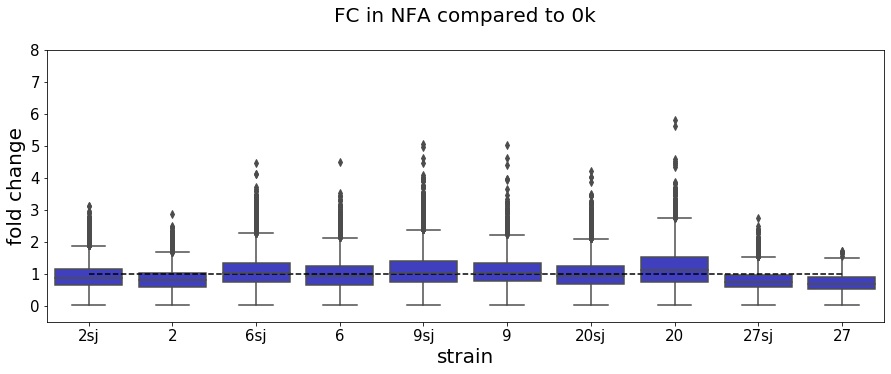

In [93]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_dsr2_0k_718,NA_dsr2_0k_314,
                       NA_dsr6_0k_718,NA_dsr6_0k_429,
                       NA_dsr9_0k_718,NA_dsr9_0k_506,
                       NA_dsr20_0k_718,NA_dsr20_0k_506,
                       NA_dsr27_0k_718,NA_dsr27_0k_314],color="blue",saturation=0.5,showfliers=True)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[NFA_FC_dsr2_0k_718,NFA_FC_dsr2_0k_314,
 #                      NFA_FC_dsr6_0k_718,NFA_FC_dsr6_0k_429,
  #                     NFA_FC_dsr9_0k_718,NFA_FC_dsr9_0k_506,
   #                    NFA_FC_dsr20_0k_718,NFA_FC_dsr20_0k_506,
    #                   NFA_FC_dsr27_0k_718,NFA_FC_dsr27_0k_314], color="black")

plt.title("FC in NFA compared to 0k\n")
plt.xlabel("strain")
ax.set_xticklabels(["2sj", "2", "6sj", "6","9sj", 
                    "9", "20sj","20","27sj",
                    "27"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1,1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,8])
ax.tick_params(axis='y', labelsize=15)

print('2',stats.ttest_ind(a=CA_dsr2_0k_718, b=CA_dsr2_0k_314,equal_var=True))
print('6',stats.ttest_ind(a=CA_dsr6_0k_718, b=CA_dsr6_0k_429,equal_var=True))
print('9',stats.ttest_ind(a=CA_dsr6_0k_718, b=CA_dsr9_0k_506,equal_var=True))
print('20',stats.ttest_ind(a=CA_dsr20_0k_718, b=CA_dsr20_0k_506,equal_var=True))
print('27',stats.ttest_ind(a=CA_dsr27_0k_718, b=CA_dsr27_0k_314,equal_var=True))


jul-mar Ttest_indResult(statistic=2.3624721209270816, pvalue=0.01817087746648761)
jul-apr Ttest_indResult(statistic=-18.68519344964717, pvalue=7.075230458419509e-77)
jul-may Ttest_indResult(statistic=-8.548738584693242, pvalue=1.440601370661488e-17)
mar-apr Ttest_indResult(statistic=-21.364193845230186, pvalue=1.5175422209483338e-99)
mar-may Ttest_indResult(statistic=-10.810812271594072, pvalue=4.384420240683789e-27)


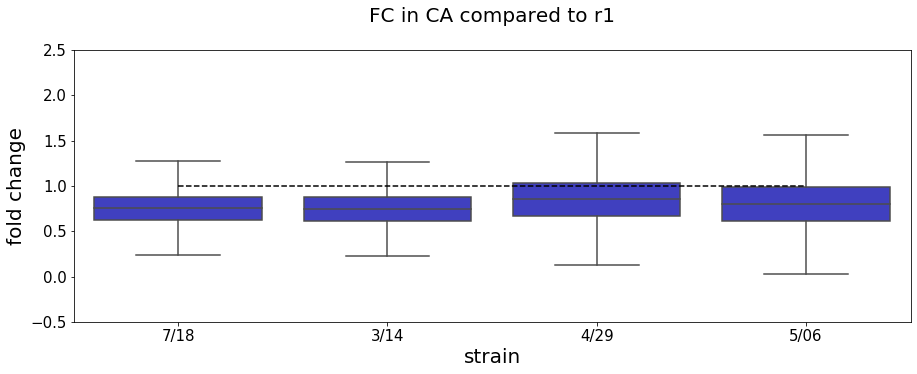

In [49]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_FC_r1_10k_718,NFA_FC_r1_10k_314,
                       NFA_FC_r1_10k_429,
                       NFA_FC_r1_10k_506],color="blue",saturation=0.5,showfliers=False)
# Add jitter with the swarmplot function
#ax = sns.swarmplot(data=[NFA_FC_dsr2_0k_718,NFA_FC_dsr2_0k_314,
 #                      NFA_FC_dsr6_0k_718,NFA_FC_dsr6_0k_429,
  #                     NFA_FC_dsr9_0k_718,NFA_FC_dsr9_0k_506,
   #                    NFA_FC_dsr20_0k_718,NFA_FC_dsr20_0k_506,
    #                   NFA_FC_dsr27_0k_718,NFA_FC_dsr27_0k_314], color="black")

plt.title("FC in CA compared to r1\n")
plt.xlabel("strain")
ax.set_xticklabels(["7/18", "3/14", "4/29", "5/06"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([-0.5,2.5])
ax.tick_params(axis='y', labelsize=15)

print('jul-mar',stats.ttest_ind(a=NFA_FC_r1_10k_718, b=NFA_FC_r1_10k_314,equal_var=True))
print('jul-apr',stats.ttest_ind(a=NFA_FC_r1_10k_718, b=NFA_FC_r1_10k_429,equal_var=True))
print('jul-may',stats.ttest_ind(a=NFA_FC_r1_10k_718, b=NFA_FC_r1_10k_506,equal_var=True))
print('mar-apr',stats.ttest_ind(a=NFA_FC_r1_10k_314, b=NFA_FC_r1_10k_429,equal_var=True))
print('mar-may',stats.ttest_ind(a=NFA_FC_r1_10k_314, b=NFA_FC_r1_10k_506,equal_var=True))
